In [216]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [217]:
df = pd.read_csv('ALL_AMZN_PRD_REV.csv')
df.head()

Unnamed: 0  Unnamed: 0.1             Names  \
0           0             0     Kimberly Luna   
1           1             1       Barrett Ray   
2           2             2     kristi kramer   
3           3             3      Richard Seal   
4           4             4  LePonda Bradshaw   

                              Review_Title  \
0  A little flimsy but good for the price.   
1           Knives should be a bit thicker   
2                         Not very durable   
3                            Not very good   
4                        Very thin plastic   

                                              Review             Ratings  \
0  Product is good for what you pay. Utensils wil...  4.0 out of 5 stars   
1  The spoons and forks were very nice, but knive...  4.0 out of 5 stars   
2                               Value but not sturdy  4.0 out of 5 stars   
3  They're small and pretty flimsy. If it's bough...  3.0 out of 5 stars   
4  These are flimsy and not like the kind I norma...  4.0 out of 5 stars   

                                        Review_Dates    Uploaded_Images  \
0  Reviewed in the United States on November 2, 2022  Image Not Present   
1  Reviewed in the United States on October 19, 2022  Image Not Present   
2  Reviewed in the United States on September 7, ...  Image Not Present   
3  Reviewed in the United States on December 1, 2022  Image Not Present   
4     Reviewed in the United States on July 15, 2022  Image Not Present   

   Helpful  
0        1  
1        1  
2        0  
3        0  
4        1

**EDA And Preprocessing**

In [218]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df.drop('Unnamed: 0.1',axis='columns',inplace=True)

In [219]:
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review             Ratings  \
0  Product is good for what you pay. Utensils wil...  4.0 out of 5 stars   
1  The spoons and forks were very nice, but knive...  4.0 out of 5 stars   
2                               Value but not sturdy  4.0 out of 5 stars   
3  They're small and pretty flimsy. If it's bough...  3.0 out of 5 stars   
4  These are flimsy and not like the kind I norma...  4.0 out of 5 stars   

                                        Review_Dates    Uploaded_Images  \
0  Reviewed in the United States on November 2, 2022  Image Not Present   
1  Reviewed in the United States on October 19, 2022  Image Not Present   
2  Reviewed in the United States on September 7, ...  Image Not Present   
3  Reviewed in the United States on December 1, 2022  Image Not Present   
4     Reviewed in the United States on July 15, 2022  Image Not Present   

   Helpful  
0        1  
1        1  
2        0  
3        0  
4        1

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41050 entries, 0 to 41049
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Names            41044 non-null  object
 1   Review_Title     41038 non-null  object
 2   Review           40984 non-null  object
 3   Ratings          41050 non-null  object
 4   Review_Dates     41050 non-null  object
 5   Uploaded_Images  41050 non-null  object
 6   Helpful          41050 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [221]:
df.describe()

Helpful
count  41050.000000
mean       1.817418
std       17.980315
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      998.000000

In [222]:
df.isnull().sum()

Names               6
Review_Title       12
Review             66
Ratings             0
Review_Dates        0
Uploaded_Images     0
Helpful             0
dtype: int64

In [223]:
# the review column, four rows without review text, we drop the rows with the null columns
df = df.dropna()
#resetting the index
df = df.reset_index(drop=True)
df.isnull().sum()

Names              0
Review_Title       0
Review             0
Ratings            0
Review_Dates       0
Uploaded_Images    0
Helpful            0
dtype: int64

In [224]:
df.shape

(40970, 7)

In [225]:
df['Uploaded_Images'].value_counts()

Image Not Present    39090
Image Present         1880
Name: Uploaded_Images, dtype: int64

In [226]:
df['Ratings'] = df['Ratings'].str.split('.').str[0]
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates    Uploaded_Images  \
0  Reviewed in the United States on November 2, 2022  Image Not Present   
1  Reviewed in the United States on October 19, 2022  Image Not Present   
2  Reviewed in the United States on September 7, ...  Image Not Present   
3  Reviewed in the United States on December 1, 2022  Image Not Present   
4     Reviewed in the United States on July 15, 2022  Image Not Present   

   Helpful  
0        1  
1        1  
2        0  
3        0  
4        1

In [227]:
df['Ratings'].value_counts()

5    29526
4     4277
1     3140
3     2404
2     1623
Name: Ratings, dtype: int64

In [228]:
df['Uploaded_Images'].replace({'Image Present':1,'Image Not Present':0},inplace=True)
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  Helpful  
0  Reviewed in the United States on November 2, 2022                0        1  
1  Reviewed in the United States on October 19, 2022                0        1  
2  Reviewed in the United States on September 7, ...                0        0  
3  Reviewed in the United States on December 1, 2022                0        0  
4     Reviewed in the United States on July 15, 2022                0        1

In [229]:
df['Review_Dates'] = df['Review_Dates'].str.split()  #.str[]
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  Helpful  
0  [Reviewed, in, the, United, States, on, Novemb...                0        1  
1  [Reviewed, in, the, United, States, on, Octobe...                0        1  
2  [Reviewed, in, the, United, States, on, Septem...                0        0  
3  [Reviewed, in, the, United, States, on, Decemb...                0        0  
4  [Reviewed, in, the, United, States, on, July, ...                0        1

<AxesSubplot:xlabel='Ratings', ylabel='count'>

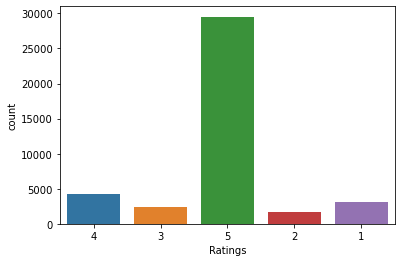

In [230]:
import seaborn as sns
sns.countplot(x='Ratings',data=df)

In [231]:
df['Clean_rev'] = df['Review_Title'] + ' ' + df['Review']
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   

   Helpful                                          Clean_rev  
0        1  A little flimsy but good for the price. Produc...  
1        1  Knives should be a bit thicker The spoons and ...  
2        0              Not very durable Value but not sturdy  
3        0  Not very good They're small and pretty flimsy....  
4        1  Very thin plastic These are flimsy and not lik...

**remove all characters not number or characters**

In [232]:
import re
# remove all characters not number or characters
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
df['Clean_rev']= df.Clean_rev.apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Clean_rev'] = df.Clean_rev.apply(cleanText)
df['Clean_rev'][155]

'but it s not as good as the premium plastic cutlery you would get from it s not your typical cheap plastic white cutlery but it s not as good as the premium plastic cutlery you would get from the local supermarket the strength is somewhere in between although it does seem to be very flexible so not quite premium but better than the cheap stuff overall it s not a bad price for the quality but since i prefer a premium quality i am not impressed i would rather have half the quantity at the same price which i can now get at my local market overall though not bad at all decent for the price '

**Removing StopWords And Punctuation**

In [233]:
import string
import nltk
from nltk.corpus import stopwords
#removing punctuations
df['Clean_rev']=df['Clean_rev'].str.translate(str.maketrans('', '',string.punctuation))
stopWords=stopwords.words('english')+['the', 'a','an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
df['Clean_rev'] = [removeStopWords(stopWords,x) for x in df['Clean_rev']]

In [234]:
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   

   Helpful                                          Clean_rev  
0        1  little flimsy good price product good pay uten...  
1        1  knives bit thicker spoons forks nice knives bi...  
2        0                               durable value sturdy  
3        0  good small pretty flimsy bought kids party som...  
4        1  thin plastic flimsy like kind normally get sto...

**Lemmatization**

In [235]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def lem_sentences(sentence):
    tokens = sentence.split()
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lem_tokens)
df['Clean_rev']=df['Clean_rev'].apply(lem_sentences)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laukit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Stemming**

In [236]:
# from nltk.stem import PorterStemmer
# porter_stemmer = PorterStemmer()
# def stem_sentences(sentence):
#     tokens = sentence.split()
#     stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
#     return ' '.join(stemmed_tokens)
# df['Clean_rev']=df['Clean_rev'].apply(stem_sentences)
# df.head()

**Spelling Correction**

In [237]:
# from textblob import TextBlob, Word, Blobber
# df['Clean_rev'].apply(lambda x: str(TextBlob(x).correct()))
# df['Clean_rev'][155]

**Ngram exploration**

<AxesSubplot:>

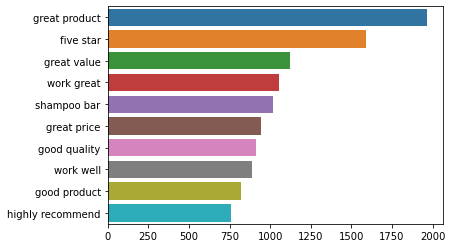

In [238]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(df['Clean_rev'],2)[:10] #for Bigrams
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)


<AxesSubplot:>

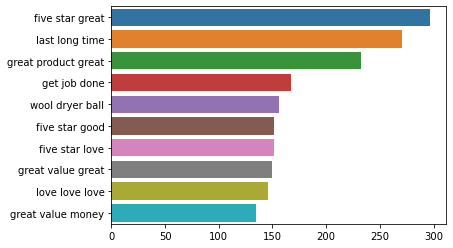

In [239]:
top_tri_grams=get_top_ngram(df['Clean_rev'],n=3) #For TriGrams
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [240]:
# pip install spacy

In [241]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [242]:
sentences = df["Clean_rev"].values.tolist()
len(sentences)

40970

In [243]:
lst=[]
for sentence in sentences:
  doc = nlp(sentence)
  descriptive_term = ''
  for tok in doc:
    if tok.pos_ == 'ADJ':
      prepend = ''
      for child in tok.children:
        if child.pos_ != 'ADV':
          continue
        prepend += child.text + ' '
      descriptive_term = prepend + tok.text
  lst.append(descriptive_term)
  print(sentence)
  print(descriptive_term)

little flimsy good price product good pay utensil break pressing hard
good
knife bit thicker spoon fork nice knife bit thin
nice
durable value sturdy
sturdy
good small pretty flimsy bought kid party something ok best quality
ok best
thin plastic flimsy like kind normally get store thought plastic would thicker get get pay
thin
disappointed durability disappointed durability plastic ware fork knife easily broke kind pressure applied
kind
nice liked better plastic ware knife actually cut thing box pretty crushed got double boxed
boxed
cutlery combo saying get pay true case cutlery cheap durable especially fork used flimsy broke several time spoon flimsy break used mainly stew disappointed decision make purchase
disappointed
great daily light duty use pleased set price ton plasticware home us decently often little le sturdy brand might find store long trying peel cantaloupe cut ice cream cake fresh freezer likely issue set get 100 bowl cereal 100 plate cake 100 can wet cat food serving us

dangerous
flimsy junk calling flimsy insult flimsy thing
flimsy
buyer beware think product worth money service good
good
disappointed covid 19 find using paper plate disposable silverware thought like heavy duty one get costco flimsier costco close u anymore since moved ordered put pressure break outside nice size
nice
miniature cutlery dont buy cutlery made child way small even fit hand also greatest quality easily snap recommend unless maybe kid birthday party
kid
thin plastic wear thin plastic wear like party duh title plastic wear thought saw heavy duty description somewhere expected
heavy
great awful either utensil rather flimsy compared heavy duty fork knife spoon however satisfactory better others market
better
cheap utensil unfortunately cheap opened right party guest embarrassed fork started break people hand guest start used double fork instead even like work
double
threw garage worst quality plastic thin fork piece break food using throw garage waste money
thin
excellent pro

spend little get better product knife really flimsy wish gone brand know experience good quality
good
tiny flimsy spoon small enough annoying unless feeding toddler whole set flimsy flexible thin cheap might break jar see getting peanut butter spoon full pain butt going cutting firm vegetable steak cheese knife good room temperature butter stirring coffee eating small spoon full something diet recommended adult sized hand mouth wait use never buy edit break peanut butter jar can wet dog food used fork eat jalapeno stuffed olive jar could taste residual plastic food buy
residual
sturdy hoped good quantity good quality work quick easy meal break easy though
easy
flimsy flimsiest piece plasticware like child toy actually supposed use get job done yea using eat cereal salad super thin bend like crazy
crazy
thin great looking sturdy plastic ware thin fork small well spoon work pinch
small
flimsy flimsy barely use
flimsy
good value price right sturdy though depending serving aware break easi

cutlery child size cutlery set made child adult broke easy horrible quality product advertised cutlery child
cutlery
product great exactly advertized
exactly advertized
use office party flimsy spoon work bowl cereal good scooping ice cream
good
cutlery flimsy usable cutlery flimsy usable bad waited open box return period passed ordered another brand throwing box away
open
get job done utensil thin flimsy however get job done everyday use item long careful gentle consuming food bought desk work eat chicken rice yogurt everyday work fine even though fork tip broken couple occasion interest spending
gentle
good price little flimsey disposable one meal plastic cutlery nicer heavy item even get fast food still nice work brown bag lunch would want use party event
brown
flimsy silverware silverware flimsy broke ease buying feel like poor value price paid
poor
sturdy flimsy thought great buy turn flimsy fork break easily bend easily rather pay bit sturdy safe plastic cutlery good buy
good
meh 

flimsy every fork used broke even pasta someone even broke biting food
even pasta
fork knife spoon oh despite fact plastic item strong stainless steel brother sister price pretty good saw 136 count target 10 300 stir 300 cup coffee cut unlimited slice soft butter try desperately get grape fruit salad fork much much
soft
ok fine salad birthday cake etc sturdiest cutlery trying cut meat
sturdiest
buy unquestionably worst plastic cutlery ever used fork break constantly spoon knife exceptionally flimsy
exceptionally flimsy
cheap gave away ordered delivered u overseas stationed belgium currently planning thanksgiving dinner single soldier since good number people trying get away using paper plastic product cut cleaning afterwards cutlery set even call horrible suppose get trying save money plastic cutlery set hard find honestly quality going ikea buying actual silverware cutlery set tossing drawer larger group worth brought entire set work extra break room horribly embarrassed serve people


plastic dinnerware spot need thanksgiving dinner
plastic
flimsy flimsy purchased use large bbq house quality bad went purchased set store worked fine anything soft come bbq cutting came steak chicken pork chop rib fork broke food venture use knife cutting meat sure went well
soft
hold break easily nice quality
easily nice
strongest sturdy
sturdy
plastic silverware silverware small kid party
small
use occasion use lose

brittle use anything resistance plastic snap bend good pudding
good
emergency backup utensil flimsy careful put much pressure wont break would say would good emergency use picnic good amount attendee
good
poor quality please take item amazon poorest poor quality
poor
buy use would good dessert salad bought use thanksgiving dinner le dish flatware bit flimsy job buy use would good dessert salad
good
bendable barely even usable especially knife basically worthless
basically worthless
smaller clear plastic smaller usual clear plastic utensil seem sturdy
sturdy
hot yeah flim

alright nothing write home pretty flimsy breakable trash afterall lol id buy bulk easier going walmart four kid tow
breakable
plastic strong plastic silverware lightweight price low likely material strong beware buy prefer something little substantial easily bend break
substantial
low quality sturdy bought try bend looking low quality sturdiness
low
recommend giving 2 star price price decent flimsy almost make worth every time tried using would break definitely recommend kid party anything like get tougher clear kind cost little
little
cheezy flimsy wee thing
wee
absolute waste money worst plastic utensil haveever bought waste loud shorter flimsy even spread butter bread knife snapped
loud shorter flimsy
good price sturdy expected worked flimsy
good
small cutlery extremely flimsy definitely worth cutlery small standard size resemble toy ware extremely flimsy
extremely flimsy
flimsy cheap silverware awful thin flimsy small fork worst bend break easily much better spending little bit get

poor quality poor quality
poor
melt short would buy
short
safe small child picky plastic silverware cheap flimsy nervous letting 3 year old use especially fork could seriously snap mid bite l careful
careful
cheap flimsy plastic
flimsy
break command super flimsy

three star flimsy small would buy
small
worst product ever waste money throw buy could actually pick food cheap flimsey boot charged 16 99 allowed sold
cheap
smaller flimsy think purchase cutlery slightly smaller flimsy expecting
flimsy
waste money terrible flimsy break easily also oddly short
oddly short
thin bendy cutlery cutlery would ok cake something light however forget want cut meat thin bendy would never buy
thin
break easy durable enough quality thin break easy durable enough
easy enough durable
flimsy plastic ware far sturdy probably good use child tea party maybe even
probably good
sturdy thought purchasing sturdy plastic utensil want say flimsy say expecting
flimsy
three star okay light weight flimsy
light
awesome 

break easily flimsy small size best elementary aged kid much everyone else
much
poor quality poor quality break easily worth price buy
worth
three star cheap small utensil
small
sturdy enough bought thinking clear plastic ware little better plastic utensil would buy dollar store flimsy broke easily
plastic
cheap flimsy buy total wast money weak flimsy use whole box surprised knife could cut butter fork broke could even take bite food horrible
horrible
three star cutlery bit flimsy compared plastic silverware
plastic
weak break way easy
easy
three star flimsy easy break guess plastic
easy
fit child hand adult smallest plasti ware ive ever ordered ridiculous size unhappy product
unhappy
perfect party worked well party threw

ok pay better ok pretty flimsy crystal plastic usually much stronger white plastic
white
flimsy worth big party flimsy worth big party needing heavy duty plastic ware worth price
worth
poor quality poor quality even price buy
poor
horrible useless break easily comple

great value bought party plenty left party future great value better buying multiple smaller box
smaller
three star spoon melted try stir soup

four star great quality
great
three star shorted 50 fork given 50 extra spoon
extra
four star great using classroom
great
unsafe choking hazard poor quality worth price cheap fork break easily unsafe anyone choking hazard child
unsafe
three star dollar store quality

waste money cutlery flimsy junk paid 70 cent got 60 utensil much durable another brand seller waste money better dollar tree
better
three star worked needed

great cup big party great value product big party
big
sturdy warp break melt easily break
sturdy
plenty numerous party bought son plenty numerous party bought son 2 nd bday five still ton
numerous
way flimsy useful tine fork pierce green bean without flexing knife worthless peanut butter would good cake ice cream cereal
good
pesima calidad se partieron tuve que mandar alguien del party buscar otros cubiertos queria poner estre

two star super flimsy knife blade handle
flimsy
plastic cutlery flimsy size plastic cutlery flimsy size cutlery also smaller normal box cutlery come also beat old looking ordered baby shower run store day get plastic cutlery usable
usable
would recommend great buy good price
good
buy buy broke mouth aided go hospital flimsy cheap
cheap
perfect need work
perfect
great product great price
great
buy adult small product worth money utensil small would good 1st grader birthday party
1st
flimsy silverware reliable ex flimsy
reliable
great purchase bbq need durable heat food breakage experience great purchase bbq need
great
poor quality cutlery light break easily good lunch dinner maybe tea party
easily good
want happy ever used kirkland plastic cutlery want happy kirkland supreme flimsy
happy
get pay well inexpensive know flimsy small break easily advise purchasing unless prepared annoyed
prepared
poor quality plastic cutlery flimsy fork broke eating birthday cake ice cream never order
flims

cheapy worst might well buy dollar store disappointing
worst
two star easily snap great quality
great
small
small
two star durable break need way stronger
way stronger
two star plastic ware strong
strong
cheaply made silverware flimsy short hard time cutting salad fork knife recomend
salad
cheap break cheap break easily maybe good kid cheap party
cheap
cheap knife fork spoon small side also flimsy would buy
also flimsy
fork knife break easily purchase spoon okay fork knife break easily purchase
okay
five star good assortment super cheap looking
super cheap
useless read review wish wish read review first full size second flimsy break extremely easy actually going contact see get refund useless keep posted
useless
flimsy horrible product save money super flimsy cheaply made
super flimsy
two star cheap made
cheap
two star brake easy
easy
better weapon utensil horrible quality would recommend product anyone fork break eat meat dense food item
dense
cheap worst like kid play utensil guest m

cheap
flimsy cheap pretty much worst set cutlery ever got office try save buck spoon melting soup getting overwhelmed yogurt worth
worth
pointless super flimsy flimsy spent dollar actually function
flimsy
melt used plastic fork pinch stir coffee watched horror tine melted warped cheap flimsy
cheap
flimsy bought office flimsy really functional utensil worth money
worth
really really flimsy really really flimsy barely work anything except jam something soft
soft
buy weak
weak
crappy silverware extremely small break super easily buy wasted money
super
cheap cheap cheap complete waste money product flimsy cheap
cheap
great price sent son college still using great price
great
get pay flimsy particularly tough
particularly tough
flimsy durable super flimsy smaller anticipated waste money wish would return box open already
open
small super junk small super flimsy
small
five star great deal good price
good
meant small child product miniature size meant child would recommend adult
miniature
fli

fork shatters food cheaply made product fork shattered eating salad baked potato leaving broken fork inside food addition part fork found different area floor
different
expose heat tiny cheap instantly melt trying eat hot food
hot
trash def cannot eat plastic cheap flimpsy trash bend slight touch definitely cannot eat worse coffee stir straw term strength ridiculous
ridiculous
junk price quanity speak self cheaply made recomend buying read review buying hope

adult kid sized flimsy
flimsy
buy poor quality bend brake sturdy
poor
cutlery toddler utensil tiny flimsy horrible quality
horrible
flimsy flimsy worth money
worth
horrible cheaply made break immediately fell apart soon tried use horrible quality seriously take advice awful review help please click helpful button
helpful
flimsiest plastic cutlery ever super flimsy durable
durable
worst plasticware buy worst plasticware buy plastic cheap break easily mention fork knife spoon smaller normal utensil recommended
normal
total crap wors

nice quality cheap plastic med quality plenty everything
med
flimsy thought would little sturdier flimsy
sturdier flimsy
one star totally cheap plastic buy sturdier set people could actually eat
sturdier
great dorm bought september still run great dorm
great
waste money flimsy cheap
cheap
completely useless flimsiest plastic cutlery ever bought even worse dollar store brand complete waste 10
complete
kid party perfect small adult think item kid adult kid party perfect small adult
small
five star exactly needed

break easily flimsy break incredibly easy reordering brand
incredibly easy
five star came expected

could gotten better deal cheap quality went dollar tree found better one way le half price
better
flimsy fork prong consistently break food cut knife think going snap
flimsy
eating anything heavier rice forget strength really poor quality
really poor
quality product small small
small
heavy duty ordered wedding worked great bbq held perfectly heavy food
perfectly heavy
costco much 

one star flimsy fork tend break use purchase
flimsy
one star extremely flimsy even poke chicken
extremely flimsy
poor quality worst plastic cutlery ever used
worst
work great nice product pictured described excellent volume discount deal complaint would highly recommend
excellent
one star lame cheap tiny could gotten better quality dollar tree
better
plastic flexible snapped easily low quality plastic flexible snapped easily
easily low
five star great bargain price plastic ware
great
cheaper sturdy affordable high quality
high
buy buy fork would break food

small low quality buy small flimsy
small
one star cheaply made eat stir drink

five star sturdy large quantity money great
great
total waste relatively soft food knife fork snapped total waste
total
dissapointing flimsy fork break esily even using soft item
soft
one star tiny regular sized silverware returned
sized
one star horrible plastic cheap broke right away
cheap
cheaply made cheap plastic silverware
cheap
plastic silverware w

small weak impressed got fast without breaking b4 got great quick little kid party
little
good buy always purchase item amazon excellent deal
excellent
flimsy small product short like child use flimsy bend break using even vegetable would recommend product seller however prompt shipping package arrived undamaged
undamaged
sturdy thin flimsy smaller usual plasticware spoon thin kind sharp rounded edge careful giving small child use comfortable eat fork tine flimsy worth money imo
worth
feed great large party
large
good work fine
good
worth purchase absolutely love much better one getting job
much better
heaviest duty workable situation perfect casual meal softer food little lightweight compared super duty costco
super
expect much low quality expecting quality good enough eat food water
enough good
worst ever unsafe child flimsy break easily worth money let child use
easily worth
nice nice exactly picture look like
nice
never flimsy small
small
sturdy probably sturdiest found price
sturd

spiral notebook 6 pack 1 subject college ruled paper 8 x 10 1 2 inch oxford spiral notebook 6 pack 1 subject college ruled paper 8 x 10 1 2 inch color assortment got granddaughter school give assortment color different class kept one keep note
different
great value great value
great
work perfect perfect office need
perfect
great track project use one color track set project example work great
great
get pay time fast shopping great value match price
great
really thin really thin soft mean bad way fold bend easily
fold
paper great student need
great
decent deal purchased amazon wishlist organization donate way could provide material would able buy amount better deal somewhere else depending catch good sale without sale pricing par big box store plus side worry logistics getting material
good
seems ok pen seemed bleed made back page good
good
great quality color
great
great price like notebook maybe use scratch pad purpose agree paper little thin writing slightly appear back page big prob

good nice
nice
cool definitely would recommend buy worth price pack came 2 light blue 2 dark blue 1 yellow 1 green seen ppl get 6 blue happy purchase
happy
quality quality used personal use
personal
good like notebook easily cut paper good material
good
great deal nice bundle notebook work form home need lot paper training organizing taking note help dedicate one notebook specific topic lot writing greta price great bundle great product 10 10
great
basic notebook minor issue easily wire binding catch untangle notebook couple time bent wire back tightly fine
tightly fine
receive notebook color shown picture used notebook misleading thought going get six notebook color shown instead received two red two yellow light blue one green one
green
good value advertised paper good flimsy great purchase price go wrong
wrong
needed value money use writing lyric keeping game score etc

excellent book excellent condition differently getting next year
next
okay nice lot notebook tear well along perfo

assortment color may vary like color assortment may vary bought folder came 6 color expected match main picture everything would match come back see assortment may vary frustrating shopping amazon thing picture get
frustrating
great needed cost much store
much
good notebook price liked notebook pretty affordable amount give paper pretty good quality well used 2 notebook far since got gave issue far term tearing would definitely buy time come
far
good understand people whining notebook good need something write use one take note complaint wish little bit wider still good price
still good
great notebook great notebook reasonable price nothing else really need said buy set need notebook number color notebook page per notebook cover need class work
reasonable
repeating color great notebook however received two one color expecting get different color bummed
different
ok product covid19 force church participant virtually product made sermon note taking doodling conventant color help knowing 

repeated color disorganized second time purchasing notebook good quality time repeated color make pain butt want use organization multiple class
multiple
nice product nice product really like buy
nice
worth love love
worth
great product nice simple notebook great 6 week class high quality easy keep track separated due variety color
due
amazing write note notebook really handy good quality happy product price
happy
great price came perfect condition beat price
perfect
product described needed write alot

notebookey notebook meant son us homeschooling hate much

great deal perfect size quality pleased notebook reordered another set
pleased
great product nice price notebook aregreat handy great buy
great
important school necesary school
necesary
top oxford notebook like notebook

perforation tear notebook notebook suppose perforation good well tear tear rough edge use paper cutter cut edge clean
clean
bad good nice compare price amazon time still expensive moreover honestly like quality p

great price great deal notebook set always good several hand
several
thin color assortment pretty book flimsy keep mind 1 subject great college used buy 3 subject realized actually easier keep 1 notebook per class work better 1 3 major class taking 12 unit paper thin pencil non heavy inked pen would probably better use
inked
good standard notebook decent standard notebook good value considering start falling apart like cheaper alternative grab like dollar store something
alternative
paper write flipping paper math stuff



great set notebook great set notebook good price kind use
good
back school great school find store
great
feel cheap coil popping feel cheap paper still write suppose important quality notebook
important
limited color pack ordered notebook pack several time always received color listed color code class use corresponding highlighter great system pack arrived contained 3 black notebook 3 light blue one know say assorted color two color disappointing even standard open d

notebook item described great price
great
great price get lot pay
great
buy good needed
good needed
great value 5 star
great
perfect oh yes definitely gonna enjoy writing story book
perfect
good good
good
good quality customer service notebook great different color helpful identify subject first delivery lost chatting customer service received soon
first
great great
great
mr senior reorder semester son love
senior
great value great value
great
one torn product mostly good condition however light blue notebook torn front crumbled back black one mark also bit bent rest appear fine condition
fine
good money like
good
inconsistent quality ordered pack twice semester last semester one got time page lower quality one got first time
first
reasonably priced great buy price
great
tough notebook notebook take lot abuse price slightly le store
tough
ok ok

good quality good quality notebook nothing else add
good
great value great value great quality paper white page bright colored line
bright
vau

good price great notebook good price
good
like item arrived fine excellent condition thank
excellent
great pricing prompt delivery item described great pricing
great
1 subject notebook convenient good quality repeat order right size price
right
great buy great buy
great
like much outstanding really nice strong
strong
page disorganization page backwards towards middle notebook expecting also crease rip page outter side page make sense obviously received manufacture defected product 6 notebook arrived
rip
yay needed

basic useful great note
great
paper write durable work notebook durable
durable
6 different colou exactly needed thank love 6 different color dark line
dark
great great
great
good good
good
missing color ordered multiple package upon opening nothing yellow dark blue black ordered due assortment color class failed provide color coded advertised
due
great value price good page loved cheapest price get 6 pack notebook
cheapest
great price notebook bought notebook school totally


great printing worth money get 12 notebook price
worth


five star cute color get exactly pay
cute
four star good thanks



simple notebook cant complaint good botebook
good
time bought gift

great great
great
great value great value described
great
great school great school
great
5 star good amount price
good
great great
great
pretty worthy class note priority great far
great
two color 6 bought child school year picture shown 6 color perfect color code 6 different subject quickly grabbing correct subject notebook locker changing class yet received 2 light blue 2 black 2 yellow enough color code 3 class six
enough
suitable writing material spiral notebook contained graffiti missing page also provided suitable writing surface user pen pencil rainforest resource converted writing material satisfaction
suitable
good good
good
good quality good quality paper
good
work expected

good nice pack
nice
five star well made ruled notebook variety color

notebook say notebook

great good stuff
go

meh poor quality paper
poor
useless page lot blank area impossible write pen ball ink simply stick area strongly recommend avoid notebook
impossible
recommend recommend product buying subject color received surprised four green notebook two black recommend
black
two color mediocre best terrible mediocre notebook get 5 2 dollar walmart came yellow red expecting multiple color waste money disappointed
multiple
flimsy ok get paid flimsy pick one end fold
flimsy
enough space write order came time however guess looked measurement two red margin enough space write reminds journal instead one subject notebook
subject
solo recibi un cuaderno agrado que solo enviaron un cuaderno decia paquete de 6 puedo creer que un solo cuaderno tenga un precio de ma de 8 dolares

pleased product good however arrived needed happy store purchase already ordered
happy
ok ok

advertised stated showed 6 different color arrived 2 blue red yellow needed advertised
red
color repeated advertised different color howeve

expected shipped time expected shipped time

great paper great paper study paper fall
great
great product everything went well everything good condition loved color box item came haha
haha
great notebook nice set notebook great buy great price
great
good served purpose
good
paper wonderful side tear evenly use weekly bible study note filled 2 far like paper fact smudge erase worth every penny
worth
happy take alot note sunday service convention also like write reminder etc always work
write
useful liked simple cover glued wallpaper sample unique journal
unique
sturdy worth unless write like elephant walking ground paper durable worth like normal notebook get store bank saver came according color shown show brother ready school
ready
sturdy worth unless write like elephant walking ground paper durable worth like normal notebook get store bank saver came according color shown show brother ready school
ready
good product worth purchase
worth
perfect school love note book school
perfect
sp

thing going well got cup trendy color name like amethyst paprika want reminded gemstone spice tipping back plastic cup semi cold mediocre quality keg beer big night came large party excited meeting greeting would take place really risking show personality offering apple green cup guest thing going great plethora color laugh smile ever shrinking keg unthinkable happened two guest excessively enjoying party got fight color better neptune blue amethyst argument escalated quickly amethyst sarcastically referred purple glove came brawl started soul crushed party cup expression human cause fight total twist irony one initial brawler thrown pool dubbed neptune blue mess someone decided call local law enforcement agency arrived immediately pointed cup moved confiscate beverage holding device apparently popping town party fight retail store break in even recovered paprika cup bank heist instead handling situation gave smiley wave neptune blue headed another call overall cup incredible color bre

great timesaver price quality ordering cup subscribe save account year save much time kitchen sink either toss everytime wash use quality sturdy grandkids color cup help diffuse oh often mine sitting right also one mine fuller drank bottom line love house great color
great
pretty good purpose disposable cup decent price
decent
solid quality cup last repeated washing hot water withstands pressure game cup little cheaper solo cup quality size also little smaller think 2 4 ozes really make big difference anyone unless regulated beer pong contest cup also used weekend cabin party game cup washed time hot water day prolong non grimy use cup held hot water able last entire weekend festivity would recommend camping hiking cabin work even normal use home different color combo also nice
also nice
nice great large sturdy defeat purpose strong enough wash use wish plastic biodegradable
biodegradable
plastic cup yay one going write song cup good 3 daughter well husband three girl get assigned colo

good
love cup sometimes hole think cup get unpacked someone using box cutter get section cup slit overwise great disposal cup
great
solid deal used bunch starting garden plant used party perfect good value overall
good
cup color received photo cup quality fine need irritated cup received color photo instead purple got red bummed ordered color matched specific napkin ordered red one
red
sturdy cup great value cup great drinking beer pong water pong party ok honest party enough friend beer pong actually use cup painting great touch ups house dip 5 gallon bucket easily disposable highly recommended
easily disposable
great glad ordered probably great get nice color well right size wont sorry bought
sorry
shopping amazon dream come true shop bulk anyway packing unpacking getting u decided try amazon happy take coupon would love hey 71 make life easy husband
easy
small okay cute color small guess used 20 oz bigger seem way smaller
way smaller
come instruction kidding cup hold liquid leak lot

good price seem work well price better one
better
great party always buy party event sturdy easy hold
easy
muy bonito miy tile

fine cup bought birthday party read negative review went ahead purchased anyway happy wanted save money sacrifice quality feel exactly got
happy
great cup cup great problem
great
kitchen staple fun colorful cup add jazz party fuss cleanup love much use daily save time money
daily
buy great love use cup adorable great price much get order regular basis would highly recommend anyone
regular
sturdy colorful cup summer month love cup summertime everyone outside poolside relaxing bright come 4 different color able know table hold good amount even ice added drink love absorb liquid become flimsy awhile like syrafoam cup needed something nonbreakable outdoors
nonbreakable
worked

great beer pong beer pong worked awesome nice change red solo cup
nice
sturdy reliable great cup purchase store price u comparable chance shop place order always arrive issue
comparable
stro

great value got sale great brand name product color vibrant
great
good quality cup good sturdy cup colorful
colorful
great large family gathering love color
large
great great strong sturdy beautiful color
beautiful
perfect cup everyone great alternative solo cup
alternative
cup fun functioned well worth every penny cup lasted well party surprised many people wanted use cup night worked extremely well color big hit well
big
sure happened hefty party cup really flimsy wall super thin fan thin
thin
product fine even though posted product fine even though posted door front window put box literally 1 2 foot door hide street view delivery person put right smack front door passerby see take
front
great value strong cup perfect size
perfect
love color smaller regular red solo cup
red
worth money really like color
worth
pretty color sturdyvas solo cup price good tried
pretty
50 50 split cup delivered four split rim

cup great price get job done
great
cheap party cup great value price amazon pri

hefty never fails great product good price
good
cup perfect bigger standard size red cup
standard
good quality worth price great buy skeptical buy seeing broken cup mine came intact
intact
nice cup durable always amazon greatest price
greatest
nice color good size worth price amount cup loved color cop sturdy
worth
great party game bought party game night great value reusable cup stacking balancing game
reusable
plastic cup cup great fun color sturdy
great
worth money loved cup ordered
worth
value sturdy perfect party want dish
perfect
keeping teenage girl happy three girl house keep track cup us enjoyment got unmeasurable
unmeasurable
enjoyed rainbow color serving patient water visiting doctor staff use
patient
worth love price color
worth
better price sam club everyone party loved color nice sturdy cup good value
good
good great price great quality
great
suction together smaller brand better getting cup walmart cheaper cup hold thing work fine smaller typical cup 18 oz worth cost unl

usual
suitable plastic cup size solo cup would recommend instead work fine color nice size solo cup hold le going use beer pong would weird good certain us expect solo cup
certain
loved purchased daughter birthday party loved purchased daughter birthday party able find color locally would purchase even anothermom commented wanted know purchased
able
awesome buy get

value money thing still good feel like picking baby
still good
sent open bag crushed cup box dropped looked fine upon opening though saw bag cup clearly opened prior sealing box look like troubling fitting 100 cup bag small box decided open plastic bag cup really sure happened see picture send open bag cup two star since cup took like fat guy little coat
little
fun color love fun color hefty cup nice one color easier everyone remember color cup le losing drink
easier
strong sturdy sturdy cup vibrant color great value
great
love color combo absolutely perfect son halloween themed birthday party
absolutely perfect
great price

great durable colorful cup great durable cup loved color luau party
durable
good price good product
good
love real good sturdy
real good
vibrant color ordered neon themed party super colorful come exactly like described perfect
perfect
nice used cup son party hit
nice
yay red solo cheaper store like much better red cup lol
red
nice bright cup nice bright cup
nice
great product great product
great
great value price love product durable assorted color good price
good
easy hold use love ease use cup buy
easy
cup love cup

great product great value much cheaper local grocery sturdy easy hold
easy
sturdy colorful great size sturdy colorful would recommend
sturdy
great buy love color
great
love cup keep repurchasing work long hour love cup keep repurchasing work long hour hate come home wash cup lol especially family come
long
25 4 color also 2 cup fill cup great especially plant need root growing room
great
great value great value money love different bright color definitely purchase
bright

great company pick color love
great
great color great color matched taco twosday theme great price
great
sturdy used lady party
sturdy
good deal perfect holiday party
perfect
perfect disposable cup nice variety color exactly expect disposable cup
disposable
good party need party good piece
good
good quality cold drink cup cup colorful pretty sturdy obviously hold cold drink washed reused several time crack easily red solo cup still party
easily red
great love durability
great
great color assortment good buy love different color hold well
different
thumb party quality good hold good quantity
good
complaint complaint

durable pretty seems durable great party
great
dish saver great cup
great
excellent deal ordering soonheavy duty cup good everyday occasion
everyday
good good quality value
good
great color bought party nice color well made
nice
ordered ordered always appears husband kiddos use different cup every time get drink water sick washing ten glass day wrote everyone name cup recyc

love color great value
great
love color cup made much easier love color cup made much easier guest know cup without write
much easier
cup great solo cup
great
great value great value
great
work like solo cup complain def job meant
def
best value nice
nice
excellent cup great cup
excellent
amazing love
amazing
love em cost lot cost high
high
great love
great
durability best

four star fun party idea uv reflective would give 5 star
reflective
great homestead great homestead kid use wash plant seedling next year
next
nice love cup keep getting
nice
good value good weight cup care brownish orange color one else minded
good
good good
good
pretty love color came 1 day
pretty
great deal great deal
great
durable love diff color easy tofind cup
easy
cup found better value sam
better
great cup love color love
great
great cup good price great cup good price
good
le dish roommate make lot protein shake hare rinse regular cup protein stick onto cup problem solved
regular
good good
good
great cup gr

basic cup work colorful work well cup
colorful
great quality like 4 color package
great
great great
great
good cup color strong
strong
love thanks love

great color love color
great
work fine size red solo great cup went big red solo cup
red
great exactly described great exactly described
great
great value cute colour great price
great
cup good value
good
sturdy cup cup leak think mean job

five star perfect size strong bright color good price recommend item
good
ok drinking cup smaller thought still pretty good deal money
pretty good
five star bought baby fiesta color vibrant completely matched theme

would buy expected

good like
good
cheapest around great cup
great
love cup

cup great party

highly recommended great price quality amount highly recommended
great
good cup good strong cup pretty color
pretty
great work great
great
good cup ordered 4 got 1 pack 100 4 pack 100 like say 40 size 100 count 4 pack perfect need sadly ordered 4 package 100 cup received 1 package 100 cup accura

good buy great party
great
four star colorful could little sturdier hold beer ok
sturdier
five star highly recommend cup great party
great
ok cup little lighter weight plastic anticipated work well office pretty color
pretty
four star perfect color
perfect
hefty buy great quality reusable
reusable
good cup smaller expected fault mine reading said 16 oz hello good cup
good
cup broken suck broken used

drink nice
nice
five star loved color son fiesta party

like like

worth money buy
worth
good value great product
great
five star great large cup great party
great
five star large amount good price compared local store
local
great value great value
great
heavy duty sturdy
heavy
nice nice
nice
five star colorful cup hold liquid really well need said
colorful
great good party
good
perfect art theme party great party love color
great
coloful love color
coloful
good buy durable cup
durable
great parites liked party
great
excellent product excellent product
excellent
love color love color deliv

worth
five star great quality color
great
great cup great cup great price sturdy
great
loved loved color bright awesome

five star good value
good
five star great cup always
great
five star good cup
good
four star love color size little smaller average red cup
red
good deal use time bible study reasonably priced
bible
five star perfect color assortment occasion right size
right
festive family love color coordinating beverage color flavor probably weird
probably weird
good good cup
good
cup great grip drink
great
five star anything red
red
crushed cup cup crushed liked color

size party

five star love color

five star great way keep bright colored cup hand ready use
ready
five star needed

five star great
great
solo best love vibrant color good quality
good
four star small
small
perfect really good set cup
really good
five star good quantity price
good
five star great price
great
five star awesome
awesome
five star cup perfect luau party

say love

five star nice bright color sturdy cu

five star went well rainbow brite theme party

five star great road trip
great
five star would reorder

five star great product great price
great
thinner expected handle carefully side collapse spill everything competitor store brand better color fun
better
five star excellent cuppy
excellent
great value great product price
great
great product need cup perfect
perfect
five star love color

lit bought party

good value sturdy cup pretty color buy
pretty
five star love love new color
new
four star good product love color
good
great buy great price perfect cookout buy
perfect
product expected product expected

three star cup cracked open bag
open
five star sturdy easy grip
easy
disappointed first cup took package cracked red fruit punch spilled counter cup later coloring inside cup picture attached concerning needle say cup trash unused
unused
five star great drinking beer
great
best solo cup sturdier feel thin le secure
secure
five star pricing color better retail store
retail
five star 

nice color color great cup seemed thin problem cup cracking delivered time
thin
delivered damaged item delivered several mashed cup
several
meh really quite flimsy break easily squeezed ok adult kid burning quickly pas
ok
unable use came crushed disappeared
unable
shameful great product showed giant hole bag took cardboard box entire teal blue sleeve cup fell onto floor ugh
blue
two star like cup durable cup walmart cheaper order online
cheaper
three star small
small
impulse party buy great color cheaper elsewhere
great
filled gue inside cup bag sealed yet green cup contained type gue scared use rest ordered many time freak reorder
many
love color b u none 16 oz lid fit cup

damaged cup time ordered ordered 2 set cup 2 time row time 1 2 cup cracked throw away money socalled save saving

thin leaking cup thin comparable solo cup crack along rim pull package try reuse crack side low quality
low
buyer beware great cup durable however went order realized supposed 100 4 color received 75 ca

sturdy cheap plastic sturdy glass kept breaking tearing
sturdy
dirty ripped bag bag small tear looked dusty concerned
concerned
cup terrible cup terrible actually hole thin safely hold beverage
terrible
broken cracked received broken
broken
correct color pictured first love brand make great solo cup basic need drink leak rip easily complaint color cup get different one picture total loss slightly annoying
slightly annoying
two star flimsy cup
flimsy
cup stuck together cant get apart cant use cup

useful like
useful
great product love vibrant color
vibrant
poor quality cup crack easily
poor
crack easily thin material often crack first time pick
first
dried together seemed like sat warehouse forever falling flimsy hefty dried together seemed like sat warehouse forever falling apart
flimsy
happy cup came broken

one star good durable quality double cup use safely flimsy material dissapointed
safely flimsy
thin cup split break easily holding awful cup break easily squeeze cup ever slightly

nice party purchased prime day le five dollar seemed like great price color perfect adult son swimming party wrote name sharpie felt sturdy enough iced drink
iced
hefty party cup nice pack hefty cup great around fantastic large family gathering tailgate party many us great price amazon use large gathering home much easier trying wash dish informal gathering
informal
five star happy purchase
happy
five star great color quality
great
strong big strong
strong
five star good shape
good
five star amazing price
amazing
fun colorful cup love convenience plastic cup around house especially pool party glass never good around pool come four fun color help keep everyone cup organized
never good
work fine nothing complain come color marbling inside affect usability
fine
good cup good cup great value purchase next year
great
expectation satisfied family 8 work great expectation satisfied family 8 work great one le glass wash write name side easy use reuse throughout day
easy
great party cup great p

smaller expected normal one 20oz
normal
perfect cup summer party bought plastic cup summer luau festive great color enhance lively party reasonably priced use water beer juice misc beverage
lively
great deal awesome color liked deal pretty color
pretty
thanks thanks

great cup nice color
nice
dish feel like washing dish every day crisis ordered disposable kid still use glassware instead
disposable
great cup live happy able order online cup hold lot last need throw one use
last
great cup beautiful color sturdy cup beautiful color great quality definitely recommended
great
must must home travel home love color

bright cute regular plastic cup color beautiful
beautiful
well worth pricethe price well worth price
well worth
good price great overal thank
overal
great sturdy
sturdy
great party ordered right holiday worked perfectly get together cup durable love size used cold drink easy hold sturdy grip easy clean use every celebration great product great price
great
cup lot cup great price
g

great playing cup kid using occupy time making tower pyramid fun come lot colour
occupy
5 star good quality great price
great
sturdy cute great product money
great
nice party fun night friend without breaking cup everyone could write name make sure drink right cup
right
perfect awesome trailer cheaper place amount get
cheaper
good cup good price good cup good price
good
great product use build tower preschooler take licking keep going
great
great quality plastic cup plastic cup heavy duty generous size perfect need thanks
perfect
perfect party loved cup good pong good quality colour make fun regular red plus different game depending cup colour
different
good bang buck used cup planting break decent cup
decent
typical plastic cup exactly expected size typical red drinking cup store
red
fun fun colour summer
fun
nice colour solo quality love colour solo quality
solo
good value described great price bought cup stacking activity nephew
great
great bang buck probably cheapest set cup seen c

great price good price better local store
local
good battery long life thing around house
long
great battery never fails duracell battery always used durable dependable use brand
dependable
perfect quick day delivery saved awesome
awesome
fine battery pack worked
fine
best use lot battery best
best
yep battery work intended
yep
great prompt
great
worthwhile purchase product delivers say
worthwhile
great buy great buy
great
great battery remote
great
good get use remote camera last much longer brand best bang buck
best
last long liked longevity

happy always good product used decade need try another brand
always good
long lasting battery bought b c one bought last year lasted almost entire year use battery powered candle come dusk stay six hour night battery ran many hour every night many month thumb
many
disappointed old battery product shown older version duracell battery
older
great buy great buy
great
battery double work great last long time
long
trustworthy reliable last
last
long 

long lasting long lasting

replaced old battery time tell worth started using battery wait see premium battery worth premium price far good shipping fast always plus
far good
battery package open battery package clearly shipped ripped open extra padding see loose shipment box crystal wine glass fine tested battery full charge make suspicious seller
suspicious
fresh battery readily hand provides long lasting electrial charge many item
many
battery great purchase great value
great
prompt delivery came quickly working well
prompt
duracell one best battery value money
best
good televison remote bought family go battery quickly last long gaming television remote great price decent like extra house
extra
good price good price 24 aa battery name brand
good
work good price
good
great bulk always needing battery several remote lot toy always seem looking battery great solution never make store run bad time get last couple pack reorder expensive buying store
expensive
excellent deal child toy go

package opened battery probably fine expect get package opened amazon get low
low
great purchase pleased product price never ordered battery like amazon making regular purchase
regular
beware purchased 2x bad purchased twice sent back first order battery registered 25 depleted purchased thinking maybe bad batch second order also bad know going would stay away 6 2022
also bad
go battery great quality battery
great
get pay buy duracell buy value battery mind buying odd sized special battery brand name go many kid stuff last longer
kid
duracell need say fresh happy battery bright eyed good disposition theystayed drawer right put none strayed alone whenasked work rise occaission without bit complainingand seem last long time without tiring prematurely hey areduracell need say
areduracell
great work battery
great
china knock bought everything put went replace battery corroborated battery acid everywhere fake knock china duracell real duracell battery leak buyer beware china junk
duracell
ca

recommend longer lasting love duracell always last longer battery get know always something need battery like get bigger pack like stay prepared
prepared
energizer fell asleep bad boy bunghole woke fully charged ready go
ready
good battery good expiration date exactly described worried expiration date worried nothing time use battery way expiration date
worried
value used work perfectly

longish lasting battery advertised arrived fast middle road regarding long last price good value compared store
good
reasonable price battery delivered quickly reasonable price quality looking
reasonable
good battery think many people familiar product reasonable price beat go get covid
covid
work perfectly 1 5 like 1 67 always like duracell opinion think best battery buy happy
happy
duracell yay knock product best price found
best
great battery 1 brand buy price great compared store
great
great battery liked used type battery alot household good handy
good
happy repeat customer like bought similar oast

great battery work really great
really great
perfect wife favorite beside drawer accessory kidding use anything smaller 4 stroke engine
smaller
good value order filled quickly efficiently received ordered drawback battery ordered one year old package say guaranteed 10 year expiration date battery 9 year received issue used long recommended expiration date
old
long lasting use everything need battery long lasting better cheaper competitor
better cheaper
coppertop excellent battery excellent battery last almost forever seems like
last
good price lot price
good
battery work fine expected nothing really say battery arrived time excellent condition meet need month use
excellent
good yes
good
reiseved time thx liked fact got battery timely matter thx

good value price checked elsewhere best value
best
described described still long time expiration date
long
duracell always best double use everything duracell always best
always best
worked better energizer tried energizer battery top line ele

work goid

quality awesome service great quality merchandise quality
great
great price lot battery keep seeing battery store much great price coppertop last long time last much longer cheap alkaline battery
longer cheap
right perfect throwing bus driver
perfect
best battery going best battery use duracell
best
durability value money

excellent excellent
excellent
great value money great value money
great
long lasting use everything

duracell always best best
best best
always use duracell great value money
great
battery r battery covid leave house

damaged battery opened scattered throughout box

good product good delivery like battery love getting good service amazon
good
trusted battery brand use battery iot device need trusted brand consistent power delivery order quick delivery time
quick
duracell best luck duracell brand amazon save waiting coupon
best
value money work perfectly

duracell battery seem original battery working well item used
well
short life always purchased duracell

fast delivery good value glad found good deal battery
good
great battery great price
great
love duracell battery longevity value money great quality
great
good quality work expected
good
reliable reliable good price
good
great got item quickly n tact
tact
long lasting cost

good nice hand
nice
issue issue

great customer service good product good customer service
good
dura leak battery gauranted leak hey get free coupon duracells yup thing leak whatever put last 2 year contact duracell numerous ruined item bought ton thing subscribe save still multiple box unopened chance ruining anything else shame duracell user year always praised brand energizer leaked stuck duracell well really trust anything rechargeables time talked duracell thing oh apologize aware issue coupon clean item leaked would give gift card value damaged item complaining thing would want use product even told remove battery thing using least month well point 10 year battery unload use battery genuine amazon seller know 

battery died le 3 week may quirk battery died le 3 week changed battery 3 week far good
far good
battery excellent
excellent
work great kid go gift
great
good price
good
good value good value goodproduct
good
false advertisement rec regular duracell battery product advertised duracell coppertop aa battery power boost ingredient 24 count pack double batteryproduct received regular duracell battery need say
duracell
using lot battery best far several thing need battery best hand even wish could convert plug decorative low light lamp one battery operated
low
still leaked device leaked pretty much low use device keep house cool 66 70 degree range battery still leaked device used frequently satisfied battery went dead ruined equipment even trying popular tip clear mess
clear
buy something wrong battery could give zero star would purchased august used multiple area home 9 10 longer work add frustration longer eligible return short time period policy one know something wrong given enough time

great
better packaging battery described cam packaged upright format flat like usually see found much convenient storage
convenient
charged good product good price would recommend
good
old favorite duracell proven name good result past expect different placed device far thing working well
different
good buy described oem cell made usa expiration date 8 year 2025 near end life
good
five star better ebl rechargeables sadly price could better problem quality
better
acid leak poor quality control date fine bone dry drawer battery opening package short time acid leaking inside package remaining battery trashed
inside
great product great price product
great
one always good
always good
battery look brand new replaced battery look brand new replaced battery remote two day already juice
remote
box shipped time nice box count box allows organized neat freak
neat
review needed battery project television hidden bed room two brother found good experience product
good
gotta fake buy took battery rem

five star work job purchased

five star arrived time promised

five star came pack 4

full charge fully charged knockoff great price way buy double aa bought 2 perfect complaint
perfect
five star havent use yet tell long lasting

five star arrived promptly fit need perfectly
promptly fit
great battery excellent quality love duracell battery great quality long lasting battery excellent value
excellent
pack came open reason pack battery open know battery work used
open
five star good battery good price
good
warning old battery old battery packaged 2019 right end shelf life nowhere description mentioned false advertising
false
came duracell cardboard 4 pack x 6 work great came duracell cardboard 4 pack x 6great battery work great
great
believe photo yet used battery one pictured look like package would purchase store instead came clear plastic blister type package actually paid extra package one would get store problem bulk battery past would definitely purchase anything else seller basic


five star worked okay

good product battery fresh exactly pictured
fresh
buy battery lasted week photo show much replaced span le month used automatic garbage bin bought costco costo battery bought lasted almost two month
automatic
good buy worked ok last
last
five star nice price duracell battery usually favorite
nice
five star durable battery nuff said
durable
power filled dry pantry duracell shape size want caught power
dry
five star duracell battery best thank
best
five star satisfied
satisfied
used battery received subscribe save order package battery opened repackaged taped close tested battery tested several used extremely disappointed
extremely disappointed
satisfied order arrived correctly quickly happy price
quickly happy
short life battery last long good value money buy
good
reliable product reliable product
reliable
five star pleased

five star good product
good
power average life battery
average
good battery use regularly
good
five star great way shop leave house
great
gr

lose
defective battery always thought duracell good brand battery went wow last using something take much power operate used 8 something requires two battery two day maybe defective something know contacted amazon helpful
helpful
great battery work great complaint
great
five star great
great
loose battery thrown box received 24 duracell battery loose box expiration date 2018 packaging opened completely thrown make look like new battery package said battery expired 2012 ridiculous way test 24 battery see work never know fresh half used going try get money back never ordering
fresh
five star advertised

five star great product seller described
great
five star battery arrived time promised

five star good old duracell
old
job job

say nice bunch battery wanted big bunch aa battery got decent price got quickly
decent
four star good price good battery great value
great
five star great price
great
five star chose duracell regular basis
regular
great package great package
great
five star beat

four star received timely issue
timely
good battery good battery
good
duracell coppertop aa 24 alkaline battery advertised

great buy perfect warp speed shipping
warp
five star great
great
five star great price
great
good price battery good price battery
good
five star arrived promised

five star good value
good
fine came flimsy cardboard box 24 duracell battery fine came flimsy cardboard box instead blister packet would preferred
flimsy
battery ty never enough battery come kid grandkids continue order need
never enough
five star good bargin
good
seem fresh far good
far good
five star good product prompt delivery
prompt
five star excellent battery
excellent
five star would purchase

five star good
good
good duracell battery much else say
duracell
five star great battery
great
defective battery defective completely drained within day use entire pack time normal 4 pack purchased reputable store know amazon manages sell defective brand name stuff
defective
five star sure great deal
great


past prime little disappointing put two package see 87 battery trackpad pretty sure former battery yielded
former
product depicted battery packaged depicted picture came flimsy plastic bag split open cardboard box plastic bag even taped closed side folded side also burst open folded back result 19 24 battery box suppose good 10 year expiration date march 2021 5 year
good
battery smoked blew first use first time battery inserted animated snowman started smoking blew scary
scary
good aa battery fine date aa battery
fine
come packaging pictured seem work fine definitely come typical branded packaging
branded
five star excellent
excellent
dead le three month six life
dead
half dead half battery completely dead expecting duracell go replace throw new one tried use buying
new
caution used remote controlled shade view review battery supposed last 10 year maybe bad others use sparingly closely monitor used
maybe bad
leaky battery damaged alarm today carbon monoxide detector started beep slowly

worth battery already dead opened new pack
new
worst battery worst duracell battery ever bought dollar store better
duracell
dont even think waste money 5 minute explodes start leaking useless ordered 48 aaa 48 pc aaand rabish
useless
depicted shipped loose bag carded blister pack shown photo short dated le 10 year shelf life
loose
given old battery replace battery used tv remote often using believe package old
old
two star caution thes repacked mexico

garbage garbage likely expired last long
last
bad battery 3 battery even work good value battery bad
bad
buy battery amazon bought 3 24 pack every battery bad loaded trail cam took picture rip
bad
zero star fake fake fake wish could give product zero star one battery work disappointed
fake
buy aa 24 pkg old work put battery remote control lasted le one week
remote
old stock know battery good shelf life however shipment received 14 month old according manufacture date purchased bulk pack expected fresh product full shelf life beware
full


one star fake
fake
battery run quickly buy

one star bought say made usa

one star battery dead
dead
one star made china usa

missing 4 battery received 20 battery instead 24

one star trash

open package battery packaging came open rolling box also one missing plus expire 6 year 10
open
battery date several year old nothing
old
returned refund made china counterfeit
counterfeit
worst alternative bad environment better go enerloop rechargable battery never buy disposable
disposable
favorite battery slightly bigger package like battery die soon want battery last way holiday season stop buy new battery replace last year compared duracell coppertop aa battery energizer generic brand found coppertops lasted longest reason buy duracell coppertop aa recommend already reviewed usual 20 battery package people asked 24 battery package battery bought 24 battery package season comparing coppertops 20 24 battery package difference far far battery two package identical blister packaging battery lo

product described came quickly product described came quickly

longest lasting battery market advertising bunny notwithstanding could give brand
longest lasting
drive order amazon use battery pill container last long time
long
best battery reliable brand battery
reliable
long lasting last long time
long
arrived time work great high quality battery good price complaint
good
could always cheaper battery
always cheaper
work half dead battery battery work purchase every try send back
dead
happy good value money
good
dur e like durcell one work
durcell
ni great product
great
best battery used battery year none reliable long lasting
reliable
work long lasting

best battery brand best battery brand expiry date 10 year
best
quality product great shelf life
great
power fixture always good luck duracell wish battery lasted longer
good
long life sale price always loked brand good quality long life
long
long lasting battery value pack

heavy duty great purchase
great
cost good item
good
always sto

draining badly battery last long draining badly using battery sensor dustbin last long every two week changing product received bad condition early using use last almost 7 month working expected satisfied product
satisfied
durability longevity product used flashlight

nice pack battery nice pack battery good value money last great
last great
duracell coppertop aa alkaline battery great battery
great
described battery work fully charged

like brand happy previous order
previous
trusted product try buy duracell purchase battery consistent excellent battery
excellent
price tv remote controller etc
remote
thank liked everything guy great thank going beyond helping fellow american product need god bless natalie
american
duracell battery best last long time anything use need battery cost battery anywhere
long
good price go wrong duracell think always good idea go brand name battery best always count number battery need replace every often feel appropriate case found price le expensive big bo

much cheaper store general household item
general
bon prix prix concurrentiel

best best usual get pay best always fast delivery
always fast
good value money started using hard time saying
hard
great product duracell known reliability product different use church shure mics work well provide good longevity several week multiple service
multiple
good value brand name battery thanks shipped amazing fast great product thanks
fast great
great value great value
great
tres bon l commande de tv

excellent product excellent product
excellent
go brand year tried brand cheaper version keep going back reliability consistent quality pretty well say
consistent
quality declining somehow feel quality duracell declined give kind mileage used also price higher similar brand duracell want keep market share invest quality control
similar
battery received battery timely manner package secure protective cannot comment longevity dependant frequency use monitor provide update road
dependant
great product won

legitimate made usa duracell battery pack many people seem got unlucky getting legitimate made usa battery pack glad report get made usa duracell battery pack via amazon last long time excellent battery
excellent
junk lotz dud tested even full charge seem used knock
full
good value good value better value retail store
retail
date et ann e de durabilit inscrit sur la batterie satisfaite du contenu

great value tou know battery dogreat price
great
job job

ease ordering line great battery anywhere else aspect
great
value best battery market
best
great value much stronger rechargeable battery
rechargeable
long life long lasting
long
value money general use home require battery toy flashlight remote control etc
remote
une duracelle l commande serrure

quality always pleased product would certainly order
always pleased
battery aucun

battrie ce sont de battries

expected arrived time expected

seem superior battery expensive good battery expensive
expensive
24 pack price unit two top brand 

battery 2 year old price right battery guaranteed 10 year stamped good 2025 battery mean already 2 year old got opened package tested charge battery tester often see older battery discounted price due long shelf life average charge full expect get expected long life low price reduced charge mean great deal
great
package arrived damaged cannot trust safety battery due open package returned
open
se f en de la imagen en la imagen te muestran la duracell power boost que seg n mantienen carga por 12 o sin embargo en la descripci n indica que son duracell comunes efectivamente e lo que te llega un paquete con pilas duracell comunes corrientes con vida de 10 o aunque mi llegaron con solo 8 o restantes
indica
la pile qui ne te laissera pa tomber vous voulez une pile fiable fiez vous la pile duracell coppertop pour tout vos besoins elle ne vous laissera tomber tr bonne achat qualit prix je remercie duracell une promotion sp ciale avoir pu tester ce magnifique produit et est pour cela que vous l

five star arriv e en tres bonne condition et bien empaquette ce serum mon fournisseur pour longtemps merci

good duracell always work great
great
five star recieved

advertised advertised great price
great
five star tres bon prix

five star good amount price paid complain
good
excellent pack battery great battery liked number battery package
great
five star described time

dead battery battery work anything put thought electronics broken garbage battery came dead seller
dead
five star great quality priced
great
duracell cam ra besoin de 8 battery j e suis pa capable allumer je l ai allum avec de vieilles battery nergi zer
duracell
five star verry fast 12 10

five star good
good
last week christmas decoration light garland work long
last
great battery great battery 10 year warranty duracell go wrong price right
wrong
always reliable ii buying large package battery make much cheaper usual best battery ever used today delivery person lazy buzz aremy batterues time
lazy
five star perfect t

best quality ever really good quality perfect scent
perfect
great amazing price
amazing
great value whole tide detergent favorite price led try detergent glad tried buy
glad
great clean best scent like everything product always used still use
best
detergent really good one problem dirty like detergent leak messy first time happened 5 time bought
first
use exclusively sensitive skin migraine triggered scent frugal nature mean love brand never experienced trouble area using year intention stop suggestion improve product drop coloring necessary part optical brighteners without change thing seriously nothing many u appreciate safe option without needing take second mortgage afford laundry soap
second
heavy manipulate work great clothes convenient use much include side cup hook side jug take filling even one take jug fill spout
much
best price good quality good price n effective
effective
good great affordable
affordable
great value money used product year clean well great price
great
great

great detergent detergent really good clean clothes well get odor towel also usually priced fairly cheap
fairly cheap
must buy worth money scent smell good
good
great product value money little
little
hot mess atleast floor clean originally got notification something happened package refunded yet get refund got soupy package container leaked one saturating box floor container hand complete mess alot escaped container ridiculous
ridiculous
good laundry detergent like product
good
get clothes clean get clothes clean overly high priced brand
overly high
muy bueno para quitar la manchas de la ropa que usan los peque o

great detergent arrived damaged love detergent good top name brand usually problem time arrived damaged lid broken lot liquid leaked
top
great started using arm hammer laundry detergent great result clothes get clean smell good got order detergent leaked make sure get order get packaging asap buy
sure
clean clothes scent excellent like smell clean clothes
clean
good nice siz

much better
good good price smell like arm hammer easy use like laundry detergent use simple
simple
ok price price

laundry delivery love u subscribe save happy
happy
nice fragrance clean well seems get clothes clean nice fragrance good value money
good
love detergent love get clothes clean smelling great
great
leaf fresh smell like fresh clean smell seems clean well
clean
amazing amazing
amazing
great detergent love small compact container like fact choose get detergent washing love scent laundry soap clean great new stain good older stain purchase future recommend great laundry soap
great
clothes clean size last way better others buy
last
best always love arm hammer brand wash clothes well clean feeling scent plus
best
great price large amount laundry detergent came quickly great price
quickly great
love arm hammer detergent keepsmy clothes clean smelling fresh dislike
fresh
new favorite brand work better cleaning sone spendy competition clean better smell wonderful
wonderful
cool wo

thumb nice scent work good light stain good tougher stain good value money
good
better many higher priced brand really three great feature going convenience using pump pick obnoxiously heavy detergent container smaller arthritic hand larger container uncomfortable struggle fact great laundry detergent price bad even remember using purchased noticed clothes coming lot cleaner first load laundry used would definitely purchase arm hammer plus pump washer regular size load take 3 pump
regular
shipped house love shipped house worry going run care home leave porch

great product ok want say love product great value great size perfect price ive never issue today misshandeling somewhere along shipping box dripping one corner got package lid got broken alot package stuffing enough time love product let keep handeling shipping good time happened ive ordering product past 6 month
good
great value fast convenient shipping arm hammer always great even back detergent nasty clothes pet blanket get cl

like vacation nose imagine whisked away magical forest sens enveloped finest scent world offer imagine bottle turn developer detergent idea smell awesome clean great smell awesome let people know wash clothes also great forget shower time laundry need perfume wash clothes
also great
nice price sensitive skin enjoy fragrance cost family stay night soon realized someone eczema sensitive skin issue great purchase
great
love love laundry soap

good product clean like tide
clean
great value great deal got amazing deal try product extremely pleased great value great product complaint packed well bagged case postal service delivered ease
postal
love love arm hammer product like fact get delivered pack store live hour away grocery store convenience wonderful
wonderful
good value good value
good
good delivery system heavy place pick delivery system clothing smell nice clean see reasonable price many load
many
good sensitive skin highschool parent switched detergent whole body broke hive school 

best value great product used big name brand arm hammer win comparison shopping every time work extremely well leaf laundry clean fresh
fresh
amount good quality product full top alot liquid missing container
top
good value im third purchase
third
great product great price l bought great product washing kid clothes son sensitive skin work great great deodorizing kid clothes bed sheet smell nice fresh couple day
fresh
like smell like smell strong
strong
fresh scent love scent clean clothes well arrived time ordering
clean
supposed cheap price think title say certainly knowledgeable department put clothes washer fill detergent cup push button come clean
clean
oh power clean tried numerous others surprised little bottle trick clean check scent check reduce packing unneeded water check mention like clean clothes
clean
good product good price bottle cap broken thankfully shrink wrapped spillage contained liquid probably buying online
good
good use arm hammer time packaging could little bett

great product buy one time thanks job well
great
fantastic arm hammer detergent clean well detergent smell good would buy
good
waste money see difference honestly know detergent know even call detergent even give fresh smell feel sorry hard working money wish invested something really work something worth money would definitely never ever buy product
worth
excellent product good product shopped around compare price amazon everybody beat
good
excellent quality good price excellent product everyday use type laundry linen quality product decent price
decent
love like soap cost good smell nice feel clothes clean use complaint
clean
super soap fantastic laundry detergent
fantastic
work fabulously smell great lightly scented another one family staple favorite detergent favorite scent sensitive skin sensitive nose smell great also lightly scented
also lightly scented
never used nothing tide gain detergent must say great buy smell good good job cleaning laundry
good
scent little strong work wo

sorry well hubby mechanic soi used year something happened formula changed brand seems like costco one much better around
used
great product love amount load bottle
great
best clean best price stain stink use arm hammer religiously husband work oilfield laundry covered oil based mud detergent work extremely well extremely economical
well extremely economical
arm hammer clean burst laundry detergent great detergent price
great
el producto e bueno lo q pasa e en el empaque que lo hacen bien para su protecci n

great value work great great value money clean smell great
great
great product great detergent great price
great
make mistake thought wad fresh scent wad disappointed find oxiclean stayed w costco target free shipping least get need grrrrr happy camper
happy
great value smell clean fresh great value product considerably cheaper amazon store purchased picky sensitive overpowering scent detergent clean scent irritated sensitive skin
sensitive
heck good deal nice knowing dissenfect ho

wonderful product love smell cleanliness get cause good daughter skin skin issue ask anything please
please
laundry detergent scent wonderful
wonderful
damaged transport laundry soap fine measuring cup broken transport measuring cup fit bottle keep separate use product product fine first time product damaged transport product okay use advertised
okay
bueno execelente producto

one greatest laundry detergent love way smell great get clothes clean also liked fact last long time take small amount laundry surprised lasted two month unlike others even last whole month
whole
came fast quick delivery smell bit strong
strong
buen jab n buen jab n

great deal usually grocery store shelf 10 nice see mention 15 order saved even
nice
one best price per wash clothes look smell clean brand one best price per wash found review helpful please vote helpful thank
helpful
arm hammer detergent great deal buying detergent online le
great
bueno muy bueno

laundry soap great deal
great
great deal great laund

best detergent ever expensive detergent get result get arm hammer laundry detergent best lot laundry load money gentle skin fresh perfumy smell loved day one
fresh
prime day purchase purchased sale prime day otherwise kind expensive work well clean pretty well
well well clean
awesome seem like wat expect wish delivery co throw thing nothing broke worried far happy product price
far happy
perfect got volunteer base rescue absolutely perfect county road rescue approves price durability animal stinky bedding
bedding
high efficiency new fangled washing machine need special detergent believe minute true work well machine scent pleasant enough four star
enough
nice used leave comment people lazy hahaha overall good product hahaha
good
cheap price great price led break shipping
great
shipping rate product good look shipping rate additional 6
additional
broken bottle play video get chance use due bottle broken delivery content leaked box floor great time cleaning
great
nothing everything great

smell amazing tide user year much cheaper smell amazing new go
new
massage room freshness soap bother client massage clinic like price cost effective 8 load per day
effective
fine fine
fine
great great great sorry tide tried arm hammer lost loyalty great product around killer price fan
great
using one bottle five month run detergent five month family four plus pet need say
pet
great product none
great
shipping packaging great leak used first load last night result came perfect
perfect
tienen que tener cuidado llego roto llego roto lo tuve que tirar

great brand clean clothes smell clean
clean
bye bye tide cleaned well tide small fraction cost bye bye tide
small
value quantity look great price product scent fill house load last long clothes
long
go wrong one favorite detergent
favorite
cool linen use towel sheet cheap detergent
cheap
ok delivery everything fine otrder
fine
always work family last one month perfect order subscription
perfect
good product arrived leak soap box love produc

open
great normally make laundry soap gave try scent great clean well clothes feel fresh stick making
fresh
powerful cleaner smell great clean amazingly well great value
well great
favorite laundry detergent love brand laundry detergent scent overpowering like laundry fresh clean
fresh
clean clothes brand use delivered house great price
great
really good product reasonable price detergent use
reasonable
save smell good detergent good job cleaning pleasant scent much cheaper tide gain
much cheaper
good bad
good bad
great value smell great clean great good value money
good
great cheap smell good cheap else ask
cheap good
fab satisfied

good service love product arrived timely fashion thank
timely
light scent clean clothes cause reaction light scent clean clothes cause reaction
clean
good good
good
add little tide frree clear scent oxyclen concentrated love stuff
concentrated
detergent use detergent family use without skin reaction highly suggest ppl sensitive skin
sensitive
good value go

great value great cleaning nice scent
nice
go store delivered great price package well
great
great value awesome value work well
awesome
great value brand love product cost generally cheaper purchase store
generally cheaper
go detergent love arm hammer product one different great price arrived without damage
great
fav perfect smell sooooo good
perfect
great scent making stretch month
great
need sturdy top liquid detergent top busted box blue liquid bathroom kitchen sink
liquid
terrific terrific
terrific
effective reasonably priced effective
effective
easy change tide great cleaning power snell
great
great detergent get clothes clean smell great great price
great
arm hammer laundry detergent fight dirt grime arm hammer laundry detergent nothing truth clean amazingly

favorite always buy brand

better price store good price
good
good like product
good
smell clean smell clean
clean
bang buck great value
great
laundry clothes smell look clean
clean
love easy use love size pump
easy
wash am

good deal one two best best price
best
detergent thought bigger one load better sure le costco
better sure
great product price great price great detergent
great
satisfied great detergent
great
love smell clean clothes great product
great
great excellent value
excellent
great buy great detergent clothes smell awesome
awesome
love stuff go detergent

product product delivered today leaked box lost 1 4 box fabric softener taped sealed ordered sealed
sealed
great size valu great value laundry detergent
great
bargain price love using brand smell amazing get job done
amazing
family size great price family budget
great
good price great
great
delivered time nothing

cheaper store great price smell great get job done
great
great deal great buy
great
better store love
better
easy pour gentle like tablet
gentle
great dealno complaint great deal
great
good value good value
good
fresh clean clothing great
great
lo mejor el precio

smell great great price great product
great
love smell good deal sme

leaked soap leaked everywhere put holder jug crack

smashed damaged damaged leaking inside box

great product great product
great
good quality love
good
smelling good product expected
good
arrived busted leaking item arrived porch door liquid seeping box picked box split turned found bottle detergent broken leaking plastic wrap box 3rd 4th time ordering product disappointed
4th
one box two received one

k soap



good product pooly made container nozzle broken leaked everywhere love product
good
carry 3 stair flight phew

container broken container broken liquid inside overflowing return

awesome
awesome
scent overwhelming even though highly concentrated small amount needed scent still overwhelming two rinse
small
good product item fine
good
affordable good name brand detergent love
good
five star job

exactly expected great value
great
great price great detergent
great
great item perfect
perfect
great value great value
great
great price wonderful
wonderful
damaged damaged spilled box


damaged bad review may wash clothing however smell strong stay used one wash use
strong
productos da ado el envase roto el l quido se sale se puede tener el envase normalmente en pie

disgruntled dislike product delivered busted leaked food item included boxit drenched everything else purchased

good bottle small price arm hammer one cheaper brand need soap bad enough pay exorbitant price
exorbitant
great value clean clothes item received top much product spilled carton reach customer service even talk replacement
much
package arrived demaged option return replacement refund bad smell strong smell street drying dryer vent outside awful donate unusable
unusable
delivered damaged came split container liquid box disappounted get free replacement 2nd request
free
fragrant free item burst coated item left repack still charged last pantry order ever
last
pump came broken return open soap usps delivery bad packino drop box thrown fence
bad
smelly pump arrived broken soap instruction say use m

worth damaged
worth
damaged missed whole house smell come broken
broken
arm hammer laundry detergent got fabric softener instead

fresh scent usual detergent really super concentrated look like shampoo two bottle come one pump dispenser took bit fiddling get safety catch pump done worked fine need flexibility use pour directly without pump light load samsung front loader six pump detergent dispenser look like enough butthat label say moderately dirty load greasy kitchen towel shirt viciously attacked cheesesteak sandwich day sweaty stuff courtesy annoyingly hot sunny day three everything came clean one ask mild scent almost get nose intot clean cothes catch fine residue clothes dispenser machine oxiclean built right plus wife love use small amount liquid spot treating bottle size medium salad dressing easy hold use arthritis mobility limitation unlike gallon jug one see usually use arm hammer pod toss stuff pretty good like spot treatment option plus able adjust dosage based load dirt 

great price pump dispenser handy size carry around laundry room far away work great stain general cleaning
general
recommend love stuff actually got alot cheaper would store live
cheaper
daughter say great product best detergent ever love everything get lost compliment smell clothes use snuggle fabric softener
snuggle
arm hammer never fails brand always buy saw size price purchasing every several month
several
l use time maid told better tide
better
really bad skin rash like value amount load laundry able get
able
good deal using brand year great leaf clothes clean smelling great much le higher price brand opinion overrated
higher
great value try environmentally conscience thing buy day like bottle take place big jug super concentrate granted never found big jug heavy put super concentrated version big jug cut even plastic digress save little extra plastic landfill giving one pump good pump get accurate measurement without judge line cap save sensitivity strong scent shortly loading fi

great job box came pick easy bottle huge size small piece luggage great value load clothes morning came perfect definitely put list buy future would hard pressed tell wrong point problem develops return tell watch get ready clean jerk box
clean
good described

great product around good
good
high quality money 210 oz recommend
high
liquid laundry love cost product
liquid
steal work well great value
great
clean job
clean
laundry soap great product nice value
nice
laundry detergent reordered obviously liked

good value many sensitivity detergent detergent use
many
every thing offer nothing dislike

clean good
good
fast delivery h liquid laundry detergent excellent great product getting laundry clean fresh sanitized long lasting scent plus lasting clean trust detergent gentle fabric also alleviates stain odor keeping away least week time laundry week every week harsh moreover huge size delivers saving need go back forth store need reorder portion amount per load correctly definitely purcha

love arm hammer exellent full conc ntrated
full
great around love smell get job done use 3 year old son
old
tried trusted affordable quality detergent delivered time exactly described buy
affordable
damaged laundry detergent busted leaking detergent go others great smell clean thoroughly best value money opinion
thoroughly best
nice value pantry great product reasonable price buy
reasonable
ok clean like
clean
h good value love shipped directly home
good
economical hard clean work clothes
clean
excellent nothing dislike used wash clothes washing machine
excellent
arm hammer laundry detergent detergent always buy never issue seems clean decently well sensitive skin seem make worse plus
worse
tried trusted affordable nice fresh scent also use pod well go wrong arm hammer laundry soap
wrong
great product love arm hammer product laundry detergent clean well smell oh good always getting compliment well clothes smell
compliment
favorite laundry detergent using year since husband skin allergy

arm hammer best todo ven regado en lacaja
ven
5 star great detergent clean smell great
great
delivery good great value fresh light scent bother particular allergy
particular
clothes smell look clean great product good price
good
soap perfect
perfect
smaller think clean
clean
cool detergent great product
great
great detergent arm hammer still best buy money usually pour smaller liquid detergent bottle keep cupboard bottle large fit seems last long time use much high efficiency machine
high
alright made clothes fresh clean skin reaction perfect sensitive skin
sensitive
great value usually buy wb mason company find elsewhere time took quite come bit expensive usually pay would buy
expensive
fast delivery great condition awesome best family clothes nice clean etc
clean
horrible amazing
horrible
arm hammer clean love product continue order amazon
clean
cool detergent clothes always fresh smelling clean arm hammer also get value money one favorite alternate highly recommend
alternate
smaller

nothing spectacular like idea concentrated detergent save packaging significantly le heavy take le space two bottle concentrated detergent supposed enough 60 medium sized load laundry instead measuring specific amount cap simply pump directly washing machine le mess large load laundry recommend 6 pump medium sized load recommend 4 pump love convenient detergent carting heavy bottle car house still get level clean using detergent normally always large load laundry unless need certain clothing item probably get advertised 60 load worth two bottle end using 6 pump 80 time instead 4 pump consumer stop thinking bigger better yes packaging smaller mean detergent le effective many cleaning product market skin hand hair laundry etc mainly diluted water bulk give people sense getting money worth hesitate recommend detergent clothes towel sheet come clean fresh smelling
fresh
purr fect frequent litter box cleanup tried litter genie switched improvement simpler faster reliable le hassle cheaper s

bag sturdy always use

worth money need plastic bag
worth
good quality price new jersey plastic bag ban still need plastic bag indoor trash quantity price good last long time
long
great plastic bag great bag
great
good product price good product
good
work need use various thing work great
great
reli thank bag great bag great price state banned single use plastic shopping bag paper bag well worth money using kitty litter realize often reused plastic shopping bag great double wrapping food freezer storing fresh produce fridge lettuce stay fresh couple week without turning mushy keeping little used item dust free carrying thing friend etc sturdy durable hole bottom like lot supermarket bag perfect cleaning litter pan bagged 8lbs litter trash without worry whether bag would split handle would break well worth money
well worth


exactly described bag held good
good
inexspensive acceptable way sack small light weight item work well craft show item
light
looking since buy bag throw away trash

perfect great state banned plastic bag bring also use cleaning two pup
great
good value advertised thanks
good
good amount price neve appreciated plastic bag till longer available free store pretty happy bag
pretty happy
way get since get store new york anymore decided purchase use line small bathroom trash can also dirty diaper taking lunch work probably last year nice able grab one need one
able
good good product
good
thank bag greatly appreciated vermont stopped use plastic bag hated used many thing summer particularly helpful harvesting vegetable also carrying donated food food bank getting close needing reorder thank jlg
close
overall good product placed two order bag overall satisfied especially considering price mostly use litter box waste fit bill occasionally one leak little le 1 per 20 25 us sure bit rough seam weak either way found better product better price continuing order feel confident recommending
confident
perfect perfect give store nj
perfect
grocery store bag family

use kitty litter sure could get free grocery store always seem run particularly smelly doody need dealt made purpose litter disposal bag smaller expensive lack handle honestly perfect set next year solid purchase
solid
great trash liner get grocery store anymore get big thick reusable plastic bag good grocery multipurpose
multipurpose
handy home handy size disposable plastic bag hand grocery store longsupply niece visited new baby andshe used several bag diaper beforerecycling neat clean way todispose food spoiled fruit sent myniece box hand
clean
great plastic bag ny banned use plastic bag grocery store bag reli perfect replacement use lot thing addition lining small garbage can throughout house made strong heavyweight plastic hold lot inexpensive 350 bag last couple year definitely buy would recommend everyone
last
excellent product bag perfect many light duty short term function keep supply vehicle stuff pocket whenever going store ideal carry purchase back car home mainstay several

great since grocery store longer provide plastic bag need something daily garbage need big sturdy garbage bag something light put small amount daily kitchen bathroom garbage work wonderfully occasionally tear little easily part satisfied
satisfied
great small business participate craft fair festival received box way packaged could remove one bag time also take original box simply close box go next event
next
bag fulfilled need plastic bag recently legally banned use new york city due environmental concern like using paper bag since normally handle designed containing wet item e bag tear ice cream frozen vegetable advantage using plastic bag put significant number pocket subsequently use pack purchased item checking store self checkout kiosk bag make shopping lot easier term carrying packing reliably containing item
easier
hooray lol literally happy nyc banned plastic bag tbh understandably people careless usage usually reuse bag trash option use larger trash bin buy large trash bag tri

really good
good value thought would slightly larger like one friend got okay still many us size well one sturdy durable
durable
great bag great bag
great
extra thanks quality bag fast shipping great customer service thank reli
great
great bag good bag definitely better grocery store bag using around house trash bin etc also using hang item friend door quarantine moment price definitely find bigger quantity bag cheaper dont know would good
cheaper
handy plastic bag back buy heck oregon social engineering experiment public trash social problem around dysfunctional human go extinct clean dog poop yard organize carry stuff camping visiting etc take care grocery thankyou without paying keeping track heavy plastic bag great
great
thank shirt bag 350 count plastic bulk shopping bag restaurant bag shirt bag ordered bag help friend weekend estate sale awesome little bag like plastic store bag would highly recommend product
little
first time ordering order double bag use scoop kitty litter box


great quality great bag business
great
perfect garbage sink much better price glad bag see
glad
thes bag let like paper bag lot better nickle bag crap give store
better
hard find many us use recommend share friend family
many
thin stated ad nauseam bag incredibly thin said cheap fine usage use toss recyclables kitchen taking recycle bin supermarket longer supply bag use happy
happy
bag still available ok reason made purchase new york state plastic bag banned used bag grocery shopping thing since store longer carry still appreciate fact buy personal use thank allowing still get bag best
best
wonderful value love gave relative ordered another box like supermarket could get use everything garbage pet stuff general household use wrap everything live without hoping company make sized bag equal value
equal
great sturdy bag bag came timely fashion durable
durable
bien exelente

exactly wanted delivered super fast exactly wanted delivered super fast good value
good
fast shipping always need si

good quality bag bag perfect weight quality need order need
perfect
clean bag use needed living new york city longer get grocery bag shopping unless pay 5 cent supply home worry touched last pandemicwe make sure recycled help environment
recycled
perfect bathroom trash collect debris tie easily great bathroom trash bedroom
easily great
want speak representative want speak representative

work advertised sturdy durable brought bag multiple us use lunch bag great small trash grocery shopping collecting seashell beach bag sturdy durable used heavy item milk juice water used smaller item work well experienced rip tearing price reasonable affordable happy purchase
happy
plastic grocery bag immediate delivery know going use collect daily trash portland oregon abolished plastic grocery bag perfect live boat help keep tidy
tidy
nice bag really nice sell farm fresh egg needed grocery bag deliver pleasantly surprised bag hold 3 4 dozen egg one dozen egg carton stacking bag good size farm fresh e

great value great product great bag great price love bag use everything since longer available store purchase various job errand us reli offer great value well made product
great
easy use excellent
excellent
great quality priced right third time ordered bag excellent quality last plastic grocery bag help older people cannot go light grocery shopping fill bag half gallon milk love bread dozen egg butter fresh fruit every sunday never doubled bag never tear leak also include 6 bag inside use around house great value thank reli company
great
great bag state banned single use bag bag great kitty litter much better wasting trash bag
great
great bag pleased delivery quality bag needed bag trash disposal product disappoint hole found plastic bag item packaged well order future thankyou
plastic
great value use bag numerous reason great value money
great
great replacement banned grocery bag great bag money expecting heavy duty bag wanted handy shopping bag connecticut recently banned grocery st

great product much needed time trying time pay keep shopping bag knowing could type contaminant recycle mine purchase new one many us home highly recommend purchasing
many
medium weight purchased use emptying cat litter box sturdy enough hold least one day litter without fear breakage much economical product promoted specifically purpose
economical
smaller picture show small
small
great bag use bag everything strong good bag price repeat purchase keep buying run great bag
great
good handy hand variety reason use bag put thing share friend use put thing trash bin pick day pretty much use daily kitchen produce waste good storing light thing closet tee shirt misc
light
really good needed bag store discontinued use thinner shirt plastic bag bring back pandemic go figure find something use daily cat box collection work well consistenty like old bag used get store priced well
old
estas bolsas son tile para despachar productos bola muy finas utiles para despachar productos son muy pr cticas l

good deal good alternative
good
great bag amazing price bag great love sturdiness durability great quality also quantity bag amazing price
amazing
great deal pleased purchase make go order home look professional price good deal took regular size well
regular
good product good bag money plastic bag available helpful recycling
helpful
great purchase highly recommend product company reli customer service phenomenal probably best ever seen product fairly priced good quality use bag every day glad amazon carry company product neighbor lifelong customer thank reli
lifelong
happy happy able find plastic bag new york longer grocery store always used bathroom perfect
perfect
longer steal bag kroger self check wonderful 91 year old mother us adult diaper big surprise extremely sensitive disposal diaper ordering case bag allowed swipe free bag directs big thanks
big
useful pricy price tax come 04 bag thought lot plastic bag happy
happy
good product use little garbage bag every night perfect sent 

sturdy bag great sturdy ripping ordered twice
sturdy
perfect size quality perfect solution girl scout cookie booth sale year since people want previously used bag
perfect
quality plastic bag 2nd time ordered bag find excellent quality durability
excellent
good useful bag quite bag perfect use
perfect
worth happy purchase bag perfect size line trash can bathroom bedroom
perfect
lifesaver convenient purchase bag first began bakery business lifesaver love quantity get cost order
convenient
great product delivered timely manner great product business ordering soon run material sturdy enough lightweight item nothing heavy rip easily great purchase
easily great
plastic bag yaay needed must take 2 wherever go never know 1
plastic
perfect bag girl scout cooky using daughter girl scout cooky sold durable held carrying box
durable
come handy completely must complaint
handy
great price prompt service bag needed available great price
great
great bag bag great sturdy durable purchased great value m

buy exactly looking buy reli shipped fast perfect need
fast perfect
pruloduct great value sturdy durable durable sturdy exactly need business
durable
perfect looking
perfect
excellent product bag sturdy second order order
second
good value needed plastic bag small wastebasket house job
small
nice package arrived quickly nice bag use trash little thin still work long put anything sharp heavy overall great deal
great
standard grocery bag great classic grocery store bag standard quality would expect perfect use trashcan liner
trashcan
good purchase small package store easier carry paper bag
easier
perfect plastic bag bag perfect seller provided delivery item quickly
perfect
one day shipping always need xtra bag happy find great price
great
good product good product quick delivery ordering
quick
good bag bag feel great cheaper buying small trash bag small trash can house
small
great purchase since save bag grocery store covid bought since longer save bag grocery store covid durable grocery

hygienic
great bag sturdiness value money
great
water around dampen finger great bag sending book home student
great
product exactly ordered perfect clinic needed
perfect
awesome use carry out business sturdy great price
great
great value bag exactly presented surprise
great
sturdy bag fast delivery bag sturdy thanks
fast
thin sturdy good replacement grocery store bag used trash thing thin hold well one hole split yet
thin
good bag good value bag advertised great small household garbage shopping package arrived fast good condition
fast good
outstanding excellent far thank
excellent
thanks want order first set small
small
recommend durable perfect need
perfect
inexpensive reluable good value money wish bag already separated would easier use
easier
great service fast delivery great need thanks
great
received quickly needed use retail product salon sturdy heavier thing nice enough clothing product proud use salon
proud
good value needed craft project wanted
good
great restaurant bag great

perfect bag work perfectly need
perfect
super great great
great
great value great value
great
love bag great value money
great
great price nice bag using small waste basket bit thin put heavy item might tear great price
great
excellent product customer service sturdy buy thanks speedy delivery
speedy
bag handle love bag

job use kitchen scrap garbage

advertised advertised

thin expected carton bag weigh much ala light bag thin said meet need
light
nice bag nicely packaged
nice
meet need good price meet need good priced
good
meet expectation product arrived schedule packed properly damage

us use bag food prep cleaning litter box work fine

durable plastic bag really needed plastic bag flame handy
plastic
amazing strong thank plastic bag command anyone would like buy bag could try really happy really really good
really really good
great bag great price great bag great price
great
happy exactly advised good product
good
bag exactly wanted

reorder surprise way use bag hold scooped poop 

good value price good value price
good
arrived sooner expected good quality use take thing people also use line small trash can
small
excellent product great product highly recommend
great
phung good
good
good great
great
useful bag great purpose could cheaper
great
cheap useful
useful
good durable bag recieved quick looking
quick
nice bag bit thin bag look nice bit thin side
thin
quality great high quality bag nice buy
nice
good bag far bag good fast delivery look great
great
use everyday say plastic bag use trash basket work well
plastic
good work good needed buy
good
bag perfect perfect
perfect
good quality good quality
good
use bag time great seller great item
great
amazing quality nice bag
nice
great price value happy product great price amount bag order thank
great
lot better quality big box store thicker bag gas station big box store
thicker
good seller product arrived quickly expected
good
bag great worked well event

good quality medium size bag well packed good multiple us
go

great price must scotch heavy duty packaging tape must item multiple us sealing package usps ups fedex much le expensive purchasing individual packaging tape roll buying product available office supply company us discovered time 1 working something multiple screw small part lay secure strip scotch tape sticky side remove small part place sticky side order removal group part together recommended long term use want sticky side attach metal part prolonged usage 2 lightly smoothly apply blank surface e plastic container metal container toolbox etc use permanent marker write label blank tape let dry remove tape replace new tape want relabel container 3 labeling cardboard box write information blank white paper color tape cardboard box surface use new white paper relabel tape old label using white paper solid color distinguishes label brown cardboard surface lot emblem logo symbol address etc 4 seal gap bottom smaller cardboard box complete bottom high wanted use smaller box cardboard box us

yay yay tape work great moving box

package great packaging easy reliable
easy reliable
great packing tape love product sealing box ship best
best
stick like tape tape life changing well bought cheap packing tape dollar store 1 25 store inflation understand stuff actually stick like tape feel thicker cheapy type easier find end lose back onto roll complaint make lot noise unroll attached dispenser bought 6 pack two three time buy run primarily use amazon return
easier
great product intended good adhesion work intended great product recommend
great
work great much better tape tried stick making almost impossible use
almost impossible
stick great roll work great cardboard box little hard get new roll going would recommend
new
great price great price
great
work advertised good cardboard box holding le 25 lb real pain find end starting getting started dispencer ability sensitive pressure applied finger side dispenser causing roll stop plastic strengthen allow easier dispensing overall stil

difficult starting new toll difficult easy way lift start end better design
better
never buy another brand awhile really cheap buying packaging tape dollar store year point seriously forgot high quality packaging tape like first let say really enjoy mailing package friend family also moved across country ended mailing lot belonging new place complete hassle one thing kept thinking tape annoying would lose grip would stick roll able find feel around found edge finally try peel back end tape strip wasting large amount top generally flimsy difficult use even stick well box also bit foggy totally translucent blurred address label use scissors cut even dispenser working blade thing cheap cut whatsoever finally decided buy scotch packaging tape wow difference believe wasted much time cheap brand like night day joking say heavy duty thick also totally clear blend seamlessly well top label barely see cardboard dispenser awesome sturdy tape come loose end sticking onto instead stay put blade sh

convenient little expensive tape pretty thick probably experience usual problem tearing tape still dispenser also convenient size dispenser however cost convenience larger roll tape save money long run convenience storing dispenser many place little guy light user boxing tape nice addition arsenal shipping supply ebayer example stick larger roll
larger
great tape bought one package taping moving box think need tape used exactly boxing 1 bedroom apartment thing love see added tab make easier start roll
easier
good deal hard dispense tape slip back stick tape complain much great price enough last long time
long
great value great product 6 roll tape fraction cost scotch brand trust came across pack one click buy tape thick easy use work well purchasing another cheaper brand stay stuck stick every time important shipping item buy
important
super strong purchased tape husband small business mail package plus incredibly strong mini incredibly strong might ask good bad obviously great keeping

nice multi pack nice multi pack
multi
beyond happy go walgreens anymore everyone listen steal buy option said enough thank reading review
enough
use tape packing shipping tried tape always disappointed hard use dispenser tape shred piece poor adhesion never problem scotch heavy duty go tape every time
heavy
le tape appears tape fine dispenser much smaller photo make appear blew small dispenser time knew dispenser supposedly held 22 2 yds understood getting le usual 8 pack 54 6 yd ea pkg usually buy seemed like whole lot le since go lot tape good purchase
good
best tape shipping go shipping tape durable job sealing securing package love pack 6 tend go lot shipping tape definitely would recommend
durable
great value quite useful anybody amazon customer cardboard sent house desired fold box tape together reduce area taken recycle bin
quite useful
great purchase bought find using packaging tape constantly 6 box never run 1 roll reordering thank whoever came
great
love like slightly smaller

great
go tape mailing package great tape one cutter useful practical go tape package kind
practical
best liked product excellent quality useful around home
useful
nice spare blow thru packaging tape package return mailing spare save trip store post office sale brainer value
spare
great price love
great
stick box plastic really good tape price quality great
great
stick cardboard box time crunch packing move got pack tape would get house fast previously using box loc scotch tape loved one one came disappointed keep box closed even stick long enough build box eventually sticking built box packed picked box tape came loose everything dumped floor never buy tape
loose
issue workarounds hard give roll tape 5 star review never met perfect roll tape always issue issue pointed consumer usually accompanied frustration understandable experienced issue workarounds posting review yes sometimes tape fall back onto roll hard get back however look underbelly dispenser see two small hook sticking press

great deal great deal worth money love heavy duty
heavy
great buy complaint
great
great item great price love tape shipping need
great
heavy duty advertised description scotch product definitely heavy duty thin tear easily compared previous scotch heavy duty shipping tape terribly light buy product
terribly light
great deal awesome business need
awesome
favorite packaging tape great tape package whether using mailing thing boxing storage easy dispense thick enough tear want packaging tape use
enough
good work lol
good
great value great value money
great
best packing tape used packing box shipping storage love dispenser make applying cutting tape super easy
easy
good value money like tape
good
small roll could tell picture small roll regular bigger one
regular bigger
tape keep box sealed using product year seems better product others tried area amount adhesive strength adhesive length time keep box closed box attic 20 yr lot box tape box almost every box still tightly sealed one two app

great deal bought store brand packing tape wound garbage buy scotch brand easy use tangle stick roll amazon great price product
great
easiest tape dispenser yet easy use reasonablely priced
easy
complaint held lot moving box together got great value money
great
good tape purchasing tape many many year much say tape continued produced high standard good job holding box together return amazon product impressed shipping box family member well stick hold together
impressed
great price good deal
good
excellent price great quality tape great price
great
smaller smaller seen store also dispenser pack must moving way one dispenser stay room without fighting even losing pack anything else found great buy
great
exceptional value high quality product scotch heavy duty packaging tape 1 88 x 22 2 yd 6 roll pack decade tried many generic store brand always return scotch brand packing tape truly heavy duty easy handle stick exceptionally well unlikely fail transport shipping dispenser cutter supplied

great product value use lot packing tape like appreciate stocking box 6 roll prefer heavy duty style like rarely shred buying quantity like save money rather pay retail one time
retail
used perfect ok used love packing tape must changed formula thick still work ok pay higher price thicker tape easier use looking another brand
easier
good product product stick pretty well fairly easy dispense ordered several box
several
nothing wrong good sealed product
sealed
tape tape supposed wish 3m could make quieter unspooling quite loud
quite loud
good price bpught 6 pack pack moving box 2 roll left however live alone much pack worked exactly heavy duty sometimes use 3 4 strip seal one box got job done get pay price right
exactly heavy
easy use love packing tape ordered twice individual roll perfect size smaller hand handle weekly shipping need also easy share tape packing helper definitely prefer smaller roll industrial size packing tape roller buying likely third time soon
third
shipping buy bu

scotch tape better shipping moving purchased product every move recent move used ez start tape ez start tape terrible deal stick well double triple tape area scotch tape definitely work much better shipping moving large heavy box need strong tape really good product people ship lot item getting ready move
ready
stick well recently moved used tape box worked tape stuck well bottom box top sticking well use something valuable
valuable
convenient love
convenient
super price perfect price point u ship lot item great deal wonderful product
wonderful
exactly hoped happy use package ebay sale used 3m tape dispensing package tape prior horrible time dispensing issue roll dispense well stick great fast easy package stuff recommend highly
fast easy
taped box left storage week nothing opened everything stayed taped hot storage unit week
hot
excellent packing tape must home good quality packing tape sure else need said tape much better brand shred easily really frustration free offer one tip sure 

easy
great value moderate shipping need daughter buy sell item raise money college help labeling shipping best value money tape package medium thickness heavy tear easily definitely buy
heavy
good quality tape easy use small business owner ship apprximately 20 package daily one best tape ever used order save packaging cost used go 99 cent store nearby get packaging tape however quality 99 cent tape meet expectation ever since looking good alternative staple office depot charge fortune packaging tape able find scotch tape sale fraction cost amazon com certainly one best ever used size absolutely perfect package smallest size large flat rate box offered usps quality tape sturdy break compare one obtained 99 cent store stick tape packaging need would recommend anyone ship smaller package get tape yet frequently ship larger box dimension larger 2 recommend run fairly quick
fairly quick
best reliable adhesive tape best sturdy adhesion reliable tape send multiple package mail week go easy di

high quality tape really good quality tape mailing ebay package wish easier put tape right dispenser hence 4 star
right
great deal tape like use shipping best value pack insane price buy regularly ship package
insane
great price got 6 roll amazon price 2 would local store look pleased purchase
pleased
always good excellant
always excellant
tape tape

good stuff reasonable price favorite cheapo tape available dollar tree find reasonable replacement tried tape scotch heavy duty best price stick fairly well thicker handle easily dispenser work
thicker
expensive tape gun use like buying best everything started shipping package daily went bought expensive tape gun thinking shipping like pro need pro tool exhausting first pack tape tape gun ordered mistake realize cutter built thought refill wrong thank goodness like better simply stated hated adjusting untangling tape gun never jam fit nicely hand also love tape absolutely perfect shipping package never feel like need double thick glue stro

great 6 pack value regularly purchased item office great value quality
great
great deal good
good
strong tape easy use great tape moving use box inside storage tote assemble box tape label never disappoints rarely issue w dispenser usually pulling hard odd angle dispenser issue easy swap one 5 box definitely staple move even hot moving truck summer week highly recommend
hot
easy use job without problem tape dispenser way way easier use ridiculous one u haul tape look flimsy hold surprisingly well moving get bunch even bother one come moving supply store believe suffered several move terrible tape gun company
terrible
real deal bought tape sale 9 99 free prime shipping meaning came 1 78 roll sell thing ebay go least 3 roll tape per year figured may well stock price received shipment today reading review 2011 2012 talking tape stickiness opened package peeled back tape six roll seemed sticky expect note still working roll already actually tried stick tape new roll onto anything touch tes

enough used mover 3 br 2 br house left

smaller expected looking regular packing tape smaller hard tell packaging im sure regular size bigger
bigger
6th time purchasing roll tape great around house number reason like packaging post office reinforcing box hold game piece etc keep one kitchen office garage nice extra highly recommend thick heavy duty tape ready use dispenser
ready
go packing tape good stuff use lot
good
good everyday mailing tape always prefer scotch tape shipping good smaller roll thick used
smaller
requires little bit love bought desperate need packing tape really bargain difficult get stick non cardboard surface properly really want stick box first love stick layering effective solution basically really forgiving lay wrong first time press sure want might come back
first
great product contemplating buying review brought anyway item excellent condition tape bigger expected box damaged use wrapping box hard drive platter swap google sure bad review
sure bad
easy unroll 

great value took care entire move
entire
really good tape use tape everything like buying bulk like cheaper buying single roll one box got wet tape still held
wet
favorite brand purchased prime day got great price ton shipping purchased major well known brand scotch keep coming back use double tape saving money tell noticeable difference using scotch brand cheaper tape complaint dispenser vit hassle great job keeping end tape folding adhering roll
great
tape live without useful tape ever strong clear easy use many product great craft room library great packaging box wonderful repairing item give strength weak seam tape live without
weak
best far packed well convenient product really well done packed well use use store price wise competitive well
competitive
good good price point easily better duck brand tape definitely buy
easily better
love ordered tape least 6 time love easy use stick made moving easy always hate tape get funny hard tear trouble tearing
tear
good quality tape purchas

great product excellent product get job done peel really great tape packing box
really great
tear easily causing search edge constantly get pay tape bos cheap

second order great wrapping package shipping ordered 6 roll clear scotch heavy duty shipping packaging tape 2nd time prefer scotch brand dispenser easy use stick well 6 roll sit cardboard box lower half perfect storing keeping handy handy multiple roll hand cost effective
effective
great product come roll nicely stick everything
great
best packing tape picture make roll look bigger actually bad verifying still best packing tape opinion
actually bad
good quality tape whoa arrived fast ordered late night laying bed sunday porch early monday morning could get shower great deal cost much store seller product description scotch brand strongest clear core packaging tape scotch packaging tape unwinds smoothly easily resists splitting tearing adheres instantly strong film backing dispenser designed ensure tape fall back roll extreme hol

extra us yes good packing tape used package going around world another use found join section bubble wrap multiple section bubble wrap needed window insulation nice clean appearance noticeable package stick temperature change make way around globe reordering supply vanishes
noticeable
work well like packing tape work well glad get larger quantity package future use hand
future
packing tape tape kind crappy little roller work adequately
little
good tape dispenser could better tape supposed dispenser little difficult work
difficult
great home use refill available wish would sell refill like tape feel extremely wasteful throw away dispenser every 22 yard
extremely wasteful
shane favorite tape work completely need hi use everything think worth money
worth
good product used pack many box material sturdy efficient good product
good
good quality tape great packing tape
great
great price ton tape perfect moving moving outstanding necessity packing great price
great
could wax tape love tape guy

similar
great product use lot package tape exactly need recommend product
great
great buy post office sell single roll 4 twice price package unit price
single
goto refill like keep roll handy mailing return thickness good seal well purchased multiple time
multiple
always best best tape moving never problem tape failing moving box never issue tape dispenser perfect even enough set aside case move great value
great
partial good tape certain prefer larger roll since many package would unfortunately dispenser present dispenser tape shorted three roll tape yes three dispenser tape
present
great mailing small large package easy read easy dispense strong 6 roll pictured roll dispenser mail quite package multi pack convenient carried tape purchased individual roll tape stick well hold securely get hand sticky prone tearing try remove least often packaging tape never package fail using tape clear easy ready glossy surface tried brand wait use bad dispenser tape tore wrong way
wrong
great great 

great product great seller easy use never stick dispenser arrived earlier expected time continue packing without delay great product great seller
great
good product easy use get twisted
easy
great purchase lot taping great taping almost 50 home depot box mainly med large size
large
great price much cheaper store convenient move
convenient
worth money move afford tape absolutely worth money packing box move state strongly enough past tried save money going cheaper band found others kind problem including dispenser difficult use tape sticking well box go set right amount boxing two bedroom apartment
right
always look tape etsy shop several year go tape actually bought box personal use use many thing
many
best price around superfast delivery best price around superfast delivery easy use small roll tape box closing perfect
small
job stick job

great tape general shipping boxing item move favorite tape shipping package hold well easy tear dispenser tried cheaper brand tape usually start pee

work advertized product work advertised welcome addition wife love
welcome
love looking

6 dispenser six roll tape one dispenser enough refill six roll waste plastic never bought knew much trash generating
much
good price disliked starting roll tape great value fast shipping
fast
good like size roll tape good packing taping address label package print
good
fantastic product never fails expectation
fantastic
great tape packing tape use
great
highly recommend worked amazingly great moving kept box securely sealed shut
amazingly great
good deal great product always keep hand
great
reliable packaging tape packing cross country move tape great cardboard box stick well cardboard previous layer tape box work much better purpose duct tape tried
much better
good value money use mainly tape package work well good adhesive nice pack 6 always around
nice
convenient size use work great love size ease use dispenser
great
gold standard gold standard box tape great label
great
never hate tape much goo

say needed return bunch shoe clothes girlfriend buying used gd tape get u couple month

super duper strong packaging tape use packaging tape work home shipping package extremely strong sticky make perfect closing box tight also tear easily roller
perfect
awesome quality amazing tape adhesive great last forever weird smell really great price point take money
really great
good overall lot tape moving great
great
ok id ok

strong tape small roll purchased 6 pack scotch heavy duty shipping packaging tape ship lot package happy tape strong quality packaging tape one thing realize small roll tape tiny known would purchased one two large roll huge deal though tape still good
still good
fantastic shipping tape love shipping tape use regularly honestly nitpick loud
fantastic
nice delivered one box tape book super proud gave tape mom birthday
super proud
easy convenient packing move purchased box twice easy load easy handle
easy
great need possible tape extremely easy use able used easily shippi

loose
packaging tape applied shipping label without packaging tape applied shipping label without obscuring barcodes appreciate dispenser make work easier note heavy box sometime begin lift box time get shipping department case applying extra layer keep using lighter box applying shipping label thank
lighter
tough tape tough tape easily rip tear box secured tape safe accidentally opening
safe
perfect 3rd order last couple year always great complaint issue 100 recommend go tape
great
perfect strong excellent quality
excellent
great described great product great value
great
buy easy use grab package item good go
easy
household staple reliable many us
many
good quality good quality roll deapenser easy get tape started even easy get stared lose end
lose
easy u easy use hold well ship box california alaska hold well
easy
nice extra roll kid always u stuff crafting cardboard fort good extra roll hidden shipping item
extra
durable product awesome even better since pack easy use durable packag

great
trusted brand great value great value product know order
great
great price great value bundle subscibe save delivers every month u extremely convenient business highly reccomend bundle ship frequently
extremely convenient
price best tape market
best
good tape shipped quickly thanks
good
excellent durable heavy duty shipping packing tape love scotch heavy duty shipping packing tape best tape market roll come dispenser tape cutter would recommend tape anyone needing clear packing shipping tape actually used tape tape car headlight place minor fender bender durable tape
durable
small size smallest ever seen write mini
write
good tape product work well shipping need strong band good material
good
handy small roll keep small roll available quick packing strong tape
strong
best tape mailing box large envelope used exact shipping tape many many year use every christmas ship 400 box manually greatest course throughout year use well work well lot thing
manually greatest
good tape l easy d

great value worked perfect project
perfect
quality best bag market clear nice thickness secure seal use merchandise recommend bag merchant
secure
great bag sturdy easy use order
easy
perfect needef
perfect
good paper size perfect keeping paper pattern organized dry
dry
great value love product storing quilt block bag heavy duty much le expensive counterpart local grocery store
local
perfect fit perfect size needed
perfect
great storing baby clothes growing love large set clear bag storage store babe clothes hat etc save next babe future worth get tun bag keeping thing organized also bought sticker label label bag
worth
exactly advertised little depth bag otherwise exactly need tohold crocheting
little
perfect could happier purchase buying
happier
perfect size clarity strength durability 13 x 18 many us glad found amazon needing good quality economical zipper bag larger standard 1 gallon ziplock bag price 100 seemed good true however receiving testing putting number good use pleased fin

worth money bought art project class perfect durable applied marker bleed paper even washed nicely used several time
several
perfect protection shipping item absolutely complaint bag zip lock thick tear easily tab pull could bit longer like regular zip lock baggie love use package item sell clothing shoe fit pair shoe nicely shirt well pair nicely folded jean perfect size great value purchasing need definitely recommend
great
perfect lego instruction booklet second order azt happy purchase first ordered 100 count 9 x 12 2 mil clear plastic reclosable zip poly bag resealable lock seal zipper spartan industrial size available second purchase 10 x 12 poly bag lego booklet bit large 9 x 12 10 x 12 bag perfect
perfect
worked great used store shoe season clothing getting moth infestation washing clothing cleaning shoe placed item bag storage bag sturdy good size boyfriend large foot shoe fit fine seal easily also
fine
thin bag bag thin bag bag came much thicker sturdy bought package 8x10 9x1

perfect bag love bag perfect adult shirt wanted ziplock bag case needed reopen add item perfect thickness use deliver locally versus shipping
thickness
suitable although werent best two gallong bag job ok
gallong
great scrapbooking use bag packing page scrapbooking better store purchased bag slider leave mark paper picture clear see thru thick freezer bag happy
happy
handy food nice resealable see thru bag store multitude various item
various
great product excellent customer service description website accurate bag great sturdy addition vendor excellent customer service even said thank purchasing pleased purchase
pleased
professional secure awesome awesome bag used item holder shipping sale poshmark able add multiple item depending item sold however love peace mind bag give knowing item shipped secure safe harmed inclement weather condition shipping handling also add touch professionalism sale
safe
worth love bag super durable worth money exactly need never issue
worth
love size perfec

large sealable poly bag exactly expected per advertising price actually using bag unconventional manner wanted seal older book collection try purify air quality library book well 100yrs age spore page etc
spore
bag great used bag prepare tall trophy contactless delivery several student despite sharp edge trophy tear bag
sharp
good quality good product appreciate quantity pricing removed inside tissue paper unnecessary interfered zipper manufacturer put shopping purpose
interfered
excellent bag storing teaching material excellent bag storing teaching material quality bag good appear durable pleased order certainly purchase near future
pleased
sturdiness bag sturdy enough hoping packaging would quality example ziploc bag plastic seemed generic would hold liquid maybe book something
liquid
true description fast shipping used product bag student supply would shared supply pandemic durable item description true
true
good like
good
great product sturdy durable product love bag
durable
good q

sturdy fast arrival arrived quickly perfect classroom teach read 180 bag used store student assigned book novel notebook highly recommend secondary classroom
secondary
excelente producto exactamente lo que buscaba excelente cierre tama

disappointed bought store school supply listening center book cd cassetts ample room sturdy zipper exactly needed purpose
ample
great protection keeping old race program bag great protection year come
old
great value use put set elongated penny trade good value money buy seller
good
good quality highly recommended good quality price ia reasonable ordered fit well retail clothing ordered
retail
must custom shirt business use customer order tried several bag far favorite
several
good quality product good price vendor excellent selection price reasonable turn order around quickly use sure
sure
great cornhole bag actually used pack cornhole bag fit four bag perfectly little bit overlapping
little
plastic bag shipped quickly needed bread bag homemade bread h

fantastic bag fantastic company using bag variety thing happier quality price service company wonderful hesitate buy
hesitate
needed storing quilt kit

great value sturdy bag second time purchasing bag fantastic price good next delivery icing cake
next
sturdy bag love bag sturdy perfect putting part send technician field definitely continue purchase
technician
awesome post roofing permit beginning job perfect
perfect
meet expectation super quality arrived time size right overall good price product
good
great 12x12 paper storage great 12x12 paper storage using making scrapbook page kit embellishment
great
good product good product
good
destroy open would better could get open ripping top difficult close
difficult
great large thick storage bag great large plastic bag storage thick bag compared normal storage bagsi got store comic book collection happy
happy
durable everything need small business quality great thick enough durable thank
durable
right good price quality product surprise
go

accurate consistent size good zip closure perfect size bagging old wargames magazine rule map counter tray one neat package
neat
ziplock bag without large cost brand name loved size available
available
great buy great bag high quality versatile great buy
great
like bag quick service great bag storing jewelry project along instruction
great
work great sending package mail protecting inside
great
thickness great perfect sealing clothes resellers ordered several time
several
large zip lock bag heavy duty roomy using packing move organize
heavy
perfect use shop great bag keep project clean wood shop awesome
clean
firm made well strong zip good storage bag especially clothing keep wanted guest
good
great product repeat buyer bag holdup
great
useful bag many us around house good kitchen good kid toy good garage
good
buy perfect item protect old magazine
old
great crafter perfect project
perfect
sturdy somewhat hard seal
somewhat hard
bagged 200 gameinformer magazine clear tight seal
tight
pr

hold lot supply use kit scrapbooking supply know need project useful
useful
good strong recloseable plastic bag perfect bag perfect size ziploc closure work perfectly bag strong clear nice
nice
perfect wanted use store diamond painting flat
flat
fast shipping described
fast
great product get right size bag sturdy strong order messed third time know ordedered 8 x 10 receive 9 x 12 instead reordered needed 4 x 6 bag
third
quality compare ziplock store cheap price cheap quality well plastic zipper lock would good magazine storage want little frozen food storage
frozen
great product described always use bag clothing business great product continue order regular
regular
great product described work packaging need
great
clear durable use ship poshmark item good size fit almost anything
good
excellent purchase product fulfilled need would order great seller
great
good quality bag great bag packing perfect size love zip feature good quality
good
good quality exactly described
good
quality amaz

good value mone like product order
good
shortage quantity 100 pc per pack 75pcs

satisfied customer happy purchase quality bag nice price great definitely exceeded expectation
great
useful great product use safeguard important document moisture
important
terrible upset ordered bag several time use shipping clothing blanket rely ziplock seal help compact item barely seal even remotely air tight might well ziplock top demand replacement already used many total disappointment
total
pretty good heyyyyy pretty good
pretty good
perfect bag bag perfect exactly looking
perfect
good value price bag thin perfect shipping clothing
perfect
five star great durable bag use compartmentalize kind stuff bag
durable
great product great product perfect size fast delivery
fast
five star exactly needed project fit 8 1 2 x 11 paper perfectly
perfectly fit
thinner expected received seem thinner normal ziploc bag expecting something sturdy price usable overpriced quality
overpriced
looking find quality sweate

horrible play video hard open top flimsy come apart hand returning
flimsy
son p sima cierran

hard use terrible sealing strip
terrible
12 x 15 2 mil need careful open rip easily
open
damaged came half cut disappointed

order wrong thickness big
big
one star 2mil thick thin plastic
thin
great price affordalbe nice ziplock bag zip lock bag thick strong nice bag cheap thin bag selling company worth every quality provide great protection water like rain dust whatever put buy
great
spartan 2 gal bag nice bag could little thicker okay storing yarn like strong recloseable feature closeables wish slightly deeper secure lock important pinch hard close seal happy bag price
happy
looking zip poly bag perfect protecting commemorative magazine program happy bag
happy
excellent storing cross stitch material perfect bag storing counted cross stitch chart kit
perfect
awesome quality bag awesome quality ask better definitely intend purchasing
awesome
love bag love bag buy time use store craft item ship

sticker say good enough fool santa assembling section 10 model came across tag said good enough fool santa thought manufacturer santa drunk milk cooky actually tempted box pig back return thankfully read review fluffing tree top could see tree come considerably lifelike tree took step back look progress write review surprised top looking update photo later today enlist rest immediate family help fluff non ladder height stuff
non
beautiful tree fluffed others mentioned 3 hour time fluff agree tree well packed mean pull every branch apart one one recommend using work glove get quite scratchy amazed full beautiful look huge compared old 7 5 ft slim pine paired 600 count strand rgb w twinkly light decorated yet con work tree collar 7 5 ft tree hunt different tree collar tree skirt base fit rotating tree stand
different
shocked realistic tree look never thought artificial tree owner real tree expensive day finally succumbed bought artificial one family lifelike amazing took two u hour assem

good value money yes look thin charlie brown tree come box keep going fluff least one layer decide send back decided keep use lot ribbon large ornament tree gave 4 star almost foot shorter stated
ornament
beautiful tree however tree beautiful affordable come 3 section separate assembly easy however sure tree coated made skin break itch immediately next day skin still irritated rash think allergic anything know make think may safest around animal child
allergic
beautiful tree however wrong size tree beautiful full looking easy assemble fluff however ordered 6ft tree tall maybe 5ft put together gotten set actually paid attention height would put back box returned taller tree
taller
wow wow amazing real tree look family many year religiously bought real tree definitely best fake tree seen save tree still real thing good job national tree company happy
happy
perfect exactly expecting great tree price nice take hour call fluff make sure get little branch back love glad made change real fake

beautiful look amazing easy assembly reasonable price 100 recommend
reasonable
perfect definitely really full perfect size absolutely love
perfect
love tree exactly want great size 7
great
beautiful tree take little fluffing tree box need fluffed look real honestly perfect unlit tree
unlit
hermoso pero se quebr el pl stico del seguro vino quebrada el pl stico donde se pone el tornillo de la base e muy bonito solo ese defecto que tengo

exactly wanted exactly looking tall full took time fluff tree fix start adding light great price purchased 7 5ft floor ceiling 9ft
great
great tree small place beautiful tree well made took 40 minute assemble
beautiful
great 9ft tree price wanted tall tree realistic look tree easy setup look great
great
full tree love tree worth money
worth
good tree fluff add everything tree look great 7ft tree love
great
buy love tree price bad totally worth took time fluff gorgeous got 7ft tree would recommend
totally worth
beautiful tree tree beautiful full think bea

decent price smaller advertised shape color realistic little sparse complaint narrow advertised 6 5 tree spending 2 hour separating every branch worth sending back gamble different tree price good bc would spend close purchase price real one
real
look nice heavy disclaimer never owned artificial tree sure issue truly issue information say tree weighs 30 pound awkward 30 pound deal 5 3 life get middle bottom piece separate put away know truly stuck puny pull apart height issue sometimes arm long get good pull something nonetheless need another person help separate took bit time put get fluffed bit little understatement completed full pretty base tree wide proportion good saw complaint branch far apart anything struggled little hanging large ornament branch close together think next year put board better move position decorating wanted corner struggled get placed decoration placing board would make little easier whole year create something aesthetically pleasing
aesthetically pleasing
ni

gorgeous tree great price tree amazing bargain first time artificial tree 37 year hesitant bummed real tree husband physical limitation due cervical spine surgery lift 18 20lbs getting real tree difficult u tree arrived box able move sure heavy say maximum 40lbs probably le tree three piece inside box go together easily quickly branch fold quite easy time consuming part fluffing branch much time take depends want tree look anal retentive worked close three hour even though took long time thrilled result tree beautiful look incredibly real fact forgotten several time real everyone come house assumed real one tip read someone else review invaluable wear work glove gardening glove fluff branch scratchy material feel like real tree house six week scratch arm pretty badly wear glove really nice thing adjust branch hang ornament need little room need branch curve one side whatever easily make adjustment fly decorating finally tree pre lit intentionally purchased one light read many thing pai

beautifully amazingly life like bought tree 3 year ago finally caved agreed get artificial tree swearing would never high ceiling purchasing fresh tree every year especially tall wanted difficult fir grow around selection tree big limited expensive pleased tree look held thing say glowing endorsement bear put take 12 foot tall full hard get tier easily gorgeous people believe artificial
artificial
disappointed skimpiness halfway setting tree decided return skimpy amount fluffing going make tree appear full picture picture listing misleading knew would hate subsequent year replacing artificial tree 30 year wish given away quickly even needle shaken lose year way better one
lose
size advertised quality poor noy recommended supposed seven foot tree like six foot including stand 4 inch taller stick branch also supposed five foot wide bottom like four foot quality mediocre best going keep already undid branch want take apart send back would definitely recommend tree purchase
wide
big ordere

next
fake bad 50 year old never thought would say would want fake tree always die hard christmas tradition cutting tree big thing watching first born son pick tree every year help cut age 6 7 insist much fun whole day adventure tree farm like many family tragedy struck killed car accident month christmas day 21st birthday thanksgiving christmas tradition bear last year even tree year went fake something never ever thought would ever life sure throw curve ball well like tree nice even look real thanks making life easier fake seems sum feeling christmas
fake
good tree full exoectec bought tree attracted price review tree could little full opened put spread brace fluffed 100 satisfied good value money
good
disappointed gap along tree branch 6 small le full picture displayed screen disappointed thought would fill buy another national tree definitely quality worth price
worth
best little xmas tree ever say much love tree older couple small house purchased 4 ft real balsam tree past couple y

fluffed fluffed still looked awful look like photo even fluffing 1 5 hour bad part look good look really good see right tree much effort enough result returning
enough
nice christmas tree easy assemble branch opened shaped take time visible gap space easily camouflaged larger ornament overall pleased purchase
pleased
look like real tree got got puppy wanted something small could put table front window away pup exceeded expectation use next year
next
lot work beautiful tree wear glove see come sparse dont take time fluff every branch section wont get full tree see pre fluff one section fluff got 12 foot tree beware good 5 ft wide bottom taking lot floor space picture doesnt look like truly 5 ft plus wide circumference bottom came 5 section need glove fluff scratchy got mine without light didnt want deal light dying year plus didnt want deal light getting tangled within section regret either
wide
nice tree pretty much experience artificial tree purchased one mother always real tree tryin

realistic easy assemble quality tree first artificial tree going back lived blue ridge mountain nc land frazier fir gorgeous freshly cut tree year moved decided go artificial le selection tree great easy assemble messy needle vacuum fire danger best look terrific
terrific
happy little tree winner yes 4 6 tree raised putting basket stuffed pillow stood closer 6 got idea apartment therapy worked great got height wanted took lot le space live sf space premium real looking yes mean looked real enough tree simple assemble branch attached fold pretty goof proof took 15 minute get branch fluffed amazingly decided take tree scrunched branch back took like 20 minute easily fit back original box def using foreseeable future
foreseeable
happy end wanted realistic looking tree decorated looking closely tree happy appearance size close needle realistic looking wanted put light tree like wrap every branch rather wrap circle around tree lit tree layer layer set tree hand end scratched wire branch rem

beautiful high quality tree bought tree light last pre lit tree went first underwhelmed branch flocking tree exceeded expectation tree full needle stay mess sturdy stand upright problem expect keep one many year wanted
many
realistic sturdy tree great price husband first fake christmas tree lot spend nervous buying cheaper christmas tree would make look fake pleasantly surprised look realistic fully fluffed think cat could knock tried sturdy stay upright come tree stand 3 piece easy assemble take completely fluff tree sizable gap take time thoroughly noticeable since tree supposed look full completely assembled held ornament well great budget christmas tree apartment small home
small
tree look real although tree took fluff effort worth result needle prickly add look live tree surprisingly price match quality tree feel got quite bargain would highly recommend tree plan fold branch hinged shrink wrap 3 part tree storage
fold
beautiful tree little worried first took box tree filled really

realistic looking tree first fake tree impressed got 7 5 ft tree size normally huge wish smaller tree realistic looking full look fake decorated lit like hold heavy ornament take 2 5 hour fluff tree fold shape branch outcome really depends much effort put time take better looking tree happy overall glad made switch
glad
perfect looking small tree looking 2nd tree family room big tree living room looking something smaller cute ur looking tree need little fluffing everything turn cute also 3 child made lot christmas ornament year helped spread cause kid hanging 2 3 ornament per branch bigger tree absolutely adore little tree child
little
nice full tree easy assemble came couple day nervous ordering christmas tree online made good choice full branch sturdy enough hold heavier ornament tree saw store would sturdy enough problem one created ordered 6 5ft ordered 7ft
enough
love christmas tree looked lot christmas tree review etc making decision buy one happy people come asked real got 7 foo

real
beautuful tree beautiful full shown picture branch three additional branch make tree full also tall overall quality amazing lose branch get scratched glad first artificial tree
artificial
fine thought would look fuller still look real still space spent alot time trying bend branch look full doesnt look like picture dont know continue use try recoop money back go back real tree wasnt thought would according picture advertise oh well merry christmas
real
beautiful artificial tree usually cut live tree every year year decided something different originally worried fake tree would look compared live tree past let say tree gorgeous family loved meet expectation beyond
gorgeous
great tree rarely write review felt compelled buy ton stuff amazon bought live tree past 8 year couple year purchasing tree seemed start shedding needle instantly decided 2016 would test year friend shocked declared would get artificial tree pretty hardcore christmas real tree declared sure test would fail buying

love tree happier tree amazing quality value look like real one purchased 7 5ft tree extremely easy assemble easy fluff tad time consuming could perfectionist lol
easy
cheap n show tree cheap n show full advertised review realistic purchased tree based review sending back asap
realistic
great tree super happy tree purchased 9 foot version 20 minute work fluffed beautifully full adding light breeze never buy pre lit tree two thing aware much clearance tree briefly considered removing bottom row branch get gift underneath decided may regret gift around tree big deal also tree really fat compared 9 foot standard tree owned usually put tree corner next wall one stick farther room may expecting big deal u definitely worth noting ton research finally buying guy really pleased overall color branch texture number branch fullness tree blow away unlit 9 foot artificial tree come across love
artificial
fully authentic looking artificial tree tree awesome look fully authentic would honestly need i

time consuming worth little skeptical since first artificial tree ever purchased main tree lot homework went many site tree 1k even found exact tree name style sku sale another store website twice price still little nervous purchased tree arrived quickly put 3 piece stand husband got home said sure hope going look better fluffed tree several hour starting one night finishing next day beautiful pleased purchase highly recommend tree patience end result surprise
pleased
love tree husband wanted downsize normally 7 foot table top reading review willing see tree absolutely beautiful come 2 section stand bottom section hinge fall open fluff separate branch shape top fit snugly also easy shape sturdy old metal star bit heavy top secured stand table bungee strap husband idea lol full size tree skirt cover full sparse love
full
wonderful little tree nice full tree really surprised quality
really surprised
decent tree first year fake tree puppy tree come 3 piece easy assemble branch dropped tru

great value lot tip look full saying quality inexpensive fast combine 2 never 3 tree look amazing happy purchased wanted however everyone state take time fluff scratchy said imo try set decorate one day go nut even consider storing box buy 2 tree bag flatten branch next year save much time fluff section add next maybe glass wine full like ground little good wide base although think could slim quite bit crunching limb big tree make sure gonna room
sure
nice looking tree smaller tree thr stand 6 foot tall easier put last artificial tree
artificial
love great price went together easy took hour fluff looked great best looking artificial tree seen
artificial
like advertising accurate get wrong pleased tree almost buy concerned might wide 53 inch per listing however width tree like 45 48 inch hard measure fully assembled lower branch stretched far straight possible
straight possible
love tree easy assemble realistic added light section 1 prior placing section 2 tree added light section 2 pri

beautiful natural looking tree first time 40 year ever fake tree due allergy went artificial initially happy idea went many store researched many many tree online decided wanted unlit tree could get c7 bulb wanted one good review verified purchaser wanted see picture see person wanted full natural looking tree around 6 5 7 foot tall tree beautiful glad purchased real one truly lovely found colored c7 light pleased full natural looking hold heavier ornament well fact like much taken yet january 11
ornament
perfect artificial tree value minded tree arrived time packaging little torn impact tree easy assemble however take wife hour set look good decorated absolutely perfect felt tree good value cost happy look made manufactured outside usa would highly recommend
happy
product image deceiving tree look pretty nice take quite setup separate branch would say image product page deceiving even spending hour separating individual branch still pretty clearly see trunk tree running center especia

fake better real hesitated buy fake tree tradition decorating real tree hard leave behind chopping real tree unkind name tradition desperately need save tree help protect adding climate crisis fake tree look spectacular provide year beauty new tradition bought pine scented candle add magic glad bought fake tree real
real
awesome tree fantastic value happy tree always real tree year decided take chance artificial one spent hour researching looking type tree ordered one looked good online many great review many said take time fluff properly well worth mentioned needed glove shape tree find necessary look 100 real super picky stuff like post picture decorated also purchased another one mom want full 7 1 2 assembled middle top look great measured think make tree 5 1 2 love looking great artificial tree look one
artificial
good tree price 4 5 ft tree better looking comparable size tree seen locally store quite dense photo show light decoration fine great shape speak sturdiness since receive

quick assemble look great bit branch tweaking took 30 minute open branch fluff lower 2 set branch 3 section open well tip branch also flexible bend little make sure big gap stand seems study enough fold easy storage
easy
gorgeous tree tree full look real perfect tree great price
great
label box tree arrived plain brown box paying much money tree would liked see name box something showed family put together tree little time need adjust branch fill gap way pictured online appears full choose putting definitely still gap matter much fluffed adjusted branch beware branch prickly scratch totally disappointed buy tree sure would choose one
adjusted
definitely recommend first faux tree always done real figured try fake one wait real one sold put year definitely recommend tree look real took 2 hour husband fluff wore gardening glove keep hand getting scratched split two night made feel like le work 10 10
real
value look real great product never cared much artificial tree however tell real
real

impressed take time fluffing tree full impressed
impressed
best artificial tree every time walk room think need water real lookibg
real
love first artificial tree read many review many different brand little intimidated much fluffing needed done get 10 ft tree took good portion day get completely assembled fluffed happy result like noble look fluff middle much purpose big tree realistic looking pokey wear glove disassembled easily defluffed well highly recommend storage bag
realistic
easy assemble look real love love tree always went bought real tree feel price keep going quality real tree get worse worth buying real one anymore bought beauty easy assemble hopefully last u year get real look happy purchase
happy
fake look fan fake christmas tree new puppy thought might best option surprise never beautiful tree way tell real thing take work fluff branch well worth work christmas tree essential oil diffuser magical
essential
perfect happy tree simple put together fluff wanted pushed back

beautiful excellent quality beautiful love
beautiful
initially bought tree online major hobby store searching month right tree gorgeous tree initially bought tree online major hobby store searching month right tree disappointed appearance lack fullness found tree right away noticed number tip far exceeded tree returned hobby store tree arrived well packaged incredibly easy put together fluff kid went bed took 1 hour way limb designed fantastic outer limb well set second inner limb add fullness realistic quality tree price fantastic many compliment everyone think real tree upon first seeing pleased purchase
pleased
excellent purchase first artificial tree one perfect decided year artificial bringing new baby home want spend time sweeping christmas tree needle tree phenomenal 3 piece pop together easy somewhat difficult part taking time separate fluff branch totally worth 1 hour spend love pre lit use without hassle many year come took 4 strand light get looking perfect highly recommend


beautiful tree price size look real love tree full everything expected especially price course completed top done decorating blew away turned light side note take 45 minute hour fluff worth
worth
take time take hour fan branch took 2 plus hour compress branch put tree back box store till next year
next
excellent buy love way shape tree great value take hour super slow buying online sight unseen scary glad read review went older seen lot tree one worth wait get decorated
worth
take time fluff would definitely recommend tree easy assemble take time fluff look full open space
open
happy tree first fake tree pleased
first fake
lifelike artificial tree pleased lifelike tree searched online small artificial tree one checked box easy assemble shape sturdy enough hold ornament lightweight needle dropping highly recommended
lightweight
attractive easy assemble good weight carry store forth year using tree tip fluff top put top section base fluff remove set aside fluff middle base remove set asi

look like real tree wood outside many stated review tree quick easy put together take fan branch stem tree bring real effect tree life done look like real tree wood outside window pleased
real
absolutely gorgeous purchased tree last year put year living room absolutely gorgeous much wifey decided purchase another one family room go christmas 2021 easy assemble easy store beautiful
beautiful
disappointed tree honest picked tall wide tree wide disappointed branch fluffing world make look anything like photo branch wired wondering many time agree fluffed break even pull first set true spend 800 tree spend feel worth
worth
look real look real great small place
small
beautiful patient fluffing decided switch artificial tree year worried fake looking tree tree awesome look realistic great price say take hour fluff tree patient took 3 hour fluff 9ft tree
great
look real purchased live christmas tree year getting difficult read review tree high rating still bit skeptical however hinge branch d

many
worth bad price sparse shown photo ornament tell overall worth money
worth
fine price full looking thought would easy put together online customer review led think patience lot fluffing branch could get look full hour fluffing still plenty gap could easily see center pole even clear wall side got dense top wish whole tree looked like top maybe get better year fluff said get decorated look nice lit used light considering relatively moderate price bad value
bad
fantastic tree great price pleased tree always gotten real tree year decided go artificial read hundred review landed one happier took good 2 hour fluff love manipulate branch hold ornament almost look identical real tree year past 9 foot plenty big even 2 story open living space 300 worth every penny
worth
incredible quality glad chose tree beautiful tree look real full never figure plug bare spot adjust one moveable branch keep fluffing took u 45 minute get branch fluffed done looked like fresh cut tree without mess
fresh
w

nice sturdy tree sturdy barely move every time cat climb jump easy put together take effort fluff branch said done really great shape price excellent
excellent
nice fake tree year decided get fake tree due covid pleasantly surprised real look strong chemical smell hope go away easy put together took make look wanted others stated wear glove
strong
happy tree shoulder surgery knew would helpful le pain artificial tree year chose tree positive review usually get wider tree happy one arrived quickly perfectly simple set full beautiful live looking tree fake looking would rely negative comment tree good decision oh price really good price
really good
tip price longer pine needle would better tree tip price however purchased set found cheaper tree liked better pine needle tree short used pleased tree full tree really impressed getting one longer pine needle made look really fluffy really nice
really nice
nice tree tree easy put make perfect table top tree would liked bit fuller decorates ni

tree worth effort one thing like tree packed tightly box reading review became apparent tree needed lot effort make beautiful certainly worth first artificial tree bought 20 year real tree happy way finally came together perfect tree
perfect
thick full glad bought amazing take time get nice fluffy full hour beautiful realistic looking one best tree havecever picky tree nice trust buy
nice
great tree husband took 1 1 2 hour assemble tree together look great advise wear glove long sleeve assembling got scraped plastic pine needle assembling bit allergic reaction went away look nice full base pretty sturdy cat jumped tree fall ultimate test
ultimate
tree beautiful hesitant purchase tree online tree beautiful hesitant purchase tree online glad bought tree packaged nicely delivered promised tree easy assemble yes took hour however many branch give tree full appearance branch sturdy stay placed nicely easy adjust move accommodate light cor color tree also quite natural would definitely recom

good value finished decorating yet wanted review impressed shipping fast well packaged think great value tree easily fluffed look great done foot away even know fake
fake
beautiful tree beautiful hesitant getting fake tree honestly best decision ever look real need sweep tree everyday always hated tree would start droop practically dried christmas day going awesome fresh looking tree christmas day worth price
worth
perfect happy tree reviewer noted take time set spreading small branch look beautiful next time put light inside tree hide wire light put decoration inside tree first hide trunk post love sturdy branch lot painted pine one decoration could place tree rather take time hang
sturdy
great quality look like live tree see
live
beautiful take bit shape tree worked couple day worth effort store much larger box much shaping next year
next
truly look real quite pleased first year 25 year opted go artificial tree love real tree kid left nest simplicity become important importantly u tr

nice tree price always large designer christmas tree old want hassle bigger tree anymore downsized 6 much easier tree many tip take lot work fluff totally worth could even gone smaller really perfect space energy level symmetrical full highly recommend
full
happy purchase realistic happy first fake tree real tree getting expensive picked one specifically pre lit would last longer
expensive
good value easy assemble look fairly natural follow direction feathering branch love real thing tired forking increasing amount buy
tired
great value beautiful tree arrived sooner expected yes take fluff branch worth tree beautiful look real cost mint could ask
real
cute chubby tree since small apartment decided get small christmas tree turn cute bit chubby love without light decoration see core branch okay decorating next month easy assemble leaf pretty prickly hurt bit overall really liked
hurt
everything work great product easy assemble look great
great
awesome tree great price well made tree awes

beautiful full tree everything hoped would look great easy assemble note wear glove long sleeve assembled like another reviewer suggested
long
nice tree full fit nicely living room table easy put together got tree without light hoping find right light little gem loose needle seems well made stand light sturdy
sturdy
christmas tree tree fairly easy install however even branch unfurled still see lot gap even fully decorated area really scarce branch height nice needle fall overall happy
overall happy
love took lot review shopping select correct tree expectation meet tree truly love go wrong tree
wrong
dunhill 7ft fir purchased tree 2 time first time liked buyer remorse spending 200 tree week christmas returned day later regretted return bought purchased used like new website saving arrived today tree ordered felt like grabbing dead real tree needle falling floor sharp painful bring box immediately knew ordered set anyway within minute knew keep also first tree stated made usa second box 

great tree tree good love shape full took fluff worth far favorite tree ever owned
far favorite
best artificial tree tree beautiful full love bought 9 foot one definitely regret end grabbing christmas tree bag separately storage
full
perfect look real hesitant buy fake tree year many life change year needed tree bought tree last minute kicking sooner super easy put together like 2 min separate branch honestly something wish bought year ago
separate
easy assemble get help fluffing individual branch save time take bit time separating branch three part separate tree part move branch position start take shape good helper easy assemble three piece think look quite real artificial tree 38 year married would think next year easier fluff
easier
nothing like picture look anything like shown

great tree remember reading review tree said open box look like 2 squirrel fighting well correct nearly hour 2 u working non stop looked amazing take time patience put tree worth love tree
worth
hurry chris

beautiful tree first artificial tree wanted something looked real could happier purchase found several 12ft tree none came close realistic beauty one extremely sturdy easy assemble need 12 15ft ladder reach top
easy
great little christmas tree bought several year ago downsized larger artificial tree one realistic looking easy set take keep assembled light attached simply carry downstairs basement end season cover sheet take hassle decorating enjoy season
enjoy
cute satisfactory love little 4 foot christmas tree put coffee table little apartment look right
right
fantastic tree decided try artificial tree year something different glad decided order particular tree assembly incredibly easy took 2 hour fluff way wanted using instruction included full received ton compliment hope tree last u many year loved year
many
somewhat disappointed tree delivered portion box smashed assembled tree easy assembly several branch tip bent opposite direction intended one lowest branch actually touch floor

need fluffing look great requires lot fluffing look amazziiinggg far full lot sap love
full
full tall lot work tree came 2 day wonderful loved light ornament beautiful yet whole issue fluffing box took hour wear gardening glove pulled apart branch moved around ton still looked bit sparse without decor okay also leaned bit tighten bottom stand overall happy simple look great completed would liked fuller branch ideally
fuller
great little tree bought tree needed put something early baby december hesitant fake tree especially site unseen ended loving look nice full great value price point would definitely buy
great
tree perfect house easy assemble pretty great price wish storage bag included
pretty great
nice full mom needed new tree love
new
beautiful tree look freshly cut first artificial tree pleased purchase tree beautiful full simply cannot tell freshly cut would highly recommend fence purchased 9 unlit tree
unlit
great tree money great tree money several people asked real
real
great

worked well good value money turned pretty little tree bit work
pretty little
6 foot tree 6foot tree started liking worked ok also make 4 foot tree instead 6 foot

love tree easy assemble fluffed full great value
great
spare branch look utterly fake nothing like photo others posted easy assemble relatively affordable positive end branch thin plasticy looking sending right back
thin
easy setup great tree bunch ornament liked tree unlit stand lit tree wish tree bit dense middle see right tree even branch spread decent amount ornament hide fact
ornament
look close real artificial tree year buying real several year little nervous buying tree without seeing person pleased look truly artificial
truly artificial
love tree tree exactly looking perfect home
perfect
good tree money got 6 ft take shaping make appear fullsturdy branch
fullsturdy
awesome tree tree looked fantastic new home love hinged limb easy set took fluff many tip make look good definitely worth money
definitely worth
look like

beautiful tree love tree hesitated buying due wanting stay live tree happy got one real looking although pre lit like add light put table got many compliment everyone thinking real highly recommend
many
beautiful amazing tree get huge worth
huge
fluff branch tree amazing box first time tree look odd took kid 25 minute working together fluff branch tweak look great
great
great little tree tree look great wanted downsize perfect
perfect
need add smell missed first time 55 year marriage used artificial tree set decorated great resist temptation water every day
great
awesome thing look much better expected good value money
good
good put small table downsized christmas tree year fretted replacement buy one turned right height thickness sturdiness good put small table appeared height full size tree looked beautiful could longer handle old tree one easy put dismantle great price quality expect using long time
long
great tree full tree take fluff worth cost time hung balsam air freshener give 

good deal happy tree neat full easy assemble
easy
would purchase beautiful artificial tree look real
real
beware misleading advertisement sharp branch color misleading advertisement fullness thought would lighter green extremely dark order achieve look photo need spend hour literal hour fluffing tree organizing branch even still full photo ad quality tree also extremely poor see close photo worth money extended wait time took delivered branch also sharp assembly fluffing tree painful particularly large cut tree see photo small child honestly concerning christmas tree would sharp definitely research buying tree disappointed
small
expensive worth much money well worth beautiful tree next 10 year others said take time arrange branch pleased hold lot light ornament got 4 5 size apartment glad look festive puny dominate room
puny
great tree really great tree price say light green photo show still natural color beauitful also add could much fuller even fluffing tree open spot ornament mind m

merry christmas tree everything hoping read probably every review hesitant buying tree online tree replacing would put charlie brown shame need upgrade tree perfect full hole shaped sturdy tall extremely happy purchase wait decorate season merry christmas
decorate
love tree especially price tree full life like take quite awhile shape little picky arm hand
picky
half way putting light want return spent hour upon hour trying make tree look completely artificial see one side stopped 3 4 light look fake contemplating returning certainly wan use next year got extra money get better tree buyer remorse sure
better
beautiful tree ordered 9 foot unlit tree absolutely love easy assemble branch fluffed perfect happy
happy
showstopper gorgeous real look tree many compliment tree previous year bought real pleased one full well
full
tree look real took time pull many limb tree done believe real looked decided take attic intact next year price reasonable tree got without light used
reasonable
look gr

design right tree look expansive great tree make sure open branch way branch slightly split givr full natural look add 3 000 00 light 10 box 300 mini light cost 30 35 tree look like cost 800 00
mini
great tree expected love
great
great artificial tree great looking tree easy assemble first unbox tree look little scarce however fluff branch look amazing guest already asked real tree
real
great tree great tree authentic
authentic
love new tree love new tree
new
nice tree look real tree great branch look real easy bend move needed plasticy looking beautiful tree
beautiful
loved tree loved tree took bit fluffing worth guest thought real tree
real
realistic realistic nice tree
nice
yes 3 hour look nothing like tree picture tree shipped really fast got day first come reusable storage container listed know left reusable storage container meant busted cardboard box came started shaping tree immediately shocked color tree lot darker green one picture needle made thin fabric material even though

best tree ever exactly wanted tall enough fat enough regal enough thank amazon speedy delivery national tree company beautiful tree
beautiful
love pretty tree
pretty
like real perfect tree smallish space everyone thought live tree easy manipulate branch satisfied
easy
beautiful tree tree beautiful look real easy decorate lot stiff branch hold heavy ornament 6 5 foot height perfect time step chair tie bow top
top
awful custmomer serif christmas tree 2 year old top part broke quite disappointing see connecting piece hollow metal tube solid metal rod surprise broke company website well state tree come 5 year warranty contacted customer service directly website provided info review never heard back result poor quality even worse customer service proud provide customer never buy brand
proud
artificial tree first boy happy purchase hesitant buy artificial tree first boy happy purchase beautiful tree fit need purchased pine wax cube people assume real natural tree
natural
love tree thrilled t

amazing admit saw size box little nervous put together scared made wrong decision buy tree actually seen person however hour shaping branch tree turned beautiful
beautiful
switching tree style goimng 11 foot real tree needed retirement
real
pain gain fair warning spent way many hour received many scratch arm fanning branch however absolutely beautiful look real price definitely recommend tree
real
nice tree took little get branch fluffed pleased result
pleased
nice full tree really sure tree would wanted full life like distance pick light take little time fully fluff branch conscientious make really nice looking tree
really nice
good looking artificial tree full look natural artificials seen pleased
pleased
good value wow keep thinking tree need water remember artificial good
artificial
love love love perfect height perfect size many needle look super real added spruce smell everyone thought real
real
full tree pleasantly surprised beautiful tree price compared 400 00 dollar tree lowe


beautiful perfect take time fluff turned beautiful
beautiful
full great looking tree hard fluff even need glove
hard
great value look great almost look like real tree
real
beautiful perfect christmas tree really big wide full one noticed natural one house totally recommend
natural
nice tree easy setup great loft 8 ceiling super easy setup takedown
easy
beautiful good quality pretty easy assemble look lifelike use many year happy customer
happy
mixed review tree first one got broken branch section replacement tree seemed really sparse compared first kept
really sparse
look great package disposable plan reuse got tree delivered look great
great
look real foliage resembles real christmas tree spending little time arranging branch tip satisfied end result
satisfied
excellent christmas tree love tree much realistic tree branch adjusted fill area tree 3 piece branch love super fast delivery excellent price
excellent
worth price tree full photo suggests many gap pole inside clearly seen follo

pleased quality price pleasantly surprised quality price delivered right door
right
product get picture amazon sure look like tree picture amazon look full pretty full gap pretty tried fluff fluffing piece crap reason keeping open thanksgiving money time get another tree would sent back looked first got lesson learned disappointed questioning whether even tree ordered
disappointed
easy assembly nice looking little tree suit need
little
good buy love tree full tall perfect size
perfect
quality product easily assembled used christmas tree

beautiful full realistic tree seems small would beautiful full realistic tree seems small would go taller one height including center tip tree alot shorter set 1 foot box make 5 foot
taller
worth money easy assemble fluff well worth money
well worth
look real tree amazing perfect every way easy put fluffing took 45 minute
perfect
love tree love tree always live tree love look real deal dropping needle rising price
real
great tree full beautiful absolut

fast delivery arrived quickly happy product
quickly happy
worth purchase order needed
worth
good buy need get bigger one living room fantastic
bigger
work well drain water used plant daughter room

4 5 size smaller expected good value price
good
beautiful beautiful look like picture fit black kitchen home decor perfectly
black
good quality little smaller thought good quality little smaller thought
little smaller
great pit used matter day great especially use macram hanger used simple take away plant beauty
simple
good quality super nice set planter pot good drainage even come tray pleasantly surprised durable perfect size houseplant going buy set
perfect
love love love pot good quality looked nice minimalist taste simple elegant look made high quality plastic buy
high
nice looking pot glad made purchase using pot outer pot grower pot
outer
great pot absolutely love pot even though plastic bend warp plenty drainge plant price steal trying find something 10 pot finally found set definite

planter working great
great
good set indoor plant pot great set set give range choice term size clean look good drainage plant happy
happy
good little pot little smaller expected pretty great simple classic work well
classic
nice product liked
nice
perfect perfect small plant packaged nicely chemical smell none broken would definitely repurchase
nicely chemical
best planter love different size quality planter purchased like 3 4 time always great love simple planter
simple
nice pot verybhappy purchase light weight sturdy like selection size likely order different color
different
exactly wanted exactly wanted

great pot love pot nice looking drainage perfect sort plant wish made bigger one bigger plant
bigger
great planter great price
great
good perfect needed wanted pot white become houseplant junkie ordered twice since many plant young perfect size grow would recommend
perfect
variety planting pot love purchase green thumb love plant right many different size variety color choose
diffe

absolutely love loved white one much bought black one read review saying small well need read description lol succs look good black love planter come saucer issue came neatly packaged need bigger one repot plant seller make definitely purchase
bigger
exactly expecting check sizing otherwise look great suited need attractive sturdy without heavy use office note plate small overflow watering
small
son muy bonito son muy resistente tienen buen drenaje gusto su color

happy found love pot much bought 2 set first set white able paint desired look stone used nursery pot inside planter without hole got grey speckled wonderful buying sure wish made exact pot even bigger size plant grow
even bigger
good value good value much le expensive local big box hardware store
big
perfect pot love pot 2 color highly recommend
perfect
cute pot one arrived cracked though arrived one pot cracked look like damaged shipping
cute
100 worth buy sure would good buy price absolutely love sturdiness durability pot 

great pot price love pot look great lightweight yet durable love came saucer buying
yet durable
great value looked like real stone cute affordable
affordable
pleasantly surprised cute little pot perfection look much better picture beat price
much better
lot smaller picture think pot beautiful looking much larger pot manufacturer larger size purchasing
larger
great value absolutely love planter perfect indoor baby add nice touch inside home crafter like enjoy decorating wish nice clean smooth finished surface wonderful home cor idea
wonderful
simple inexpensive enjoy using planter start plant moving sturdy unique planter minimal simple problem different size convenient
different
great value pot used pot keep indoor plant looking uniform matching array size worked perfectly would get missing bottom pot liner holdthe water drainage great
great
perfect perfect lightweight great quality see lasting sturdiness style year perfect live plant drainage make mess could also pop artificial plant
a

great pot great indoor pot needed repot plant look much nicer terra cotta looking one
much nicer
nice pot one pot speckled solid gray
gray
great sturdy pot love pot sturdy material look classy sitting shelf home excellent drainage important lot plant great value receive
great
quality downfall ii wish larger pot described good quality
good
ligeros elegantes son de peso muy ligeros se ven muy elegantes

awesome planter purchased white sturdy nice design awesome value
awesome
great price product used repot one large snake plant several smaller one necessarily recommend tall plant like snake plant great product black black faded go well desired decor
black
good product little flimsy work well
flimsy
great pot bargain sturdy pot black make look nice well
nice
love size variety love size variety could use speckle color lightweight great stage plant growth
great
super cute pot pot super cute loved different size perfect plant durable cheap material would definitely recommend ordering future
c

mostly great nice pot price however tray fit little snugly around pot making hold tiny bit water drainage make kind hard properly water plant
tiny
okay alright

excelente calidad excelente calidad

great product great value really sturdy plastic pot love assortment size come matching drain saucer definitely great value money
definitely great
great quality amazing great price
great
normal pretty standard flower pot lol come draining dish
pretty standard
durable well priced pot indoor plant delivered quick clean durable pot plastic look nicer windowsill table 5 pot excellent drainage
excellent
beautiful pot love spotted pot beautiful sturdy bought solid white one got beauty
white
love beautiful pot love simple white color look feel cheap usually use plastic look really nice great price especially included saucer buying second set
second
super cute love planter pot already purchased 2 set cute great deal money
great
nice sturdy perfect size every plant well made pretty much go kind decor 

simplicity design great value repotted plant garden basket simplicity white design integrate nicely many decor great value
great
love super cute come multiple size great drainage separate lid
separate
bright white color sturdy pot love exactly described bright white color already bought second set
second
great value price sure expect price point impressed exceeded expectation happy purchase
happy
thick sturdy pot cute sturdy little pot price wishing came larger size
larger
perfect cover plant still nursery pot love wanting cover plant wanted leave nursery pot exactly looking
perfect
light weight nice doable flower pot
doable
go wrong sturdy clean looking happy
happy
great value perfect transplanting baby spider plant
perfect
complaint love appreciate multiple size tray would definitely repurchase needed
multiple
loved cute good quality
good
nice plant pot beautiful pot better expected look really good like couple bigger one
bigger
cute big thought
big
buy regret love great set really g

great pot get dirty easily definitely worth money
definitely worth
nice nice
nice
cute pot horrible drainage aestetically great sturdy plastic drainage beyond horrible took realize reason plant dying root rotting due lack drainage pot hole small water get soil get stuck
small
great price great
great
exactly advertised well made great value
great
good quality adorable adorable plant pot
adorable
love planter love planter good quality
good
good value money looking great thank
great
great buy cute love
cute
love pot cute yet simple
yet simple
buen tama encanto

great price quality pot price
great
advertised advertised

small product significantly smaller image depict
significantly smaller
durabilidad excelente gusta

great option price mondwrnt easy clean durable
durable
nice love plant pot
nice
beautiful really aesthetically gorgeous would definitely buy
really aesthetically gorgeous
great price pretty cute great price pretty cute
pretty cute
great quality affordable perfect indoor door


yes love came different size different need great price tray lovely color black matte gorgeous please consider selling individual size though buy lot
individual
awesome planter perfect needed
perfect
great set starter plant planter look nice made well great starter plant transplanting smaller plant need next size really like
next
pot awesome pot pretty real life definitely great look decent price definitely get without hesitation
decent
modern beautiful plant look great really enjoy pot make pant shine
great
great price great pot love flower pot varying size perfect plant different stage growth price going buy another set store planter would cost nearly double
nearly double
versatile love versatile tray perfect size discreet definitely would purchase
perfect
sleek great get 5 different size pack ordered black sleek great bottom watering love come individual tray well
individual
look cheap look great easily drilled hole bottom better drainage love highly recommend
better
okay good deal 

cute stylish affordable pot perfect home decor decorating style also like sturdy plastic provides stylish affordability also come drip try bonus
stylish
small small
small
nice plastic arrived today looked like saw lot drain hole tray first time ordering plastic looked nice
nice
red spec actually red black grey red spec
black
high durability third left picture great planter awesome drainage
awesome
like different size enjoy using pot different size
different
muy grandes quedan muy bien la plantas fascino

great product great different sized plant plastic recommend heavy plant might fall careful bigger snake plant tip overall good product cost
good
great purchase excited got planter bathroom plant look minimal uniform like little family
little
drainage hole provide proper drainage planter pretty great chose thought surface would lend well chalk paint main drawback though drainage hole lowest point bottom provide much drainage either ideal snake plant plant ever receive much water want dr

long enough wide enough thick smoothy milkshake colorful
colorful
straw nice thick drink straw work great smoothy shake
smoothy
great smoothy great order
great
good straw great size good service 8mm right size user like multicolors length service quick
quick
smoothie straw love sturdy straw thick shake
thick
love family loved straw wish could brought color package green bought baby rainbow birthday party

great straw excellent straw boba drink slanted angle one end would made easier get lid great product
great
useful quantity worth money bought already five time
worth
perfect slushies smoothy love perfect size homemade slushies smoothy also fit tumblr perfectly
perfect
fun colorful straw love color fun work well
colorful
smoothie straw love perfect protein shake
perfect
little big needed read description family love make shake night healthy kind sigh regular straw cutting searched local store find anything searching amazon found bunch option really liked price quantity selection chose 

perfect boba tea straw perfect use boba tea suck boba effort perfect size sturdy
perfect
great boba straw end straw pointy use straw boba tea smoothy like chemical plastic taste experienced unfortunately seem leech drink little note however intending buy straw puncture top sealed boba drink like tea shop end straw pointy also mean lift straw bit bottom cup prevent making drink vacuum commercial nothing avoided
commercial
perfect size smoothy shake extra wide straw perfect smoothy shake love vibrant color wash well last long time
long
really enjoy smoothie nice something impressed efficient speedy service provided company well clear description accurate depiction product seems small purchase reason many location longer carrying larger diameter straw several prominent store find success work well especially since use frozen fruit instead ice small important detail really enjoy smoothie nice something purchase received quickly provides correct functionality efficient supplier shop
efficie

love bought beach trip around beach gone paper straw always end dissolving making funky flavor drink lovely colorful straw saved girl trip okay really happy paper one
really happy
work perfectly need use straw root beer float work perfectly

good product helpful wife teaching
helpful
perfect bubble tea looking making bubble tea extra large plastic straw came 100 pack bundle expected colorful functional packaged clear plastic bag may want make extra room cupboard get cylindrical container storage
cylindrical
good size box idea bought make blister pack first aid kit far made aspirin tylenol benadryl pack also made mesquito repelent wipe alcohol whipes worked perfect
perfect
perfect tiering cake perfect doweling 2 3 tiered cake easy cut scissors problem cracking splitting like straw great length save excess coring cupcake depending tier height sometimes get 2 dowel one straw
excess
great value perfect size good enough shake tease fit 16 ounce cup purchased
fit
great product large diameter

fan straw looking straw big bend bought husband asked buy strong durable u also thought price high quantity get
high
world best straw go straw durable sturdy
durable
perfect diameter milkshake thicker drink use protein shake every morning ran hard find store amazon always convenient helpful hard find item straw perfect diameter thicker drink
thicker
neon like straw ordered neon clearly neon red straw color return worth hassle
worth
fun reusable love smoothy pop dishwasher use might using straw rest life
smoothy
good buy used parrot toy good buy otherwise use reusable metal straw bought amazon
reusable
love jumbo straw perfect smoothy shake also much better small flimsy one
flimsy
affordable used stem project school affordable
affordable
great smoothie straw originally bought use breakfast smoothy also used frozen iced coffee work well even small chunk good purchase buy run
good
smoothie milkshake good product looking everywhere strong sstraws milkshake smoothy nice big drinking thick d

would buy recommend straw supposed sturdy durable none came defective
defective
good smoothy needed larger straw smoothy great would like thicker sturdier wash reuse
sturdier
seem bit shorter seem bit shorter smoothie straw purchased otherwise straw work
shorter
great quality buy love vibrant color sturdiness
vibrant
good bought used cake rod worked great thick sturdy great price
great
great deal wife smoothie junkie straw made day get smoothie ingredient witha spoon purchase
great
great smoothy road turn color need thick breakfast protein smoothie help u keep smoothie cup cleaner teeth
cleaner
boba straw love color

expected used straw cake rod great thick cut scissors used smoothy well would good boba tea
good
great straw perfect straw smoothie every morning make green smoothie 5 year old get excited choosing different color straw win win situation u
different
okay sent plain cellophane packaging opened need put another container hold cellophane rip easily strong enough handle thicke

easy
great product expected ordered second time perfect smoothy
second
study good quality
good
twin toddler love easy clean round twin toddler love easy clean round brush cut half little one
little
happy happy
happy
looking perfect smoothy
perfect
flimsy flimsy
flimsy
good quality amazing strong straw use ice coffee smoothy
strong
bright colorful straw seller shipped straw timely manner look exactly like straw photo excellent drinking smoothy time day
smoothy
four star nice size thick blended vegetable juice good quality
good
great product delivers fast use plastic straw disabled person everyday great happy color
happy
great straw use stacking cake support
great
durable colorful work well straw made durable material bend break come well packaged quickly bargain price
durable
great smoothy perfect size smoothy milkshake boba thick drink
thick
great buy best buy amount get
best
straw smelled like petroleum nice thick straw went right trash worth time gas return took package smelled like 

perfect perfect need
perfect
reasonable colorful look good durable thanks
durable
awesome love straw
awesome
great protein shake great protein shake daughter glad showed
great
colorful best straw ever great thick milkshake smoothy boba colorful pretty would recommend
colorful
great exactly expected
great
love bought perfect smoothy make every morning easier stuck le work
stuck
big straw big needed returning packaged nicely seem durable
durable
huge straw big
big
perfect exactly expected needed
perfect
great smoothie straw straw high quality withstand even thickest smoothy definetely reorder
high
worked perfectly wat needed bought vacation bible school shipwrecked rescued jesus

five star good product wish one longer bigger mug
longer bigger
fit thick smoothy nice selection straw great thick smoothy arrived promised
thick
great product great product frill described came quickly
great
four star great smoothy
great
love quality nice thick straw
thick
like wanted

sturdy straw great produc

five star exactly looking

fun fun smoothie making
fun
perfect great straw good price buy
good
delivered quickly excellent condition perfect size need
perfect
love love

love perfect party
perfect
great great
great
ok collapse much liking still use work around flimsy
flimsy
expected big thick milkshake straw
milkshake
five star great price perfect size
perfect
five star perfect needed science experiment
perfect
five star fast delivery product described
fast
big hit great color big hit girl
big
five star exactly described fast shipping
fast
five star wide enough opening smoothy
wide enough
love great smoothose
great
five star great ugly colored straw
colored
five star great chunky frozen drink
frozen
perfect size use smoothy perfect size
perfect
perfect width smoothy shake received fast perfect width smoothy shake
fast perfect
five star exactly needed thick shake
thick
good good
good
great deal looking great price
great
neon handy

five star perfect thick protein shake smoothy
thick
par

waste time money unless planning shoot dart get thought good alternative regular straw smoothy preferably stick regular straw
regular
lightweight kind flimsy collapsed easily like smoothy thicker may best choice
best
package came opened straw spilling package came opened straw spilling box yuck supposed kid back went

straw sharp since plastic thin straw sharp since plastic thin tends scrape inside mouth
scrape
one star ordered color picture want color

expensive expensive
expensive
big big
big
one star assortment color like picture

satisfied customer love color perfect need received product earlier promised received email time placed ordered item delivered satisfied product service
satisfied
one star big
big
one star package came opened dirty straw
dirty
break easy buy
easy
perfect smoothy kid excited see smoothy good straw seed ice chip smoothie frustrating clog
good
pretty practical strong colorful straw supposed use support small tiered cake one going bite one accidentally also go

free
bon produit j aurais pr f r que le pailles soient biseaut e un bout pa un gros inconv nient je coupe le bout avec le ciseaux

belle paille slush mais trop dispendieuse elle sont parfaites pour la slush par contre le prix est exexorbitantca reste quand juste de pailles

dishwasher safe put utensil basket dishwasher reuse even though supposed single use happy time wash thing hand
happy
improvement product need built spoon one end normally

much easier using larger straw regular one love straw especially use smoothy lot easier using regular straw good quality reusable run believe ordering
reusable
school day purchased school thinking 100 would service quite sometime coworkers saw reconsider another order
quite sometime
jumbo straw dont suck excell play video im pleased quality size product size jumbo work great smooties brittle one crack reccomendation purchasehopefully value review rob
great
excellent c est exactement l item que je sirais
excellent
great product fast shipping great 

impressive received first thought bit small got one wet soaked water realized fit perfectly hand little thicker realized great squeezed excess water wiped stainless steel appliance always full streak fingerprint le 5 minute everything streak free fingerprint free odor super happy far curious hold couple wash update soon
far curious
love feel good using paper towel wipe spill go washing machine dishwasher
good
give shot avid paper towel user year cloth gross lot counter clean multiple time day paper towel usage expensive wasteful trying multiple kind cloth bar mop semi disposable option etc came across figured give shot really high expectation figured best way make work game changer two time key storing dishwasher see pic use rinse hang right back dishwasher rack stay next use also nightly dishwasher cycle cleaned need rung dishwasher cycle harden dry need soften wetting dishwasher stay soft full day first use hanging dishwasher rack mean lying sink getting nasty counter see hanging som

beautiful packaging work great beautiful packaging personalized note arrived referred friend andthey amazing cleaner wipe dirt well perfect cleaning lamp shade allkinds us available excited trying pleased impressed
impressed
surprised much like committed using fewer paper towel tried buying washing cotton towel microfiber towel us stay fresher rinse better used many dozen time lost count like neutral grey color well want wash towel stand one kitchen surprised taken shine plan use something better come along suspect lifetime small monetary investment product easy use convenient save paper product cost
save
much nicer thought almost never buy paper towel prefer use old worn towel rag cleaning soaking mess purchased thought buying something like reusable paper towel instead really like kitchen towel small kind washcloth sized absorbent size almost matter using several week still first one get dirty toss wash rag kitchen towel probably washed 5 time point still look great
great
thing aweso

great alternative paper towel family us wad paper towel wipe spill reduced usage considerably alternative cloth absorb like crazy throw wash towel never dried dryer since air dry quickly none smell issue like sponge
dry
surprised pleasantly surprised durability cleaning ability cloth used scrub pan burned food worked fall apart still first one wash well really pleased
pleasantly surprised
awesome use kitchen bathroom car used floor wall stove counter name get washed start
awesome
reduce use paper towel pristine cloth versatile long lasting use mostly clean countertop small appliance cut circle fit glass jar use painting watercolor cut strip fit grove sink tray plunk dish soap squirt bottle mess also keep glass spray bottle silicon bottom hold various cleaning solution also grove drip breakage favorite use pour coffee system place one cloth cup use catch last drip removed full coffee cup might think coffee stain rinse cloth even sitting awhile cloth wash dry beautifully put dishwasher t

swedish dish cloth fantastic little dish cloth clean quartz countertop without leaving streak smell great wash beautifully highly recommend
great
absorbency use washing dish first received worried would small absorbency make perfect thank much
perfect
nice qualitu love type sponge buying higher priced version happily seem good cheaper yea good find
good
best dish cloth market never use cloth dish cloth best absorbent odor free cleaning cloth ever used recommended friend biodegradable
free
love never use washcloth kitchen

good quality work well great job cleaning surface
well great
best thing ever best reusable compostable towel buying item high gloss cabinet best thing clean granite look great well glass table kitchen best friend
best
work advertised washing dish wiping counter

clean everything great sub paper towel breaking habit hard though wish double sized version bigger job
bigger
love never buying paper towel dish towel ever play video dishcloth favorite product impressed quali

absorbent great value unpaper towel small mighty absorb much easy clean 3 cat 1 dog spend lot time cleaning pet pee throw couple mess rinse wash machine air dry quickly ready go fo next time also good cleaning little mess around house definitely good value money used many time price 6 pack 7th generation paper towel single use
single
happy cloth happy purchase definitely purchasing scent whatsoever remain way absorbent sized right thank amazing product
amazing
useful clean glass stone countertop stainless perfectly must wet cloth absorb
clean
love like ability wipe dust hand painted item light sanding like tack cloth without chemicles

ok seems like never dry thick
thick
great cleaner loved using dish cloth shed like regular sponge odor dry quickly found new kitchen go
new
work like magic love great cleaning kitchen counter pot spill cleaning stove top burned dry relatively fast use 2 alternatively dry needed quickly soft wet pleasant touch big saving paper towel clean countertop bette

regret think going like love even hubby made fun told replacing paper towel guess stop using lol also want give prop owner first time placed order took little month receive due virus reached let know received wasted time wrote friday product monday courteous coming back get
courteous
smelly dishcloth amazing scrub well dry quickly hold well wash
well dry
meh way rated fail see big deal pain as swedish wipe get stained like dish cloth stay stained like dish cloth dry stiff least kitchen drape place store dish cloth use ridge two sink bowl wring damp state allow food accumulate worse dish clothes gave two nasty thing husband garage work waste money
nasty
favorite kitchen helper love swedish dishcloth perfect size dampened become flexible feel good using le disposable product giving gift 3 adult child highly recommend
disposable
love saving planet one kitchen item time saw friend place bought mom asked find heavy duty paper towel think made kimberly clark glad bought instead perfectly abs

worth money first use vey hard put water became lin sponge love food stick would buy agan
hard
great job love size thickness much better dishcloth dry quickly smell bad wrung almost dry pick liquid counter easily throw washer dirty
dirty
retain stain making possible fully clean see
fully clean
love clean awesome use kitchen great
great
great quality great price like plain color quality great good couple brand imo far printed photo another brand seller
good
cloth awesome looked many type clothes glad settled scrub pretty well even hard spot stay clean gross smell like regular washcloth even durable use one month washing machine forget air dry 1 shrunken one one oops still work great though definitely worth money yay eco friendly
definitely worth
dishcloth received like omg using lot small enough handle use
enough
great dish clothes use house great service love clothes also give great gift
great
love best dish rag ever
best
completely plastic free first impression 5 star packaging comple

best sponge ever love everything clean easy wipe spill keep free smell dry nicely night hanging sink wash well right dishwasher keep buying give gift best sponge ever used
best
repeat buyer love towel repurchased twice use everything trying cut back paper towel pandemic since hard find old habit die hard amazing easy use work well scrub absorb cost effective save money environmentally friendly
environmentally friendly
paper saving item useful product bought pandemic paper towel shortage sense cut paper towel use half laundry white good new save tree
new
great cloth love thesis dish cloth absorbent hold nasty sponge smell must say dry become stiff wet cloth like shipping take long time realize come half way across world shipper also included thank note thought nice
nice
love cloth love cloth super absorbent leave streak black marble counter work much better celulose sponge paper towel dry quickly perfect size well hard water keep 1 sink quickly mop water splash dry lime deposit immediat

first
love love love great replacement throw away paper towel wash really well bought earlier year throw away grease spot made gross highly recommend someone looking kick paper towel
gross
quality great price using type cloth best found washed yet say well wash thicker absorbent others used impressed far excellent price boot
excellent
recommend opened purchase first reaction wow started using got disappointed last long expensive good competitor sorry buy recommend
good
great find using brand name cloth sponge able find anymore glad search led thicker absorbent easier clean best eco friendly great product
great
great addition rat product use kitchen bathroom rinse clean well use many time highky recommend
many
best wipe used absolutely love wipe pick without leaving smear behind used spilled bacon fat came right left stain rinsed clean wow thank
clean
kitchen must absorbent work great cleaning kitchen nice able throw dishwasher every night smelly rag sink
able
great washcloth love love 

love easy put washing machine dry fast yea dripping cloth much better kitchen cloth using great environment gentle perfect solution
perfect
highly recommend loving try cut back paper towel absorbent paper towel easy rinse wash dry shrink washed super useful prefer paper towel job
useful
buena calidad gusta la calidad se adapta bien la superficies

good quality price purchased another source past seemed little thicker overall good price
good
win win win hard time finding expensive great perfect cleaning anything anywhere also wash reuse price product fact reusable triple win
triple
thank love dish cloth thank much little note order christmas gift know lady family love well
little
great purchase love trying reduce paper towel usage great one last long time stick washing machine dishwasher good new plus get stinky like sponge dishcloth like white soak bleach need
stinky
get job done get clean good great throw washer reuse baby perfect thickness getting soaking stuff great value great qual

disappointing disappointing thought would work like paper towel could reused different cheap dishcloth buy state dry feel like really absorbs pick anything wet work well like said better cheap dishcloth nice able throw dishwasher clean think easier clean sponge
clean
quality style love quality neutral color feel like many wash cloth bright color fit aesthetic one perfect
perfect
great product kitchen cleanup
great
satisfied customer obsorbancy outstanding
outstanding
like product love absorbency product

save paper towel use little dishcloth great washing dish cleanup rinse reuse great alternative paper towel especially shortage recently
alternative
great like much better sponge washed resused
much better
super absorbent absolutely love buying friend

wanted perfect used clean counter general cleaning chore right size thickness arrived quickly
right
love dont dry counter wiping

good value really like wash clothes super absorbent easy clean
clean
great idea pleased replace paper towel 

good value really nice cloth needed
really nice
washable dish cloth dish cloth great good absorbency flexibility best washed washing machine
good
amazing loved dishcloth definitely buy thinking
amazing
easy effective easy effective
effective
best best ever use

solo que son muy chiquitos pero limpian muy bien gustaron mucho muy bueno
solo
love wash cloth buying absorbing smell bad multiple us
multiple
easy use like absorbent durable
durable
wash cloth comein different color easy clean dish easy wash washer machie
easy
great happy great absorbency easy clean
clean
use place paper towel sponge keep clean sanitized
sanitized
great cleaning kitchen absorbent washable usable could ask saving u bundle paper towel
bundle
great perfect simple effective good value
good
quick dry love product color
dry
great sum great use everything
great
buy excellent quality buy
excellent
bought mother law used dish well cleaning around house

great product wonderful
wonderful
great product great service great

worth time money took long time arrive really disappointed size packaging
long
waste money dishcloth resemble cardboard paper colored please buy buyer beware

smell tough fabric smell wash thoroughly even want reuse
tough
difficult keep clean difficult keep clean
clean
stiff reminds piece cardboard

review stiff clumsy use
clumsy
buy fell apart washer

washable dont smell reusable play video loved needed something wuldnt smell drying amazing machine washable absorbent smel drying cotton dishcloth would wet clothes left long smell even washed every use smell used bleach discoloring fading falling apart hope video help choose buy
long
look great product look great received different one law christmas loved concept one sent smelled pretty weird jumped amazon bought pack 10 arrived today smell love packaged without wasteful plastic read review someone annoyed looked like randomly thrown mailer without plastic wrap make sure sanitary point buying first place cut waste video attached show lo

smelly sponge ever love smell like sponge day throw washer clean work much better sponge counter absorb liquid sponge seem spread around gently clean stainless steel surface
stainless
love never buy cloth dishcloth super absorbent smelly dishrag smell food stick clean dish countertop well
clean
great reusable like use paper towel available day go washer
available
absorbent tough started using one super absorbent put thru washing machine yet seem durable
durable
buy bought sister christmas despise dishcloth environmentally friendly perfect size thumb
perfect
love love hold much longer thought easy pick mess use kitchen bathroom
easy
love love dishcloth smell absorbent thrown dishwasher clean
clean
love clothes fast delivery love much bought gift
fast
great far seems well made work well think heavy duty paper towel
heavy
genius product daughter law gave one winner size perfect
perfect
save paper towel use half paper towel used use love keep buying

clean without love love little towel ha

actually prefer dish cloth fan sponge smell get bit food stuck overall find nasty even running dishwasher like sponge still friend mentioned thought give try fantastic everything love sponge nothing hate nice use use dishcloth counter wipe kind thin like dish cloth seem better scrubbing power also hold soap suds making dish cleaning far easier soak liquid dish clothes great wiping countertop anything really end washing often dishcloth run dishwasher daily put couple dishwasher every day get couple odor easy dry food bit get stuck either tomato season couple got discolored running dishwasher couple time back normal thing little odd dry shrink become stiff edge curl dry mine flat count lying flat cut one fit coffee drip tray absorbed drip wonderfully sponge dry curl coffee pot sit really use place paper towel reserve paper towel thing must go trash cleaning even drying fruit washed veggie use cotton towel need last good six month though worth cost
worth
love would recommend

awesome addi

great product well done grill sparkling clean
clean
good little eco dish cloth good absorbency easy use dry quickly long lasting
dry
wow impressed first glance wondering work well absolutely love clean well super absorbent eco friendly easy clean giving one family member see great love smell like cleaning cloth smell like mildew washed ii yet washing machine must read direction cant say long last far 10 10 family run business give 15 10 great product
great
cannot believe amazing best dishcloth ever use multipurpose end used paper towel since bought love paint generally go half roll paper towel one paining even used half one cloth entire painting going cut one 4 painting clean counter appliance smooth clean absolutely buy gift
clean
super cher die cher sind genau ich gesucht hatte nicht zu gro nicht zu dick super saugf hig waschbar gute qualit und umweltfreundlich brigends auch die verpackung keine folie und werden sogar grau angeboten
auch
awesome dish cloth bought pack use natural spo

cloth whole life daughter us cloth would rave doubt visited week used found brand used ordered identical one soft soften nicely make washing easier cloth used bought use cleaning job separate colour bathroom etc figured would wear somewhat quickly ridiculously durable love
ridiculously durable
excellent kitchen tear wring hard excellent love tear wring hard need careful squeeze wring
careful
fab often feel inspired write review scandi cloth great week already love using dishcloth wash great lot thing sure unlike microfiber cloth using leave surface almost dry wiping easily rinsed clean dry quickly smell love fact biodegradable said seem strong half expected start disintegrating washed sign happening yet negative thing say seem bit expensive 6 wish purchased larger quantity work cheaper
cheaper
amazing use washing dish dry quickly yes dry hard put water fine clean freak love never damp washcloth smell
clean
great deal great deal compared offer
great
nasty smell absorbent best dish cloth

great cloth job way better old one sleep better supporting green product
green
absorbent durable really loving durable using week even rip really great absorbency easy clean using kitchen washing end day even bad smell fantastic product
fantastic
really expecting absorbent issue find scrub clean surface really work well use seem good quality like said absorbent still use purpose
good
brilliant product absorbent easy clean cleaned house happier
clean
perfect perfect kitchen cloth lovely grey colour go well kitchen show every stain find hard find good looking kitchen cloth ireland ideal scandi one packaging fully recyclable included little note cute definitely order need
cute
buen sima compr un pack de 6 hace un n quedan do viejitas pero ah est n son muy duraderas absorbentes limpian de maravilla sin dejar pelusas ni rastro alguno encantan que esta vez ped el pack de 10 al principio acostumbrada la grandes se hac raro bayetas tan peque pero enseguida acostumbr ya quiero otras

absorbent 

ziemlich gut bin tat chlich sehr berrascht wie gut die cher al sp llappen herhalten wirkten erst sehr trocken und nn aber wenn man sie einmal in wasser tunkt saugen sie sich ausreichend voll bei der benutzung habe ich keinen unterschied zu den g ngigen lappen au dem supermarkt gemerkt und allein farblich machen sie schon echt endlich keine gr sslichen neonfarben mehr
einmal
graue farbe ist sch n schnelle lieferung die graue farbe ist echt prima jedoch sind die l ppchen ziemlich nn die haltbarkeit l sst auch zu w nschen brig vor allem bei dem preis der fast vierfach hoch ist wie andersfarbige schwammt cher hatte mir von der qualit echt mehr versprochen
auch
easy rinse great counter fridge devos say wife ordered know expect arrived home thought got cardboard square made wet started use thought holy crap awesome best night last use rinse hang sink morning stiff cardboard best smell follow instruction beware imitation
best
easy clean great absorbency easy clean
clean
great little dish clot

normal
zu klein grau sind e tolle cher die ungef hr der angegeben gr e entsprechen und f r meine putzarbeiten der k che ideal sind da ich gerne eine zweite farbe wollte habe ich schwarze cher bestellt sie sind nur 15 8 14 5 cm klein lt beschreibung 20 3 x 17 8 cm und da sie erfahrungsgem noch ein wenig einlaufen sind sie noch nicht mal gro wie meine handfl che die schwarzen cher sind doppelt teuer wie die grauen cher da sie nicht der beschreibung entsprechen und mir zu klein sind bin ich nicht bereit diesen preis daf r zu bezahlen schade
ungef
super produkt wir sind sehr zufrieden und endlich habe ich wischlappen welche zur k che passen
super
ok could absorbent previously bought make durable absorbent ok though mopping around sink heavy duty scrubbing stain
heavy
surprisingly good found dishcloth much much better standard one normally use 90 job
standard
extra c est la premi fois que je po de de torchons si efficaces
extra
effective cleaning bought thesis replace supermarket sponge clo

un peu petit un pouce de plus chaque cote un carre plus grand tred bon pouvoir absorbant ne pa laver la machinerincer tout simplement
tred
great product love
great
honestly amazing hardly ever write review unless something god awful fantastic absorbent dry quick smell bad one use like microfibre cloth reusable adore
reusable
eco friendly personal service excellent product friendly service small business thank note shop
small
panni ecologici sono assorbenti e pratici la cosa che mi piace molto che sono biodegradabili

using week like get musty smell absorbent wish bit larger
larger
naja sind hart wenn die lappen na sind sind sie gut sie trocknen aber kr ppelig biegen sich unf rmig beim trocknen sind dann kn ppelhart und e sieht komisch au wenn sie auf der sp le liegen also besten immer feucht halten dann sind sie ok ich hab sie wegen der farbe gekauft wollte nichts buntes zu meiner anthrazit farbenen k che
wollte
thanks thanks

ok passt

love swedish dish cloth love swedish dish cloth k

love dishcloth great product absorbent easy clean dishwasher
clean
must hesitant try hate streak mark granite countertop always used paper towel used lot tried towel streak mark dry quick absorbs awesome never smell
quick
shrink washing machine great shrink washing machine
great
happy product dish cloth best ever stink able reuse multiple day changing easy wash put top rack dishwasher perfect size definitely buy future recommending family friend
perfect
love product im love product

fantastic love cloth dish washing countertop great absorbance get nasty moldy smell
moldy
great natural alternative sponge absorb moisture really well seeking alternative plastic based kitchen sponge pleasantly surprised good
good
sind den preis wert habe lange nach sch nen gesucht wollte nicht die handel blichen neonfarben die cher sind super nichts fusselt e rei en keine st cke raus habe sie schon bein 60 gewaschen kein problem sind wieder sauber und wie neu sind den preis absolut wert ich werde sie noch 

best best versatile cloth ever purchased highly recommend product
highly recommend
tolles produkt tolle qualit jeden cent wert und gerne wieder sehr saugstark und hochwertig love color
und
looking first another reviewer commented packaging plastic made corn starch 100 compostable regard product using another brand good expensive gave go happy get double amount le money absorbent wash time time used sort job around house perfect buying
perfect
angenehme sp lt cher griffige sp lt cher die sich angenehm griffig und dennoch weich anf hlen ideal f r den regelm igen gebrauch angenehmes gef hl bei der benutzung empfehlenswert
gebrauch
great better dish cloth absorbent wash well laundry wish bit cheaper last forever toreplace
forever last
work great easy wring
easy
hesitate buy cloth since coming across cloth longer buy brand using 2 cloth kitchen last month washing regularly dishwasher great tip smell lost absorbency cloth showing wear tear quite amazing really
quite amazing
best cloth ever l

great product using 1 cloth week throw dishwasher cycle clean whenever looking fresh pack going last age
last
kleines wundertuch diesis kleine tuch wischt z b unsere holzarbeitsplatte der k che wunderbar sauber ohne nachwischen da spritzwasser von der sp le ist im nu wie weggezaubert die saugkraft ist enorm wir sind total begeistert gewaschen bei 60 ohne weichsp ler und trockner ist e immer wieder einsatzbereit kologisch der knaller denn e ist sp ter kompostierbar klare kaufempfehlung
weichsp
absorbent like absorbent right size xl hand use wiping surface liquid spill well using washing
right
great cloth love cloth mainly grey match kitchen get slightly slimey feeling ok throw dishwasher come like new
new
love great product really absorbant pleasant use buy
pleasant
reuse waited till used product review say pleasantly surprized bought product use walk shower shower wipe tile going sponge far think worth investment
worth
great cloth good absorbance save using kitchen paper definitely buy

easy clean durable cleaning dish
durable
perfect perfect size perfect quality reasonable price never go back dish rag planning buy christmas gift satisfied towel
satisfied
amazing absolutely amazing absorbing easy wash reuse
easy
cumple la espectativas han encantado

work amazingly would buy amazing
amazing
excellent dishcloth wish would started using sooner wish purchased sooner handy around kitchen bathroom anywhere house become smelly like normal dishcloth put washing machine without issue highly recommend dishcloth superscandi excellent product
excellent
decent cloth feel better using cloth going harm environment eventually need dispose also read cloth emit harmful particle water system using guilt free cleaning good
good
excellent much better ordinary plastic derived dishcloth lasting well feel better absorb better durable worth money better environment
better
na ja wenn die doppelte gr e w dann sehr gut

top produkt super saugf hig perfekte gr e bin total zufrieden
super
bought s

best far great absorbency durable wash well temperature start smell one two day use like type clothes also using wipe toddler face hand meal tried microfibre one pretty bad smell even wash best value money market
best
simply amazing say amazing significantly cut paper towel expense home reliable absorbent good quality paper towel alternative displeased
displeased
superscandi brand buy truly life promise love dishwash best bacterial free wash cloth best absorbance save paper towel environmentally responsible
environmentally responsible
highly recommended really pleased swedish cleaning cloth sceptical first especially arrived like cardboard however moistened work great also find use far le cleaning liquid especially wiping kitchen worktops wash well far long lasting would highly recommend
great
muy buen producto absorci n muy buena

best general dishcloth cloth seems last long time even many dishwasher washing machine cycle
even many
fabulous product wipe cloth amazing perfect size clea

fantastic best cloth ever perfect washing household job absorbant pick crumb easily soon dry rinsed washed dishwasher washing machine biodegrade natural organic product impressed tried many brand year found one
many
love product love absorbent cloth dry quickly really cut paper towel
dry
great pricey absorbency excellent durable smell much much expensive product love except price
expensive
eco friendly tried year ago absolutely love absorbent brill wiping surface kitchen unit bought one bathroom kitchen never wear rinse occasionally leave soak smelly zoflora discinfectant eco friendly

love love using first thought would never stand chance mess kid create dirty dish house incredible
incredible
excellent absorbent great counter wiper quickly rinse clean tap machine washable
washable
shiny countertop le power love make thing little shiny
shiny
stop wasting paper towel work much better fantastic kitchen washroom cleanup v wasting papertowels super absorbent leaf lint dirty washing machine

great inviromental cloth luv little thing really good 1 week still using one definitely buy good planetwell done hand making packaging
good
excellent buy used dishcloth found durable absorbent sponge excellent purchase bought twice
excellent
die besten endlich mal nicht die blichen bunten farben sch ne grau und bessere materialeigenschaften flauschiger al alle anderen gut zu waschen habe ich auch direkt verschenkt
auch
amazing loooove decent smell easy wash away clothes make kitchen neat great baby led weaning
great
never buy another sponge using cloth almost 2 month machine washed time worn remained one peace come quite large cut one two always one fresh use
fresh
great quality happy product shipping fast
happy
absorbentes son muy buenos pero el tama un poco peque

work great far love
far
never using another kind dish cloth ever buy
dish
great product love product order
great
made day thank much sponge looking age find grey sponge lol house theme white grey ocd matching really irritat

absorbant eco friendly really happy cloth great wiping kitchen side etc purchased eco friendly come wide variety colour able match cloth kitchen colour
able
good cleaning clothes advertised
good
fully recycleble excellent wipe cloth great know fully recyclable last age good know going add landfill eventually wear thoroughly recommend
good
used time far great used time
used
saugstark l sst sich gut mit reinigen ich wollte etwas umweltfreundliches auch noch optisch gut die k che passt ich bin sehr zufrieden die saugkraft ist ausgesprochen gut nur habe ich die cher noch nicht gewaschen werde dann nochmal berichten momentan w rde ich sie wieder bestellen
sich
acquisto consigliato fanno il loro sporco lavoro usati per pulire ed asciugare lavandino e piano cottura cucina egregiamente il fatto che siano di cellulosa un valore aggiunto assolutamente non trascurabile immaginavo soltanto fossero un po pi grandi acquisto consigliato
acquisto
great dishcloth work great smell
great
like great dishc

great concept leak rip soon trash hit love idea bag fact compost issue start compost soon like still using every time go take trash bag already disintegrating leaking really frustrating wash trash every time double bag ripped bag run cheap two year solely using compostables gotten point considering going back plastic wish company able fashion bag lasted tad longer
able
durable live southern california required separate trash compostable recycling horrified thinking going put food scrap straight outside green bin thought must compostable bag amazon use instead cannot put plastic bin happy looked even happier found bag much thicker sturdier thought would keep food scrap safely inside bag toss bag bin highly recommended
sturdier
garbage bag biodegradable matter started using bag help environment far great
far great
find something better bag flimsy double bag prevent first bag tearing leaking content
first
save planet pocket improve work okay im planet organic sustainable life also balance

good product help save planet suddenly realized using lot plastic husband buying trash bag costco nothing wrong strong cheap become aware steep price paying oil based product never even break land fill looked compostable bag could use line small waste basket also pet waste turned right answer certainly pricier costco wastebasket liner reasonable compostable bag found figure 10 cent bag take little getting used since softer le body conventional bag line waste basket sure put paper towel bottom waste basket absorb little bit moisture come bag one paper towel job quite bag said job fine feel really good using product knowing part solution instead part problem finished going costco tall kitchen lawn leaf bag buy unni compostable bag size
compostable
truly biodegradable bag negative review stating bag break use seem misplaced breaking exactly intended worth noting switching truly biodegradable bag come learning curve able throw organic waste let sit day two combat problem throw trash begin 

wonderful biodegradable trash bag first time purchasing biodegradable trash bag trying live plastic free lifestyle love bag fit kitchen bin fit super snug top would slip used clip hold place work great see pic lot wet stuff start disintegrate quicker use regular plastic trash bag underneath case change biodegradable bag two bag 4 month come apart went change bag changed bag week highly recommend buy
biodegradable
buying year great product use bag exclusively kitchen waste
great
bad better landfill adjust fact like plastic trash bag bad stretch particularly well learn push full bag side instead pulling top fall apart get wet learn put wet thing like tea bag vegetable scrap freezer bag ready go heard stay well top kitchen kitchen suspends bag wire work fine put bag another bag ripped badly one first time using bag would great drawstring made material bag difficult tie full still nice know bag organic make nice compost instead one bag trash landfill
nice
good eco friendly solution spaciou

compostable trash bag finally option household one worst contributor adding damaging plastic landfill 2 senior using diaper plastic garbage bag seemed option started using unni 13 gallon bag thrilled sturdy enough diaper pail also compost pail gallon size kitchen garbage pail using poop pickup 3 dog one senior us porta potty wet wipe cleanup became much bathroom commode handle without clogging using 2 6 gallon one needed porta potty pail worry plastic disposal bag existing landfill thousand year wait finish replacing every plastic bag used house unni product
plastic
torn bag middle roll using bag love compostable super strong feel environmental benefit outweighs particular roll 5 6 torn bag middle roll unusable hopefully anomaly like keep using happens try another brand
unusable
stronger expected afraid would suck 3 kid 3 dog generate lot trash image broken bag haunt dream read kind bag really option landfill want part massive plastic problem rolled dice sure hate gotta say surprised f

real
husband cat accumulate much garbage read review purchasing thankfully using bag month husband cat accumulate much garbage read review purchasing thankfully sink garbage disposal peel organic refuse even throw wet thing bag never started decompose sometimes might appear wet tight fit around garbage get pushed side careful throwing thing pail nothing worry quick rinse inside pail bronners new definitely give peace mind despite strict law california plastic bag supermarket still ton plastic bag used garbage compost recycle garbage barely anything depending lifestyle course
plastic
work fine lot variability lose 50 tear certain lot bag prone tearing side even lightest touch frustrating waste 30 bag due tearing
due
environmentally conscious compostable garbage bag durable compostable durable
durable
durable much durable expected issue far
much durable
decent best market thin material hold heavy garbage single household lot trash work fine family household found brand work better durabi

great product would give bag 5 5 reason give 4 5 due bag staying around top trash constantly fall trash find way keep said minor detail mind finding way keep definitely going purchase
minor
tear easy tear easy
easy
definitely sturdy expecting also bigger thought much celebrated state wide ban plastic bag lead finally purchase even though bringing cloth bag market forever time would forget would used trash even compostable certain type landfill probably mine say backyard compostable thought somehow escape landfill biodegrade naturally end spending eternity ocean forest definitely worth price
worth
easily tear dog poop bag sturdier thing bought box last year slightest corner item would punch right bag made single ply toilet paper often left double bagging trash taking curb
double
certainly compostable compost sink bought grocery store regular brand little bit thicker plastic often let regular bag go week half full careful trying go two week would occasionally compost turn thicker sturdie

sturdy bag large enough medium sized pleasantly surprised sturdy big bag bag come long way remember first compostable bag got flimsy thin waaaay better definitely
thin
good bag terrible dispensing since improved update 5 25 21i continued use bag excellent result since initial purchase ease removing bag roll greatly improved original review hold fine fit counter top collector huge pain tear one roll time rip apart wrong way wasted several spend ridiculous amount time care separate bag roll bag fine dispensing stink
fine
important offering toward enviornmental change bag way answering enviornmantal need challenge currently face would good garbage disposal company could partner unni dedicate landfill project would support enviornment allow bag biodegrade maybe another biodegradable bagged item even without current best case scenario disposal site product still leave little piece plastic decomposition process helpful hopeful enough use spread word option everyone care
enough
good none food

using bag couple year love detest plastic bag may best alternative little pricey buying quantity get price 20 ea recycling composting use 2 bag week careful moisture put food waste empty bag one fail yet careful wet waste milk carton useful purpose
useful
best bag environment using bag year reduce carbon footprint far best compostable trash bag used hold well garbage downside leak lot liquid bag
liquid
large sturdy unscented large sturdy compostable bag easy open none opening stuff leak importantly unscented drive nut
importantly unscented
work like one bought store got replace bag bought last min safeway fraction price texture bag feel exactly like safeway one kept bag compost container 5 day leak try put anything moist wet bottom take use reorder run
wet
perfect compostable item needed way toss organic waste want toss directly organic waste bin bag perfect solution everything stay bag including cooking oil get tossed organic waste bin trash day buying 2 year seem work great
great
gre

least
biodegradable bag hold pretty well love bag compared bio bag tried biodegradable bag risk degrading food waste bag hold pretty well tear easily garbage many thinner bag one bag break due degrading pack many month struggle bag degrading garbage take advantage sink disposal possible also seen people throw paper towel napkin bottom help wick away moisture
possible
strong compostable bag using bag three year best thought might strong enough case tried another brand leaked happy found
happy
buy love affordability eco friendliness product give 5 b c definitely strong normal trash bag much thinner however continue buy use tall kitchen trash can countertop use bag normal trash compost
normal
better alternative really like available hate using single use plastic trash bag great alternative said overpacked tear super sturdy much better planet
much better
finally heavy duty compostable kitchen bag pleased product use everyday kitchen bag biodegradable concerned food waste sturdy enough job 

finally switched biodegradable bag happy finally switched biodegradable bag happy little thin going able stuff stretch much hefty bag durable think said take trash twice week regularly put wet trash bag problem coming apart moisture reviewer said overall happy probably continue using bag
overall happy
sturdy yet totally compostable recycle garbage sturdy leak make happy knowing contributing planet tried many decided garbage liner favorite
many
love unni product disappointed one husband use unni product happy dog poop bag great snack bag work well good able reduce carbon footprint using compostable product unfortunately said trash bag bag seem start decomposing trash bin breaking letting trash every time need take trash need use another bag put broken one plus trash big always get dirty given price expected bag durable husband house go trough one trash bag day feel like bag need changed every day clearly indicate product description people could decide whether worth spend almost 20 basi

strong bag bag strong easily disintegrate like compostables size however fit compost barrel make work reach 4 corner alternative bag rip easily fall apart wet suffer stronger bag 4 star b c fit compost bin otherwise 5
stronger
excellent quality sturdy previous compost bag used since bag compostable cannot expected hold food scrap trash bag day expected case compost bag
compostable
tear prone tearing compostable product often dripping soggy mess lift carry outside
soggy
great little short hold really well leak tad short garbage bottom open like trash bag despite keep buying
open
love bag reliable eco friendly product love bag using year never leak use 13 gallon kitchen trash 2 6 gallon food waste cat litter bathroom trash considering making switch plastic
friendly
environmentally friendly trash bag first compostable bag ever bought new using first one week far pleased quality important start using le plastic pleased linger landfill
linger
ok like fact compostable great environment one w

ever need everything save earth bag amazing strong sturdy end ocean killing sea life planet wish knew earlier never go back regular trash bag available highly recommend
available
great bpi certified much better well known store brand thicker sturdier sure people complain biodegrading quickly compostable bag degrade moisture touch bag always put paper bowl plate bottom issue
quickly compostable
zero fish odor mostly pescatarian love fish also live tiny house imagine garbage odor always concern recently ran compostable bag using year buy frankenpetro trash bag believe bad house smelled immediately using petroleum bag reordered another box compostable one wait house stop stinking
compostable
similar fishing net look get compostable going strong plastic come unless use 2 3 bag together heavy competing kitchen bag tear leave trash sometimes kitchen floor mess tear easily one week part compostables already leaked inside trash pulled bag replace new one split open trash filled compostable liq

problem breaking love compostable kitchen trash bag use 5 5 gal trash issue leave trash couple day issue breaking
compostable
easily broken fragile especially moisture involved last time purchasing replacement kitchen trash bag
last
work well fairly sturdy tried quite compostable bag hard find one tear separate pulling box brand pretty good tear pulling quickly also buy doggie bag small trash bag
small
bag fine packaging annoyed like previous bag used past work fine three star feed like plastic bag grocery continuous roll need torn apart roll heavy enough provide resistance process requires two hand inconvenient stored sink past bought brand packed like kleenex box require two hand know brand going avoid unni bag future
inconvenient
good size strong bag big enough tall kitchen trash durable thing sweat outside probably way compostable bag
way compostable
wont hold lb leak high hope city started compostable trash collection service unfortunately disappointed easy puncture leaky bag even

sure bag sure really 0 85 mil tear pretty easily also sure 13 gallon really fit stand garbage 13 gallon bag made standard plastic larger taller trying green eco friendly product bit dissatisfying
friendly
great product buying compostable bag local store never held well ended always using two tried unni bag much sturdier longer double bag kitchen compost occasionally start breakdown get outside bin sat long something sharp e g eggshell
sharp
wish able hold regular trash longer agree reviewer use wet trash kitchen within day two bag get hole like another reviewer said still glad use dry trash put dying potted summer annual knowing sealed plastic 500 year live condo compost higher hope could replace regular trash bag still keep searching
regular
change often like fact compost trying get used difference standard plastic bag bag puncture easier weaken wet item come contact bag long period time change daily least every day company upfront factual aspect compostable bag glad available really 

great compostable bag product strong enough handle everyday trash unlike compostable bag tried
compostable
think quite delicate nicked easily nail ordered since consciously trying generate least possible amount go landfill bag really handy store foodscraps 2 3 cooking session think quite delicate nicked easily nail believe would case compostable bag would ordering second box soon
second
good bag using compostable bag relief adding problem making difference
compostable
exactly wanted miraculously throw kind soggy food waste bag yet fall apart u bag actually better expected
kind soggy
easy tear good quality bag feel may tear easily stretched taking trash worry rip time tripped 2 month
good
make difference bag wanted reduce plastic use home using unni compostable bag past year 100 satisfied leak tear normal use still careful put sharp object could tear hold well highly recommend
sharp
buy bag start disintegrate moisture also rip extremely easily idea many good review worthless cannot retu

great compost bag good quality compost bag cheaper quantity found store overfill tear happened extreme overfilling case give 5 durability
extreme
great read review saw comment bag disintegrating wet really lot wet item trash case problem happy glad larger box like
larger
compostable bag better stronger previous brand brand usually buy could shipped california address weirdly well compostable bag better stronger previous brand happy rip pull box right amount sturdiness new go kitchen size biodegradable bag
biodegradable
zero waste household approved work well overstuffed work perfectly variety trash can use catering event well eco friendly possible come box stashed sink perfectly
possible
great bag ive using bathroom trash can month never leaked like bag trash can hate long plastic take breakdown ideal
long
thin rip easily appreciate purpose bag exactly intended biodegrade almost immediately whatever item put bag start decompose within day two said difficult use bag almost always double

bag dissolve garbage fundamentally useless unless discard daily basis need 1 gallon size bag start decomposing hold weight get wet garbage waste time
wet
decompose day kitchen like bag however decompose fast wash kitchen every time take trash becuase hole bag look others may last smidge longer start decomposing
fast
feel good using much darn plastic planet discovered thrilled actually strong hold odor well spendy least know something small help keep planet cleaner
small
better planet relieved finally found compost able bag replace regular plastic bag u using year bag great feel sturdy replacement trash put everything recycled composted bag
sturdy
one le bag sit landfill love compostable wish bit stronger drawstring able tie shut full
full
great purchase best compost bag purchased hold large amount without tearing highly recommend product
highly recommend
highly recommended use trash bag best bio degradable compostable bag bought far strong fill trash rip put wet food start deteriorate 

awesome quality love bag withstand day trash scent free like also use dog bag slowly transitioning bag unni
free
better environment love using compostable bag really good overfill make heavy rip easily
heavy
keep using amazing option biodegradable trash bag use kitchen trash get emptied every day never ripped leaked
biodegradable
nice bag break exposed moist item extended period time keep plastic bag garbage emergency liner case leak great way reduce plastic
great
great compostable bag competitive price idea folk complaining bag strong enough plenty strong rip use maybe filled see ripping case rate great saving compared compostable bag
compostable
sturdy guilt free love bag fit perfectly bin sturdy biodegradable biodegradable leave wet environment long love see version longer edge tie
biodegradable
could use slightly larger biodegrade quite could use slightly larger biodegrade quite fast food inside need changed every couple day
quite fast
careful tearing great environment money get lo

really love great product intended never really tore unless really really sharp object external position
external
look feel smell fine tear easily reason use bag say fit nicely smell better worse regular plastic bag great environment comparable price reason use regular plastic bag anymore
plastic
bag use 6th repeat order
6th
perfect replacement plastic bag recommend bag time stop use unnecessary plastic work perfectly well fully biodegradable love
well fully biodegradable
sturdiness hesitant switching compostable bag find sturdy enough handle kitchen trash pleased
enough
strong biodegradable great product biodegradable better adding plastic landfill price great
great
good sturdy bag composting based couple us appear good sturdy bag composting unlike stout bag shipped california probably good idea replace bag every day put paper towel bottom bag use keep wetness deterioration minimum
wetness
use time love keeping earth safe put quite bit large family usually leak though done close time


love love bag hold much better thought would special force flexing bag hold well drawstring closure use clothes pin keep
special
strength biodegradable really pleased bag strong enough trash continue using
enough
durability perfect size exactly looking fit trash perfectly yet one year even heavy item
heavy
good value tear easily overall accomplish want tear really easily looking sturdy compost bag want cheap bag keep thing mostly contained fine
cheap
work worried would split fall apart pleased avoid plastic still able clean way want thank making
clean
great need drawstring work fine wish draw string overfill worry
fine
surprisingly durable used compostable food material kitchen break fine compost pile
fine
bag thin rip easily like ideal recyclable bag thin ripped easily spilling trash recycling kitchen floor try doubling bag
recyclable
good bag issue hold adequately scent glad switched need refuse
glad
learned wait 3 day moving bag garbage bin outside 13 gallon bag fit kitchen canister

great product excellent compostable bag indoor outdoor absolutely amazed durability bag work well start finish
absolutely amazed
compostable exactly wanted right size break land fill
right
support plastic free earth used bag several year strong enough full load biodegradable feature make cost worthwhile highly recommended
biodegradable
great bag compose trash excellent 13 gallon bag compose trash buy five 5 star rating
excellent
great product really liked bag provides u great option regular plastic bag almost kind refuse highly recommend
plastic
sturdy use outdoor dog waste bin degradable poop bag far withstand element abuse tear spill may also try kitchen waste bit hesitant sturdy enough
sturdy
exactly needed work great 3 gallon countertop compost bin hold well even packed full wet stuff leak
wet
save planet little flimsy gotta part right
flimsy
love bag love bag wanted go greener help environment kitchen trash slightly small perfect size keep reordering thank making
perfect
follow gr

hold well unsure using compostable bag trash get pretty heavy seem work great
great
compostable yet sturdy trash bag used bag trash liner hold lot surprisingly sturdy highly recommended
surprisingly sturdy
great compostable bag really like bag great wish little taller tend slip pail
taller
biodegradable trash bag compostable bag good little delicate hard trash good enough
enough good
super strong great quality fit perfect strong enough
enough strong
quick service arrived promised biodegradable
quick
flimsy expected pretty flimsy think expected great bag otherwise
great
durability strong hold well use composting food scrap
strong
great buy work great issue bag breaking unlike compostable bag
compostable
good bag appear strong earth friendly yet started using inspected appear fine
fine
really wanted like really wanted like bag others said fit trash well even though always buy 13 gallon bag bag hug also significant weight break also leak could taking trash couple day see another brand
als

compostable replaces longlasting plastic earthfriendly compostable plastic
earthfriendly compostable
great bag check local waste management love bag problem waste management doesnt allow bag trash even wish
local
strong enough bag repeatedly allowed liquid leak easily tear puncture careful place garbage bag happy also quite tall enough line tall kitchen garbage without clipping side bag best suited soft dry garbage buying
dry
sturdy eco friendly trash bag hold well love knowing 100 compostable
compostable
truly compostable garbage sized trash bag found truly compostable garbage sized trash bag found bit thin purpose happy likely continue purchase
happy
garbage bag ever buy garbage ever buy plastic bag saving planet start
plastic
good stuff strong work well
strong
best tried finally found biodegradable bag biodegrade soon e still kitchen garbage bin worth extra cost perspective
extra
using six month work great tear even le often conventional bag using six month work great tear even le o

great great bag use home work never issue breaking little spendy complaint
spendy
great bag extra thick therefore stronger small compost bag typically available store great
great
super product fantastic like think helping planet small way issue breaking degrading definitely back
degrading
flimsy fit tall kitchen trash can bag flimsy easily punctured bag rip try tie also bag barely fit standard tall kitchen waste basket constantly pull bag rim always droop hopefully biodegrade quickly going trash
tall
reviewed wrong product figure delete reviewed wrong product figure delete entire post tried bag yet
entire
eco bag work well work well garbage green waste kitchen
green
ticket help u feel better thing consign landfill ultimately composting
better
bag tear easily using year issue tear easily like others mentioned every bag last box torn immediately removing box material seems gotten weaker got bad batch sad say trying new brand
new
hold well old glad bag work well wish closure mechanism dra

best eco garbage bag love bag sturdy best good environment highly recommend
good
eco household friendly happy find bag right size shape eco friendly purchase
friendly
great plastic alternative quyas strong plastic bag work well definitely prefer plastic
plastic
help environment sturdier expected

recycling use trash can recycling perfect
perfect
go green started using bag really comparison went review seem hold week job
green
great alternative conventional plastoc durable guilt plastic bag
durable
satisfied product work well brand name bio bag lower price satisfied product
satisfied
flimsy worth buy hole develop nearly every use forced use two time avoid mess aware returnable purchase
returnable
awesome compostable bag strong durable bag arrived described
durable
strong tear easily looked around good bag ordered bag several time strong tear easily looked around good bag deciding highly recommend
good
bag completely ripped ordering biodegradable bag year one usually get available got di

save earth saving earth

great product durable holding food scrap highly recommend product
durable
terrible bag fall apart within day household throw food garbage compost bin trash therefore pretty dry nonetheless come time pull bag canister garbage day bag already half disintegrated double bag point becomes smelly nuisance b poor value bad lot know never buying
bad
great product love knowing product biodegradable
biodegradable
five star lightweight durable compared brand well compostable
well compostable
five star sturdy bag handle anything put
sturdy
need thicker one first time buying thin break easy double bag need thicker one
thicker
hold wet item put anything wet disolved bag mean useless organic waste
organic
rip easily loved idea compostable garbage bag rip easy every time used one double bag
double
fantastic strong good size encouraging everyone switch compostable bag
compostable
great bag good deal work great strong larger 6 gal compokeeper bag work much better price
much bett

biodegrades garbage want biodegradable bag biodegrades garbage bag last 7 day 6 maybe 5 long food item disappointed morning bottom fell big mess clean used 1 bag weekly long time using
long
leak day fall apart 3 day bag decompose fast used anything paper bought food scrap turn compost almost immediately started leaking thought well maybe try two bag put cardboard ash bottom absorb moisture food nope able delay another day two still fell apart soon hoping bag would make thing convenient resulted bigger headache
bigger
easy tear easy tear cannot handle heavy load best part biodegradable scent know put rating
biodegradable
good compost bag far good job
far good
two thing know buy two problem bag 1 degrade let food sit couple day actually start break garbage messy cool 2 fit well 13 gallon trash never 13 gallon bag fit small slip edge soon weight would buy would recommend
small
five star really like bag thin hold well
thin
bag start decompose take trash bin decompose great practical
practi

unfortunately leak really wanted like unfortunately leak pretty easily started using compostable food waste drop mom organic market use normal waste
normal
tender light duty bought 2 size one use small bathroom bin work great lightly used trash can rip hold weight honestly shredded weight anything 3 lb
small
five star bag fit 5 gallon paint bucket use compost bin sink perfectly

tear super easy filled half way rip throw away anything sharp edge recycle everything smooth round item tore bag week disappointed
round
thin thin made mess anyone want experience compost
thin
last forever thank god decompose

five star excellent bag size good strength
good
five star stop buying plastic garbage bag buy instead

disappointed responsr loved first time purchased last 2 box sealed together 70 bag used wrote company zero response looking elsewhere compostable bag
compostable
five star excellent product must
excellent
great alternative store great product best price found pacific northwest
pacific
wo

waste time fall apart 3 day food bin waste time new garbage bin exactly right size food waste fall apart bottom 3 day get effect putting food plastic bin regret making purchase
bottom
really recyclable apparently bummer
really recyclable
tear easily hard separate perforation disaster bag hard separate perforation causing tear hole bottom bag also tear easily use disappointed
bottom
highly recommended kitchen bathroom waste receptacle strong large guilt free trash bag
free
five star expected

poor quality tear easily bag struck try open tear bad quality
bad
leaky leaky otherwise durable
otherwise durable
hole bag really wanted work gave month bag get hole make mess kitchen

bag smell like smoke yuck bought see next box bag smelled like smoke buy
next
small 12 5 gal waste bin bag fit rubbermaid 12 5 gallon waste bin moderately filled collapse bin expected durable speaks biodegradability refund please
durable
durable easy tear open bag break easily put 2lbs garbage bag expect rip open
ope

awesome kitchen garbage size military veteran deployed middle east know first hand destructive foreign oil dependence earth ecology county national security using compostable trash bag one countless way live sustainable secure existence
secure
certified 100 compostable bag use cleaning litter box morning absolutely love highly recommend unni
compostable
great bag best compostable trash bag good environment
good
five star using year compost vegetable waste put meat waste milk carton freezer trash day paper towel bottom work well wet trash little pricey better adding plastic waste stream
plastic
great countertop compost bin simple good supply last long
last
really nice bag hard find 13 gallon looking best compostable 13 gallon bag kitchen break apart one
best compostable
five star finishing double box bag ordering bag fragile sometimes tear pulling one bag another role rip even gentle seems bag stronger others frustrating going 3 4 bag trying get one sit properly kitchen wastebin good ki

love bag rip feel something environment great product far issue leaking tear trying reduce amount plastic use household thought would give bag try good value money sturdy hope people transition bag definitely purchasing
sturdy
scent

exactly wanted happy find kitchen trash bag compostable add landfill may imagination putting organic material food prep scrap plate scraping bag notice odor coming bag whenever opened trash bin storage drawer filled 5 day period plus see anything feature description know bag designed keep odor bag durable though say buy use one year following rule even close year report bag begin leak point like able help environment small way hope company keep making bag
small
planet friendly trash bag love repeat purchase house great company
great
good bag work excellent new container highly recommend price durability
new
definitely useable happy using couple month problem leaking bag ripping matter put trash already bought
happy
pretty good bag couple trick use wanted b

top
love bag bunch reusable bag favorite hold quite lot sturdy handle side easy loading basket car also shoulder strap carry house bagger love well always get comment nice also used carry blanket winter soccer game easy fold downfall see machine washable like reusable bag sure spot clean needed
clean
grocery used many thing even filled soft back book tested max weight hold need break happy held form still look great us put future
great
love bag bag become staple family perfect grocery shopping great car road trip storage family cook lot perfect transport food one house without tipping car used small move use almost every day sleep bag favor getting
small
love box bag love fold flat also stay open great organizing grocery trunk take cart trunk sort grocery work great easy carry hold lot weight 6 one ripped even overloaded
great
best sturdy bag love bag cause keep grocery steady get crushed pile thing stuff bag bagger grocery store first pick kinda bag fill cause easy work well bit heavy

sturdy hold lot grocery great shopping bag sturdy feel durable make easy pack grocery
easy
great bag love bag received one gift year ago used constantly love use grocery never run room good value
good
great shopping shopping basket great sturday tip car imagine anyone dissapointed assortment color great item grocery shopping
great
absolutely incredible quality love bag look nice sturdy store trunk durability incredible well done expect last many year
many
keep everything together spill absolutely love bag take bus grocery store bag keep everything together

sturdy heavy grocery load product durable sturdy easy fold stack next use
next
davis carry bag great go sam aldi carry grocery loving bag buying soon
great
best box market second set box last set one box end handle tear upset though since using year checker always tell especially people line favorite bag come store mention stay open see three put item make sense spread canned good heavy fit grocery three box breakfast lunch dinner 2

convenient convenient
convenient
last long used bag maybe 3 time see fabric tearing around inner cardboard doubt hold 10 us
inner
little heavy side hopefully mean hold heavier previous foldable bag stated headline hopefully mean last longer hold heavier item problem lot smaller purchase use type foldable bag convenient checker store like also cannot attest durability long enough far good easy fold unfold keep stored car always go get grocery go shopping
fold
great bag bought bag grocery use much ended buying another set teacher always bringing thing back forth school love
great
great grocery bag sturdy nice bottom support piece fold come lose wife stole set need get another set replacing previous set flimsier bag good bag
good
like bag green life better state go bag free soon large family grocery shop bought bag one green life bag larger sturdier green life quite like much green life green life bag fit 4 bottom grocery cart fit 3 leaving hole unused space green life bag also much light

great grocery open ready check sure bagger would know work love bag handle side make much easier loading unloading car glad bought
much easier
say goodbye ugly plastic bag mother earth thanks life saver fit lot grocery make feel good saving hundred plastic bag ending landfill even cashier grocery store asked got night recommended
cashier
love absolutely love thing one best purchase made hold 6 2 liter heavy carry 4 fit perfectly bottom shopping cart ordered 2 pack use one carry back forth school put coffee water tumbler lunch tote cup tip perfect different us love love
different
love bought organize car long road trip perfect able take needed motel stop like much using grocery shopping actually made well made
much
far good great grocery shopping trip costco camping fold easy storage hold enough much
easy
great reusable shopping bag purchased son new shopping state provide plastic paper bag without fee like ease pack grocery carry house
new
happy bag wanting get whole reusable bag thing

great shopping bag bag exactly looking tired struggling keep reusable bag open bagging grocery stay open like sturdy box fit lot handle heavier weight durable bottom three bag fit perfectly standard grocery cart
perfectly standard
nice foldable tote sturdy foldable tote love using store go camping
foldable
love love product using year reason need replaced live arizona heat deteriorates fabric couple year keep car forget fall apart super biodegradable
super biodegradable
best thing since sliced bread soooo much better bag
much better
great purchase use grocery shopping place 2 basket smaller cart fill go like much better bag handy carry grocery house keep back car shopping keep item rolling around breaking nice sturdy love
sturdy
perfect saw guy using knew wanted replace worn soft sided grocery bag good hoped love stand filling fold flat storage overtax mine filling full tossing around held well couple month could better couple inch taller maybe grocery shop food warehouse package large

heavy duty bag heavy duty fold completely flat roomy convenient love
convenient
spacious strong aesthetically pleasing compared mishmash store bag bought make feel better carrying bag store house much attractive spacious strong indicate durability time tell unnecessary pleasing expense careful overpack easier manage array store sponsored inexpensive bag carried around year longer
inexpensive
worth cost little spendier brand nominal price difference worth great hold much bear heavy weight capacity son put 4 1 2 rack pop 1 carried problem definitely would recommend
heavy
great bag hold lot weight love bag packing heavier item vacation week
heavier
sturdy easy use good size bought first set almost 2 yr ago still good shape keep using thing buying 2nd set really like generous size short handle end make easier heft basket trunk loaded heavier thing like can
heavier
finally found perfect solution bag really great finally solved grocery item roll back suv bag sturdy hold lot put cart go costc

nice like product seems bit small good come three piece keep bag open provides sturdy base good idea add little extra weight nothing bad
bad
heavy duty compared brand built thicker side wall bottom others make heavier empty trade worth extra durability first set 3 year go shopping 3 time week ever break wanted new cleaner looking one carried 22 pound turkey problem made mistake ordering another brand last week soon opened package said oh thin back went one get
last
bag heavy finally buy another set boxy grocery bag old set nearly 10yrs old give ghost style lightweight compact old one work well grocery store hi phasing single use plastic bag
single
bag great gift satisfied reusable bag hold lot food sam club shopping save many extra trip car wish darker color sure last look dirty time light beige
dirty
answer problem local government placed ban plastic bag year ago shopper given choice paying paper bag bringing stated would environmentally friendly skipped paper bag brought usable bag s

best grocery bag ever love bag husband love bag bagger local grocery love bag undoubtedly best grocery bag ever sturdy flat reinforced bottom
flat
great bag work great sturdy easy carry stand alone easy load use grocery used tote hauling stuff cabin anywhere else go love
easy
fantasic way mor durable expecting need three weekly shopping trip
weekly
ripped bag corner corner ripped first bag package 5 inch tear bag ok worth trouble send back
worth
really holding well love sturdy thing talking gallon milk plus four 2 liter soda one bag without sign bag straining seam three fit perfectly grocery cart like option grab short side long side handle bottom flag sewn one side make super easy set fold glad bought
glad
best green bag ever say first amazon review loyal customer year usually take time bag love trying find way get away awful plastic produce bag perfect ordered bag get job done whether big enough sturdy enough collapsible super easy take store 3 bag usually hold grocery without use st

well built easy use little heavy limited amount weight carry aware fill heavier item may difficult people construction good loop end well longer handle pick either way shopping wegman someone work came checking find purchased impressed size easier use larger shopping cart fir card buying lot smaller cart fine
smaller
perfect bag shopping wanted eliminate using plastic bag bag perfect solution fit nicely cart hold lot study daughter bought set love
perfect
great bag roomy easy use seem really sturdy packed many grocery almost pick showed sign bulging stretching tearing think bag around long time like box handle would definately recommend bag
long
love concept great item grocery durable expected got tear one first use
first
happy purchase love bag quality got really know durability end treated properly expect last good city banned plastic bag ordered say whole lot easier pack pack well box opposed bag fall car use one hold various type reusable bag keep trunk
reusable
5 star happy heavy 

rigid side make bagging grocery easy frustration side bag collapsing awesome product happy purchase
happy
hand best reusable bag bag great always get asked got second set hanging shed exposed humidity best keep house car
best
great stay upright reusable bag love bag prefect grocery store standing trunk complaint wish came pack 4 offered individually
reusable
buy bag sturdy take little space trunk also fall transporting grocery home would definitely buy
little
save planet great product easy unfold fold sturdy material last year come plastic bag family
plastic
love even employee grocery store love

love first found looking something put toddler library book glad came three use month problem super clever fold flat always leave back car thing love much hold always bring everything house one trip
much
wanted week know long hold seem sturdy also easy add item fold like bag fold really flat use
really flat
perfect grocery bag love much use every time grocery shopping got pretty wide bottom us

smell purchased one set last year love purchased another set paid express shipping travel trailer trip next week smell mildewy moldy sun airing smell remains going back allergic mold mildew edit continued smell little warped must gotten damp somewhere returned
damp
come handy use many different thing shopping storage recycling well made fold nicely ordering 3
fold
hold lot grocery plastic bag save environment

sturdy recommend right size easy fold
right
best value niche heavy duty reusable shopping bag best tote bag found market looking something durable lug 40 50 lb weight bag collapsible rigid bottom board convert folding bag heavy duty box pleased purchase manufactured precision engineering high quality material admit price point high eco box bag compete highly crowded marketplace tote bag however customer scouring high quality durable pleasing product best thing find present time
present
heavy duty canvas way dainty need returned
heavy
great shopping separating go think enjoy time 

great bag great bag second batch bought
second
love bag went grocery store right receiving bag wanted see well worked oh gosh perfection filled needed good checked line bag repacked goody carried bag house ease going back forth empty car love convenience ease totally recommend
empty
best thing grocery perfect grocery store trip seem well made
perfect
versatile great love using cart grocery
great
excellent grocery shopping love hold lot whole lot better sea plastic bag carry around firm actually pack food pretty big quantity easy get car bring house expect last long time well made strong thanks great idea
great
best second time took bag store one end handel ripped connected bag nice looking bag contacted amazon declined refund reqused replacement shortly replacement bag arrive another bag give way handel neither bag loaded second bag contained one dozzen can cat food darn cat
second
fantastic easy fold durable quite sturdy like lot recommend
quite sturdy
great trunk organizer marketed g

handy nice bit heavy
heavy
perfect choice bag looking reusable grocery bag line bag roomy packing yet fold nicely save space material sturdy doubt bagswill last long time
long
love 4 person family used past 3 month great bought 200 worth grocery fit easily 3 bag purchased make loading unloading car house way easier instead 4 5 trip take 1
easier
love love much complaint fit shopping cart usual store stack packing cart big deal sturdy carry multiple 2l bottle
multiple
great first handle ripped really liked first got lot compliment looked folded seemed sturdy unfortunately couple month handle strap ripped load abuse look sturdier solution unfortunately
sturdier
nice box shape material durable really liked box shape handle unfortunately material circular design ripped us seems made paper like material would given 5 star around rip early
circular
really happy love ease use bag box using store employee seem like well however outer shiney grommet fallen several first 3 us effected durability

durable great price quality product heavy duty collapsed reuseable shopping bag everything said tested costco yesterday awesome everything fit bag ease checker scanned item put back shopping bag three bag fit cart comfortably need box
fit
great great bag hauling grocery store use carrying purpose fold flat easily opened make sturdy container
sturdy
great quality really pretty
great
size grocery basket strong great grocery bag basket use hold bag going store carry heavy stuff way ordering second set car
set
pleased purchase durable fast delivery
fast
truly fabulous work well little handle end box carry way thrilled got would recommend anyone
thrilled
may never go back cloth bag decided invest good grocery bag looked around choosing one end bag disappoint love perfect size sturdy incredibly functional every time use get peep asking
incredibly functional
love friend bought many others friend love friend best bag grocery shopping many purpose real time saver grocery bagger love fill nothin

strong store away neatly hard find great reusable bag get crumpled many us bag strong fold away neatly got plenty compliment inquiry purchased highly recommend buy
plenty
quality product love bag use time people asking got bought gift

hold alot grocery hold alot grocery also lot easier load unload plastic paper bag fold flat keep nice neat trunk car
neat
easy fold excellent material sturdy pack quiet bit little basket impressed quality material
impressed
best shopping bag bag worth price fold easily sturdy hold large amount grocery
large
great bag bag great strong easily collapse storage
strong
must tried several reusable bag never liked bag heavy duty super easy use literally stand getting thing easy gave 3 bag kid christmas great value
great
green durable meet desire limit plastic bag use durable product
durable
sturdy love bag sturdy hold quite bit finally say goodbye plastic bag incredible durable easily put 10 liter size bottle water
durable
sturdy seems well constructed right si

wish would lasted longer loved bag one handle ripped free
free
nice product hold ton hold ton grocery love side tab heavier load
heavier
washable like canvas grocery bag space construction tote worth every cent one problem washable like canvas grocery bag
washable
love bag great easier pack reusable bag hold lot nice handle side also strap carrying
nice
fit side side shopping cart great stack able fit side side cart durable
durable
sturdy use product lot different thing great grocery im happy eliminate mountain plastic bag
happy
easy use neat store car easy use convenient handle side great love bag
great
best awesome get many compliment holding well need others besides 3
many
amazing love bag heavy construction durable gave christmas gift
heavy
well constructed many weekly visit grocery store bag proven great investment well built sturdy collapsible storage
collapsible
reusable grocery bag second time purchased bag much stronger others purchased past handle better attached
past
bag gre

great liked bag much easy use convenient worth money
worth
sturdy easy store hold alot hold alot
easy
great shopping bag bag great
great
sturdy bag bag nice sturdy however find little small wish little larger really like
larger
five star love bag use time grocery shopping getting great gift
great
buy get compliment whenever bring store great quality
great
advertised looking sturdy hold lot
sturdy
happy sturdy bag happy sturdy bag easy use fold quickly like shoulder transform easier carrying thinking getting three
easier
sturdy husband love make le trip hold alot sturdy
sturdy
absolutely love get many compliment grocery store
compliment
good product fast service problem
fast
throw soft bottomed bag love sturdy hold lotupdate 6 18 ordered three
sturdy
handy far good convenient
far good
great great shopping
great
reusable grocery bag love bag make shopping much easier
much easier
tote bag perfectly designed job bag cannot

larger expected bit big shopping work well trunk
big
loved loved



terrific tote super sturdy yet stylish tote love easy pack fold flat storage thanks great product
great
sturdy box convenient use fold flat also sturdy
also sturdy
washable made usa deceptive ad say washable arent smaller look picture made vietnam usa
smaller
love bag fold flat heavy duty easy use
easy
perfect grocery vessel easily fit three bag unfolded trunk kia soul easy break pack away managed serious grocery shopping surprised much fit one bag sturdier expected worried heavier content excellent weight distribution durable strong stitching handle feel like gonna tear away everything fall crash ground
strong
flexible use used mine organize supply painting class one currently used keep bottled water hand wipe organized car seriously thinking getting another set
bottled
yoiu keep several package reusable grocery bag received great reusable grocery bag hold number package workable love
workable
take place reusable bag new perfect size awesome durability
awesome
perfect size easy use lo

loved broke us concept fantastic fit nice shopping cart nice back car opened stayed open bagging grocery however handful us handle broke almost dropped grocery extremely disappointed item longer usable
longer usable
great product life description life product info listed careful overload trouble lifting cart car etc well made sturdy tendency side handle even help carry like box added box several month gave held great use weekly much better bag easy load carry collapsed take little room unfold second wipe month damp cloth still look nice
nice
great purchase love awesome quality used bag first time weekend absolutely love frequent reusable bag user compare currently super compact use super sturdy flimsy floppy bag even store clerk commented size wow awesome offering space bottom bag super substantial sturdy hold anything one bag produce one bag can box item one bag cold great super pleased purchase think pleased give go really nice product well made
really nice
worth buying nice sturdy l

really nice handy handy use go shopping use car keep thing organized sturdy nice design handle comfortable use single bag hold quite bit food like design front bag well
front
amazing bought bc tired carrying bag would cool 4 box 3 3 box already fit normal cart trick throw everything cart cash organize
normal
great bag box even enter first store one bag asked got sturdy perfect especially store apps let scan go pay front glad got
glad
replace 9 10 plastic bag shop trader joe always lot plastic bag grocery include type thing bill 180 fit three bag always receive compliment nice sturdy fit beach shopping cart nice
nice
must live fourth floor apartment nice carry grocery elevator go happens often even used carry homemade meal boyfriend house everything fit keep item moving around great buy
great
sturdy love put grocery bag one two trip house
sturdy
perfect shoping really enjoyed lot carry shopping home instead many many plastic bag carried couple bag good job feel better fir environment
be

ok ok thought bigger
bigger
great tote tote great easy fold unfold sturdy hold lot grocery easy carry wish ordered 2 set special sale
special
great carry alls bag really study hold lot grocery keep vehicle also use tote miscellaneous stuff house little smaller size expected still good larger tote would encouraged try carry time
larger
great grab go bag fit large tupperware aluminum half pan well issue hot pan ab fit perfectly passenger seat handle long perfect slip onto shoulder hand full dy notnot slip tip
full
sturdy tasteful help environment admit one people opt paper bag time grocery store flimsy tote bag cut purchasing sturdy grocery box handle always remember bring actually make happy dreaded costco run breeze sturdy enough hold weight bulk item fold neatly easy storage super worth purchase
super worth
game changer grocery shopping absolutely love bag sturdier thought would also like overly large fill full grocery heavy handle side handy well highly recommend would absolutely buy

like far little nervous always used razor store bought one reading review kinda scared would cut something got research watch youtube video everything leg get tiny cut hurt worried armpit nothing far noticed hair armpit grows faster used razor know shaving correctly week shave using razor could last like 3 week shave mind like hairy armpit shave every week one mind noticed shave leg omg noticed difference smooth felt smooth day using razor soon got shower leg would feel shave correctly liked wish could know maybe something wrong armpit
wrong
took adjustment sticking gillette sensor woman user 25 year felt like quality blade declined struggling get good shave year finally decided switch metal safety razor thinking would eco friendly could recycle blade spent week reading review debating kind razor get choosing bambaw adjusting new type razor struggle took really long time week least guessing bambaw weighs four time much sensor tried replicate suggested angle hold way tutorial said think

careful drop sled bathtub ledge fell tub came apart one piece broke handle superglued twice still come apart gentle shake get water buy would recommend getting stand think one involve screwing handle might sturdier sadly got week use
gentle
never buying disposable razor meaning stop using disposable razor long time finally bit bullet buy safety razor color sea green color true picture material seems high quality nice weight make easy shave material slippery water blade came stayed fairly sharp bought higher quality blade replace quality blade criticism
higher
great razor easy razor use good job protecting edge blade get nicked nearly much little harder change blade screw blade holder sturdy come loose like butterfly razor
loose
cute razor without plastic looking new idea use le plastic friend told safety razor decided use disposable razor anymore super expensive get dumped us razor week absolutely love razor look cute bathroom much better shave beginning bit scared cut user manual real

awesome love thing nice weight feel balanced handle perfect texture even hand soapy still secure grip would also highly recommend spending extra dollar tonget stand best thing first razor like ever used little nervous really nice easy use take little longer still get smooth shave also love reduces waste come regular disposable razor favor buy regret
disposable
excepted originally saw review somewhere online said best razor used first time careful possible given actually razor blade still gave like 10 little cut leg pretty disappointed user friendly definitely need know use blade
friendly
really nice razor really liked razor really pretty really easy hold shower super aggressive definitely take hair experienced double edged shaver using 1965 lady gillette many year kind razor definitely take getting used try never go back absolutely great anybody prone ingrown hair irritation shave little bit often leg torn love blade insanely cheap good environment throwing away plastic say one would g

expected liked idea eco friendly razor however blade inside cracked within month sure due thought would last longer also give smooth shave wanted never used safety razor made sure shave gently possible still experienced irritation cut also unfortunate come replacement blade although like packaging look
also unfortunate
bought last razor ever longer go buy refill expensive razor shaver easy use clean
clean
best shave yet worth every penny glide nice skin sheerness worth every penny save money far best shave yet clean shave careful using little sharp knee ankle area never got nicked till 3rd try lazy tried go fast nicked self never happens take time satisfied product definable recommended even beginner
definable
super easy safe beautiful product thing legit best shave ever nervous try razor blade process shave much better also high end replacement blade 8 every four month verse disposable subscription cost totally sold wish done year ago
disposable
long lasting switched plastic razor met

great reusable razor really love also get close shave perfect shave often also sensitive skin work perfectly
often also sensitive
recommend specific razor take getting used switching disposable razor nice quality blade sharp though good job give super smooth shave
smooth
dangerous maybe clumsy dangerous hell worth opinion really wanted like recommend shaving leg uneven curvy part body
curvy
buy buy buy love much better anything ever used would recommend anyone sensitive skin
sensitive
amazing razor amazing totally recommend cut heavy push hard clean shave
clean
well built visually pleasing razor really like look razor especially stand used reusable razor cheaper long run work insanely better
long
great produxt never going back disposable razor one easy use blade easy replace closest shave ever
closest
big fan glad switched quality great shave better overall worth coin
worth
love love product easy use huge money saver le wasteful generic razor
generic
game changer game changer never clo

fragile dropped broke

omg update sept 24 2021 opinion initial review remain however using couple month definitely recommend leg sliced ankle twice yes sliced skin ankle like cheese grater using much love result shave longer use searching safety version instead experienced type razor highly recommend bit clumsy new shaving definitely skip best little dang razor ever spent money shave smooth quick scared use first ended starting slow got used shave normal speed nick anything always feel sharp dull skin feel like satin armpit pretty easy never going back cheap disposable woman razor
disposable
hesitant wanted start making switch sustainable eco friendly product knew safety razor would best option disposable definitely nervous first thought handling razor blade fact double edged review people said severely cut using kind concerning come find nothing worried tip information keep mind need press shaving like would disposable weight razor intentional help add needed pressure plus blade sharp

guter rasierhobel seit vielen jahren habe ich erst einweg rasierer benutzt und dann zuletzt einen mit 5 klingen seitdem ich den rasierhobel benutze wachsen die haare langsamer und auch beim rasieren ist e angenehmer selbst wenn die haare noch kurz sind e entstehen bei mir keine rasurpickel etc mit dem schneiden bin ich eh ein schisser und rasiere vorsichtig kleine kratzer sind jedoch trotzdem entstanden aber bei weitem noch keine narben wie bei den 5 klingen zuvor nach jeder benutzung baue ich den rasierhobel auseinander und lasse ihn trocknen meiner klinge sind n mlich nach kurzer zeit ebenfalls kleine roststellen entstanden seit der trocknung einzelteilen ist da nicht mehr der fall von der handhabung finde ich ihn sehr praktisch und angenehm f r anf nger ist er vermutlich gut geeignet wenn man aufpasst man hat zwar nur eine klinge aber die kann auch gut und tief schneidengeschickt wurde er einer h bschen verpackung mit qr code f r eine anleitung habe die jedoch nicht ausprobiert jedo

rasoir bien u commande merci et voir dans le temp car c est pa fiable et la qualit c est bof

ottimo prodotto mi trovo molto bene funziona molto meglio de rasoi plastica usa e getta

bitte kauft euch ein ding bitte haut euren plastik rasierer weg und kauft euch einen anfangs ist e etwas schwer den richtigen winkel zu finden und man kann sich schneiden aber nach etwas zeit hat man den dreh raus ich liebe e da e nicht5 nur billiger ist sich nur neue rasierklingen zu kaufen sondern auch weil e etwas umweltfreundlicher ist p ich liebe den rasierer und finde ihn super
umweltfreundlicher
tolles nachhaltiges ding also vorab ich sagen da e noch vor dem gedachten datum angekommen ist und sogar eine rasierklinge dabei war womit ich tat chlich nicht gerechnet h tte die farbe ist toll und er hat auch gewicht welches sich nach qualit anf hlt da einsetzen der klinge ist echt ein kinderspiel und die rasur klappt nach ein bisschen bung auch wunderbar ich hab sogar da gef hl da die haut weniger irritie

ha un buon peso contatto con la pelle bordo lama troppo pronunciato mi piace molto la comodit del piedistallo anche se piccolo ben stabile e pi pesante di certi rasoi e di conseguenza non serve esercitare troppa pressione con le dita non mi piace molto la parte sottostante alla lama troppo pronunciata alla lama stessa e dopo la seconda passata ci si accorge che ci sono ancora parti da ripassare poteva costare anche un po meno non ritengo questo prodotto un top di gamma

super handhabung und verarbeitung der rasierhobel liegt super der hand und rasiert wirklich gut ich habe au kologischen gr nden von plastikrasierer auf den rasierhobel umgestellt und bin begeistert
super
vraiment incroyable je viens de le recevoir ayant vu de commentaires positifs et n gatifs je l essaye sur me aisselles poilues depuis 2mois j fonctionne super bien je ne sen pa le rasoir et peau est toute douce apr alors je suis passer au rasage du maillot et pareil hyper agr able je ne le sen presque pa je sen qu il es

highly recommend double sided razor fab iv since september thought give time review buying new blade thought review would gone packet razor blade one starting need replacing fraction cost plastic blade 8 50 100 blade got razor unsure change reading review people cutting finding razor heavy yes razor heavier plastic one reason first bit advice watch couple youtube video woman using razor slight nack put extremely easy video short prevent cutting like others second watch video realise razor heavy need apply pressure like plastic razor get cut razor glide fab first couple time took fraction longer scared cut soon find way quick still shave shower like still use soap shaving gel year agree skin thought going using type razor still never go back plastic razor love metal one fab hair growth definitely changed hair thick course coming thing get away shaving le winter month could used find leg hair would irritate couple day since using razor softer notice much use razor right disappointed
righ

qualit
perfekt hier stimmt alles gute qualit und liegt sehr gut der hand klinge liegt sicher im kopf und schaut der seite nicht heraus
hier
fantastico questo rasoio il mio nuovo migliore amico premetto che ho aspettato di usarlo un po di volta prima di scrivere questa recensione facilissimo da usare basta una passata e toglie tutti peli perfettamente inizio ci metterete quei quattro cinque minuti pi depilarvi ricordatevi che semplicemente come imparare di nuovo ad usare il rasoio pian pianino si fa pratica consigli non usatelo secco io ad esempio applico un sottile strato di balsamo di persone che usano il sapone neutro la schiuma non applicate pressione c scritto tutte le recensioni e sembra un concetto astruso vi assicuro che mentre vi depilate vi accorgerete da sole di come fare basta tenere il rasoio mano e passarlo sulla gamba senza premere la prima volta che lo usate non siate nervose io mi ero preparata gli asciugamani caso di tagli la verit che non mi sono fatta nemmeno un graf

seit ich diesen rasierer benutze habe ich keine rasierpickel mehr die handhabung musste ich mich erst gew hnen aber jetzt w rde ich keinen anderen mehr benutzen
rasierer
nice weight affordable de shaver switched de shaver 6 year ago previous style butterfly opening style say took bit getting used one tad bit dangerous changing blade time used also really love weight make handle well
dangerous
kann man zu doof zum rasieren sein ich hab mir den rasier besorgt um ein kleines bisschen umweltfreundlicher zu sein und meinen plastikm ein wenig zu verringern au erdem wurde mir diese art rasierer schon oft empfohlen ich bin kein profi wenn e darum geht zu erkennen ob die form von einem rasierer fehlerhaft ist oder ob ich schlichtweg zu doof bin diesis ding zu benutzen schon mit der gelieferten klinge hab ich mich schon bei den kleinsten fehlern stark geschnitten und musste alles abbrechen anfangs dachte ich e l ge der klinge habe mehrere male andere marken ausprobiert ob e vielleicht daran lag 

tolle alternative zu den g ngigen damenrasierern ich habe nach einer alternative zu den g ngigen damenrasierern gesucht weil mich die verarbeitung der anderen rasierer mit plastik und der viele verpackungsm bei den wechselklingen gest rt hat ich bin bei der suche auf diesen rasierhobel gesto en und habe ihn mir direkt bestellt ich nutze ihn jetzt schon eine ganze weile und bin total begeistert die handhabung ist ein wenig anders sprich man mus ohne druck arbeiten und darf nur da gewicht de hobels nutzen und man sollte sehr unebene stellen glatt ziehen um verletzungen zu vermeiden der hobel hat keinen klingenschutz aber ich habe mich sehr schnell daran gew hnt der rasierhobel rasiert viel gr ndlicher weshalb ich mich seltener rasieren mus wie langlebig der rasierhobel ist kann ich nat rlich noch nicht sagen aber ich denke wenn man ihn wie der anleitung beschrieben nach jeder nutzung trocken reibt rfte er sehr langlebig sein einziges manko der hobel kommt zwar einer sch nen pappkiste all

hier
steht einem rasierhobel von merkur nichts nach gute qualit einer etwas interessanteren farbe al chrom die rasierklingenwahl liegt bei den benutzerinnen pluspunkt dieser rasierer kommt mit einem eigenen st nder halter da vermisse ich bei den produkten von merkur
rasierer
super ich habe ein bisschen gebraucht bi ich den dreh raus hatte aber jetzt klappt e super ich liebe das e umweltschonend ist da design ist sehr sch n er ist sehr schwer und liegt deswegen gut der hand die grifffl che ist aber leider ein bisschen rutschig bisher ist er mir aber trotzdem noch nicht au der hand gerutscht leider habe ich trotzdem ab und zu noch eingewachsene haare

einfache handhabung und preiswert h tte ich schon fr kaufen sollen preiswert praktisch gut

nachhaltige l sung f r glatte haut der name rasierhobel klingt al sste man sich zwangsl ufig schneiden daher habe ich beim kauf lange gez gert jetzt bin ich total begeistert von dem rasierer er liegt gut der hand und die klinge ist scharf da kann kei

der herk mmliche schneidet besser ab ich habe mir diesen rasierer al alternative zum plastikrasierer mit zugeh rigen klingen gekauft leider mus ich sagen das der rasier rasurtechnisch nur grob geeignet ist e wird einfach nicht sauber rasiert ansonsten erf llt er die beschreibung
alternative
rasoir super classe marche z ro chets emball enti rement dans du carton et plus aucun plastique jetables pour le rasoir conomique car le lame sont moins chers sur le long terme coupe tr bien avec de petits gestes sans trop appuyer je l utilise avec du savon de marseille le rasoir est assez lourd donc il suffit de le faire glisser avec son poids et va presque tout seul pa de coupures involontaires alors que je ne suis pa habitu e bonne curit je trouve le rasoir super classe et il galement une bonne prise en main il tient parfaitement sur son socle ne balance pa et est stable le qr code est illisible avec mon l phone j ai donc du aller sur le site avec le lien une petite perte de temp mais rien de gra

gute qualit rasur funktioniert nicht recht der rasierhobel hat eine gute qualit liegt auch gut der hand die verarbeitung gef llt mir hier w rde ich 5 von 5 punkte geben mit der rasur bin ich nicht zufrieden vielleicht liegt e noch den anfangsschwierigkeiten gerne bin ich ber tipps dankbarrasur 1 beine ziemliche hautirritationen trotz rasierschaum e gingen auch kaum haare mit ab danach juckte allesrasur 2 beine weiterhin hautirritationen nicht mehr schlimm wie beim ersten mal trotz rasierseife auch hier ist e keine gr ndliche rasur mit einem normalen nassrasierer bin ich gr ndlicher und viel schneller mit dem hobel musste ich bestimmt 4 x dr ber um die meisten haare zu erwischen jedoch sind immer noch kurze stoppeln bzw nicht alle haare erwischt worden
ndlicher und
super ich bin sehr zufrieden e schneidet hervorragend ich sehe kein einzelnes haar nach der rasur f r alle bereiche geeignet nach meiner erfahrung

blade included brought daughter christmas unable try never blade included

pa

toller rasierhobel ein echt toller rasierhobel ich hatte schon mal einen von einer anderen marke der deutlich teurer war da ich damals aber nicht damit klar kam habe ich ihn wieder zur ckgeschickt ich wollte e noch mal probieren und bin bei dem rasierer hobel gelandet er liegt deutlich besser der hand und ist dazu noch sehr g nstig ich kann ihn echt empfehlen klingen benutze ich von hle die sehr gut sind
rasierer
geeignet f r grobmotoriker ich dachte aufgrund der anderen rezensionen ich sste hier besonders vorsichtig ran gehen schlie lich habe ich e schon fertig gebracht mir mit handel blichen mehrfachklingen hinter gitter rasierern diverse cut scrape beizubringen aber die anwendung ist wirklich super einfach ohne viel druck selbst knochigen stellen kn chel knie die sonst besonders schnittanf llig sind rasur beine achseln absolut problemlos kein einziger schnitt und ich bin nicht wahnsinnig vorsichtig vorgegangen seidenglattes ergebnis jetzt da ich mit dem teil klar komme solange habe 

non
toller rasierer anfangs war ich recht vorsichtig aber mittlerweile bin ich genauso schnell wie mit meinen alten plastik rasierern ich bereue e keine sekunde umgestiegen zu sein der rasierer ist nicht nur um einiges g nstiger al mein altes modell bzw die aufs tze die ich nach kaufen musste und ist noch dazu viel umweltfreundlicher
rasierer
farbe l st sich ich habe den rasierhobel jetzt knapp drei monate inzwischen l st sich die smaragdgr ne farbe griff de hobels und e kommt die messingschicht grundmaterial zum vorschein sehr schade
grundmaterial
old one best showed half said dad one wanted move away plastic razor disposable head good choice well weighted easy hold take bit getting used would use razor wish got one stand would recommend
easy
tr bon rapport qualit franchement je suis super tonn je suis sensible mais la je n ai aucune douleur je peux raser sec comme sur une peau humide rase vraiment tr bien je mettais tourner vers cela car j avais test e le rasoirs de ret homme que j a

kein hochwertiges produkt e tut e soll dennoch material ist billig obwohl ich jetzt 17 euro gezahlt habe bekomme da g nstiger mit mehr klingen und hochwertigere klingen daher bin ich entt uscht ansonsten gef llt mir die farbe nur leider berteuert
hochwertigere
ein guter rasierhobel diesen rasierhobel w rde ich keinem anf nger empfehlen da viele den winkel al auch den druck nicht kennen und sich somit h ufiger schneiden werden f r fortgeschrittene ist dieser rasierhobel sehr gut da er mit seinem hohen gewicht guter haptik und form gut der hand liegt und man somit sanft ber da gesicht gleitet da einfache abdrehen de kopfes und dementsprechend da wechseln der rasierklinge ist sehr intuitiv einfach und schnell der sockel erf llt seinen zweck und somit steht der rasierhobel sicher einen stern abzug bekommt dieser rasierhobel allerdings weil die haare sich im inneren de kopfes sammeln ich von anderen herstellern nicht kenne die verpackung war au pappe papier und der verzicht auf plastik ist 

zu schwer und keine gute haptik leider ist der hobel sehr schwer und hat keinen guten griff rutscht leicht au der hand also ich nehme da lieber meinen mit holzgriff die farbe ist aber sehr sch n

wish bought earlier great razor wish bought earlier really well made certain weight help shaving smoothly balanced took time get used way sharper silly plastic one get used making effort applying force one tip found always exfoliate razor slide skin leaf smoother ever le risk cut careful anc exfoliating helped getting cut anymore took getting used different habit totally worth
totally worth
rostet nach einiger zeit sich gut funktioniert und macht er soll aber rostet nach einiger zeit den innenseiten

einmal runtergefallen sofort kaputt abgesehen vom preis den billigen klingen und der umweltfreundlichkeit bin ich leider berhaupt nicht berzeugt ich habe den rasierhobel ber einige monate benutzt und mich trotzdem auch nach reichlicher bung immer wieder mal geschnitten auch stellen wie da knie sin

pure
schwachstelle schraube der rasierer scheint die zustellung nicht berlebt zu haben und ist leider mit gebrochener schraube bei mir angekommen um den anbieter au dem amazon kundenfragen antworten bereich zu zitieren der rasierhobel sich besteht au einer kupfer zink legierung solches material w ja prinzipiell f r den einsatzbereich geeignet allerdings mus ich dazu sagen fehlt mir bei der schraube sich soweit sich da von der bruchstelle beurteilen l sst die gelbvariation von messing wie man beigef gten foto hoffentlich sehen kann ist die bruchstelle einfach nur hellgrau mich von einer neubestellung eher abh lt da mich die materialbeschaffenheit etwas stutzig macht zum gebrauch kann ich wenig sagen einzig das mir der griff eventuell zu kurz gewesen w wobei die e der beschreibung angegeben waren ich dem verk ufer zugute halte rein vom aussehen w ren da modell und die farbauswahl ansprechend gestaltet
einsatzbereich
plus de poils incarn je cherchais un rasoir pour viter le poils incarn e

lieferung top produkt nicht rasche lieferung da war top die klinge immer gereinigt nach der verwendung jedoch hat e zu rosten begonnen nach dem 3 mal hab ich e dann sein lassen und zu dem blichen rasieren gegriffen geht auch viel schneller habe mich von dem produkt mehr erwartet schade ein fehlkauf
auch
best best safety razor come plastic free packaging colour lovely get free razor blade stand perfect keeping razor shelf size bath heavy feel good use
good
super alternative die erste rasur mit dem rasierhobel war definitiv gew hnungsbed rftig doch direkt beim zweiten mal war e schon einfacher und hat super funktioniert die klinge zu wechseln ist ebenfalls sehr einfach durch die rasur mit dem rasierhobel habe ich weniger bi gar keine rasierpickel mehr ich kann ihn nur weiterempfehlen alleine schon au nachhaltigkeitsgr nden
super
viel besser al mein vorheriger rasierer war zuerst ein bisschen unsicher wie ich den rasierer vor allem unebenen stellen halten soll damit ich mich nicht schneid

fab great razor bought one boyfriend liked much got one make sure buy stand sell separately unfortunately found hard way
hard
super consigliato qualche scheggiatura sulla parte superiore arrivo prodotto fantastico fantastico prodotto da tanto volevo sostituire rasoi usa e getta con uno che durasse per sempre 4 stelle per il semplice motivo che il rasoio aveva delle scheggiature nella parte superiore parte questo super prodotto gi usato e lo trovo fantastico adoro il colore
super
super produit super produit tr bonne qualit je recommande
super
great product value fantastic substitute plastic shaver bought eliminate plastic use household great substitute shave much smoother rip skin like plastic shaver second use much sustainable bought 100 blade probably last year took getting used holding much heavier hold couple time work fine really sharp first thing take care practice got hang wanna change ever great value quality value help environment
ever great
bought marvelous invention love plas

quality eco friendly razor bought razor try longer handle razor handle 4 long honest suit say suit people fit finish razor excellent profile closed blade similar edwin jagger de give close shave 2 pass astra blade supplied suited razor well looking longer handle d razor new d shaving disappointed
new
definitely recommend one many step making sustainable choice love razor take little get used dont apply much pressure weighted take extra care around knee
extra
amazing quality product easy use wanted try eco friendly mention economical buying razor glad made switch great quality product give amazing result little scared cut tried super easy assemble use never felt like would cut even managed bikini line 7 month pregnant easy task great product great result
great
absolute kaufempfehlung ich bin absolut begeistert von dem rasierhobel e ist da erste mal das ich einen benutze er rasiert wirklich einwandfrei ohne dabei zu verletzen klar anfang ist e etwas ungewohnt und man mus sich ein wenig h

super klare kaufempfehlung

super ergebnis bei empfindlicher haut aufgrund meiner empfindlichen haut und gelegentlich auftretenden hautreizungen wollte ich unbedingt mal einen rasierhobel ausprobieren da ich im sommer glich rasiere war da oft mit einem hohen und mehrmaligen verbrauch pflegeprodukten verbunden auf dauer nat rlich genervt hat seit einiger zeit benutze ich nun diesen rasieehobel und bin begeistert er liegt gut der hand und mit ein bisschen bung erh lt man eine reizarme und ebenso glatte haut die klingen lassen sich einfach durch aufschrauben wechseln durch den mitgelieferten standfu l sst sich der rasierhobel gut aufbewahren und sieht auch gut au habe da modell ro gold nach der rasur verwende ich jojoba l einmal aufgetragen und bin sehr zufrieden mit dem ergebnis
einmal
super kauf da rasierubel ist wirklich super mann kann sich damit auch nicht schneiden ich benutze e jetzt ber 3 wocheneinfach mega
auch
nix f r anf nger liegt schwer der hand braucht bung um damit umzugehe

parfait pour arr ter le jetable parfait c est ce que je cherchais plus ecolo finis le rasoirs jetables par contre aller tr doucement car il coupe tr tr bien il faut abord se raser dans le sen du poil puis dans le sen inverse je n utilise plus du tout de jetable et je recommande
jetable
warum hab ich mir da teil nicht schon eher bestellt hab den rasierer zwar erst 1x benutzt bin aber jetzt schon los begeistert erst einmal da aussehen rosegold ist schon ein hinkucker aber die rasur wow man sollte sich vorher wirklich erstmal die anleitung durchlesen weil ihn wie einen normalen rasierer zu benutzen w rde 100pro zu verletzungen f hren die stelle sch n einseifen und los geht einfach dr ber gleiten null druck da gewicht vom rasierer reicht vollkommen und ich auch da gef hl e ist viel glatter al mit meinem vorhergehende nassrasierer ein kleinen nachteil gibt e trotzdem finde ihn nicht ganz schlimm sollte man aber doch beachten da teil ist scharf also wenn du kleine pickel oder andere erh hung

top hatte erst angst wegen der verletzungsgefahr aber durch den festen sitz der klinge wird man quasi gef hrt und ein abrutschen oder schneiden ist sehr unwahrscheinlich
top
top rasierer top rasierer w rde ich immer wieder kaufen
rasierer
correct il est lourd et fait mal sinon deseing parfait
correct
au top livraison rapide livr avec une lame astra tr simple utilisation une fois lue le mode emploi l charg sur mon smartphone gr ce au qr code je ne suis pa coup e en rasant il faut faire attention et rester sereine gr ce au double tranchant et bien utiliser une mousse raser ou autre savon en temp etc fini pour nous le jetables tant tr beau en dor rose fille est convaincue thanks
nous
liegt gut der hand und gleitet sanft ber die haut endlich wieder da prickelnde gef hl nach einer na rasur habe ich bei den modernen rasierern mit ihren vielen klingen vermisst nebenbei ist e auch noch preiswert 10 klingen gibt e f r etwa 4 6
noch
rasierer l uft schnell der rasierer ist seit gerade einmal 2 3 

richtiger schrott ich habe den rasierhobel seit ca zwei monaten im einsatz er ist der dusche wird aber nach jeder benutzung gereinigt und getrocknet trotzdem ist der rasierhobel bereits total verf rbt insbesondere da wo sich die rasierklinge befindet ist er schwarz angelaufen da w ja nur ein optisches problem aber der verschluss ist lose das sich der kopf beim rasieren aufdreht ich w rde ihn definitiv nicht nochmal bestellen
total
miglior acquisto della vita nel suo genere ero un poco scettica impaurita dal dover utilizzare lamette libere eppure mi sono trovata subito benissimo oltre alla non trascurabile vena ecologica mi trovo estremamente comoda gi dal primo utilizzo nessun taglio pelle per nulla irritata ed estremamente liscia solitamente mi riempivo di bolle da irritazione con questo rasoio zero stra soddisfatta lo consiglio tutti

super produkt top der rasierer hat ein angenehmes gewicht zum rasieren er l sst sich sehr gut und einfach anwenden er sieht zudem noch sehr edel au da 

erst
consiglio ottimo prodotto davvero ottimo depila bene ed anche bello da vedere

worth stand behind product 100 come instruction easy follow actual razor disappoint scared first time using soon realized follow instruction tip pdf get clean smooth shave packaging sustainable absolulety plastic
sustainable
top ich war schon l nger berlegen auf eine rasierhobel umzusteigen und bin froh mich daf r entschieden zu haben ich habe den rasierer nun 3x getestet und handhabung ist echt einfacher al gedacht und er sieht auch besser au material farbe gr e lieferung verpackung und preis sind einfach nur top e hat sich gelohnt ein schritt mehr richtung zero waste
top
eco friendly smoother feel easy use need much pressure amdisposable razor take bit getting used first time partner one certainly prefer much smoother easier keep clean well another small step going bit eco friendly u
small
funktioniert nicht der rasierer macht einen hochwertigen eindruck und liegt f r gut der hand rasieren klappt bei 

auch
sch n aber schwer der hand ich finde den rasierer ansich sch n aber er ist sehr schwer der hand und ich habe deshalb nicht den richtigen druck gefunden mit dem ich mich rasieren sollte und mich nat rlich dutzende male geschnitten besonders sn kurwigen ecken oder im intimbereich dann doch wieder zum plastikrasierer gegriffen
dutzende
toller rasierer tolles design umweltfreundlich rasiert echt gut tolles ergebnis lohnt sich zu kaufen

zu empfehlen super alternative um sehr viel zu vermeiden ich benutze den rasierhobel jetzt schon einige monate und e ist echt angenehm und leicht im umgang au erdem ist e super da man die klingen durch den hobel von beiden seiten nutzen kann e ist nicht nur gut um zu vermeiden sondern auch um eine menge geld zu sparen
auch
toller hobel absolut empfehlenswert prim r au nachhaltigkeit f r ein besseres hautbild nach dem rasieren wollte ich auf einen hobel umsteigen und bin hier f ndig geworden der hobel liegt toll der hand ist sehr intuitiv zu benutzen un

usare
super bonjour j ai acheter ce rasoir que je ne connaissez pa et c est vraiment le top du coup j ai mi de cot mon ancien rasoir gillette 5 lame vraiment rien dire super top
super
top produkt ich bin absolut begeistert e braucht anfang etwas zeit bi man sich die anwendung gew hnt aber ist eine super sache und vorallem spart man sich viel geld und auch super viel plastikm absolute kaufempfehlung
absolute
liegt sehr gut der hand glattere rasur nach etwas bung gut f r die umwelt endlich habe ich mich getraut und bin von einwegrasierern auf einen rasierhobel umgestiegen der hobel liegt toll der hand nach etwas bung gelingt die rasur auch viel besser und die haut wird glatter al beim einwegrasierer hinzu kommt ein sehr ansprechendes design und dis mitgelieferte halterung ist sehr praktisch sehr sch n und umweltbewusst auch die kartonverpackung werde ich auf jeden fall weiterempfehlen
weiterempfehlen
gutes nachhaltiges produkt mit etwas bung klasse

sch ner rasierer genau das ich gesucht

warum bin ich da nicht schon eher drauf gekommen durch zufall bin ich auf diesen nachhaltigen rasierhobel gesto en weil mir die rasierklingen f r die standard rasierer zu teuer sind diesis produkt liegt gut der hand und ist rosegold schon sehr h bsch anzusehen nach ein zwei vorsichtigen ersten versuchen hat man sich die neue handhabung gew hnt ich werde nie wieder einen anderen rasierer kaufen einfach genial
rasierer
sehr zufrieden der rasierer liegt gut der hand da er etwas schwerer ist die klinge die mitgeliefert wird ist super scharf und rasiert einfach alles weg ich habe mich anfang etwas daran gew hnen ssen aber nach einigen malen funktioniert alles einwandfrei bin sehr zufrieden kann ich nur empfehlen
super
empfehlenswert ich nutze den hobel jetzt seit einigen monaten und bin begeistert meine rasurergebnisse sind sauberer und halten auch l nger die bedingung ist selbsterkl rend und ich habe mich bisher nicht geschnitten selbst meinen lebensgef hrten k nnte ich von der alternative

must woman 100 buy literally easy use everywhere regular razor learning curve big like shaving 1 leg already got hang importantly sustainable
importantly sustainable
good little heavy careful love little heavy careful drop could damage floor took chip shower opps
careful
cut rest look amazing nice weight bit tricked use first might us feeling confident loving
confident
sehr sch ner rasierer sehr sch ner rasierer hobel e ist mein erster rasierer hobel anfang war ich sehr vorsichtig mittlerweile ist auch der intimbereich kein problem klare kaufempfehlung f r zero waste fan ich bin sehr gl cklich das ich die einwegrasierer nun endlich ersetzen konnte
auch
close shave ingrown hair pretty razor safety razor stunning provides close shave pretty online user manual make possible know first shave used month tell le ingrown hair
first
estupenda quita el bello de una pasada en mi caso notado que el bello tarda en salir

auch f r anf nger super einfach nur wow die verpackung ist minimalistisch und

je ne recommande pa pa fan pa assez secure
secure
umweltfreundlich ich hatte zuerst einen mit holz griff nicht zu empfehlen aber dieser liegt super der hand und ist sehr leicht umweltfreundlich

decepcionante tengo otras maquinas de este tipo despues de 5 usos utilizandoel mismo jabon la mismas cuchillas que con la otras hay que dar muchas pasadas para que apure la sensaci n en la piel e agradable definitivamente dejo de usarla

keine gute rasur da sind andere hobel besser leider ist mir mein alter rasierhobel einer bekannten marke mit nach jahrelanger nutzung kaputtgegangen ich dachte ich probiere diesen au da er g nstiger ist schlie lich sind rasierhobel ja hnlich aufgebaut dachte ich leider liefert dieser hier ein schlechtes rasierergebnis im vergleich zu bekannten marken man mus ihn einem ganz genauen winkel halten um berhaupt haare zu erwischen dadurch dauert da rasieren doppelt lange liegt wohl kopf der die rasierklinge umfasst da er nicht alle haare erwischt musste ich mehrmals 

razor ever need close shave wish start amazing close shave need pressure beautiful quality surprisingly heavy
surprisingly heavy
wonderful really good fault take getting used using type razor nice use get hang
nice
naja er rassiert gut wenn man da blatt eingestellt hat da e fast auseinander fliegt und die rassur hat mega die rassierpickel hinterlassen

gut liegt gut der hand und f hlt sich qualitativ hochwertig

highly recommend got absolutely love look really cute easy use worked much better normal plastic razor good environment
good
keine empfehlung aussehen gut und handhabung sehr einfach nur leider sind die klingen sehr schnell stumpf und dadurch wird der hobel schnell teuer mich konnte er nicht berzeugen und daher kann ich ihn auch nicht empfehlen schade
auch
great quality cool design razor nice design work well great sustainable alternative come packed recycled paper sign producer really pay attention detail happy purchase already got used handling
happy
amazing product great fin

top sehr guter rasierer kann ich zu 100 empfehlen sehr schwer und gute qualit
rasierer
ottimo la sporgenza della lama permette di radersi con una sola passata non occorre il contropelo forse non adatto chi si accinge per la prima volta ad usare rasoi di sicurezza quanto non permette errori nel complesso ottimo lo ricomprerei ad occhi chiusi

love love

esteticamente bello da evitare se si cerca un rasoio da evitare pessima fattura la testina verniciata grossolana non definibile come un rasoio un oggetto esteticamente carino un soprammobile

einfach super ich bin sehr zufrieden mit dem rasierhobel er macht auch optisch im bad einiges tolle verpackung gutes produkt alles perfekt
bad
beau efficace r sistant et conomique apr quelques semaines essai du rasoir je suis tr satisfait du produit en effet il est beau rase bien et beaucoup plus conomique au long terme pour l instant tr satisfait
instant
top vraiment rien redire j avais peur de couper plus qu avec un rasoir classique alors qu en r 

safe cut several time would rather use traditional razor
traditional
keine empfehlung also von sanfter rasur keine spur meine beine waren blutig danach zuerst dachte ich ich habe die klinge vielleicht falsch herum rein geschraubt aber nein absolut keine kaufempfehlung ich bin sehr entt uscht

product full mark product full mark returned immediately poor quality control
immediately poor
top lieferung und qualit top
top
schlechte qualit der rasierhobel ist noch kein monat alt und f ngt schon abzusplittern wie auf den bildern leicht zu sehen ist

good item perfect easy use good quality beat price
good
geldverschwendung viel zu teuer daf r da e nicht funktioniert leider totale geldverschwendung

tutto ok tutto ok

schnelle lieferung alles gut alles gut

parfait ra

buena gu encanta color tama peso

totally rusted month use buy terrible product
terrible
super ich hab e noch nie davor gemacht ich bin sehr begeistert

top il est trop beau et super efficace
super
muy buen producto buena calida

clean hand wiping forced move rv hurricane ian meant good toilet paper awhile happy betterway thicker expect softer expect rv toilet paper thin unless use lot kind mess hand pleasantly surprised much liked using brand please keep mind softest toilet paper ever felt life make price hurt little ever cleaned clogged black water tank happily pay correct toilet paper continue using brand
correct
better others tried bamboo tp always left lot lint behind one
better
terrible great either appreciate eco friendly packaging sustainable paper pretty thin super soft also go quickly brand
super soft
tp soft earth tp nice 2 ply soft absorbent best part kinder earth bit expensive previous brand worth
worth
yes betterway never thought would writing review toilet paper time changed happen like product purchased 3 time bear like charmin like betterway bamboo toilet paper

great quality logical price familiar quality lot roll
familiar
strong yet soft absorbant without lint need use much regular brand
regu

worth money somehow never run stuff last least twice long usual tp know kind sorcery worth extra dollar
extra
good environment amazing tush tp far best kind comparing traditional tp well hesitation first would hard rough consider one tender precious part body temple surprise tp actually gentle soft also extremely absorbent turn end using much le traditional tp make price point brainer also love fact small piece paper disintegrating sometimes case traditional paper specially u woman moon cycle fun fact also make great gift pretty individually roll packaging see pic give nice warm feel product provides valuable information bamboo industry impact making shift towards better way environment adopted many practice live sustainable le wasteful life bamboo utensil straw hydroflask water bottle refillable household cleaning product etc easy one share friend consider implementing life decided make fun thought provoking exercise part birthday dinner asked everyone share one thing found better way

leave bunch dentro yoni super soft mind hate toilet paper leave bunch lint private area really bad harbor bacteria give yeast infection think husband like precious lady part resembling snow globe stuff great leave bunch stuff left yet pretty absorbent use ton
yet pretty absorbent
save planet get bidet bought take another step making household sustainable packaging thoughtful cute easy recycle paper quality tissue alright rougher expected also expected longevity roll would say value money spent per roll quite right think going save get bidet honest
honest
good stuff know negativity really like tp original order tp kept getting canceled frustrating went looking amazon found soft okay maybe cottonelle soft still nicely soft absorbs leave lint like others regular monthly delivery go back cottonelle giving tad softness help save planet small price pay try worth
worth
soft soft get job done
soft
tp b got completely fed amazon emailing say long standing subscribe save order cottenell fulfille

good toilet paper giving excellent paper 5 star ordered 3 time primarily bamboo content zero plastic softness subjective thing like soft traditional quilted brand quite soft enough especially considering environmental benefit one side smoother softer side texture still soft sandpaper kind get two option adequately strong well need use lot sure roll wrapped much attractive paper hope wrap also bamboo pricier others good quality worth peace mind planet hope lower price without affecting quality people afford try
lower
eco friendly good quality buy ok lie faux fur soft like charmin also 100 biodegradable much gentler planet sooooo win roll last f r e v e r hate running tp roommate serious wipe artist yet still roll long lasting actually mind blowing paper absorbent think really bad price point love love love love love plastic involved packaging 10 10buy help save planet stop insane forestry whole give 5 amazon star coco love rating 9 10 1 bit tough nose sniffle 10 10 recommend short place

switched seventh generation pleasantly surprised seventh generation normally use thin decided try environmentally friendly option side without bump good use find absorbent actually quite strong need piece time last least 3 4x lasted seventh generation found bit rough time month got another softer roll keep side overall happy le scratchy would give 5 star
overall happy
great sensitive skin working make household zero waste plastic free search sustainable toilet paper found looked back bit pricier compared brand like angel soft think right par cost wise high end tp like charmin cottonelle sensitive skin regular toilet paper make itchy far itching since switching product month ago tp soft strong absorbent bit left behind wiping one box lasted household two 45 day used sneeze makeup removal etc using wiping one box last quite second box continue purchase
quite second
let reassure looking environmentally sound alternative charmin mega soft paper began small order betterway bamboo alternated

wipe planet wiping butt bought november repurchased three month later long order last single woman home got used material soft plush name brand tree tp paper worth sacrifice little comfort bum place caring environment cause start making necessary shift ass thing getting wiped
necessary
small roll great softness sheet tear well paper towel softer buying roll small every dimension claim 360 sheet roll make think getting something like mega roll big manufacturer give u sheet itty bitty sat roll stuff next charmin ultra strong mega roll difference incredible roll way way smaller every possible way next paper feel like paper something soft want put delicate part smooth side soft bumpy side sure help clean need really rough daily use say seem strong primary need maybe would perform noted headline sheet tear well always fun toilet paper towel kitchen softer better suited toilet paper stuff tear perfectly better environment got lot bamboo item house know fact make soft stuff cut also tried noo

charmin want good expensive charmin
expensive
excellent product great company love tp never go back paper also great company deal
also great
much better costcos use costco tp use much compared love tp everyone house last much longer need square sigh find replacement keep roll left stock future use
future
best tp ever purchased sturdy yet soft absorbent great tp made renewable bamboo
renewable
cheap love fact eco friendly state double role yet size regular tp role last long
last
perfect paper wrapping love tp every roll wrapped printed paper put tp box ship need wasted paper
perfect
quality tissue first time try seems described bit pricey
pricey
great value work like said tear use little rudder like try another roll
little
best bamboo tp yet tried many brand bamboo tp including bimbamboo amazon betterway best yet thick tear well soft enough many reviewer said lint well wrapped high quality every way compared brand continue order downside pretty expensive 12 roll last twice long 24 roll 

soft bottom softer tougher bottom bamboo tp
bottom
perfect 4 bidet fave bamboo tp like tp lot perfect companion bidet bought amazon fragrance free bleach plastic product packaging made bamboo husband prefers monkey lip bamboo tp unavailable ordered one actually really like better sooooo use regular paper wood tp due allergy kind think exacerbated lichen sclerosis happy
happy
save tree take little getting use fact soft used regular tp take time save tree planet best
best
love like thickness great product
great
square precious sensative ginger skin even believe paper never felt anything like stick skin neither front back lady shave know talking literally life changing toilet paper
front
dust lint soft soft quilted northern cardboard roll center dont know also made bamboo paper wrapped sure either using month spouse hasnt complained normally make change
northern
something good environment booty get one 12 pack every three month month package arrived door two roll left came perfect time pa

great product personally environmentally product supposed also help save tree everyone made choice use easily renewable product like imagine could help planet generation come nothing clean glass like paper bamboo towel perfect choice
perfect
great quality happy toilet paper find ridiculous tree cut freakingtoilet paper wonderful alternative sad unavailable
unavailable
one really smooth side one rough side like job smooth side rougher deep cleaning side like far value go compare regular tree made first time try would buy might giving regular stuff ever bring price gladly switch
regular
toilet paper dust sturdy soft
soft
great performer first time trying bamboo tp impressed would buy seems job concern quality thin requiring multiple folding case good one see grocery store also look soon hit water start break septic would happy
happy
thick absorbent soft definitely soft toilet tissue absorbent feel like small roll mediocre paper towel like fact roll wrapped plastic however roll wrapped pa

soft great environment previously bought cottonelle product wrapped paper better environment soft break apart easily
soft
great product tpaper would perfect didnt paper roll inside fly roll fast easy use much great product though
much great
yes sell

cleaner dust free bathroom besides sustainable much better earth benefit considered bathroom always dusty matter much cleaned realized paper toilet paper bamboo toilet paper dust bathroom super clean
super clean
best sustainable tp tried eco friendly toilet paper far best rough soft happy finally find product feel great killing tree
great
sustainable good product question whether green consider shipping nice get product plastic cardboard box paper wrapped
nice
sustainable overpriced bought claimed plastic delightfully true tp roll small side seems overpriced even sustainable product standard tp soft overly rough either par average toilet paper going try option half price would content super soft would content
super soft
earth say thanks ro

use bamboo tp never go back every step take help planet great easy one
easy
chemical soft expected use allergy chemical used others brand allergy symptom disappearing think worth buy even though soft others keep buying product
soft
new brand love new brand wife ditched scott leave fuzz far durable also like plastic packaging reduce one time plastic use able
able
finally environmentally sustainable toilet paper soft enough strong roll last way longer paper made tree totally hooked buying website directly frequent buyer program pricing
directly frequent
best toilet paper buy using year cheap use le toilet paper brand durable absorbs lot also gentle sensitive skin
sensitive
best toilet paper allergic cotton fall apart double win
double
help u canada forest land softness absorbency relevant might pricey help u canada border timberland buy
relevant
soft buy something else make backside sore get ouch update like paper company customer oriented contacted offered full refund really wished like


soft sorry like idea eco tp soft septic tank happy
happy
bamboo made borial forest good planet
good
bamboo better soft without fluff last 3x longer store bought toilet paper shedding tp scrap floor roll also sturdier good craft plus side cat zero interest unraveling tp another bonus
good
surprise anticipating toilet paper made bamboo soft absorbent last longer named brand guess long run cost appropriate
appropriate
suppose made renewable resource good toilet paper market
good
eco friendly tp soft strong dissolve quickly us plastic wrapping concern cost
strong
better tp toilet paper fantastic soft yet strong lint fuzz
strong
way better regular tp somehow roll soft way stronger regular tp also tight roll seem last longer wish little le expensive use great idea
great
really cute toilet paper roll individually wrapped assume eco friendly earth tone paper look nice protected storage closet basket
nice
satisfied safe environment
safe
get know brand great hesitate buy toilet paper good envir

eco friendly toilet paper good eco friendly
friendly
lint still soft strong normally like scott regular 1000 sheet roll softer scott linty charmin cottonelle angel soft three ply also make strong able stand predominantly male trucking environment would definitely order
male
new tp bamboo user life like bamboo grows faster tree tp flake use le
faster
super strong absolutely love strong toilet paper get job done even others say strong break softness like tree tp got great grip leave bit behind
great
love love everything toilet paper added bonus kill tree

great product great product happier grateful make switch little part sustainable
sustainable
best tp earth love unique texture toilet paper really make feel clean
clean
wipe feeling better environment great toilet paper everything shipped recycled material recyclable love new toilet paper choice
new
comfy clean soft absorbent value money pleased bamboo product
soft
must buy feel amazing especially love pooping dot one side really get cl

great toilet paper love toilet paper
great
high quality product thicker 1 000 sheet roll made paper soft enough quite sturdy attractive plastic free packaging would certainly buy
free
awesome love stuff go back traditional toilet paper use half used love strong toilet paper fuzzies
strong
great feel paper texture added roll tightly wrapped happy
happy
ok cheapest bought toilet paper time like many u quarantine lacked softest toilet paper beautifully packaged decent
softest
eco friendly good value softest used thick durable like packaged eco friendly paper
friendly
wonderful tp wish would found earlier
wonderful
betterway bamboo toilet paper safe septic clog toilet biodegradeable
biodegradeable
good tp great tp bought
great
great alternative tried product desire something sustainable pleased already reordered
pleased
impressed absorbency softbess love fresh clean quality toilet paperit fray leave powdered dust like tp love colourful individually wrapped roll
colourful
comfier expected t

good tp soft nice better
better
never going back regular tp great product encourage everyone use help save planet
great
buy really nice
really nice
good product little hesitant first actually good quality strong absorbent
strong
telling everyone new tp love stuff would say sturdy yet soft plus feel better using bamboo renewable resource
renewable
great product packaging love tp absorbent plastic free every little bit help
little
good product save tree good product us sheet clean save tree
clean
soft compared 2 brand bamboo tp soft
soft
bum da bum dumb clean like come completely plastic free packaging
free
consumer environment friendly good product fsc certified
good
rough itchy using bamboo tp several year due health issue bought read consumer advice article said compared favorably honeycomb brand used expensive compare favorably honeycomb bamboo tp bought amazon harsh scratchy soft absorbent returning nootrees brand tolerate well likely buy honeycomb
soft
happy see sustainable toilet 

ouch want feel like wiping butt construction paper use product soft plus eco friendly purchase
friendly
disappointing small roll soft
soft
buy like using sandpaper whomever think soft tp must using sandpaper tp rough sustainability also expect tp softer buy brand run try another brand
softer
good resistente
good
like like thickness

bleached unadulterated bamboo tp white may organically grown eco friendly dye etc bleached returning
white
bleached tried another brand bamboo bath tissue soft strong natural tan color use composting toilet paper put regular bleached tissue decided buy tissue could drop use tissue much rougher brand also bleached refuse use bleached tissue composting toilet buy bleached tissue dollar store small fraction price softer returning
softer
lack softness soft buy
soft
good product good product
good
great product purchase liked packaging good environment
good
rough tried bamboo
rough
hoped texture like cheap papertowel soft absorbent roll smaller regular tp may man

stronger better really 3 ply hold together stronger better anything else tried cotton soft nice hole develop husband want use anything else ever ball
nice
great value bang wipe
great
buy stiff solved family tp problem
stiff
3 ply softness 2 ply cardboard little bit pricey side great 3 ply paper soft job needed buying small office
small
soft strong absorbent like bamboo v tree come wrapped individually paper soft slight stretchy absorbent tear fall apart already purchased
stretchy
bad like toilet paper sustainable made bamboo eco friendly paper packaging toilet paper preferred level softness durable
durable
perfect toilet paper pleased product
perfect
good purchase like eco
good
soft tush rough husband
rough
backup love idea using tp made sustainable renewable resource somehow expecting better tp soft absorbent single ply necessary pull one normally would one side almost slick side nubby slick side absorbent le push fluid around rather absorbing wipe long enough finally absorb want nubb

must tried bamboo toilet paper brand one top one brand felt little softer way expensive difference barely noticeable definitely worth heftier price tag allergic many thing toilet paper check box longer larger roll last long time really need couple square
square
soft strong better environment deforestation plastic regular toilet paper come lookout bamboo toilet paper feel like sand paper frail want use found excellent option great around feel much better human soft good job
good
pretty good nice tp glad able good quality toilet paper us sustainable resource plastic soft affordable softest toilet paper ever cheapest ever good product continue buy long possible
long possible
great product easy environment strong absorbent soft bamboo take couple year grow back instead 30 year tree win win around
soft
thankful thankful product eco friendly work expected
friendly
saving tree love toilet paper clean better regular paper nice feeling knowing helping environment saving tree really good toilet 

loose
fresh clean clean little pricey yes worth let go bamboo
worth
best environment good product soft durable
durable
rough bottom purchase bamboo toilet paper much softer roll last longer
much softer
comfortable soft comfortable super flinty looking get paper towel
flinty
great charmin replacement sustainable direction great charmin replacement sustainable direction packaging sustainable recyclable well soft absorbent
well soft
would buy good tissue money like way individually wrapped cute package also eco friendly also plus
friendly
made renewable source bamboo like made bamboo
renewable
soft soft expensive never buy
soft expensive
expensive nice best tp market soft thick
soft thick
great product happy great product
great
great product tree died making product softness
great
much better tree great tp
great
truly better way love
truly better
ecological absorbent soft bought product ecological footprint also spray bidet septic tank wanted bamboo tp strong absorbent soft drying need us

happy product step right direction planet happy product super fast shipping excellent eco friendly packaging super absorbent wayyy toilet paper roll average tp buy supermarket find use le product regular toilet paper also seriously win win definitely purchasing product get restocked
regular
exceeded expectation buy whenever possible buy plastic free watching life planet last year thrilled environmentally friendly toilet paper premium product attractively packaged strong really soft absorbent irritate skin use far le conventional toilet paper
conventional
essuie essuie

pretty package great quality fast shipping everyone see compliment lol
compliment
good environment great environment made bamboo
great
st clements citrus scent shampoo bar oily hair really work great hair changed menopause became oily first time wonder hair changed mostly white using head shoulder instant oil control infused mango citrus shampoo year longer available looked shampoo oily hair came across product decided t

nice shampoo bar work perfectly short normal hair clean well rinse easily nice scent store dry spot last long time keep wet shower dissolve quickly great alternative plastic bottle available
available
love love shampoo best hair soft clean feeling wish shampoo bat
clean
skeptical absolutely love product surprisingly rich lather soft scent leaving fine hair soft managable also love longer contributing plastic waste leave next generation
next
nice work great lather easily mix hair environmentally friendly liquid shampoo also came compostable box
compostable
great product great product minimal packaging wish conditioner bar size
minimal
best shampoo bar around using ethique shampoo body bar year never go back plastic bottle bar last long long time
long
really help oily hair say great oily hair fine otherwise
oily
good shampoo learning curve tl dr shampoo work really well even someone thick hair smell little weird last long company claim get hang great full review decided would try cut dis

liquid
really good love leaf hair soft clean also smell good best plastic clean hair every day shampoo durability 3 week long hair
long
fine wavey hair leave residue notice definately nothing weighs fine wavey hair wish could find zero waste hair gel next
next
loved realized got august 14th currently october 15th used shampoo bar loved much curl coming pretty well last month noticed hair straw like lot static head getting itchy nail would buildup itching hair getting alot knot went use regular ogx shampoo sudd like acting like usually would realized shampoo bar leaving residue hair base coconut oil shampoo wouldnt sudd hair constantly oil scalp end would dry shampoo scalp like supposed basically shampoo leaf oil residue hair build shampoo ogx 3 time felt like got build
residue
love really skeptical using shampoo bar first one tried sure well would clean hair clean well lather easily use much really think go back liquid shampoo using
liquid
love afraid would drying hair scalp cause reac

work well expensive last long thought would hence 5 star last longer bottle shampoo use much time either little confused since supposed last long multiple bottle im basically spending twice amount usage also hard tell get hair put helped scalp lot still little dandruff manageable itch nearly much occasionally im guessing rinse quite well enough issue probably keep using quite
well enough
lather well bar lather well clean hair really well great use trip sure use regular daily use
daily
ethical brand merit loyalty probably would buy even subpar function love ethique ingredient commitment sustainable practice surprise product actually work well pretty picky hair care product finding product work well contain palm oil tricky shampoo conditioner ethique sell work well needy tress took little getting used different way rubbing new normal also like fact easier travel since count one one packed liquid bought scent free version shampoo ready experiment option
ready
return buyer finished first p

clean teenager hair kiddo needed something keep oily teenage hair work beautifully like packaging environmentally friendly
environmentally friendly
shampoo bar knew using professor curl month really like previously tried frizz wrangler one work better fussy curl lather well mild pleasant scent seems good job cleaning hair without feeling stripped also far fallen apart way last shampoo bar another company still search bar conditioner far liked ethique hydrating conditioner concentrate leave buy run
last
like plastic free packaging tangle really really like ethique trying provide product eliminate need much plastic possible self care realm bar build excellent suds foaming lather really impressive pass wet hair scent pleasant mild mostly staying way hair felt soft touch washing bar look feel unpleasantly dry like use shampoo however fan tangle constant throughout day use stuff starting immediately get shower run brush big one lot lot lot tiny one every time run hand hair find least one tw

many benefit used bar total 6 time happy bar long enough tell last say look like even used bodes well oily hair thin individual strand high volume cut shoulder length light wave would usually get greasy 12th hour washing day 2 greasy mess hair also typically flat root shampoo changed idea noticed difference lather sudsy foamy much like salt bar soap first time washed hair massaged bar directly hair work saturated hair actually uncomfortable wash since gotten lathering bar hand applying hair three time work really well find leave squeaky clean feel wet shower dry hair happy purchase curious see help hair loss heard people say noticed significant decrease hair loss would nice also noticed bar irritate scalp would sometimes itchy scalp scalp acne huge bonus overall love bar tried bar shampoo year ago horrible time game seems really changed since loving result
horrible
best shampoo ever used using shampoo year long still find product think go back conventional bottled shampoo solid shampoo

love first first shampoo bar ever tried life always used quality salon product since hairdresser youth used brand last twenty year worked great hair chose make change several reason mainly price reducing plastic waste know hair reviewing bar offered chose one based need love course first use shampoo bar clean certainly sensitive itchy scalp amazing longer scalp issue previous shampoo took care hair even using special scalp formula bar concern last price bar actually going save money plastic use shower container offered ethique dry use barely run along hair lather well bar lasting long time normally gush product say enough wonderful thing
wonderful
jury still hair thick shoulder dealing dandruff 10 yr found lovely tea tree oil shampoo cleared dandruff smelled great bought large bottle lasted well year throwing heap heap plastic word switch upcoming trip overseas hear recommendation switching bar shampoo using daily little week initial impression 1 like smell odd lime salt smell enjoy 2 

immediate result wow wow wow using competitor shampoo bar year hair looked super dry unhealthy almost straw like noticed difference hair appearance wash number 3 people sound crazy true right away hair looked conditioned healthy even shiny smell light lovely smell last day u wash hair every day wish knew product year ago went poo le im happy found gonna keep buying die wait try different formula along body soap brand make bar dandruff control different type non flaky dandruff almost sand like sure called reason opted trying bar still something dealing faith may something fix little time used awesome shampoo handful time expect 2 miracle quickly edit review used shampoo longer time period disclaimer even repair dandruff completely continue use becuz hair look healthy light lemony smell nice satisfied line would recommend reviewer read make sure keep bar dry otherwise disintegrate keep mind
otherwise disintegrate
love soap night castrol oil treatment hair every week bit scaptic soap woul

give scalp time adjust dry fine hair recently discovered allergic common preservative lot liquid shampoo looking something ingredient possible led product though idea convenient travel option using much plastic also attractive pro light clean scent fan heavy perfume mild could good option people allergy skin sensitivity strip hair scalp daily shampooer solid job cleaning shampoo le often con took awhile hair scalp adjust shampoo product mostly think scalp used stripped completely detergent based shampoo little oily side week settled great scalp skin problem liquid shampoo went away really con consider warned shampoo conditioner bar tolerate constantly swampy shower need drain well dry completely us get good soap dish keep somewhere away shower spray use
good
smell different box like scent right box scent leaf hair nice sure pas bar along entire length hair add little water begin lathering found little drying hair use leave conditioner even though bar anti tangle property cor treated ha

great short fine hair volume day tried frizz wrangler volumizing orange spice shampoo fine pixie style hair love leave hair clean soft weighed full volume build far fw every day go moisturizers swim 2x week chlorine since orange spice sea salt want use every day risk dryness however use orange spice version going want wash hair day use shampoo made go day without washing something little oil weighs hair sea salt make easier style without washing wash hair bed wake pompadour great scent overpowering swipe two brings ton lather course fantastic plastic free biodegradable packaging ingredient ethically sourced pair guardian conditioner side note saw another reviewer fine hair sometimes forgo conditioner altogether fw tried hair ton volume wave soft stayed perky next day might save time every day tip tried sample first switched full bar almost immediately sample perfect travel size husband liked heali kiwi wonderbar perfect u easier trying cut chunk packing whole large bar
large
oh dandruf

scent love shampoo bar clean hair zero scent
clean
leaf hair feeling clean soft volumouse okay let start saying much love shampoo bar leaf hair feeling soft clean give little lift looking regular bottled shampoo bonus dont wash hair often becuase nt leave residue like shampoo tried aussie pantien 365 shea moisture etc hair thin allot always look shampoo way give nice lather also recently found shampoo use coconut oil heavy oil good fit naturally oily root also wanted shampoo allows buy conditioner one leaf hair feeling clean conditioned product use macadamia hair oil im good go complaint minor soap container much bar tin work good
good
trying love bought shampoo conditioner bar attempt le wasteful carbon footprint might improving overall hair quality using shampoo cond combo nearly 3 month taken turn better thick fine hair leaf lifeless almost like leaf thin coating hair although rinse heck usually wash hair every 3rd day old c stuff washed day 2 even tried let go longer 3 day first mo

best much searching found one wash hair twice week stuff really cut hair soft manageable also use conditioner bar stay shiny make easier cut waste product grate bar cheese grater mix entirety quart filtered water make two bottle liquid shampoo last approximately two month one many easy way cut back single use plastic love stuff
single
amazing love bar rarely love shampoo conditioner ordered sweet spicy scent along wonderbar bought green shampoo bar remember scent daughter used yet going put wash hair twice week seems look best wash hesitant use bar think could get clean enough used washing hair 4 day rubbed bar around bit worked finger lathered way expected rinsed kind worried hair seemed tangled used wonderbar tangle slipped right conditioner feel like almost residue left rinsed straight fine hair lot ethique bar left shiny easy manage worry affordability hope bar last long enough worth oh like lot lingering scent shampoo bar hard time heavy perfume love
heavy
love really impressed sh

best shampoo bar edit tried shampoo bar one continue buy hair oily long thick wavy curly shampoo bar left hair dry residue one perfect smell great easy apply lot bad review mention last long think bar soft product come really easily love swipe across wet hair time get enough lather whole head figure use efficiently great product edit back 6 month later buy another bar wash hair every 3 day able make bar last long time leave running water use lot pressure highly recommend
long
anything dandruff journey becoming plastic free found product looking shampoo bar unsure would work struggled dandruff year thing effectively work dandruff specific shampoo sounded like perfect shampoo bar used month give time thing scalp itchy time dandruff time high hair hand moisturized shiny beautiful currently alternating using past bar conjecture conditioner bar still really like product work hair need
past
great hair feel great control brassiness
great
perfect itchy oily scalp bought daughter within 3 wash 

life shampoo shaving claim never used shampoo bar bar claimed work shaving aid well though skeptical turn bar performs well department shampoo simply wet hand bar lather foam shaving recommend wetting bar applying surface shaving directly minimal lathering best result used bar shaving face specifically sufficient cut day worth scruff hair growth moreover shaving cream best word could think sorry remains skin shaving rinse away smallest drop water meaning use ton product shaving recommended buy soap caddy increase product longevity bar darker natural smell overly powerful remain skin shampooing shaving pleased product buying
pleased
great making hair fall using natural product product year wanted try something new almost year using product noticed lot tiny baby hair top head come conclusion product making hair fall since use anything else nothing changed life stoked smell great lather awesome clean hair well sadddd haha
clean
work ditch bottle one skeptical people shampoo bar converted 

excellent shampoo better liquid surprised like bar shampoo liquid couple run top head getting wet suds clean without feeling tight dry originally ordered husband tight itchy scalp dandruff leery try bar give neutrogena salicylic acid really like scalp itchy tight dry using always puly hair needed dry shampoo middle day get though almost two day without looking greasy hair super smooth shiny leaf hair clean smell scent perfume highly recommend
clean
believer ever see going back dandruff used kiwi bar lasted two month frequent use initially used bar entire length hair softest shampoo typical dandruff shampoo washed scalp focus length helped concerned much work get lather spoiled liquid shampoo life actually problem shampoo lather really well like regular shampoo residue washing feel great far dandruff shampoo bar switched head shoulder never noticed flake wish amazon packaging bubble wrap le cardboard brand could sold store le waste unavoidable guess 5 star
unavoidable
skeptical totally 

last long time boyfriend oily long hair washed every day making end frizzy using shampoo frizz hair look great plus wash daily 2nd bar bought 1st lasted 3 1 2 month
2nd
happy purchase really skeptical bar shampoo conditioner worried shampoo would lather enough really get good deep clean wash hair 1 2x week use dry shampoo wash find take 2 shampoo really get hair clean first get dry shampoo product second really get scalp said seems lasted really long time scent pleasant overpowering might consider purchasing ethique site directly future offer free sample product try buy would definitely purchase
free
fixed last shampoo bar trying find shampoo bar like last one used different brand sucked would leave hair residue would feel stripped natural oil felt like bar soap decided label hair everytime blow dried hair could see much product left despite thorough rinse bar one use fixed issue tell already helping heal scalp definitely best shampoo bar e tried far wait try one
definitely best
smell 

frizz control sure loved surprised long lasted
surprised
go ahead buy really like product oily hair keep lock looking good day hard say unless using clarifying shampoo every single day scent super mild like fragrance bar work stay together much better lush shampoo bar would inevitably break piece le 1 2 bar use even smaller piece shortly suds le needed lush issue bar pretty wet go use making use faster conditioner shampoo bar overall though favorite shampoo bar used thus far lush tried brand great product
great
good great decided give shampoo bar shot making conscious decision try reduce amount plastic waste household creates drawn ethique shampoo bar positive review quite frankly fact seem hippy dippy bought conditioner bar well wound liking conditioner shampoo shampoo seemed take quite pass hair create suds resembled traditional shampoo seemed soft wash away pretty quickly ended lasting 5 week total breaking away many tiny piece became unusable conditioner bar lasted longer probably 

tried something new bought shampoo following conditioner oily hair may 5th love shampoo smell nice feel like really help oily hair noticed would wash hair hair would fluffy lil curly lock hair sooo soft listen wash hair everyday every day im almost shampoo thats understandable cause using alot think kinda worth cause really proved really recommend trying
kinda worth
great shampoo bar never used shampoo bar traveling wanted try something liquid tried today lathered strong scent definitely take coming trip
strong
love far using 1 month far good work great oily hair bit expensive seems like get lot wash
expensive
left hair feeling clean dry medium length thick wavy hair using shampoo day far would sure recommend shampoo bar frizz wrangler bar great lather left hair feeling clean smell great though say could definitely permanently replace old bottled shampoo eco friendly option update week end drying hair stop using help hair frizz either think would okay hair dry damaged work also conside

love got thought might easier use love leave scalp itchy like many shampoo winter 3rd item ethique likely keep going one shampoo bar never go back bottled shampoo like idea reducing plastic use eliminating thing used scent bad smelled better planning get different scent switch two hair seem like use thing indefinitely
different
important ph balanced shampoo bar could happy shampoo bar started zero waste journey 3 month ago started using different brand shampoo bar two different brand transition period probably lasted 2 month one bar even though using sulfate free liquid shampoo five year use vinegar rinse time washed hair second dyed transition started almost gave oart zero wate hair gotten point stand plus recently found article woman poo two year started tracking damage realized bad gotten figured due ph imbalance shampoo bar brand ethique shampoo bar given hair fee using sulfate free liquid shampoo turning back
liquid
love product last really love shampoo switched bar avoid plastic 

perfect first time used bar shampoo hairdresser suggested lot itching back head sign anything wrong hair never felt good strong easy handle seems stay cleaner longer love product love fact packaging simple plastic bottle
simple
surprised first time try impressed hair felt shower drying easy use nice lather pleasant scent
pleasant
good product 80 wash definitely stretch lasted month little hair good product seen improvement hair scalp order love scent well
good
great value excellent eco conscious purchase made switch ethique shampoo conditioner bar week ago hair already look feel healthier researching bar skeptical potency ability spread long medium course hair much main reason made switch prevent plastic bottle going landfill pleasantly surprised happy product overall already tell shampoo particular going last
particular
new favorite shampoo quest reduce plastic waste wanting try shampoo bar awhile oh man glad picked ethique little spendy totally worth first time life hair stayed clean

would buy bought st clements one like lemony scent morning stay hair started using bar december every day broke small piece july liked hair got highlight feel waxy barely run hand though hair shampooing color treatment might able skip conditioner must use leave spray may try damage control next wish price little lower storage bought metal holder sit water protected shelf
little lower
great product purpose shipped big plastic bag using 6 month love hair always struggled oil control done two thing get hair happy switched shampoo dyed hair henna henna acted deep conditioner mask bar shampoo work better volumizing shampoo used actually meant oily hair hair feel like stay cleaner longer even hot day outside downside buying shampoo plastic free option amazon ship egregiously oversized plastic bubble wrap bag feel like saving plastic entering trash
egregiously oversized
lather clean used another type ethique shampoo bar lathered cleaned hair complete satisfaction ethique solid purple shampoo 

best shampoo dandruff product amazing never really found shampoo help dandruff long term wanted go plastic free thought would never find bar best shampoo ever smell strong leave residue like natural shampoo think preserve curl issue ever last long would like compared ethique conditioner bar
natural
oily hair like clean hair next day already oily
next
nice shampoo think need try different scent really like feel shampoo produce good lather hair felt clean loved eco friendly true though barely scent least enough notice shame love nicely scented shampoo produce decent amount volume hair built grease factory kicked quickly looked oily end day think try shampoo oily hair next bar run
oily
dandruff gone dandruff problem remember since tried many different typo dandruff shampoo work well gone tried 3 4 time smell good shampooing would get disappointed except scent stay long u conditioner make hair silky hair pretty soft dried
silky
glad made switch bar wanted use couple month writing review ma

best shampoo bar around love shampoo bar get great lather couple swipe really make hair feel softer moisturized curly hair bar help bring curl better pink bar yet try one curly hair since husband use bar need help curl department love ethique shampoo bar prefer shampoo bottle like one bar last u month take le room shower traditional bottle also help u cut use plastic highly recommend
traditional
game changer bruh ok started trying shampoo bar thought hot garbage met one beautiful angel sent heaven give moisture bouncy curl noticeably softer hair saying wow found hippie soap good junk store better normal plastic encased store bought shampoo greasy waxy feeling left hair like many shampoo bar ya know helping save planet neat
neat
recipe damaged curl first want say using ethique pinkalicious excellent result professor curl formula harsh drying hair went healthy dry tangled brittle far better choice curly hair
curly
best shampoo conditioner bar tried 10 different brand shampoo conditioner 

intense
far love product brand trying best eliminate plastic especially single use plastic family life really hard even think lot head cauliflower come wrapped plastic fresh berry horrible clam shell plastic box personal product come single use plastic ethique give u opportunity eliminate plastic soap shampoo conditioner top great product love shampoo conditioner bought one husband use shampoo well shave love much thanks ethique throw away nasty plastic bottle
nasty
great dry climate thick hair tried shampoo bar trying find one work effort reduce use plastic bar plus conditioner purchased work using alba shampoo conditioner drying hair live high desert mid 40 leading hair challenge try conditioner together hair thick medium length straight top wavy bottom layer maybe cocoa butter used combo sunday night two day later hair feel great look smooth great job ethique going purchase
great
hair never looked better make lot lather rinse quickly smell wonderful need use conditioner
wonderful
re

good traveling tried product first time ethique solid conditioner bar trip philippine worked well purpose since traveling island beach want carry bulky liquid shampoo conditioner issue hair felt limp also needed time get used probably use every day definitely travel carry
limp
amazing lather quickly little soap rinse quickly thoroughly
quickly little
great dandruff purchased dandruff responding head shoulder dove dandruff shampoo scalp itchy dandruff felt like thick scab flaked big chunk tried moisturizing conditioner oil treatment shampoo mentioned relief uncomfortable embarrassing shampoo bar helped itching one use third day dandruff almost gone use another shampoo start come back bar faint lime scent like sensitive fragrance thing really like piece oatmeal something big deal
big
loved fantastic product dry curly chemically treated hair ai love shampoo like co wash leaf hair soft manageable defrizzed could run pick comb washing amazing actually hair feel nice clean well
clean
like sh

great shaving bought use shaving bar 5 month ago love really sensitive skin put lotion leg shaving bar get little itchy otherwise problem wary using armpit successful well boyfriend also sensitive skin hate perfume extremely thick beard coarse hair tried well mind light smell work super well otherwise course work quite well normal shaving cream great alternative far pleased well worth getting away plastic packaging going landfill
plastic
moisturizing would like oops good lathering shampoo bar like conditioner bar also still leaf hair bit dry taste add oil tip shower
dry
work great smell wonderful using shampoo conditioner green peppermint scented solid bar week happy easy use leave hair clean manageable generally frizzy side without residue scent nice mild last past drying good thing feel good recyclable paper box come therefore plastic bottle remember keep dry us like bar melt left wet relatively expensive worth every penny want waste
worth
added bonus review ethique st clements shamp

really nice bar nicer regular shampoo love bar cleaned hair beautifully dandruff dryish hair washing 2x today hair shiny bouncy non staticy feel fabulous love low waste amazon delivered low waste plastic free bar 9 x 12 plastic bubble wrap lined blue white mailing padded envelope thus negating reason bought first place go plastic free would like amazon switch paper petroleum based plastic envelope planning looking place purchase usual item bc keep arriving oversize plastic envelope half time
half
really clean hair wanted try shampoo sure would like best shampoo used scent strong seen change volume control strip hair dirt film hair use conditioner every wash really strip crap hair hair softer healthier since changing shampoo go back bottled shampoo
bottled
great liquid shampoo replacement great liquid shampoo replacement lather really well leaf hair clean without feeling stripped actually shampoo bar unlike soap like shampoo bar get hippy store concerned le clean greasy mess bar really 

also safe
wow wow ok far best shampoo ever tried deep clean oily thick hair like wish found shampoo teenager ala never purchase anything else hair never soft shiny hair 8 month using hair natural shine even believe oily hair must
oily
like pay 15 shampoo bar last 2 people short hair one month definitely equivalent 3 bottle shampoo would lasted u year tried ethique body bar well story stored draining bamboo soap dish get hit directly water still gone month 5 would keep buying
short
bye bye plastic bottle hello shampoo soap bar work like charm smell clean fresh also purchased case hold shampoo bar fit perfectly made easy travel leaking traveling plus concerned whether lather lather great percent recommend outstanding product
outstanding
okay pretty good job keep container turn half liquid form make incredibly hard wash hair foam well smell good moisturizering still need conditioner however three bar soap tried leaf hair moisturized trying said worth 15 get bar shampoo good local store
lo

oat love idea behind dose get hair clean bar oat get left hair left pick thought dandruff first realizing form bar probably try another one next time
next
best shampoo bar tried shampoo bar nervous trying one however exceeded expectation leave hair greasy bar done many fly away hair regular shampoo found go four day wash hair still looking feeling clean whole family us looking forward trying variety brand
whole
rich lather usually write review pleased first use wanted share shampoo lather rich bubble like bubble bath felt light recommended pas wet hair 3 4 time boy bubble party begin combined wonderbar conditioner pleased light conditioner next time try without leave conditioner hair long fine strand get weighed much product light conditioner perfect brought slight wave hair air dried see true result extra styling pic quick brush dry note 1 rinse bar first use 2 rinse use cut bacteria
dry
first time bar shampoo user love first time trying bar shampoo really loved product smell amazing 

love shampoo combine shampoo wonderbar conditioner bar pleased result fine blonde hair shampoo give good body keep soft feel like hair healthiest importantly love shampoo family use come plastic bottle
soft
best decision made hair year hair aging like getting noticeably drier prime motivation trying bar shampoo want use le plastic selected ethique highly rated used twice hair look silkier looked several year least alone thrill still used styling product using change result great also purchased ethique storage container keep shower eroding bar hopefully last long time sold product
long
highly recommend love product clean hair leaf nice scent overpowering last day drowning leave hair feeling gritty dried oily hair worked lather nicely easy apply paired ethique conditioner applied hair strand root great combo highly recommend cake amazon corrugated cardboard box ethique paperboard box plastic highly pleased
highly pleased
worth price smell great think price worth product love smell clean 

worked well since gong international flight wanted limit liquid still shampoo trusted fit bill nicely fine thin hair happy volume ecstatic also wish included plastic case store really hard find container fit shape without using lot useless space
useless
good received product today immediately tried smell strong almost mint mixed something else shampoo lather quick easy use feel like strip hair natural oil okay oily hair far like reason 5 star smell
oily
impressive happy came across bar looking lush bar happened come across one love scent lather incredibly well skeptical would take swipe get going really created full rich lather cleaned root end medium length hair 3 swipe bar highly believe bar live claim replacing 3 bottle shampoo currently using shampoo took two week get halfway purchasing conditioner body wash well
live
better expected long fine hair usually dry finding natural shampoo leave greasy film hair pretty impossible happened see someone review youtube decided give try best 

wanted love main reason purchasing shampoo bar avoid plastic bottle accomplish goal lather surprisingly well scent lacking compare smell box crayon mean also use bottled scented shampoo hair smell good also remained rather mushy spite stored away shower spray soap dish conditioner bar retained hardness bottom line would pay much shampoo bar unless made hair smell good bottled shampoo specifically order bar oily hair others might actually good scent
actually good
shiny hair first bar soap naturally skeptical one use hair shinier le frizzy little bit make large amount lather see lasting long time small overly perfumed natural smelling trying
natural
plastic work wonder love shampoo bar work wonder smell yummy always issue shampoo weighting hair stripping moisture shampoo opposite use daily hair clean weightless feel smooth look healthy shiny use combination conditioning bar hooked never go back bottled shampoo downside get mushy get wet bought case shampoo conditioner ethique make still 

good shampoo bar shampoo bar foam quickly hair smell good rinse cleanly hair soft manageable even without conditioner hair long straight even able skip day shampooing first eco friendly space saving shower portable travel non liquid problem custom flying highly recommended
liquid
like bar really like bar feel like lasting long keep away shower get wet use ive used maybe 7 time really seems going pretty fast long hair lot perhaps explains going quickly smell bar pretty neutral neither offensive exceptionally pleasant however enjoy lather get using bar hair full volume soft complaint simply feel like getting money worth
worth
nice shampoo bar liked bar shampoo well easy take nice product
nice
amazing smell lather tried sample pack first included figured give try anyway since loved type included smell lovely light somewhat floral sweet mellow scent soap bar lather great medium long hair three swipe wet hair get great lather going hair feel clean healthy light get almost filmy feeling woul

win win work le plastic world took little adjust shampoo bar using poo shampoo year wanted use le plastic switched product pleasantly surprised using 6 month buy first replacement hair scalp feel great super moisturizing enough curly hair something pay attention scented bonus make travel easier bar go carry easily liked enough started kid worked great
great
great fine hair sensitive scalp get bad dermatitis scalp really fine hair shampoo bar great help keep thy itchy scalp control without stripping hair making feel flat full buildup thing disappointing strip color hair pretty quickly
full
beat pert plus sure moved recently old standby shampoo pert plus really stopped cutting used give nice relatively conditioned hair decent volume since move due differing mineral content local water left hair looking flat greasy despite fact live much drier climate enter shampoo bar ethique conditioner bar use end decent looking volumized easy comb style hair dried convert like sweet spicy lightly over

never go back regular shampoo bought bar shampoo hoping cut single use plastic expect love much mind bit scent probably good thing sensitive scent washing hair every day easily go twice week without feeling gross hair softer even though condition week bought two month ago barely used yet store outside shower recommended
outside
miracle shampoo absolutely love shampoo bar great traveling work wonderfully stubborn hair scalp feel great really saying something completely stumped hairdresser explain hair issue thing tried think course dry hair oily scalp shampoo work wonder
oily
best brand bar shampoo conditioner great brand bar shampoo love light fragrance smell weird like brand tried also really like feel leaf hair silky moisturized use many ethique shampoo bar ethique wonder bar conditioner bar
many
exactly promise never used bar shampoo worried would leave hair dry filmy fine mostly strait virgin hair heat color product pleasantly surprised bar smell great lather much better expecting 

great fine hair looking good bar soap let hair oily dry one work great getting volume ever thin fine hair hard get 4yr also love fight wash hair use
fine
worth every dollar anyone going cancer treatment problem hair skin dryness hair shampoo made hair sooooo soft dandruff always itch head expecting might going away wait add conditioner hair also far one best oh really nice lather also expecting
really nice
love ethique love ethique cant support company enough favorite shampoo bar ever used led try bar love avoid plastic bottle work great last much longer bottle shampoo hair also quite frizzy specific bar purchased help say magically solved problem definitely big improvement always worth go ethique
always worth
love live humid climate fine hair get frizzy pretty quickly usually wash hair 2 3 time per week 1st bar shampoo worked great 1st use super intuitive compared previously using liquid shampoo clicked 2nd use couple week notice difference compared previous shampoo smell soooo good l

exceeds expectation exceeds expectation shampoo foam quite bit long thick straight hair used drugstore synthetic shampoo skeptical scent great hair definitely clean say feel bit squeaky clean washing made worried stripping moisture seems fine hair dried like shampoo much conditioner probably keep using environmental reason
environmental
great psoriasis product basically unscented really best part helped manage psoriasis use shampoo scrubby body plus recyclable packaging make fave
fave
great product long thick hair sure well clean hair pleasantly surprised wash hair often get irritated wash everyday use way le shampoo bottled product also soothing sensitive scalp prone eczema year round 10 10 buy
sensitive
hood overall like shampoo bar lather really well clean hair without drying scent bad strong scent necessarily bad would buy bar possibly try another
necessarily bad
surprising scent guess read description scent little better love citrus smell maybe hair suds really well small bar last

really wanted love using shampoo bar almost year mostly ethique brand sadly disappointed really wanted love ethical reason cut long thick curly hair caucasian hard time getting lather root get oil even two wash leaf hair feeling rough difficult brush even conditioner bar shower amount time spend trying get hair clean waste much water come dread washing hair much finally broke ordered favorite bottled shampoo pre wash bottle second wash bar may option future try cut number bottle need use experiment future note husband whose hair thick couple inch long problem bar continue buying use
long
hydrating bar love love smell feel bar get susy pretty quickly long coarse hair perfect bar great environment le plastic hair feel hydrated couple us use conditioner compliment soften hydrate hair keep bar good condition store top wooden dish holder buy recommend dry hair
dry
amazing shampoo bar know expect bar amazing fine thin hair always looking natural shampoo weigh hair make flat make oily used ba

excellent product bought ease packing three week trip hoped would meet need exceeded expectation 1 lathered easily light swipe hair 2 smelled really nice 3 hair felt squeaky clean yet tangled like often shampooing proceed use conditioner bar think needed much using regular shampoo bought travel think eventually replace shower shampoo ethique shampoo bar
regular
impressed started transitioning shampoo bar month ago started amazon choice shampoo bar know big part process unique hair type brand work ethique however fantastic far use time much better comparison suds really well couple swipe hair soap clean quickly bought bamboo container hold ethique conditioner bar also bought hoping make last long plastic free time
free
great shampoo great hair scalp started using hair falling abnormally suspected might something actually scalp causing product better thought hair stopped falling easier manage easier comb seems hydrated healthier year 60 shampoo bar easy use lather much would thought coul

great bar purchased ordered several time past year 8yo daughter love long hair scent color ease use like made bunch crazy chemical last forever daughter use need open slippery bottle watch shampoo go drain
slippery
pleasantly surprised touchy scalp dry itchy however wanted go bottle le environmental cost reason skeptical since tried shampoo bar ended using bodywash instead made scalp dry itchy one great soap like drying hair looked great dry frizzy thought
frizzy
work well psoriasis picked product mentioned sensitive skin psoriasis scalp therefore sensitive skin like irritate scalp
irritate
happy found absolutely love product rarely write review say enough good thing hair extremely finicky get weighed product easily combination oily scalp yet dry end needle say hard time finding good shampoo conditioner combination happy find hair feel extremely clean volumized yet shiny healthy time importantly environmentally friendly got st clements one oily hair perfect
perfect
great shampoo withou

volume sweet spicy smell much love far hair thinning top bummer woman product first one tried actually make hair appear thicker reason gave 4 star title say sweet spicy virtually zero fragrance looking forward smelling orange ginger cinnamon totally add volume hair
spicy
great bar shampoo decided switch bar shampoo past 3 month really enjoy brand feel hair get clean fragrance bar light bonus sensitive perfume enjoy smell lingers hair
sensitive
great lather soft hair sustainable packaging need say easily lathered smelled great rinsed clean without making hair feel dry used kiwi sensitive scalp shampoo definitely worth price since plastic packaging made sustainably palm oil hair feel light clean usually feel oily weighed happy customer try conditioner next
happy
far favorite shampoo ive tried many brand recipe make found ethnique search use shampoo along ethniques guardian conditioner bar absolutely love pretty straight hair daughter curl tangle easily since found hair combo hair much ma

5 star product change detail great product deceptive product language equivalent 3 bottle liquid shampoo 2 7 liter water saved actually 350 ml x 3 bottle saved additional 2 7 liter water state product box description worded make buyer think matter actual result saving put accurate description like eco feel good marking reality product purchasing 3 bottle 350ml say 1 liter shampoo like product like amazon listing one bit box say one thing listing another failed ethical
good
better buy cleaning supply spend time cleaning husband purchasing since beginning year like soap shampoo wipe shower use soap residue left behind requires major scrubbing soap black plan cleaning every shower forewarning
black
best found tried least 3 bar shampoo best one far hard water shampoo problem lathering rinsing like bar
far hard
great smelling shampoo treat dry scalp love smell shampoo well moisturizes dry scalp combine shampoo wonderbar conditioner hair always soft easy brush would recommend buying soap dis

simple clean product make hair feel much cleaner healthier would expected shampoo bar also lather really well think smell light clean tested oily hair would get wash lasted several day without additional product short straight pixie cut average oiliness perfect low maintenance hair care item definitely buy photo post first wash
first
great far great smell larger imagined left hair bouncy shiny
shiny
lovely scent work well love scent ease use way make hair feel clean thoroughly without stripping hair issue bar complete bar looked like air pocket bubble side maybe tablespoon worth volume missing something obvious enough caught quality control stop reordering bar run
obvious
dandruff gone got pregnant well postpartum suffering intense dandruff bad started using maybe 3 wash dandruff started clear using exclusively 2 month dandruff completely gone actually never written amazon review anything miracle shampoo deserves amazing review thanks creating amazing eco friendly product actually work

perfect well happy gave go bar number 2 planning use always waste finished awesome work fine straight oily hair like charm fine hair need use conditioner awesome hair like much product give volume keep hair fresh make feel waste free
free
smell nice drying little rubbed hand enough clean hair without vigorously rub bar head expect bar last reasonable number wash dry hair also leave greasy residue hair short relatively healthy judge whether product better dollar shampoo worse
better
sensitive scalp saver love shampoo concerned scent last rinsed actually appreciate additional fragrance added naturally curly hair sensitive scalp shampoo perfect love solid bar stored properly last long time highly recommend
long
great shampoo conditioner bar looking ditch bottled shampoo finally found brand using shampoo conditioner bar month loving quite shocked well work hair finally frizz free tried everything regular shampoo special shampoo salon work wonderfully help get one step closer living zero wa

little
love love buy buy bottled shampoo love shampoo clean better suds better traditional shampoo go back bottled shampoo using brand
bottled
love thin oily hair skeptical first tried bar shampoo however loved first day need 3 5wipes bar hair foam really good see last important part thin oily hair look like afterwards super shinny soft look great also go 2 day wash unlike competitor come packed plastic
great
love favorite scent far tried baby one lavender kiwi 1 two others please keep scent forever prefer others settle baby care artificial fragrance product appreciate positive smell although healthy bar generally last fine shoulder length hair son short hair 1 5 2 month share bar conditioner tend get 2 5 3 month wash hair daily
short
far prefer earthling tried using really liking earthling disappointed wash twice get good suds make better deal hair feel good frizzier
frizzier
easy use like like idea bottle grabbing bar running hair four time take literally two second nice lather hair 

like need use smell great hard fine hair shampoo conditioner seems great far could maybe get heavy used sparingly gonna last forever good
forever good
super expensive large amount bar lather way love tone blonde hair well price insane clearly people buy
blonde
last long wonderful shampoo bar think even liked lush except one big downside 2 people showering day 1 long hair 1 short lasted little longer 2 week making worth price lush shampoo bar last 4 6 week much cheaper gave illusion would last longer large
longer large
expected surprise worked like regular shampoo complaint though smell great lather well hopefully last loved eco friendly
hopefully last
rich moisturizing shampoo allergic dimethicone shampoo conditioner cosmetic solid shampoo bar natural ingredient leaf hair shiny moisturized rich coconut scent lovely well
rich
shampoo bar form used since purchased liked right made hair feel clean sure helped frizz scent look rating pleasant enough really kind scent hone strong offensive 

amazing limited edition stuff amazing first love smell second lather great third smell relaxing like spa bought many bar stock
many
stuff goooood oh man hair happy lay right look perfect super soft straight fine thick european hair neither oily dry main issue winter flyaways looking something would work well without conditioner smoothing serum perfect yet tested many day go wash
many
ph balanced leaf hair clean shiny really surprised see bar shampoo work even better commercial detergent based one excellent minty smell strong using hair soft shiny manageable perfect fit long dry hair going give 4 start since claimed last much 8 standard shampoo bottle however think adjusted description say 3 lasted twice much
adjusted
love brand love shampoo bar tried brand luckily coming across ethique love shoulder length thick hair one bar last 2 month bought soap saver dish help lot st clements bar changed hair better thankful use conditioner 5 month
thankful
great product ethique shampoo awesome on

amazing love work great hair fine straight hair using month shine body plus last long time perfect traveling whenever happen
perfect
clean hair plastic update month later use every time shower still loving used first time today really surprised nice left hair hair often absorbs oil product end looking greasy shampoo left hair feeling actually cleaner usual maybe bit softer highlight day far came packaged simple box plastic
simple
great fine combination hair fine hair somewhere oily dry e root get oily easily end get dry easily hair fine get weighed quickly perfect shampoo leaf hair bouncy soft shiny plastic bottle sure long last far bar lasted full month seem halfway short hair
short
love thing awesome bought sampler pack loved much went back bought favorite slight dry scalp issue take care without making hair thick wavy hair feel dry brittle guardian conditioner bar seems work even better
dry
best bar shampoo found love bar shampoo far favorite one tried drying leaf hair feeling clean

worth money one shampoo used irritate scalp smell good good lather
good
made scalp way dry alright bought heali kiwi version shampoo winter month coming know come dreaded dryness thought hey let get prevent dandruff arrived lovely smelled pretty good flash forward wash scalp driest ever like dandruff wazoo never experienced dandruff degree shampoo bar also sort chunky bit think oatmeal come hair biotch get long story short shampoo indeed clean hair per se dried scalp like one business overall trouble worth still using cheapest soap love plastic free include packaging shipped speak scent shampoo come say definitely buying though back lush
free
best oily hair love shampoo oily hair fine hair shampoo weigh hair make greasy
fine
happy shampoo bar happy shampoo bar limp hair lack real volume get greasy fast shampoo bar allows go three day without washing hair still feel soft le frizzy volume regular shampoo conditioner originally bought sample back use one ethique solid conditioner bar week

last
product best love love love shampoo suds shampoo ive ever scalp stopped itching two us thank awesome product
awesome
surprised much love expected decent shampoo weird experience bar love love love bar conditioner last long time better shampoo ever used glad plastic free shampoo
free
magnificent product never since started dying hair ever looked healthy beautiful even comparing bar shampoo talking comparison expensive packaged hair product drying hair clean last 3 day look hydrated weigh oh course frizz florida mean work overall magnificent
hydrated
worth weight gold shampoo bar amazing buy season set shampoo conditioner bar son want share little go long way hair look amazing flake love packaging minimal feel like part help mother earth favor treat product simply best
minimal
shampoo bar love sudds leaf hair clean
clean
great hair product skeptical shampoo bar would actually work pleased lathered well made hair feel great good better salon product also purchased eco container hope 

way better expected pleasantly surprised wonderful shampoo way better shampoo bottle brand used hair soft manageable positive transition eco friendly
positive
excellent shampoo plastic bottle trying get plastic life much possible ordered shampoo bar hoping would give good shampoo take little get nice sudsy shampoo expect bar last long time regret buying product
long
pleasantly surprised price seemed high zero plastic lasting long bottle taking le space great scent struggle dry scalp cover fine even without conditioner happy
happy
hair falling stopped absolutely love easy use better shampoo used using almost two month different brand bar conditioner hair never happy definitely keep using shampoo try conditioner well
never happy
made hair oily happy product liked idea natural cruelty free however one day hair felt oily problem product disappointed
oily
great shampoo hair long thick shampoo make soft manageable often wear pulled back sure volume control often get rash hair shampoo conditi

great buy loved result hair looked healthy shiny felt really soft trying reduce plastic impact one thing find weird place put sell tray look like made plastic
weird
use anything else best shampoo ever used slightly scented hair squeak clean actually go 2 3 day without washing hair used wash every day
slightly scented
last forever make hair full great natural scent strip natural oil hair
natural
best shampoo best shampoo ever used patient lather quite bit hair colored used use kevin murphy shampoo conditioner expensive stuff even better highly recommend
expensive
great shampoo bar recommend daughter tried lush brand shampoo bar like one better give nice volume compared old living proof shampoo cheaper work well eco friendly
cheaper
great hair extension great product clean hair well nice volume make hair healthy great like hair extension
great
eco friendly work hair feeling increasingly guilty recycling plastic shampoo conditioner bottle someone recommended ethique product le pricy bar s

great expensive love bar hair bit overpriced opinion
overpriced
matted fine hair root wanted love maybe version oily hair would worked oily scalp found bottle shampoo treat without stripping hair fine hair matted root wash end worried comb ripping tried experiment using le never got work tossed
fine
give hair healthy glow last longer palm oil like brand wow love shampoo used solid shampoo le effective hair felt little greesy one clean hair well wanted check first writing review month later last longer first time life got glossy silky hair
silky
amazing bar wonderful product
wonderful
powerful little bar amazing little bar produce much suds love effect hair oily hair fixed leaving hair balanced volumized highly recommend
oily
highly recommend lather well hair definitely feel clean afterwards highly recommend shampoo bar
clean
good shave replacement excited get away big can shave gel eco reason found worked great leg better gel underarms though got little razor burn tried adding product 

good environment annoying use based 49 000 review equaled 4 1 2 star assumed homerun product claimed experience pro 1 wrinkle free well really wrinkle free pulling freshly dried load dryer without ball laundry sat well wrinkle city 2 reduced static electricity wash lot bedding dog husband neither bode well long term clean fresh bedding bedding towel come stuck use ball get better result dryer sheet 3 fresh scent understand one laundry clean fresh coming dryer believe dryer ball anything scent fair tried infusing fabulous scent like laundry smell clean flowery already achieve result without use ball 4 reduces drying time ya much blanket take 2x dryer dry completely sometimes even needing 3rd time con 1 stupid ball get caught laundry search sometimes search complicated depending dried use lot duvet 2 layered buttoned side ball frequently work way duvet must embark lengthy game hide seek 2 stupid ball stick laundry like wimpy velcro item dryer ball fall roll everywhere instead game hide s

throw wash raw wool farm smell throw first couple load cold wash go away good deal pack 6 help speed dry time breaking apart clothing
dry
work work intended help clothes dry faster

leaf fibre clothing ok product basically leaf fibre clothing drying making look like got dog fur
ok
work itchy wool ball almost good dryer sheet reducing static wrinkle would satisfied purpose way eliminating use dryer sheet speed drying fairly quiet full load possible might noisier partial load aware wool allergy part nose ran made bed sheet dried stopped shortly afterward pajama also felt little prickly woke morning eye felt tiny bit like exposed allergen
tiny
good result work well may need experiment many use per load four seems magic number load
magic
smell bad loud musty mothball type smell sensitive odor also bothered pounding sound dryer also sensitive noise really wanted work avoid endocrine disruptors sensitive might great choice
great
good environment thesis ball leave dryer clothes soft fresh bes

great want fragrance free clothes used dryer reduce dryer time wrinkle job
free
reduced wrinkle drying time found could reduce drying time 5 10 minute using wool dryer ball laundry much fewer wrinkle used nothing fan dryer sheet leave residue fine mesh dryer filter ball naturally unscented put drop fresh cotton essential oil ball produced light sent laundered item scent get lighter use replenish scented oil 8 10 us
scented
smell awful used dryer ball liked seem work fine horrible chemical smell ever encountered clothes also smell like chemical dried ball also nothing static add tin foil ball hope smell go away soon bad
soon bad
thanks thanks

love use multiple time week clothes dry faster
multiple
better thought anything perfume best pain butt find cloth pulling worth little bit aggravation
little
help keep towel dry wrinkle free help clothes dry
free
fluffier le wrinkled laundry cloth bag 6 wool ball per tge peoduct hang tag ball made 100 wool sourced new zealand hand formed made chin

friend said work well got former friend claimed allergic detergent fabric softener market would wash clothes hot water cleanser kind got clothes sheet get static drying said worked great though
great
complaint couple week complaint suggested review washed 1st

best best best
best best
take away static easy use take away static
easy
love using dryer sheet scented product thought would good adjustment le chemical pleasantly surprised hear husband say towel absorbent without chemical coating fiber
pleasantly surprised
worth admit apprehensive making switch dryer sheet static joke happily surprised trick found work better medium small load laundry usually add dryer sheet heavy cycle adding king sized comforter absolutely allowed cut dryer sheet long run save quite bit money dog stop stealing thinking toy
long
dryer sheet dryer ball much better dryer sheet lot people allergic mess adding liquid clothes softener washing machine wool dryer ball much better many way
many
amazing work great gre

reduce static cling purchased eliminate dryer sheet continue use difficult tell sure think towel fluffier absorbent dryer ball definitely reduce static cling fact seems static cling increased five fold maybe clothes snap crackle take dryer often need peeled apart writing wintertime little moisture house summer month humidity air may issue earlier review someone suggested dampening dryer ball reduce static cling tried noticed discernible difference
discernible
ball arrive time good condition far good
far good
alright used two ball dryer maybe clothes still wrinkle weird smell like read review better use dryer sheet wasteful need use lot per cycle smell anything clothes
wasteful
help static air using let air week using smelled strongly wool though still smelling wool le intensely make laundry smell like wool help static know help wrinkle
laundry
know missing wool ball fantastic always used dryer sheet throughout year reduce static add freshness lately skin sensitive eczema breakout time 

static
save drying time test use time normally get clothes dry advantage help keep clothes getting wrinkled also use dryer sheet extra money go ahead get saving electricity experienced
extra
better dryer sheet never fan dryer sheet started start using laundromat mat help wrinkle potential odd smell excited use something bad environment help overall drying time evenly distributing heat air throughout load regret get sooner
bad
keep static away wool ball keep laundry static free however collect lint surface begin look dingy know replaces fabric softener though
dingy
shorten dryer time first time trying something like although seem help wrinkle shorten dryer time u read one benefit
shorten
dryer sheet work great love cut back waste home
great
great price good price dryer ball using one year see pic 2 still work fine though new one tightly woven see pic 1 wool dryer ball need almost care whatsoever handwash warm water bit mild soap last forever use fabric softener washer dryer scent aggrav

smell strong work pretty well got replacement dryer sheet baby clothes reduce static completely also see reduction dry time important anyway beware smell lot like sheep lol smell fade use overall happy purchase
happy
amazing amazing skeptical husband said try leave weird white lint ball clothes clothes coming soft wrinkle unreal really smell like anything try naturally laundry load super sized want lessen wrinkle great
great
think work 2 plastic dryer ball year super hard needed replace heard good thing wool one tried word warning open bag air day two first smelled awful first scent clothes dry fine noticed issue static either use 4 dryer felt need use 6 yet
noticed
love love got old dryer ball plastic recently purchased front loader dryer well plastic ball loud drum thought wool would quieter also found work great need dry coat vest put entire set 6 dryer jacket fluffed jacket right new
right new
great dryer cat love chase play great dryer tried one cat chase ball like light enough th

prevent static cling con 1 prevent static cling fact find ball load get stuck pant leg shirt sleeve make classic static cling sound pull 2 odor use essential oil ball want clothes smell good every time every time hold smell oil several wash one would hope even using quality oil doterra money saver dryer ball already beciming quite pricey pro absolutely dry clothes faster far
absolutely dry
best ball great size excellent job reducing wrinkle second purchase
second
work work wrinkle seem keep thing soft static though
soft
work well bought eliminate use dryer sheet used 3 week missed sheet

save environment bought could stop using dryer sheet work great help clothes dry faster scented like longer slipping dropped dryer sheet saving money
faster scented
love love dryer never worry bout

wash use smell work smell awful like barnyard tell nothing synthetic wool practically pet sheep wearing wool said recommend remove silica packet wash wool ball heavy duty cycle intense perfumed detergent bl

dryer ball scent would add use essential oil clothes totally wrinkle free close like using dryer ball compared dryer sheet better environment delivery fast
better
smell like barnyard received dryer ball delivery today upon opening bag hit strong scent wild sheep smell awful expected unscented afraid put dryer clean clothes decided wash first using laundry sanitizer hot water hoped would kill barnyard smell still funky way put dryer freshly washed clothes bright side dog seems like smell guess use dog toy update washed ball dryed 3 drop essential oil awful smell gone work well softening laundry unfortunately still give five star smelled horrendously first received
awful
dryer ball work clothes come wrinkle free without use dryer sheet softener
free
work using 6 month work fine scent unless add essential oil add nice fragrance last long time use 2 pack far much le waste dryer sheet recommend
long
thoroughly confused bought get rid dryer sheet clearly get magical ball people claiming game

good dryer item stay apart wrinkle free really like using
free
product expected led believe cut drying time soften like feel sheet blanket stiff feel rough drying time
rough
ecological dryer sheet changed using 2 plastic ball 4 year definitely worn 6 definitely quieter clearly faster sure towel etc fluffier dryer sheet probably 20 better removing static good enough benefit personal planetary environment annoying chase around lighter smaller plastic ball likely get caught sleeve hem fitted sheet etc pull clothes empty dryer mine month definitely getting fuzzy misshapen sure long last like natural fiber aspect continue use 1 using chemical including one plastic old ball 2 creating le waste3 maybe dry load faster sure cleaning dryer vent
faster sure
great way reduce dyer sheet use amazing second order two year worth almost daily use last one effective drying clothes trouble helping static cling end putting one dryer sheet large xl load half small med load dryer sheet help however half amo

work good dryer sheet like natural harsh chemical affordable however admit still bunch static cling get back used dryer sheet keep still use static cling deal breaker get
static
worth help dry clothes faster
worth
dry clothes faster dry clothes faster help w electricity bill love add scented oil later refreshing smell
later refreshing
simple way make laundry better first use sheet towel clothes looked better adding dryer ball made least favorite chore much better highly recommend
favorite
work clothes daughter use fabric softener work wonderfully please try sorry
sorry
fuzzy clothes put fuzz clothes difficult get cannot use
difficult
great wrinkle swear dryer ball help large blanket smell
large
excellent dryer ball work according product description husband trying go green natural one idea came across replacing fabric softener liquid sheet dryer ball wool dryer ball got great review good price figured worth try say amazing noticed minimal static live co dry air noticed decrease overall

glad
impressed first load came dryer static electricity could hear clothes stiff seem work sometimes always
stiff
nice love worry dryer sheet clothes wrinkle free
free
laundry must great value money used similar item 2 5 time price work well continue order product needed future
similar
static using couple week help static sure else use

clothes dry faster cut drying time
faster cut
fuzzy ball ball seem work well first week ball got fuzzy shave ball keep getting fuzzy requiring continue shave
fuzzy
shed wool fiber ball left little wool fiber clothes already issue dog hair want pick wool fiber clothes
little
using month using month though fabulous job keeping everything tangle free balled laundry done nothing drying time take amount time dry everything whether clothes towel bedding said happy keeping everything separated use esencial oil fabric softener another plus save money stuff smell clean noise wise really bad usually use 4 slight sound come dryer overall good buy edit several mont

still going strong 30 load dryer ball tried get gross load due u several long hair pet human household hair seem stick wrap around still look smell brand new 30 load happy customer
happy
hahaha found dryer ball first time visited son family germany several year ago using dryer ordered got back state love gave rest dryer sheet neighbor sister visited using mine order first used ball static clothes added ball static went away love
static
believe buzzfeed dryer ball ok like dryer ball believe help dry thing faster claim laundry untrue notice difference use help try towel little better also prepared every time take laundry go everywhere chase around 6 go flying open door eventually lose
open
eco friendly economical skin irritation read wool dryer ball blog sure one looked amazon read review posted looking eco friendly economical way soften laundry awhile tested clothes place dryer pleased result far soften clothes problem static use white vinegar washing sheet towel know make difference ho

wool ball shed dark clothing think help drying faster reduce wrinkle first use certain clothing material mine little white hair stuck assuming wool ball going keep trying persist toss hair get sort woven material easy remove clothes either rather slightly wrinkled clothes covered random hair wool ball
random
good far used dozen load seem work clothes dried faster without heard still put dryer sheet fragrance load told add fragrance scent dryer ball tried

great puffing heavy blanket towel dryer ball great come package six use three per regular load find help dry time bit make load bit softer especially towel blanket drying big load towel blanket sleeping bag use six upon seeing favorable review suggesting adding essential oil ball added five drop essential oil three ball think made first load overpowering traded two ball unscented one perfectly happy result three four load scent really noticeable anymore okay still use dryer sheet anti static cling find use ball sheet tend get pillowca

great alternative dryer sheet liked reduced static noisy dryer sprayed linen spray worked well fabric sheet
well
wool dryer ball seem like laundry little fluffier using 2 3 ball extra large load however grandson hate going looking ball stuck sleeve pant leg
large
softer towel use drying particularly good drying towel fabric softener come soft fluffier worth
fluffier
really liked first time tried dryer ball quiet sheet tangled usual tried without usual dryer sheet worked well static cling put trying dryer ball want use plastic dryer use unscented detergent dryer sheet glad ball unscented glad found
glad
great softener clothes come dryer soft fluffy even using fabric softener
soft
seem reduce drying time normally dry 1 load clothing using 41 minute throwing 6 wool ball used 25 minute drying time clothes still wet thought cut drying time much dry another 25 minute still bit wet wool dryer ball seem claim cute like toy
cute
really cut drying time 16 20 load laundry week every dry cycle sin

great alternative dryer sheet using dryer ball 3 week love fuzz getting onto clothes definitely cut drying time 10 10
alternative
better dryer sheet absolutely love never go back dryer sheet work great constantly throwing away bunch dryer sheet arrived tiny smell use smell every like add drop essential oil
essential
sometimes cheaper better perfect example really like dryer ball definitely reduce time take clothing dry make worth clothes still wrinkle feel like might wrinkle slightly le bad reviewer mentioned mold spot sign ball losing shape ball exact shape bought used several month several time week one complaint dryer tracking device inside tend wander roommate laundry go asking around
several
love actually work want clothes stronger scent use scent booster wash used winter work directed noise loud unless put small load even notice sound laundry lot go bed dryer going go sleep apartment next bedroom sure noise complaint read unless honestly using 6 small load need
small
really work 

added drop bergamot essential oil add essential oil ball would scent excellent fabric softener sheet alternative
excellent
gifted want mom christmas list bought understanding explained allowed use sold want set great like dryer sheet without scent waste trash also like came drawstring bag hung near washer dryer get lost
great
wonderful wool dryer ball great replacement dryer sheet work well cut drying time wrinkle make clothes smell like wool initial concern use 3 dryer
initial
way better expected never used dryer ball previous buying product tired running dry cycle twice load laundry day gone thanks wool ball clothes perfectly dry one cycle scent leave visible wool fiber residue item dried definitely keep away cat love shredding recommended several people imagine going back using
several
love dry laundry le wrinkle happy tried

soft dryer ball soft supposed replace get soft came way making much difference static dry time def buy
dry
worth got college want remember bring dryer sheet ev

newer
great product advertised
great
good purchase never knew existed skeptical find like far better sheet environmental friendly work fine
friendly
fluffy towel fresh sheet second set dryer ball absolutely love work great towel sheet help circulate air fluff fabric dry still use dryer sheet scent dryer ball really need
dry
job work low water high whatever washer need replace sooner expected really keep static electricity minimum
static
save time money never heard popped prime day sale event seemed like cute idea eventually curiosity got better work described clothes fewer wrinkle zero static dry somewhat faster full undesired perfume scent weird fabric softener texture build noise expected wound negligible point personally even notice unless wander laundry room plus suppose depends much laundry person save lot fabric softener still use occasional sheet really big load kind overkill make sure static get last forever pretty nice
pretty nice
work yes work figured experience throw 6 stati

ideal drying comforter comforter without wrinkle purchased wash dry comforter comforter turn wrinkle free since wash comforter 1 4 amount detergent fabric softener hot water sheer size comforter make dryer sheet ineffective find hard get comforter dry without wrinkle ball however amazing add dryer along wet comforter sheet etc dryer sheet necessary send cycle comforter came immaculately soft without wrinkle bouncing around motion ball keep comforter drying unevenly also ideal clothes anything tends wrinkle dryer tried tennis ball past many people seem know suggest found ineffective esp controlling static
ineffective
wrinkle static free love worried wrinkle static none used 3 wool ball normal size load laundry amazed well worked wrinkle static laundry smelled fresh clean never buying fabric softner sheet
fresh
advertised exactly described great quality
great
environmentally friendly smell nice really love dryer ball love fact reducing waste reusing dryer ball laundry downside smell purc

far great
work great wanting use wool dryer ball longest hate husband us dryer sheet got hope impressed enough ditch chemical sheet used first time yesterday worked described
first
great replacement dryer sheet happy purchased dryer ball replace dryer sheet wool ball help fluff clothes improve drying time reduce amount wrinkle notice scent dryer ball read add essential oil would like add scent dryer say ball reduce static notice ball use le static clothes static miserable enough convince return dryer sheet
enough
wool ball work well fabric dryer sheet additive added clothing wool ball work well fabric dryer sheet additive added clothing never go back dry sheet
dry
natural like natural approach instead spending money every month dryer sheet lace chemical miss outdoor fresh scent anything decrease amount chemical family daily life worth
worth
perfect dorm got buy dryer sheet laundry living dorm help dry clothes quickly thank goodness pay extra 8 minute dryer issue wrinkle complaint addin

fluffing linen dog toy overall helpful fluffing comforter blanket may actually helped prevent linen getting tangled like drying sheet especially fitted sheet unfortunately really work fluffing pillow mean better nothing definitely missing added weight tennis ball give another note gave dog one love chasing probably buy another pack winter month toss house weather bad since wool rolled together tightly little difficult destroy tends bounce right back normal shape
normal
great buy shopping visiting canada year back price probably 3 theme paid great addition laundry room scent help minimize wrinkle crack discolor like dryer ball
great
effective alternative drysheets using wool ball month wanted move away dryer sheet afraid static cling great add drop essential oil add fragrance static cling almost gone long dry load make thumping noise disappears first minute work way load game hide seek ever load find
first
satisfied first little skeptical product one time use happy really helped clothes

made flannel feel rough hard ball seem fine far felt ball go sure good idea flannel shirt always come dryer soft pleasant pilled coarse hard feeling drying ball heavy duty chamois shirt feel softer color seemed suddenly worn concerned ball might bad idea far wear tear clothes sheet returning
bad
bought sooner wool dryer ball great cut drying time lot one potential negative stop static clothes alone would definitely keep buying using another plus laundry come super soft
super soft
overall decent product knocking stuff around dont leave smell seem work dont notice clothes dried faster drier without really hard measure would give 5 star something noticeable still happy
still happy
work well bought dryer older version dry well typically blanket towel dried 2x used 2 ball blanket wash blanket dry first cycle great product
great
enjoyed dog love labrador retriever constantly fish laundry throw noticed putting dryer think ball go sneak toy looking every load clean laundry pull dryer one thing

wrinkle free worried loud would reading various review quiet hear bouncing around dryer noticed cutting drying time like others described recommend help wrinkle free drying bought due washer option add fabric softener hopefully work described
due
help static electricity really thought product would help static electricity clothes help clothes dry faster
static
dryer ball held well attached picture show look like would buy using month seem job bothered looking electric bill seem save minute drying time softness still use dryer sheet well clothes still soft noticed le wrinkling big plus complaint might usually go searching clothes find one got inside sock mind boggling dryer ball held well attached picture show look like would buy
big
laundry wool dryer ball terrific used plastic dryer ball found fairly good bit concerned particulate plastic tumbled around hot air home natural wool dryer ball concern instead simply enjoy benefit faster drying fluffier laundry result laundry nicer feeling

nice dryer ball like dryer ball like use fabric softener sheet perfect
perfect
help dry faster le wrinkling help dry faster le wrinkle hold well last long time
long
wonderful wool using wool dryer ball several year work wonderfully clothes never staticky note take month static effect take place work better time even place wool ball load laundry occasionally wash dry dryer load laundry course also appreciate wool ball better family health environment disposable dryer sheet family member eczema combination switching wool dryer ball cocoboo soap nut significantly reduced skin irritability
better
far good product advertised seems working follow
far good
dry faster think help load dry quicker especially heavy load like towel comforter think smell used essential oil anything noticed fewer wrinkle since using
fewer
work fine leaf lint behind recommend item bought due washing item fabric softener used work fine however huge issue fact piece wool come ball attache item dryer washed mask along l

work really like add unnecessary fragrance clothes though could chose make clothes soft beat price commonly seen 2 pack store 5 much static cling pretty dry colder month live may account also love continually buy throw away dryer sheet
colder
ok good drying leaf thing lot static especially towel
static
nice start pill dryer ball nothing short magic sensitive skin able use dryer sheet fabric softener year purchasing noticed huge difference clothes sometimes even put couple drop essential oil give clothes smell used eucalyptus oil dried blanket robe sick flu nice start pill recommend one battery powered de pilling device clean brand new
new
worth glad invested cant use fabric softener dryer sheet really wanted something help static drying time help immensely little one cloth diaper reccomend
immensely little
love work second set first set two year old disappeared could go two u think go place sock go way make clothes dry evenly faster softer appear fluff clothes drying like tossing tenni

laundry
goodbye dryer sheet put comforter dryer dry way put 4 5 guy load dry time way quicker put fav essential oil scent boost buy disappointed
disappointed
described described

great work great take hair
great
incredibly quiet faster drying time fantastic much quieter plastic dryer ball even better dry thing half time need use two time mostly one two extra queen size comforter depending dry weight
dry
great buy using couple week happy purchase plan going back dryer sheet clothes come dryer smelling good used dryer sheet noticed static
good
better nothing work advertised used thing 10 load laundry past week better drying clothes nothing dryer clothes help much reducing static cling reducing drying time ball also break leave lint strand clothes nothing serious clothes made synthetic material polyester nylon etc better washing hang drying
synthetic
quieter quieter plastic ball work well better first couple time use sure clean lint screen got second set daughter christmas stocking looked

believer seem holding well dog sure love play fall dryer win win everyone
sure
disappointed love let honest laundry exciting thing amazaballs cut drying time half towel fluffy since day brought home 2 set never dry clothes without
never dry
tell sure ball supposed lol hope work tell think cute noticed static reduced ball make noise tumble bad normally laundry scent daughter sensitive skin eczema able put lavender oil ball clothes smelling little nicer
nicer
scented initially smell little sheepy sure word going added drop rosemary essential oil instantly made laundry smell better
laundry
save drying time first time using dryer ball wanted something inexpensive say definitely save drying time throw 1 dryer sheet static control large load seemed helped wrinkle well
large
buy serious using pure wool dryer ball tell anyone promise get everyone know bad dryer sheet environment clothes take place imagine 6 little romping around dryer action ball dryer creates pocket air help dry clothes much 

much
work well really cut drying time reduce wrinkle forget add dryer sheet clothes feel bit scratchy sometimes
scratchy
advertised work well comforter home dryer looking like storage case drawstring separate similar product
similar
great run clothes come without single static cling others super clingy figure exactly cause work fantastic
fantastic
worked great work fantastic clothes dry much faster absolutely static used 6 every load definitely purchase needed
absolutely static
work great fewer wrinkle le drying time fewer balled sheet exactly hoped
balled
awesome love great natural fabric softener everyone use save
natural
sin diferencia gran diferencia entre usarlas usarlas

dry fast help static overall clothes dry much faster help static help much wrinkle
much
highly recommend perfect dryer sheet alternative add orange essential oil directly onto ball make laundry smell like orange delightful clothes come wrinkled sometimes still static wrinkle would highly recommend
static
clean fl

linger
good quality exactly needed washed pillow came dryer perfectly fluffy save dryer sheet item
perfectly fluffy
fantastic reduces drying time ton
fantastic
work great bought start environmentally friendly save money dryer sheet drop drop lavender essential oil three ball toss wet laundry issue static cling far would definitely recommend
essential
wool drying ball ball great drying clothes eliminates static cling use soap fabric softener wool ball use 2 time come wrinkle
static
actually shorten time required dry load doubt really shorten drying time still use fabric softener wash really seem eliminate need sometimes get inside clothing pillow case game try keep coming dryer clothes removed leave dryer time use every load good product recommend
good
work really like dryer ball use laundry wow sure cut dryer time wrinkle

3 year strong used since purchased 2017 still work great bought along multi pack woolzie essential oil add ball reuse bag ball came keep oil
essential
work well ball

dryer sheet bought 2 daughter stopped using dryer sheet smell cost chemical film left clothes wool dryer ball solved issue cut drying time fluffed clothes still static cling noise ball tumbling dryer deal little static noise reason product get 4 star
static
better expected pleasantly surprised threw dryer helped lot know review asked scent freshness helped wrinkle
pleasantly surprised
great alternative dryer sheet love dryer ball super easy use add essential oil ball pop dryer clothes super fresh seem dry faster without ball downside fabric come bit static stop using
static
place drop essential oil ball help dry clothes faster make smell nice take quite ball way go chemical free household use dryer sheet softener place drop essential oil ball help dry clothes faster make smell nice take quite ball one load effective reusable also come cool little bag
little
wool dryer ball using dryer ball year definitely help wrinkle dribbled drop lavender essential oil let dry completely using clothe

using wool dryer ball couple year used dryer ball couple year never go back dryer sheet work well keep clothes soft since sensitive fragrance fantastic alternative purchased specifically part friend daughter wedding shower gift introduced bunch woman great new product surprised heard pretty sure convinced whole group switch
whole
nepal definitely order amazing last 6 month careful check tag bag ensure say nepal ordered another vendor used picture china
careful
work great satisfied using dryer
great satisfied
fantastic product happy purchase wool dryer ball work great clothes come nice soft fluffy using bounce fabric softener sheet free gentile decided try something different without chemical ordered product satisfied purchase buy dryer sheet save money instruction explain many ball use small medium load 3 4 ball larger load 5 6 ball would recommend product
larger
wool dryer ball love wool dryer ball really make huge difference static may notice difference first usage time use static be

sure took long happy know waited long purchase speed dryer time help keep towel sheet untangled
long
job kind smelly job term anti static wrinkle free clothes however smelled like barn made first load clothes dried also smell like barn second time around smell almost none tho warned
second
cut drying time towel dry much faster started using dryer ball
faster dry
happy purchased never even heard dryer wool dryer ball started lot reasesrch natural safe household product found regular dryer sheet cause cancer found wool dryer ball knew try glad best laundry item ever purchased increase drying time much quite love last money saver
last
great scent
great
way know truly compostable worked well men chili challenge church journey tower grove find humorous amazon asking review quickly upon receipt bowl know truly compostable particularly narrow window
particularly narrow
perfect answer styrofoam colored paper plate product exceeded expectation melt leak fairly sturdy bend normal food load think

disposable plate work good funny feel overall good
overall good
sturdy perfect busy night night
busy
smaller sturdy plate generally liked plate well microwave hold liquid although sometimes little leakage use charger underneath avoids mishap although say plate 9 actually smaller 9 actually appear smaller expecting exact 9 plate received would recommend plate everyday eating use plate various size meat without difficulty size challenging depending eat size plate may make difference
various
excellent choice price excellent choice price
excellent
great biodegradable product cold hot food greatly approve
hot
sturday convenient size thickness
convenient
convenient sturdy safe environment disabled working kitchen standing wash dish difficult decided purchase toss away plate bowl make life easier worried environment however paper plate type item plastic polymer coated easily degrade conversely concerned biodegradable item would durable eat primarily vegetarian asian diet high degree sauce exe

nice simple job nice simple
nice
price high good plate bought convenience
good
great microwaving generally great multi use product decorative perfect microwave serving
perfect
bowl worth purchasing like bowl size deepness bowl sturdy enough tear little easier time expected since plastic nothing leaked would buy
easier
love plate plate sturdy

love biodegradable plate quite sturdy affordable feel bad using paper plate
bad
meh waste money cute plated nice compartment however sturdy become soggy durability suppose need stack together get stability durability part put type salad dressing dip bean etc cannot eat like army otherwise eating soggy plate matter
soggy
great bowl ordered several time never disappointed bowl proved sturdy durable leak proof hot cold food ordered several time never disappointed
several
used like like aspect product

oversized bit smaller dinner size plate part like fairly sturdy think soaked food quickly leaving plate somewhat soggy overall good purchase
good
order

sturdy sturdy good size parent child
good
9 wide serving part plate approximately 7 lip edge useful part food 2 make flat 9 plate
flat
perfect school event purchased son school event ice cream sundae party perfect size hold couple scoop load topping also sturdy big kid able hold properly without tipping
able
sturdy durable love daily use
daily
good buy good product buy
good
great product great productwill order
great
great impromptu chopping board surprisingly sturdy guilt toss plus
surprisingly sturdy
disposable tableware 2022 beyond great product sturdy reasonably priced
great
like plate buy plate sturdy durability leak proof
sturdy
great party ordering every party sturdy neutral color perfect fitting theme
fitting
buy buy flimsy paper bowl anymore perfect pasta salad fruit put soup lol staple horse show day
staple
great everyday large gathering work well microwave
large
great plate smaller need function decent size home overall great plate sturdy always plus would order
great
great 

always wash dish great time bad pain hand dishwashing help use also always water grid home bowl save day made agricultural waste compostable greenest disposable option also use plate areally wet meal use two
areally wet
winner 3 active messy grandchild eating frequently mission findthe sturdiest paper plate could many unfulfilled promise found never looked back awesome strong sturdy spaghetti sauce etc never leaked seriously paper plate looking
sturdy
recycled paper really like place use everyday leak sturdy
everyday
perfect size one keep ordering kind food excellent reheating left over
excellent
expected great bowl bowl expected durable worth price
worth
best plate bought used daughter house town community compost program best disposable plate ever used better grocery store brand compostable make u even happier highly recommend
even happier
want need

exactly needed sturdy plate perfect everyday use
everyday
ok rip easily like biodegradable rip easy get soggy quick
quick
spectacular e

good product take plate picnic worry leakage sturdy enough
sturdy
great great value great product plate durable food really love compostable message product eco friendly since meaning message biodegrade composting bin within reasonable time con product design eco friendly would delivered customer plastic bag make zero sense kinda offset message lot especially customer switching zero waste low waste lifestyle someone want make conscious decision
conscious
great plate sturdy easy use lapno leaking
easy
great paper plate price plate sturdy experience held meal sauce light cutting without bulky heavy bought time would recommend
heavy
decent bowl bowl hold well even liquid inside lot kid using help ton compostable eas conscience
compostable
buying type first time used brand well made time actually use couple time careful enough eg toast unknown late sister put microwave reheat pasta dish came fine personally would recommend paper thought would soak everything case surprised versatile differ

durable
watch cutting food like paper plate sturdy soak least however using knife cutting something tends break little piece like cling food paper foam plate disadvantage mindful watch put plate would buy
mindful
compostable plastic like knowing helping environment
compostable
helping environment love plate sturdy leak proof helping environment great choice
great
please perfect paper plate

love best ever soup mostly

fantastic great
great
like like everything gone n price use bowl warm thing n microwave r good
warm
fine product fine solid product hold well
solid
like natural material nice size little pricey used dry food item speak warm hot liquid probably okay ice cream maybe cold cereal eat fairly soon pour cold milk sure chili soup
sure
sturdy good deep size serving seepage repeat purchase pleased consistent solid color odd blotch would call party wear okay everyday use bleached tidy neat thus 4 star good value price heavy thick bowl repeat purchase june 2021 update much better dix

durable little small bought plate use large family gathering plate quite rigid hold well downside little smaller expected retrospect 10 inch plate would better choice unless serving small finger food like hors oeuvre
small
good eat needed something put food tired eating counter clean counter time food made yucky decided try product really trick food stayed plate touch counter le cleaning love product highly recommend
yucky
small barely hold sandwich hold piece dessert quality outstanding absolutely love plate love fact made natural material worry chemical leaking food plate soak leak break plate small barely hold sandwich maybe good size piece cake okay care size
okay
surprisingly sturdy cooking microwave sturdy leak proof protection like regular paper plate sturdy really leak kinda feel pre dampness lot liquid cooking microwave odd ball nuke pound human ground turkey dog meal cook release ton water juice hence almost leak otherwise normal plate use fine
fine
dry food work fine food mo

earth friendly perfect choice sturdy perfect size work well microwave moisture notake weak break fall apart remodeling kitchen must chose plate earth friendly pleased choice
pleased
thin rim however decent support bottom wife wish rim sturdier plate hold pretty well bit costly pretty specialized uncoated better durability uncoated paper plate love natural color work great trailer plate release easier stack stuck together thats wonderful
wonderful
good plate small toast really great plate smaller toast 2 half bagel snack somehow photo picturing 7 thought would slightly bigger would get one bigger
bigger
last order never arrived plate greatest quality small see butter whatever sauce start show order forget get store last package never arrived tried return website lead circle calling amazon english good understand never ordering supplier
last
great plate plate sturdy great size meal hold well heavier food cutting love eco friendly good deal amount plate
good
quarantine plate decided dispo

sturdy durable plate wow impressed paper plate durable held microwaving hot food grease name ease leak better environment score definitely buying
better
good plate strong
strong
sturdy stocked kitchen remodeled want hassle washing dish perfect highly recommended
perfect
round plate round plate oval ordered company use working good noticed bottom plate get damp hot moist meal rigid enough hold good size 1st serving reorder
good
buying exactly expecting

good price quality decent price quality paper plate use feeding cat seem discolored cat mind
decent
impressed purchase b c recycled paper w dye pretty pattern ugly knew think embarrassed serve food guest ended using serve dog food
serve
good durable get job done
durable
good quality shallow small bowl seem like good bowl extremely shallow small chili cook people need sampling would great bought guest put chili dinner way small quality seems good would recommend using small item sampling something planning serving dinner bowl small
small


great product worth extra cost price higher regular paper plate high feel like waste money happy pay difference family eat plate treated lot chemical also dish
happy
two thumb perfect used childrens birthday party held ceviche cake fruit
perfect
sturdy thought sturdy thought size big thought picture look like oblong circular surprised arrived
circular
yes okay normally write review stuff like really great hold heavy plate food honestly attractive white plastic coated plate flower go plus compostable feel quite eco friendly
friendly
like washing dish try plate sturdy plate need one fold nicely throw away nice ridge fall great plate like like washing dish
great
overpriced disposable product way overpriced disposable plate may well buy traditional paper plate saw 500 15 20 125 traditional larger plate
larger
perfect sized bowl purchased disposable bowl work well sturdy get soggy perfect size gumbo hot bowl soup
hot
great buy amount amount plate great buy realize plate leak depending whats

easy
durable durable
durable
flimsy plate crack easily start break something wet saucy placed file cake dry snack
dry
better paper plate tried great plate sturdy durable leak
durable
convenience conscious copyright 2021 super bowl love em camping party economical yet ethical c 2021
yet ethical
value money value money

worth clean another dish covid sorry incredibly sturdy poured good amount liquid onto plate one point hour get soggy even soak bottom plate
bottom
ion like dat like plate compostable hold meal sauce juice like spaghetti broth like pour rice baking chicken carry plate kitchen eating area
pour
computability nice know break time add growing problem waste sturdy
nice
buy ran brother never wash plate use amazing plate buy
amazing
great plate unlike paper plate hesitant buy plate first normally like paper plate however plate exceeded expectation sturdy leak unless cut protective coating definitely buying
protective
great perfect rving camping amazing camping super thick sturdy 

plate described smell plate arrived described get job done cannot get past funky smell strong reminds compost want smelling trying eat use plenty eco friendly product like one never problem buy brand
friendly
environmentally durable use paper plate often wanted something better environment well able strong enough hold meal great get soggy juicy food
juicy
durability plate bowl melt like form like lot durability

terribly sturdy hot food expected
hot
opened package package open opened box thought would come better package mire quality know use paper plate opened package plus look like 125 plate
better
microwave friendly bowl handle warming soup microwave without losing sturdiness
friendly
extremely sturdy love plate study good environment
good
better average plate fine ii need
average
much needed glad find cant find store save dish sturdy durable even cut meat happy good value money
good
great handicapped handicapped light weight well sturdy get hot like regular dish burned
regular
love

good party probably sturdiest disposable plate used great hosting large event best part dish throw trash like amazon employee
best
best plate ever eco friendly love plate much strong versatile use everyday good environment breakfast lunch dinner snack cut fruit put fruit plate truly excellent plate eco friendly good environment made sugarcane
sugarcane
perfect perfect son lunch daycare pandemic everything disposable tremendous help since longer send tupperware daycare
tremendous
good small great little small
small
leak work well withstands microwave leak reordering future
well
best disposable bowl ever bought single guy refuse dish instead go disposable buying disposable bowl year durable environmentally safe tad pricey well worth continue dispose environmentally safe good job
good
good sturdy plate compostable glad find compostable plate also sturdy enough eat use primarily plating cat canned food occasionally plate meal one hold well
also enough sturdy
sturdy environmentally friendly

helpful environment many us
many
availability use paper plate daily household amazon dixie plate chose happy continue use thank
happy
way seven inch plate maybe good desert plate good quality size way
good
best plate love order biger plate bowl
best
rrcycled material ordered get similar product smart final bowl excellent continue order nice made trcyclrf material
final
great plate love plate however mistake small like dessert plate still using hold well like degrade
small
great value sturdy great value compared store bought plate
great
nice little expensive liked thought little pricey compared name brand plate
pricey
nice quality paper plate study good size compostable
compostable
wetness best plate used feel wetness side
wetness
bowl perfect snack ice cream bowl second order grandchild get snack worry breaking regular bowl
regular
use daily use everyday cereal
everyday
better paper plastic like made natural product bio degradable use sandwich
degradable
nice sturdy plain plate like co

quick dirty received order quickly described sturdy however would order complaint smell kind odd look dirty like finger print seem like packaging closed grabbed bag fell sure dirty finger print dropped picked whoever packaging kind grossing thinking making apprehensive use fear dirty dropped probably going order something like online
apprehensive
wirks great nice size
nice
great value glad bought buy
glad
great excelent daily product buy
daily
bowl review good

good bowl sturdy bowl happy purchase
happy
bueno buena calidad

planning making bigger size liked plate wished bigger size 10 inch example
bigger
great great
great
small 9 inch small full plate really like 7 inch cause rim width
full
feeding cat use feed 2 cat used others ere thin falling apart durable leak etc
durable
buen producto ecologico buena calidad durabilidad lo que ma no gusta e que apoyan al medio ambiente

small great played realize small though
small
sturdy really sturdy sure would stand food
sure
sturdy green use p

strong really like thesis plate especially eco friendly really strong food soak bottom work good kid flimsy
flimsy
great plate best plate great price good environment
good
great plate sturdy love natural color
natural
great quality also microwaveable good environment
good
great plate use alot use kind meal buy needed
great
really nothing want wash dish

nice quality really good quality
really good
science science teacher use paper plate lab experiment model etc

good product good price product better casual event
casual
good nothing
good
nice bad price happy able kind earth also using disposable hold well
disposable
great idea durable put anything wet fall apart easily wet content
easily wet
paper plate sturdy heavy duty paper plate market great product sturdy durable
durable
sturdy durable compostable good value paper plate extremely sturdy durable unlike paper plate also liked 100 compostable good choice looking disposable plate event
disposable
environment friendly great buy environ

sturdy amazing super sturdy impressed
impressed
eco friendly great product happy product compostable
compostable
quality plate nice plate keep 7 inch hand dessert etc order
nice
sturdy recyclable family us paper plate often wanted plate bio friendly perfect product recycling sturdy similar chinet plate definitely recommend product
similar
please enjoy provide staff microwave heated food plate please enjoy

great product good product great value money plate sturdy even held bbq
great
great plate came quickly fair sized sturdy 10 10 recommend product
sturdy
great bowl used soup well cake icecream famy gathering celebrate confirmation sturdy much nicer paper plastic disposable option
disposable
bowled bowl god given job holding solid liquid without leaking spilling
solid
durable like fact durable fall apart get wet
wet
great plate love plate environmentally friendly super functional boot
functional
dog great disposable dog dish
disposable
good product cheap quality great environmentally f

frozen
order good
good
go green strong plate great value great environment
great
better rest love plate hold great love biodegradable
biodegradable
combustible food sturdy help load food
sturdy
pleased pleased quality definitely repurchase recommend product
pleased
handy disposable plate fast shipping advertised repeat customer
fast
great product great product durable plate compostable
durable
durable durable environmentally safe
environmentally safe
simple classic great size small bite love neutral fit decor
neutral
good product good portion control size 7 good environment compostable good quantitygood price
good
good product work great
good
sturdy resusable plate stretch use time washing plate course around month still left
resusable
yep sure 7 inch biodegradable paper plate title say
biodegradable
great price great value great price
great
small great plate 9 kinda small look lot larger photo
larger
exposed wide open bag use shopping box fine bag open bowl exposed germ
open
like also

solid item excellent throw away plate quite sturdy
quite sturdy
must buy earth friendly ppl hubby impressed size
friendly
good value use everyday
good
good product worked great soup party held second bowl full even
full
price quality good sturdy right price
right
plate sturdy af great office first purchase even better holiday party second purchase would purchase
second
nice looking plate good recycled material paper plate great price
great
yes buy loved weight plate

used 5 star avoid perfect use
perfect
mostly fine sturdy enough curry stew good quality
good
sturdy enough full plate food bit sturdy expected
full
must use nice strong attractive man married bowl great biodegradable maj plus
biodegradable
environmentally friendly sturdy buy
sturdy
waste money like quality price

double plate noodle rice etc like real platesthanks
real
recycle ready enviro friendly
friendly
perfect using plate week hooked great thickness good environment look nice well
nice
recyclable buy every party host 

excellent plate excellent product
excellent
sturdy cheap love
cheap
nice product awesome plate sturdy
awesome
great quality expensive eas environmental conscience little bit needed paper plate short period state move great recyclable product sturdy durable
durable
hold well looking

12 compostable bowl great idea hold sauce well saturates bottom need use two plate defeat purpose
great
saving earth one plate time nice sturdy paper plate
sturdy
strong sturdy paper plate
sturdy
great value good value
good
love plate like plate

perfect great product price
great
consistently sturdy nice plate held well
nice
good plate bad seller used plate continue
bad
nice sturdy used graduation party needed lot plate want waste durable biodegradable
biodegradable
nothing dislike like much
much
good vaule excellent quality described
excellent
good wash important thing hurting earth
important
compostable plate sturdy
compostable
great plate sturdy great value
great
great cheap sturdy useful
useful
excellen

great dry food excellent product delivered promised sturdy
excellent
amazing sturdy
amazing
love stated small
small
great use tax deduction
great
sturdy really like bowl sturdy
sturdy
great great quality
great
much everyday use
much
great product durability box poorly taped half top actually sealed bag plate came open air element unsure currently plate accounted yet use plate event honestly sure
open
great product thank
great
durable table ware great plate money buy
great
durability work well dry food moisture seems bleed quickly
well dry
perfect perfect plate
perfect
sturdy biodegradable good quality durability using wedding
good
buena compra great
great
quality price great plate
great
excellent bowl buy
excellent
sturdy reliable much money good environment wtf never got kid feed working
kid
amazing great product
great
compostable make happy great value
great
expected durable guest appreciate using eco friendly product
friendly
good strong plate
strong
happy extremely durable
extremel

worked great reunion every third plate
third
would buy good quality price
good
durable sturdy wet food soften plate
wet
would buy amazing love
amazing
great oroduct would buy plate
great
worth every penny durable plate
durable
disappointed give
disappointed
good stuff would definitely buy
good
environmental friendly came open least count right
least
sturdy sturdy great size
great
impressed made quality worked great reunion
great
small meal flimsy ugly sturdy good nature
good
great plate light brown color
brown
convenient terrible stability
terrible
feline food fiasco great product price
great
perfect meal
perfect
good product really worth
really worth
paper plate like

really small plate great product buy
great
advertised sturdy helpful
sturdy helpful
fantastic ordering another pack
fantastic
love product look like hair yes hair woven probably fiber appetiting biggest complaint bowl mini size could even get one ramen noodle fit use two bowl tiny
tiny
good quality strong product great p

helping environment bag plate arrived ripped open
open
plate made china

expected say disappointed plate thin flimsy complete crap every way cheaper chinet heavy duty plate much sturdier
much sturdier
signature required small like dessert plate
small
unsanitary packaging plate nice sturdy small size serving cake pie
small
used gusto son demaciado pequenos los recomiendo

arrives open bag way small
small
come unsealed bag plate soak moisture soon put anything making soggy longer sturdy purchasing stick dixie brand
sturdy
torn plastic bag packaged nice bowl arrived damaged
damaged
hot liquid good quality expensive
expensive
look bad biodegradable plate awesome must use disposable plate make choice help earth
disposable
ordered 10 got 7 paper suck juice food making food dry plate soggy flimsy worth
flimsy
watch ordered second time got smaller size thinner
thinner
practical nice environment product fine required signature freaking paper plate
fine
buy plate came open package fell box plast

sturdy paper plate bought pollution conscious sturdy enough big enough honestly use 90 time saw deep walled bowl bought also 2 dish week recommend using double bowl hot soup overall highly recommend
overall
microwave friend anything lesson footprint planet right staff gone green try use much biodiversity product possible within office right alley complaint concerning product plastic bag came course immediately recycled would recommend
possible
nice bit small morning bowl cereal get larger size run perfect sturdy leak kitchen remodeled dishwasher kitchen sink reluctantly decided use throwaway highly recommend
sturdy
good product competitively priced plate excellent use indoors well eating door hold hot item well cold right size dinner plate plus know using something remain forever landfill
right
durability bowl sturdy versatile made sugar cane stalk tree detrimental effect environment safely composted discarded saving cost well time needed washing dish use every day
well
fabulous invent

used composter know need

expected price worthy could buy 1000 time
worthy
charity gift like good environment
good
paper plate use everyday

good value love eco friendly product
friendly
top quality leak proof
top
price fruit vegetable jello

eco nice plate five star way sturdy hold weight whatever put definitely leak proof soak liquid hot roast beef sandwich gravy even better compostable wil ordering plate would highly recommend
better compostable
great item good quality great design stack man made locally united state
great
wonderful plate convenient
wonderful
great value sturdy county added composting service environmentally friendly leak perfect size
perfect
small good first green product tried maybe non liquid type food double plate eating hot food sort defeated purpose trying save money especially juice leaked bottom plate
bottom
bowl ok however met need charity request

plate hold real well
real
product durable great meadow late money like paper plate must still careful putting


great value good planet good deal
good
good buy great product sturdy
sturdy
better choice circumstance pandemic dishwasher broke order look sturdy package open returned
open
perfect get togethers everyone house love 100 compostable worth price
worth
great save plate get soggy sturdy overall good price green product work good disposable plate careful puncture fork knife
puncture
eco friendly excellent quality pleased ordered wrong size fault eat le lol thank
wrong
great guilt free really compostable save time save plamet
save
wise purchase bag plate completely open even tie packaging implies laying open shipped sanitary returning
sanitary
wise purchase made instant oatmeal one bowl sucked liquid rendered oatmeal indedible
oatmeal
super sturdy kid staying home summer fall due covid got tired endless dish never seemed stop love compostable feel guilty using paper plate know going degrade nourish get hot feel like middle get really moist sorry swear word hold wish could find bigger one
big

great daughter like paper bowl ice cream retired time inclination wash dish trying green possible still missed disposable good compromise u disposable bowl feel lot le guilty biodegradable unlike customer find easy separate large enough good product good price earth friendly
friendly
send 1 2 box good shape buy
good
good product happy order plate used vacation held well sturdy large enough meal leave sort residue shaving anywhere happens fiber plate would definitely order
enough
hold great strong plate good price
good
great little bowl suitable feeding cat
suitable
exactly ordered enjoy product used kind food eat safe microwave minute
safe
yes perfect size cost right compared brand left greasy meat one overnight oversight next morning leak impressed
next
terrific fewer dish wash
fewer
perfect bowl never used brand preformed well church fellowship spill leak saturation win win win
perfect
quality good plate
good
return great
great
best money spent box open one bag openand use
open
stren

muy peque o 1 star affordability understand genre product costly hope price go meantime must admit high quality paper plate sturdiest durable come across feel good using need
good
buena calidad resistencia hold well advertised

un poco peque o para plato principal pero tienen buena consistencia aspecto good value size sturdy
good
gusta ayudar al medio ambiente got use kitchen reno held cereal soup without liquid seeping nice get good quality like also envronmentally friendly
also envronmentally friendly
gustan mucho sturdy compostable
compostable
muy delgados peque o sure flavour one defining measurement criterion plate actually 9 work great
great
way le 12 oz 354ml plastic feel ok
ok
muy chico love idea plate able use returned due company providing plate would work well cake appetizer sized portion
sized
un producto sin duda ecol gico pr cticos amistosos con el ambiente

correct size nice sturdy plate
sturdy
buen simos son bastante peque o como para servir helado en vez de sopa los re

oh yes quality convenience saving messy bottle cap tell thought mr meyer famous pleasant scent product dont sense smell anymore tell sure like performance mr meyer liquid dish soap get thing clean quickly use non scratch pink scrubby sponge generally hand washing cookware dish dont always like wearing glove thankfully liquid soap leave hand itchy looking apple cider vinegar rub irritated skin really like size ease use bottle cap stay clean bottle isnt heavy awkwardly large look nice counter instead oversized blue liquid bottle eternally gummy snap cap buying three pack mr meyer dish soap gave good price well delivery door one item grocery list grocery cart like change saving convenience quality mr meyers liquid dish soap try
dish
nice stuff soap work
nice
myers dish soap wonderful odor lemonanlly fresh clean dish nicely
clean
better degreaser dawn lemon verbena scent smell like aftershave better degreaser dawn dishwashing soap glassware dish easily see residue almost sparkle shine like

work great ordering future safe use help get dish clean possible washing hand dishwasher dishwasher
possible
ok bought allergy cannot use certain product product dish never feel clean also use alot everytime dish
clean
terrible scent product great scent worst give simple lemon orange scent scent great product
great
great great value fast delivery
fast
favorite good sensitive skin
sensitive
clean well cut grease think dry hand scent favorite personal preference love fresh lemon smell know lemon verbena smelled like till bought least smell overpowering
least
trust clean well without using much safe effective used year quality consistent brand product well trusted unusual integrity diluted marketplace get
diluted
great stuff love love love
great
great dish soap never tried mr meyers product great one start lemon verbena dish soap fantastic smell nice suds great keep suds longer product fairly thick need lot little go long way bottle tall something want counter pour soap dispenser work gre

love product struggle packaging love soap continue order use mention appreciate fact updated packaging prevent soap leaking place transit foil seal used frustratingly difficult get
frustratingly difficult
happy mr meyer scent amazing strong yet nice light fragrance love product use anything else introduced friend family love
light
amazing soap soap quickly became time favorite got excited saw amazon carried among lot scent get one would highly recommend little go long way
long
fresh scent good detergent love scent wish could buy larger refill size le plastic bottle recycle noticed different scent refill one dish detergent work well pricing good
good
good environment use dishwashing good stuff
good
hand happy dish soap burn hand something fierce thank found mr meyers bonus smell amazing
amazing
clean well mom said clean well small amount good lot dish thing like smell like smell feel fresh said strong like mix lemon grass
strong
gentle hand last day excellent value money last day rinse 

almost enjoy washing dish love scent work effectively easy dispense gum spout left open hey need help get incentive clean
open
great dish soap love product meyers well packaged decent quality bought want try product hand soap turned pleasant experience clean well scent natural refreshing texture product mild dry skin would repurchase future
dry
best thing ever purchased best thing brand dish soap use sponge doesnt get horrible smell
horrible
great stuff family love dish soap got parent
great
super scented much dish soap work better one ever used reason get 5 star smell overwhelming smell like lemon smell lot like perfume great one highly sented even rinsing well hot water taste smell porus material like soft plastic super sensitive nose though prefer basil scent lemon verbena
sensitive
lemon scented nice great product price nice lemon scent plenty suds end week duty
plenty
great product fan brand find ordering way subscribe save cheaper source
cheaper
favorite one favorite brand stand 

good switched meyers first time trying meyers liked much little dab go long way family like lemon scent much ordered another refill
long
fantastic product sister law gave first bottle mr myers lemon dish soap part hostess gift meal home hooked love natural ingredient gentle hand tough dirty dish love much gave daughter bottle hooked also also gave aunt bottle year along kitchen lemon bath body work foaming hand soap made great gift customer life
great
great product work need water supply town peabody
great
come 3 per order liked scent daughter love way cleaned fact harsh
harsh
great product love product work great cut grease discovered went visit one daughter came home ordered called daughter tell found us like sent much daughter still amazing
still amazing
safe affordable good value natural scent
natural
tough gentle loved product tough grease shine pan beautifully gentle hand freshclean lemony smell
freshclean
love stuff loved everything product mr meyers cleaning product excellent u

concentrated dish soap liquid think concentrating

good product like description stated delivery time
good
love happy ingredient ingredient listed listed another review ingredient peppermint one show forhmilde sorry misspell confused going checked another scent rosemary currently unavailable showsthe formhilde scent really disappointed
really disappointed
love love smell always wash fish ware tell feel clean
clean
5 dish detergent best di
best
great scent love scent
great
good effective product use ever day good product
good
great price aromatherapy love dish soap used buy local supermarket price higher glad find amazon reduced price smell great look forward washing dish wish little gentler hand seems dry
dry
loving dish soap awesome dish liquid love clean smell
clean
perfect perfect smell great clean like harsh chemical
harsh
awesome soap pleasant scent cut grease like champ set purchase kitchen soap septic friendly travel ran across soap tried happy soap septic friendly product work 

muy bueno great product
great
missing bottle received 2 charged set 3 item include 3 bottle mr meyer liquid dish soap received 2 charged set 3 circumstance thought might get 3 one later almost 4 week gone still received 3rd bottle
3rd
great buy purchase smell amazing work great
great
smell make happy smell good work well
good
effective eco friendly go dish detergent leaf dish clean break grease food
dish
favorite dish soap mild effective smell lovely
lovely
smell little milder would like okay purchased lemon verbena scent smell little milder would like okay dish well mightneed add little concentrated brand like natural trust meyers brand
natural
good stuff smell
good
great dish hand talk husband switching dial adamant using dish soap cut grease little drop go far also feel like skin dried hand done swimming around dish water god know long
dish
really hate scent lemon verbena product bought lemon verbena scent get product smelled anything like lemon verbena scent bad use gave away daugh

dish soap really like mr meyers dish soap work great grease like smell
great
try product great understatement say enough good use bath water take tub bath make feel squeaky clean whole bathroom smell fantastic wash delicate clothes hint scent day
delicate
favorite dish detergent absolute favorite dish detergent repurchase cut food grease easily gentle hand tendency get dry itchy skin brand scent great brand happen prefer lemon verbena
great
natural safe found soap hard find came handy
handy
clean clean scent little much get job done
much
like organic like organic need small amount product wish scent lemon instead lemon verbena icky floral aroma seems odd use dish
odd
good product delivers discription say like thickness detergent lather well clean refreshing smell generally like much ordered second box plus shared others keep good work mr myers
good
exactly advertised clean well worth money
well worth
dish soap work well environmentally friendly dish soap work well environmentally frien

favorite dishwashing liquid always excited order mr meyer product hand favorite smell subtle yet wonderful mild citrus aroma cut grease instantly leaf dish squeaky clean would recommend product buy supply run low
low
smell great bit thin dish soap tried mr meyers hand soap loved smell quality product wanted try dish soap whole sink filled dish feel like add soap sponge compared organic brand smell great kitchen get job done seems bit diluted dish soap amazon make package good price though
good
cut grease first green dish soap used actually cut grease smell good clean well like
clean
best dish soap last long time never need much love mr meyers dish soap last one bottle month never need use much even dinner part great small alone make enjoy washing dish best dish soap natural
natural
love smell work great
great
delivered promised delivered promised good quality
good
great product great product super quick delivery use every day therefore personally prefer buy got 3 great price rather gro

love dish washing soap love dish washing soap know seems crazy mild yet job fragrance powering clean smell subscribed plan making time dish soap
clean
great product love product smell great clean well hard hand
hard
great product love dish soap nice scent lightly scented overpowering clean dish well love aesthetic simple bottle
simple
allow archive order soap work fine annoying able archive
able
green clean good scent mediocre power clean well leaf residue dish know supposed earth friendly wash dish right want use regret buying three pack
friendly
great dish bought mom love mr meyer great dish soap food stain come well lemon scent great overbearing
great
love scent love arrived quickly smell wonderful
wonderful
smell great stuff smell amazing would buy blue dawn wanted try get dish much cleaner
much cleaner
great product like product natural nice scent work well
nice
simple helpful good item delivered cleaning dish also clothing stain handle everything nicely well also
good
smell good 

dish aromatherapy love dish soap smell delicious pack serious suds easy hand thing put dish soap dispenser
dish
love smell love smell product go alot v regular detergent smell amazing feel natural
natural
five star daughter put using product surprisingly great job dish cleaning also like mr meyers liquid dish soap earth friendly product toxic chemical little go long way
long
good brand great price loooove dr meyer pretty good deal amazon
pretty good
top one favorite
top
environment friendly mild soap dish environment friendly really mild hand also last long time good value money
good
great soap soap soap great scent clean well look damn good bottle
damn good
work well smell good smell good work well
good
mr meyer clean day liquid dish soap lemon verbena 16 ounce bottle pack 3 good soap good price order
good
love smell clean dish dishwasher love stuff scent never go back dawn dish smell clean refreshing loveit
refreshing
bubble product may clean well product bubble know like bubble prod

one best brand ever great soap really great every way
really great
favorite scent get lemon verbena vibe use try different scent
different
love dish soap love dish soap lather much dawn brand clean great get lemon love smell plus dish shine love
great
clean dish love dish soap great seller swift shipping
swift
like favorite dish soap scent nice overwhelming soap foam well take car grease even cold water
cold
great product love smell arrived time great condition
great
good price smell cleaning ability smell really clean fresh use sponge soap hand washing dish tackle anything
fresh
love scent favorite scent whole kitchen smell great using soap
great
love scent entire kitchen smell like lemon dish
entire
meyer dish soap great dish soap fantastic smell
fantastic
great last long time daily dish soap great last long time scent awesome dish soap work wonder
dish
get job done use concentrated like

great value smell good wash well
good
love scent wash dish might well something smell great
grea

love use mr meyers house great product
great
go dish soap really like soap like smell work well dish buy time
well dish
love scent love scent fresh appropriate clean dish kitchen opposed chemically floral scent
chemically floral
job clean good smell lookin
good
soap clean dish
clean
scent alone amazing also cut grease well please dish soap scent alone amazing also cut grease well love
amazing
four star good deal wish got basil scent like daughter purchased
good
best dish soap ever used absolutely shocked removed grease without scrubbing work great kitchen bathroom happier
great
perfect favorite dish soap cut grease great smell
great
like seems good product expensive clean well work fairly well glass top gas range cooled
top
happy camper love product second order
second
christmas present fell love clean scent way granite got christmas present fell love clean scent way granite shine
clean
love love scent

reorder love dish mr meyer reorder

five star smell great soothing washing dish ple

good greas cleaning good
good
five star smell amazing clean dish excellently want buy whole line
whole
great product smell great easy hand clean dish well
clean
expected great product
great
happy hand soap product worth trying bought dish hand soap one order happy hand soap product worth trying
worth
rinse clean love use confidence especially son bottle sippys rinse clean
clean
five star love product smell amazing work well cruelty free
free
great product great price expected love product
great
scent strong dish scent powerful may suited laundry pyrex lid silicone scraper anything glass metal took scent taste food use small amount soap pyrex lid even touch food transferred perfume like scent food rubber silicone scraper also transferred scent never experience product used past may reconsider scent dropped product line 75 use like laundry detergent
laundry
four star like look nice counter mostly
nice
nice light scent quality product love using
light
five star smell great suds clean well

went quickly smelled great
great
great scent unconscious need revived used cat sit friend travel used mr meyers lemon verbena hand soap fell love scent forgot ran dish soap jumped ordering ensuing year formula must changed scent completely different sickly sweet fake floral chemical smell overpowering one load dish redo different soap reeked smell want tasting sorry mr meyers need pull together
sorry
exactly order great suds smell
great
runny sealed runny sealed someone added water purchase

great love love love scent
great
nice smell go fast go fast prefer dawn
nice
great long lasting great scent
great
wonderful fragrance fresh clean dish love fragrance clean dish get
clean
better family love product
better
great hand soap perfect
perfect
smell nice clean well leave residue smell nice
nice
smell strong lingers dish clean well enough smell strong workplace anyone sensitive smell may also issue
sensitive
five star love quick sudges leaf dish squeaky clean smell sooo good
good
clean well

awesome everything great
great
mr meyer product always deliver love fresh citrus scent expected
citrus
great product best detergent ever
best
soak anything silicone made spatula taste like lemon

great good stuff
good
great product love soap
great
five star great scent harsh chemical
harsh
love use anything else anymore

good natural dish soap good price nice product using age
nice
highly recommended best smell ever
best
clean fresh smelling clean fresh smelling
fresh
work perfectly caveat abundant suds nice smell allergic reaction caused skin touched kept 1 2 night anti ho isttamine help avoid soap tho mention soap non allergic fplks probably least 4 star 5 iif came pump
allergic
stopped buying anything else stopped buying anything else

five star best dish soap ever used
dish
work great great product
great
hooked love love love sweet indulgence one favorite thing
favorite
natural smell apparently company put hole purpose dumb harmful ingredient smell recommend
harmful
good good
good


smell amazing loving dish soap smell amazing clean nicely
clean
love none toxic love
toxic
three star great dish soap great suds smell strong though
strong
five star love soap

five star gentle smell wonderful
wonderful
four star great deal
great
good price doesnt seem clean well overall work well
overall
mr meyers dish soap excellent
excellent
five star squeeze great smell nice clean well great deal
great
five star really love dish soap
dish
big fan delicious scent easy skin
easy
five star love scent cleaning power

five star love fragrance

wonderful soap cut grease like butter
wonderful
four star love scent

five star love smell great
great
five star nice scent clean well
well clean
love amazing vibrant smell work great
great
five star definitely soap

five star love

verbena apparently smell like weed dont know scent dont care saw lemon thought would like herby weedy smell awful combined certain food smell would much prefer unscented soap buying
unscented
five star love soap

great

save planet work great smell great
great
five star tampering seal 3 bottle removed soap look right also bottle filled others buy

bottle 3 pinhole sized hole seal bottle leaking slightly love stuff
sized
five star love dish soap

favorite dish soap ordered 4 lemon verbena smell horrible usually love lemon verbena washed brand new stainless steel water bottle bottle plastic mouthpiece cannot get rid gawdawful offensive smell impossible even use water bottle smell bad would recommend total waste money
total
five star tried twice thought better environment back old store brand cut grease clean better
clean
smell great love scent
great
poor rating think dirty app safe wife love
safe
five star quite like smell still like mr meyers product

good product favorite dish soap
favorite
five star good environment
good
five star love smell great
great
five star wondering received counterfeit product
counterfeit
five star great product sudsy
great
dangerous made sodium laurel smell amazing
amazing
l

ridiculously strong
smell great strong fragrance scent belong washing dish like femenine perfume would buy
strong
dish soap useless combined hard water
hard
first time buyer high rating verbena overwhelming way strong smell lemon
strong
refreshing scent clean well best smell
well best
smell like trash watered compared authentic mr myers even seal label real
real
two star seemed watered lather well

real lemon verbena tried dish soap happy mr meyer product one disappointed dish soap cut grease disappointed
dish
bad bad scent
bad
clean last long use hand soap well dilute little water dry hand either way gentle skin tough grease plus smell great
great
discovered another product work better called method soap make dish especially plastic one smell strongly soap even thorough rinsing hot water food served dish taste smell like soap throwing away remaining 2 bottle 3 pack
dish
accurate work great also smell great love product
great
drying look like suds much fine look like cut grease fine
fi

fragrance nice last long joy detergent son wife use product love
long
worth money favorite dish soap great price thanks
great
five star watched episode cook country pb cook illustrated tested variety dish soap 5 7 3 natural mr meyer one mr meyer came winner using mm close yr dishwasher prefer dish hand like dish soap much gave laundry detergent try like also
laundry
love product smell amazing clean perfectly smell good clean well better environment get lot le producer money compared typical chemical
typical
best dish soap great
dish
best smelling soap ever tried green dish soap hated stuff great really clean well cut grease nice suds fresh smell total convert highly recommended price amazon good supermarket sell one bottle 5
good
great lemon smell love product
great
product love hooked stuff everyone including son law comment great product smell work bought several time amazon fraction cost compared local store
local
great grease used always use big brand stuff like dawn ajax etc switc

awful although appreciate bad dish soap appreciate make seem like soap gentle non toxic smell awful dried hand read ingredient list wanna wash dish
awful
poor quality bought sale last long use regular dishwashing soap would buy regular price
regular
contains toxic sl strong fragrance foamy work
strong
fake knock offs great soap omg stink nice smell unbearably strong picked bottle check label hand reek eye watering know anyone use product liked washing action wish made unscented version
unscented
never meyers clean day product sulfatees given environmental working group
environmental
contains sl suds everywhere dish feel look clean worst product purchase
worst
get dish clean greenwashing finest fall check think dirty app detail use toxic product
toxic
great product good value arrived broken bottle leaking fluid 1 bottle 3 usable poor packing
poor
nice find product match natural mr meyers cleaning product strongly scented synthetic fragrance endocrine system disrupter fall hype
synthetic

su aroma e muy bueno scent great thrilled product found use quick soap wash one two thing fine sink full work well especially pot pan
full
amazing wash dish well lather little go long way last generous amount per bottle nicely scented yet overly
nicely yet overly scented
exactly advertises love product work wonder mention smell great smell little like lemon honeysuckle love anyway natural product great product cut grease like regular dish soap better u sure expect going back regular dish soap
regular
nice know run low dish soap love smell clean well purchase
clean
good soap good price wash dish
good
best love m meyers product continue buy soap purpose cleaner shower cleaner glass cleaner love
cleaner
great dish soup great smell cleanlinessi used use hand wash brand pandemic find better sanitizing liquid dishwasher looked amazon dishwasher promised lot familiar handwasher picked good choice nice odor clean graze oily dish even cold water happy product little pricey compared competitor w

far excellent value love lemon scent
far excellent
expensive taste good finishing first container organifi ordered completing green blend cost le one third cost organifi throw competitor product garbage tasted terrible return item would left 5 star review could get total 30 serving organifi container
organifi
read bad review buy anyways saw advertisement net rushed straight amazon see carried read review intrigued review complaining glass half full huh never opened powdered anything observed full top fact prefer full top stuff get everywhere pressed reading review review stuff number two complaint price last time checked organic anything especially organic herb always cost know everyone shop pretty sure say organic going pay undaunted kept reading appeared rooted reality could compute suprised product settled shipping handling one reviewer said shake see half full others simple self pay attention price pay regular v organic product offered market outraged price demand capitalist produc

taste good taste good artificial flavor sweetners good hard see yet done anything energy level time tell
good
love miss day

great way start day need longer scoop otherwise love product
great
hunger pang diminished giving 4 star due overpowering taste mint big mint fan otherwise product help curb craving due ingredient felt full satisfied side note mixed ingredient ie flaxseed little raw oatmeal pumpkin seed along almond milk make smoothie berry mix good taste
good
wow need green every morning start day smile champagne glass make special half filter water stir till devolve add fridge honey ginger ocean halo great way start day good gut feeling subscribe monthly vitamin senior making life simple happy
happy
great taste use daily great taste
great
truth side story recently purchased product february 12 2017 received february 13 2017 took time read one two star negative review review gave impression either party read study everything thoroughly claim understand became le confident truth v

wonderful
amazing nutricional value great taste loved flavor incredible health
incredible
2 fave list green drink started using recommendation diet guru place athletic green original fave much energy kick mix well athletic green said endorse product excellent replacement fact going order
excellent
could get used taste taking athletic green year tried possible alternative simply could get used taste profile sweet minty taste green work reminds much something like orange juice brushing teeth prefer packaging ag1
much
ok great pricey heard product last week fb interested saw price 70 deducted one star luckily able get lightning deal 55 plus tax still insane amount figured would one chance try able compare brand first time trying green juice mix update comparison brand future drawn ingredient mix disappoint looking add healthy morning drink routine boost health overall decided try water almond milk let tell delicious water strong smell either taste slightly sweet mint subtle see notice phy

yellow
healthy take little getting use taste healthy
healthy
tasty like
tasty
best ever husband drinking best ever husband drinking green juice week half first day little hard mind set going taste bad smell little earthy however looked benefit ingredient determined drink started mixing coconut pineapple water teaspoon bragg acv mix let sit bit dissolve real well stir hatch day preparing drink smelled scooped smelled sweet yummy picked container take good smell yep sweet yummy smell smelling let husband take sniff said oh wow smell good smell sweet cut refined sugar totally diet strange becomes sweet look forward drink green treat call everyday sometimes twice day feel body instantly love energy appetite suppressant around goodness feel drink thanks great best green drink ever ever wanna without gotta go cause time morning green treat thanks organifi
green
great combination nutrient taste great taste great added energy order
great
good expensive used organifi daily year getting far expe

taste awful accomplish goal stomach bought via father request although taste absolutely terrible fact strong superfood drink one little 8 cup water 1 5 tablespoon scoop powder felt really good day hand cant bare taste smell stuff would recommend trying change flavor drink idk could overpower taste imminent death sorry xd
sorry
yummy tummy taste way better expected started drink water everyday fine put smoothy enhances flavor
smoothy
excellent product drink every morning 16 ounce water glass add juice one lemon scoop marine collagen start day gave friend say really help digestion complained grassy taste drink day water bottle work suggested adding little lemon juice trick prefer drinking morning first thing flood body good nutrition jump start day notice wake refreshed groggy digestion better bought vanilla protein powder love use almond milk add spinach blueberry half apple vanilla extract blend complete meal sometimes add chocolate almond milk raw cacoa powder chocolate smoothie add b

great partner healthier future rarely drink voluntarily healthy stuff one made give husband easier morning pricey though worth
worth
great purchase love slight minty grass flavor health journey learn aquire appreciate new taste
new
live without truly feel energized day morning taste like green juice powder ever absolutely delicious minty dissolve easily cold juice blended smoothie many ingredient want need one scoop sleep jam
many
give energy 5 day since started drinking green juice first time mixed 10 oz water slight minty flavor grassy flavor also left grassy taste really care second day mixed unsweetened vanilla flavored silk almond milk tasted much better found lot energy started drinking love ordered red juice well wait try received red juice mail today
red
taste good smoothy gave 4 star rating may change 5 started taking may change opinion time progress main reason 4 5 care way mix water also like taste mixed water 8 year old grandson tasted liked however like morning smoothie so

product approximately 1 week ago really like issue purchased product approximately 1 week ago really like issue week know purchase last noted 30 day somedays mix one scoop 1 smoothie morning time mix one scoop another smoothie late afternoon case taste fine add daily smoothy issue small quantity provided 30 day quantity also purchased competing product green superfood different brand le expensive begin using organfi product compare regard taste serving make feel report back done canister
organfi
quality ingredient put daily non dairy sugar free smoothie otherwise bitter yummy ingredient green juice help hide flavor know helping boost immunity digestive disorder cause absorb nutrient vitamin pill capsule certain binder well dietary limitation great product far using 2 year
great
flavor strong flavor way strong tasted like nothing blended mint leaf hard drink wouldnt buy
hard
organifi best drink ever craving energy juice good refreshing fulfilles craving give look energy love three juice

nothing spectacular drink least day sometimes twice found amazing great taste yes mix well clumpy drink stick side glass chunk understand get ingredient one product probably costly however price absurd especially since clump felt different giving 3 store purely taste save money update organifi contacted promptly posting review gave immediate refund purchase sure work customer service outstanding please try see work nothing lose get 100 guaranteed return never dealt customer service exceptional
exceptional
excellent flavor energy boost green juice excellent flavor gave energy throughout day night bedtime helped awesome night sleep look forward making mint chocolate smoothie almond milk organic unsweetened cacao little extra monk fruit sweetener necessary
necessary
great taste green drink green juice taste great slightly powdery gritty otherwise find delicious feel good know ingesting healthy ingredient daily especially always eat many veggie like shorter intermittent fasting feeding win

one stop solution get useful nutrient easy use comprehensive solution get useful nutrient one glass water helped digestion highly recommend anyone seeking stay healthy fit right way
right
starting healthier journey impressed ingredient review decided try pleasant flavor easy mix water looking forward experiencing healthy benefit adding product time visiting review
healthy
great taste tried several different brand similar worst taste say taste light minty refreshing also grainy feeling left mouth drink would highly recommend
also grainy
energy real ran took week get around ordering realize effect long term use using energy level back sleeping better actually really like stuff take every day
long
taste great pretty good really enjoyed taste
pretty good
green juice hi everyone product sound amazing seeing review hard believe received open product nothing inside outer seal also filled half way would give star scared drink got open product tasted yummy one cup
yummy
best green juice yet gre

expensive great product overall gave 4 star price 72 little expensive opinion otherwise everything great flavor bad drink coffee morning give energy even get enough sleep night got complimented skin 2 week started taking plus
enough
love green juice love green juice mix scoop shaker bottle morning ice water refreshing wake drink curb appetite bit taste great minty refreshing keep regular give natural energy boost like knowing getting green day since great eating veggie regularly continue drink know good taste great kid really fan mostly green think green equal gross make smoothie never detect
gross
taste good like taste drinking juice day taste good thing noticed morning drinking something bottom glass looked like rock cleaned white sticky know exactly good thing swallowed drinking checked container find far maybe plastic know reason gave 4 instead five star
plastic
great green supplement powder almost done jar happy taste great really effective love added protein shake make sure get g

try almond milk like fact container missing scoop ugh use tablespoon measure guesstimate ugh tried take powder warm water ended throwing back ugh tried almond milk able drink noticed change feel least noticeable adverse side effect far trusting ingredient pure actually included product promise
pure
buying organic veggie fruit cost jar believe well worth buying organic produce amazon fresh best delivered next day home month juicing pain butt time consuming messing expensive buy organic veggie fruit purchased green juice powder say mix coconut water also add beet pure powder lost weight hungry continue take multi vitamin concerned getting enough take vitamin yes price high compared week worth buying organic veggie fruit much le soo convenient lost weight far thrilled
organic
awesome product love green juice clarity energy give start day large cold glass set tone healthy happy day
happy
palatable overall palatable bit sweet mix desolves well
sweet
unbelievable energy level first product i

health daughter started green year half ago diagnosed liver disease also added six month ago red juice doctor told whatever keep blood count great liver enzyme holding point give product five star 10 could facing liver transplant favorite thought
favorite
delicious clean little bit grit texture quality taste make
little
great taste great energy really hate taste stevia artificial sweetener glad product taste like like powder green taste like matcha mint tea mom 2 sometimes get sleep night weather kid sick breastfeeding night usually crash around 1pm getting 2 hour sleep since started drinking morning feel sleepy coffee needed carbs needed stay alert kid day actually really surprised recommended everyone know worth every penny
worth
wonderful green juice trying green juice couple month see skin brighter nail lot stronger energy level increased love minty flavor highly recommend great product
great
good product felt healthier clear minded good product felt healthier clear minded energy a

funky
nice taste okay texture taking product little week thoroughly enjoy gritty taste little hard get really expect anything le since green supplement veggie always easiest eat anyways noticed container small worrisome first however dense product overall taste decent texture okay chug mixture easy get
easy
quality product product arrived good time tasted well product actually helped minimize outbreak h using 30 day continue use product many outbreak best thing life
best
taste great asked feel great nearly item buying separately combining still mix green concoction morning wonderful mid day boost drink green red juice organifi taste great feel cleaner inside healthier result adding daily routine
daily
best green powder tried product really helped stomach issue great taste even mixed water slightly minty flavor smooth texture great smoothy mixed protein powder milk think buy price relieved chronic stomach pain much
chronic
best tried worth researched tried lot green powder drink got say

great green juice green juice year half part morning breakfast love
green
refreshing taste great seems little le month refreshing taste great seems little le month worth thought would loose little belly weight faster may active support another way plus month admit little pricey definitely get another month supply feel like necessarily eat healthy make feel like getting superfood packed nutrient daily
healthy
great taste far green juice supplement love taste easy prepare definitely buying stash run good deal buying 3 feel energized able rest easily night thank
able
good way overpriced really like product noticed energy difference right bat price outrageous know going say well go buy fruit vegetable going pay amount money plus work number one priced high income people guess one deserve healthy
healthy
start day without using organify green juice 1 5 year amazing product experienced benefit noted website forever organifi customer
organifi
great way get necessary green green juice breakfas

work best mix orange juice morning work best fast easy still get bit lumpy getting better smoothing definatly energy curb appetite started coconut water protein powder top tasted nasty found plainer better ordering
nasty
great taste easy incorporate healthy living busy lifestyle great taste
great
great replacement coffee stuff great taste fresh actually make feel energized
energized
good mint taste easy mix water
easy
noticed increase energy actually sleeping better one thing stopped green juice tasty hint mint much noticed increase energy actually sleeping better one thing stopped giving 5 star matter much stir water fully dissolve little always settle bottom cup work great blended breakfast smoothie
great
wonderful bought husband already loving also ordered red gold
red
great product favorite superfood ingredient great product favorite superfood ingredient one place artificial ingredient sugar junk use green juice replacement time juice mixed water taste decent also taste great mixed

must different taste bud people could stand way tasted wheat grass drinker though maybe comparison stuff delicious tried water juice tea smoothy protein shake get masked took taste whatever put kept forcing anyway waiting see benefit others see notice difference maybe least company let try still return like plus expensive see major change found brand even good stuff packed half price going taste bad either way prefer get money
bad
agree began taking within day bowel upset agree digestive tract tried half scoop day day still tolerate week stop taking excited sadly hope others side effect fun
excited
work love stuff know people complaining taste talking could barely choke seems pretty dramatic think pleasant taste feel great actually mix almond milk drink workout yeah tad pricey run ordering really noticed positive difference mood energy level
positive
expensive pretty good charge much stuff going help people must affordable monthly basis
monthly
fresh mint flavor flavor fresh mint produ

deverdad ayuda al sistema immune gusto mucho los ingredientes que contiene los beneficios para el cuerpo humano son muchos el sabor e agradable menta
agradable
like taste something like taste something get use okay mix tell working something take everyday might way suppose done thats
okay
minty goodness love organifii product green juice taste amazing give boost morning make nail grow like crazy
crazy
great taste organic love best green supplement mix lemon water liquid b12 lypospheric vitamin c first thing morning dissolve easily taste great definitely keep buying
great
weird piece something flavor good hard chuck something mix unexpected powder
unexpected
repurchase great quality great taste gritty repurchase
great
gave really bad headache received order last night excited try tasted terrible made 12 ounce water keep adding water drinking take away sludge taste worrisome thing taste though banging headache came 30 minute drank anyone else experienced headache lasted night bad sleep a

organifi green juice looking something cleanse something cleanse gut tried item money back time period return saw negative thing ingredient noticed sticker 1st ingredient warning could read taste bad coconut taste easier drink used bb cleanse looking something ingredient close much yet find green juice drink really help digestive system would buy taste wise bad expecting
bad
helped immune system say people noticed weight loss feel great taste bad thanks
bad
nice minty flavor notice negative effect taste minty noticed little energy drinking tried one bottle noticed dramatic effect least mind felt like healthier drinking product minty scent plus especially afternoon meal work
healthier
contains important organic ingredient one drink convenient easy prepare one container ingredient fresh healthy awesome waiting find super vegan drink like organifi
super
great minty taste love fast shipping love product using little week love taste thought would taste like worried use water ice love minty 

pro mix easily convenient con taste bad pro mix easily convenientcons taste bad unless love mint mint way strong ok fifth time yuck mint smell strong make smoothie bottle smell like mint making fresh green smoothy six year used taste vegetable mint taste nasty
nasty
cause anxiety jittery feeling read ton positive review product sorry bought guessing matcha sensitive caffeine soon drank felt pretty jacked heart racing head started throb several hour took 7 hour feel normal interest trying another dose series autoimmune issue could body responding product definitely
normal
taste surprisingly good compared imagine heard company buddy work decided give try noticed huge improvement felt immediately taste surprisingly good compared imagine brought office share coworker trying improve diet well
surprisingly good
awesome love greenjuice feel healthier full life energy good dont afternoon slump anymore make feel like putting something wonderful body enjoy taste taste healthy haha overall improv

mmmm minty refreshingly sweet found allergic grass get green powder make sneeze one great healthy also like minty sweet green flavor somehow good lol smelled mix brought glass mouth thought going nasty good woohoo
good
love product love product took couple morning get use drinking flavor really caught mint aftertaste nice drink every morning tell difference love natural ingredient super easy healthy way get extra boost morning
extra
great product well worth money
well worth
much needed supplement immune system time covid increased energy boost immune system time coronavirus
immune
yuk taste unbearable personally taste good enough going bam gagging gross gave 3 star seem give healthy boost energy finally managed get
healthy
gross based review raving taste thought worth 50 gamble tried twice rest rotting away cupboard taste awful gave sore throat use waste money
sore
good product good product price little high
high
organify wonderful
wonderful
great drink great drink lot health benefit
g

enriched
product recommended nutritional consultant help get green product recommended nutritional consultant help get green diet noticed benefit within day real hallelujah like taste use shaker bottle keep mixed drink definitely continue use organifi green drink daily
organifi
waaaaay sweet nasty flavor waaaaay sweet taste like mint candy bar nauseated product overly sweetened monk fruit raise insulin level helpful keto plan red juice completely overwhelming monk fruit sugar made gag gold tea also sweet nasty aftertaste regret expensive purchase sample 3 product buying bought chalky texture blend well another issue could cut sweetness half would tolerable sorry terrible taste overpriced reality like drinking scope mouthwash yuk dr berg wheatgrass juice powder standard favorite go back using
terrible
must feel relaxed ever overall boost everyday routine
routine
wheres scoop day taste bad bottle say use one scoop provide scooper soooo
bad
sweet tasting sweet tasting tried adding unsweet

temperature 100 degree texas happy customer service product would like reassurance product retains high nutritional value kept cool organic ingredient need kept cool would think might delivered signature perhaps insulated container
perhaps insulated
amount love taste hate container half full
full
great product work well cleansing body focusing health due personal reason felt difference since started using product
personal
amazing product bought ended giving son try first guess absolutely love goal get eat green drink job also de stress thanks
green
nutritional value super food seem notice bit boost based nutritional fact back container appears little nutritional value product hard tell placebo
nutritional
good feel refreshed drinking good feel refreshed drinking must drink lot water day consuming product tried green juice compare however say doctor sebi product better opinion
better
loved organifi green juice usually liked eat vegetable found product youtube video decided try even thou

perfect using amazing product perfect using amazing product last two week say since beginning different person overall health improved lost 3 pound far definitely keep using recommend friend thanks lot
overall
taste great received say feel benefit yet say green juice tasty taste like hopefully able feel better
better
construction worker must get great product building trade nutritious provides great energy thanksthe electrician
great
really satifies green drink take hunger away find also supply energy exercise enthusiasm great product
great
continue order absolutely love

taste great like product wish expensive honestly feel worth money mix well make plain water taste great using couple week feel relaxed alert
relaxed
bad aquired taste honestly taste bad definitely dramatic review taste everyone dissolve great gritty didnt love taste enough give full trial still think good product
good
could think throw take long enough notice change result opinion taste horrible added smoothie threw m

unknown need see help taste terrible
terrible
love great substitute juice mix smoothy never tried water know would taste water alone give energy awesome superfoods
awesome
like lot changing diet like lot changing diet losing weight hoping

careful cant give benefit noticed month hope report strong yo must dilute least 32 oz per included scoop also strong mint flavor make stomach upset end diluting 1 4 scoop 32oz tolerable sorry green juice
green
worth purchase nice flavor aftertaste quality ingredient
nice
um yeah forgot mention enough trace chemical like lea cause cancer birth defect cause reproductive hard enough legally put warning product defeat purpose might well pop vitamin drink soda
reproductive
health like said could cause cancer

test gag reflex flavor great taste like dirt little bit sweetner gag drink
sweetner
taste great best tasting green juice
green
meh meh okay nothing great nothing bad middle taste like green juice smell like wheatgrass
green
good stuff good stuff feel

four star enjoy product noticed difference feel

superfoods one glass love get superfoods one glass important gluten free dairy free soy free vegan usda organic happily surprised good taste
good
wish able take pro nutricious resolve easilycons sweet monk fruit wish would make one without wasnt able use 2 time realized prebiotic cant bc lost intestine super bummed bc super excited try product
prebiotic
great product three week since started drinking green juice taste great lose weight give energy work would recommend product
lose
ok bad great minty taste grassy mixed simple lemon water drank morning errand
simple
four star tasty feel energetic
energetic
four star taste ok

great product perfect supplement add morning shake
perfect
feel great changed life stuff awesome tell friend family
changed
must try taste great much expensive
much expensive
recommend filling actually feel better
better
love taste love taste slight minty taste smooth drink morning notice crave sweet junk food day
swe

great taste diagnosed hashimotos great taste diagnosed hashimotos product help get extreme exhaustion expensive worth
expensive
love taste received shipment organifi would resist open try love taste desolves well water review 30 day
open
terrible taste believed taste good claim oh boy stuff nasty choke tried adding several different combination fruit vegetable nothing improved flavor enough make stuff palatable cannot imagine adding water getting keep telling try far sitting countertop begging another chance incredibly high price want like anyone good tip make even little bit better tasting even smell horrendous odor like concentrated alfalfa blech
concentrated
amazing drinking organifi 2 week love add cold water morning mix ready go
ready
smell mint wheat grass smelled strongly mint wheat grass taste lot weird food odor super unappetizing returned green better ingredient lower price tag
lower
need dissolve advertised still dissolve need container

worth price best tasting green powder

pricey yummy pricey yummy
pricey
guess scoop good luck one price would taste drinking thick water even come scoop direction said put scoop water guess scoop good luck one price would think company would put one
good
great product feel energized alert better mood
better
taste quality great love taste much better brand tried coconut make tolerable almost enjoyable drink work great
great
organifi green juice love stuff

love taste love taste hoping benefit

get yo green go day without organifi green juice mix well taste good balance mo jo give nutrition might missing food
good
great product taste good energy suggests
good
four star best dry green juice tried
best dry
awesome taste bleh good sooo
good
organic delicious organic

strong spearmint taste scent drink green smoothy quite often thought would make much easier day want blend green smoothie strong spearmint taste also give headache drink know maybe spearmint bothering
strong
four star true said full container ok
full
feel body takin

fresh delicious love delicious fresh tasting addicting drink 2 time day feel energized mee worth price
worth
five star feel better use put morning shake
better
must love stuff

great great product
great
work well smoothy dissolve easily
smoothy
best natural product best product market day see result
best
cocoloco expensive amount received taste like mint coconut odd consistency even put vitamix
odd
read fine print taste absolutely worst could barely finish drink even added fruit almond milk still cost product could better tasting read fine print say chemical listed known cause cancer sorry would recommend product
sorry
unpleasant spearmint flavor unpleasant flavor unless really like spearmint product may everything say took found flavor unpalatable
unpalatable
yes absolutely love super food mint make taste great energy purchase
great
four star early tell well work

container state product may ingredient container state product may ingredient cause cancer would knowingly take product kn

beat super food supplement gut love stuff way get ingredient shelf together price worth every penny
worth
tasty nutritious great product expensive
expensive
love adding green juice protein shake morning love
green
great taste good water also great taste good water also add smoothy feel like energy getting nutrient
nutrient
loved energy got using product loved flavor

four star great appetite suppressant

natural green powder great quality organic green powder
green
review sweat

great product highly recommend love minty taste go well coconut almond milk high quality expensive go long way
long
excellent rare find great supplement also taste good powder mix well terrific product
well terrific
rejuvenation product helped remove toxin along cider vinegar tonic using good product
good
nice drink love
nice
taste good others dont feel different using green green color taste good others stated
good
rest mix easily taste great definitely tell week use increase mood energy
great
wonderful produc

great product taste pretty good price right compared others still like dr ax green juice taste better
pretty good
help lose weight love product customer service slow hard work website many ad product work awesome
many
great product taste great mix water easily already feel mood boost 2 day thank
great
work great blending prodigy exceeded expectation helped start amazing healthy journey taste great worth every penny
worth
yummy taste great mix protein powder
great
disappointed

good product however seem 30 made wife feel sick among thing please read warning label take
sick
taste great love
great
go green drank green juice daily well 30 year used flavor horrible admit never liked mint told mint flavor strong mint stuff terrible sadly return since opened money waste discouraging others biting
terrible
good starting day like tricked consumer allowed cell organic product contain cancer causing agent matter little amount california requires disclose chemical small print side jar effective
ef

taste good best green mixture ever tasted look forward know great thing body
great
ok tasted terrible mix well
terrible
five star item affect digestion work please cancel continuing order know work exactly please email confirm cancellation jackie pimapaving com jacqueline wheeler

love great stuff work excellent smoothy
excellent
cup tea dont like tasting green stuff fine label say anything micronutrient probably going trash cant take flavor
micronutrient
unsafe delivery tasty
unsafe
warning may cause cancer suck

work get expensive suppose
expensive
organifi great lot time go shopping always go
great
2 day go cheap shit expected taste good
good
three star make feel little better taste pretty bad
pretty bad
best amazing flavor easy mix dissolve water easily completely definitely regular order c
easily completely definitely regular
yuk good product
good
read level threw away waited long return expensive mistake product seems great maybe others drink thing odd taste
odd
powder dissolve w

two star highly recommend green juice everyone finally pleasantly tasting green juice love
green
great tast wonderful taste great product
great
five star super quick delivery product amazing
amazing
see fine print coconut something hype help sweetener used taste terrible plus contains spirulina known contain certain toxin good brain disheartened every time think cost
good
five star felt difference taking product waste money opinion

two star like flavor

excelente take morning luch fruit bad enjoy taste dissolve water
bad
great product good flavor add daily wait juice help get back healthy
healthy
five star excitement use product soon dashed first taste get past sickly sweet taste sorry sure great product perhaps consideration sweetener free option considered company
free
happy product good
good
five star taste ok would buy see benefit explained video

taste x fax know little spendy great tast
great
buy product happy product bit pricey half container
half
good seems watched bunch hype 

got lot painful gas warning label chemical known cause disease california expensive product cost 25
expensive
five star horrible tasting stuff thought would give another try sickeningly sweet
sickeningly sweet
five star like product

five star wish read label bought chemical may cause cancer wtf

love priced

five star taste great
great
taste bad taste nasty
nasty
nothing right nasty
right nasty
five star amazing love taste
amazing
five star expensive
expensive
five star never noticed weight loss got lot painful gas probably good green paint
green
still using far lost wonderful
wonderful
like taste love

great product expected
great
taste great love green juice
green
five star great product reputable seller
reputable
disappointing great taste
great
two star love

five star

five star taste mint help green

five star taste great feel better
better
awful taste still using far lost weight jury still
awful
gallbladder beware taste good could barely finish one serving taste sweet artificial

best juice ever heard much green seen thing great super excited try received organifi green juice cost order review found quite adjustment think may since used using anything like drink water diet fairly tame taste bad really hard time first actually like taste small amount tried several time mix water according direction one scoop drink whole thing good swallow time finish may able work full scoop glass smaller dos also started experimenting sprinkling food worked much better great salad apple even ocassional small scoop ice cream blend listed alkaline blend organic wheat grass organic wheat grass juice powder organic horseradish tree leaf organic spirulina whole plant organic chlorella whole plant organic matcha tea leaf super food blend organic coconut fruit water powder organic ashwagandha root extract organic red beet root organic tunmeric root ingredient organic rice brand soluable organic natural lemon flavor organic natural orange flavor organic natural mint flavor luo han guo 

sure yet worth tired taking pill simply want alternative like give green juice powder try like describe opinion product want also address many bad review mention quantity powder upon opening yes true container filled brim green powder clearly indicates product suppose provide 30 day supply would make sense ensure quantity control company going fill jar space also come scoop spoon need room include well although exactly half noted would estimate 3 4 jar actual product review instruction state drink mix water variation milk preference smoothie wanted test water truly taste know like trying milk pass approval taste water surely pas milk initially mix powder water look bit unappetizing someone experience easily fearful gross thing may small hurdle overcome rest assured keep open mind determined live healthy lifestyle common color see get accustomed taste bit familiar kind like shot wheat grass jamba juice green veggie shot overly sweet slight hint minty ness light suspect water worse anyon

honest
seems give energy claim stink waiting 3 week get product excited start taking daily supplement upon opening box insert 7 day detox plan state take 1 scoop 3 time day 1st day good gave energy issue whatsoever 2nd day bad second dosage got bad stomach ache felt nauseated got sweat wanted crawl bed fetal position know part detox process took 2 day break gonna start taking like canister instructs maybe twice day see go anyone experienced please let know want believe product paying 67 determined get positive use
positive
organifi green juice amazing green alternative many powdered food thought relevant review stuff taste like fresh wheat grass ever tiny tinge sweetness make finished beverage easy consume need really stir stuff full 30 second get blended slight minor grittiness noticeable distracting thought would easily mixed ingredient look top notch hue drink suggest deep green added create powder comment claim immune functionality mental clarity detoxification say ill extra illite

pretty good green powder given promotional code order purchase product review opinion stated update month since received green juice yet finish admit feel different good way consumed morning chug taste make burp burp taste like green powder fish food probably drink often le choice pantry get low supply still purchase original review purchasing green juice window arrival anywhere one week two week shipping however got two day shocked tiny container guess 9g scoop day require larger bottle powder dark earthy smelling bit putting dumped serving size 8oz water say use 8 16oz water milk smoothie etc stirred spoon took minute stirring completely mix together first sip tasted like cigarette nearly grainy thought would mouthful cigarette gross tried got different flavor weird little concoction drinking quickly easy taste huge factor try every day month see like probably would purchase unless price went lot 70 little veggie powder crazy update finish bottle
crazy
quality product okay expecting 

lower
taste great awesome ingredient price lower good mint flavor bit costly trouble nasty green powder one great option
great
great product great taste mix well water lump clump slight energy boost consumption noticed profound health effect
profound
easy fast prepare mild tasting many benifits love fine power blend well texture like others get gritty new favorite reason give five star pricy budget quality really impressed got discount un biased review product
biased
taste good like product sure taken long enough receive benefit
good
love organifi green juice powder mix thing concentrate create juice
organifi
chlorophyll wonderful alkalizing substance many thing mix formula everybody seems love hate could someone please give balanced review really getting tired extreme thinking country find middle ground somebody please
middle
kept full feeling good green powdered drink barely able swallowed much le appreciated one minor grit factor really pleasant flavor even still smell seaweed able 

mix easily taste good seem boost energy protein health drink mix tried cost lot le retail value green juice also unsure others enjoy taste actually drinking thought tasted downright awful also wish higher substantiated nutrition content overall also felt better drinking protein health drink mix previously mentioned one natural ingredient sure contain sort actual health benefit match fda questionable standard guideline natural equate good tasting though find way mix something help
good
great product advertising distinct lack people comment say actually done anything go ahead read tell wrong tell something right oh find people say like whatever reason actually saying done anything
right
stuff legit quite enjoy flavor unfortunately really dissolve even using half recommended amount taste gritty enjoy health benefit really wish would dissolve better

awesome pregnant mommy lot healthy ingredient fan mint food drink mint much handle
much
4 3 5 star rating deserved got today via recommendati

next
smelled good mean would taste good worst tasting green powder actually sent sister mentioned looking cheaper tastier powder one tried 1 2c toss say minty actually thought soapy like drinking perfume ingested perfume ever maybe bc smell thought certain powder agree similar taste bud highly discourage purchasing product beyond green earthy dirt like tasteathletic green good taste slightly sweet like protein powder palatable sure nested garden life powder mixed together bad gol saccharine sweet sure people pick powder based unique ingredient make feel think good quality ingredient taste biggest factor think stick ag nested gol combo
biggest
taste nasty busy lifestyle mean sometimes eat best know drink enough water guess get muscle cramp headache big contributor love fruit know always get enough veggie way conquer issue superfood supplement like mixed water juice smoothy etc chose mix water getting water take also getting green goodness missing eating veggie natural lemon orange mint 

love great benifits best green juice ever ever left behind traveled health decreased purchased another flourished shared friend 3 day agreed ordering well
green
superbly wonderful 3 kid mom pooch thought would never get rid mom pooch working five day week trying eat best still mom pooch tried organifi mom pooch energy stress level realized bad noticeable kid even noticed lol even noticed muscle tone getting better highly recommend product anyone truly work also take time watch drew video done lot research know talking
noticeable
smell taste bad barely eat veggie like flavor texture tried make work green juice changed good easy drink refreshing give unique energy boost describe feeling cellular vitality smooth matcha mint flavor dissolve easily hooked life
easily hooked
taste great worth every penny worth originally rated product 5 star reading negative review noticed something realize product cancer causing agent find extremely disturbing cancer run family bought product help aide maki

really like green juice drink first started 1 month supply organifi see well going like took adjust taste found mixing couple ounce juice rest water work really well organifi taste help belly bloat drink glass morning sometimes afternoon get urge want snack dinner since ordered 3 month supply time juice vegetable fruit everyday organifi appears healthy alternative
healthy
add little mango type juice make taste better taste bad like green ordered directly organifi redesign day bundle trying cancel two month answer phone answer support email filed complaint bbb complained social medium respond launch complaint bank get stop charging money monthly product would wanted based customer service want zero unbelievably mad treat people money
unbelievably mad
rest easy knowing getting nutrient need taste way better expected
nutrient
mental clarity energy taste great healthy refreshing
healthy
good good
good
love price one week one scoop day already noticed significant increase energy vitality cl

le satisfied product score searched far wide brand superfoods taste ingredient endure gluten corn soy etc got order finished first dose organifi already love new brand anticipation tracking energy level next week unlike brand tried organifi green juice amazing flair sweet pallet infusion coconut ashwagandha leaf nasty aftertaste definitely incorporating daily routine
daily
super skeptical super picky taste 2 month lost ounce curb hunger make feel full time miracle loss
full
last 30 day help handling stress parent face day day
last
deliciously amazing bought 3 powder drink smelled like dirt tasted like dirt smell contacted organifi 5 time sent product back company response im sure good review company return money call email happy product buyer beware
happy
everyone complaining affordability try paying product expected like taste nothing amazing nothing would ever crave drinking every morning week say get going drink coffee definitely think healthier option also love get alot daily sugge

good product waaaaaaay expensive got bad headache lasted hour drinking additionally got profoundly bloated eight hour never problem anything eat sensitivity anything god know powder oh yeah cancer causing cadmium trash
profoundly bloated
excellent product excellent product felt energy since taking recommend missing green fruit like green apple kiwi grape lemon orange tangerine easy flavor also regulated vowel movement also helped keeping weight control recommend product highly
easy
love stuff following drew canole finally decided order try organifi pleasantly surprised taste really like little bit sweetness minty taste like put ice water scoop organifi mix ninja taste great feel much better getting many nutrient one 8 oz serving husband picky also tried loved great product time make fresh juice juicer organifi green juice super food supplement 270g 30 day supply usda organic vegan green powder organifi
green
gotta try product essentially poison quality control ingredient suspect chemic

water bad green juice amazing give lot energy boost immunity plus issue bowel movement constipation juice simply best organic nature really helped constipation regular bowel movement definitely worth price thanks organifi
definitely worth
taste amazing crap buying organfic eye opening experience enjoy taste prefer morning smoothie totally satisfying run organtifi filtered water fine know getting great quality green herb ingredient thanks drew
green
health improved plus weight loss love hard eat green vegetable need one day definitely giving body lacking feel healthier happier thank organifi also personally feel put price better health product affordable organic juice
organic
organic best health taste great especially add teaspoon organic stevia feeling good
good
delicious make feel great love taste great honestly look forward drinking everyday
great
near good pure synergy pleased product concerned initially taste delicious taste smell like green tea drinking smoothy one day far easy st

green juice everyday great product tried quite item genre organic factor really come potent added protein drink warn using anything chocolate definitely taste
potent
product good service provide awesome green juice test actually good love taste much better green powder tried
green
best look forward drinking day lot research trying health wellness product give minimum three month trial period watch result unintended consequence health buy product organifi passed test recommending friend well scoop every morning help control weight give balanced energy throughout day
balanced
absolutely recommend love green juice taste pretty good mean really good green juice minty flavor love leaf feeling good give boost energy putting green juice morning smoothy absolutely enjoying way feel
green
happy purchase love green powder taste great mix well smoothy tried water yet wait find vitamin shoppe sell brick mortar store
great
high quality stuff fantastic taking morning afternoon 2 week feel like clear

green juice awesome great way get green love stuff one better tasting green powder come across
green
five star received sample try sad report like taste texture really wanted like need eat veggie thought would great addition wish liked
great
refreshing followed drew delicious green smoothie march many year inspired take ownership health surprised launched organifi yet trusted try surprise excellent ingedients organic wheat grass spirulina chlorella green tea name taste smooth texture great user life
great
loooove follow drew fitlifetv com finally bought organifi love thumb 2 thumb agree mama canole tastse great easy drink mess chore thank emma dammann
easy
love flavor must get many different type green juice none ever even come close organifi stuff taste soooooooooooo ahhhhh mazing refreshing minty unlike healthy stuff ever actually feel superfoods penetrating invigorating cell body best quality juice ever decade product truly breakthrough genius every aspect never worry buying mixing 

five star spearmint taste heavy hard drink remember health
hard
month used product definitely glad purchased

love love stuff taste good tried green juice first one tried liked used smoothy mix whatever milk normally use definitely recommend healthy snack meal replacement
healthy
green juice stuff amazing love easy mix taste great using product 3 month swear improved skin hair maybe even nail friend noticed difference far 16 lb know morning ritual organifi helped
ritual
best new product 2015 simple solution green juicing taste better taken cold water 5 minute later 15 minute good source fiber know every morning
good
love fantastic stuff feel much better since starting juice last week dropped 3 pound without trying hard love feeling control mind body
hard
superpower activate convenient easy use surprised good taste great felt energy le tired one glass morning
tired
great green stuff amazing easy use taste delicious rush stir water prefer blend almond coconut milk fruit sweet matcha like

love green juice mix mine almond milk morning drink way work nice mild flavor day add chia seed mostly mix milk since always hurry get started hour drive work one way day
mild
product taste like grass like drink mix well water without typical vege taste also mix well v 8 juice highly recommend product
typical
like minty aftertaste love fact mix water juice without clumping taste great health benefit amazing
amazing
love organifi organifi love back lost 18 lb 3 month 2 waist without exercising

start day without stuff amazing tried every green drink one far superior rest wife 3 full drink day never felt better
better
love love love product taste great give great energy boost almost need coffee take first thing morning
first
five star really overpriced product better organic product category better concentration average 1 2 price company stuff
average
stuff great taste refreshing love taste organifi green juice also love many beneficial ingredient become part daily diet
daily
best produc

happy
pleased product recommend something good taste bad believe fill time abundance energy cheer
bad
wow loved received used 10 ounce water ice mixed smoothly clump love taste sweeter expected overly sweet plus like minty taste excited continue use
excited
delicious make feel good great product let color thought taste deter bad take daily even come scoop add second serving transition fasting mode
second
bad taste really noticed better level concentration first couple day little cautious possible lead exposure warning happy wanting try brand energy noticed right away
happy
love green make sure get green
green
good mix well taste great make feel good drinking green juice favorite organifi series would recommend
organifi
easy take amazing ingredient good taste good mean drinking wheat grass chocolate shake definitely buying
good
great taste little strong mixed psyllium husk add smoothy recommend add little juice smoothy love ingredient one
smoothy
organifi tried multiple product like who

stuff great favorite green drink healthy ingredient always feel rejuvenated drinking would recommend
rejuvenated
good quality love organifi get 3 green red chocolate drink green red water bottle shake drink chocolate night time drink make whipped cream top best make feel amazing people found weird shaped object spoon green drink probiotic yes move touch alive
alive
ok stuff life changingit taste great especially vanilla almond milk taste like shamrock shake picky flavor loved extremely drinkable get nautious like multi vitamin really help skin noticeable week everyone try
noticeable
excited bought seems like healthy supplement complaint mint flavor though overly strong favorite try drink day far feeling great ingredient beat
great
really small cost much love using organifi green juice taste great provides multitude nutirtionalvalue quality sourced ingredient free bad stuff quality supplement using green juice reworked whole vitamin routine
whole
love organifi taste summery tasty good w

love makeup removal obsessed little cotton pad like tiny round washcloth use remove makeup rinse well continue rinsing face get makeup makeup remover super appreciative finally found tried type faves wash wash little bag hold great
great
love easy way remove makeup apply toner throw wash every week used literally year needed replace
easy
versatility quality mostly use applying toner essence skincare product absorbancy help use product little loss waste removing makeup found effective conjunction micellar water
micellar
reusable pad big plus environmentally friendly reusable recyclable sustainable energy saving able utilize clean reusable bamboo cotton pad usage huge plus v one usage disposable pad one reviewer suggested placing container e glass jar preference cleansing soap warm water agitating like washing machine work great save even energy cost water usage plus method seems sanitary throwing bag full washing machine soiled item efficient soft use wash face apply astringent
astringe

great soft easy clean cotton ball wipe
clean
long lasting job mostly use pad apply micellar water toner washing face bit bigger need usually end folding half quarter get smaller spot face complaint would larger size high absorbency mean soak product would normally need use wear makeup often used remove full face several occasion event would never know done lay flat dry rinse first used remove makeup toss garment bag wash dry regular laundry mesh bag included wash found little small washing say 5 6 time year stained warped ripped discolored gotten rough developed pill
developed
know needed life admit lazy bill get payed time way like never wash makeup bed way tearing disposable cotton pad could least motivated enough use makeup remover climbed bed kiddo mentioned used lot helping gather trash realized serious one use waste sort situation went looking reusable pad generously sized larger disposable cotton pad way smaller wash cloth think size bottom standard coffee cup appears two differ

good environment find reusable round exactly needed using cotton pad facial cleaner better environment excellent job small laundry bag come pad simply collect use toss bag load laundry suggest wash first use notice absorbency better way
better
good alternative disposable cotton pad really wanted find good alternative disposable cotton pad use facial toner cleanser larger expected material kind terry cloth super duper soft feel rough skin irritating since almost double size disposable cotton pad use one half morning toner fold half clean unused side put top bottom use night lost one star notice use product pad compared disposable cotton pad pump toner disposable pad spread pad opposed cloth pad cloth clearly dense thin disposable cotton squirt liquid liquid stay concentrated area however substantial difference ok using bit product mean eliminate waste throwing away two disposable pad day
disposable
great face mother earth bought reusable face pad trying mindful amount waste make work re

good alternative last forever recommend washing first absorbent without washed first picture 4 load laundry definitely see wear overall working good reduce waste bag awful use different laundry bag wash come surprisingly clean washed always amazed
always amazed
solid make pad slightly rough finish right terry cloth feel one bad good basic bargain reusable make pad looking velvety feel go slightly pricier one mind feel cotton ball across skin mind slightly textured feel skin felt comparable
comparable
great way cut back trash bought product feeling guilty lately carbon footprint use cotton round throw away even buy cheap non brand version still feel like getting duped tossing coin trash daily cotton pad two wash already negative give little bag come get crowded need put drier least twice dry individual pad also one lipstick stained one pad beware absolutely adore take makeup using micellar water put toner using happy would definitely recommend anybody use face get habit tossing done fis

good great still use job wish softer said felt rougher towel still soft would like
soft
circumference large thin product would much better made smaller little thicker fact circumference large thin end flopping hard use tried folding large enough use cotton pad ball micellular water toner every night want add landfill continue searching another brand
enough
decent price remove makeup pretty well using rich creamy makeup remover like cold cream irritating around eye trying remove eye makeup micellar water definitely wish softer
softer
great purchase love soft pad perfect toner reason giving five star toner tends leak side great
great
great use micellar water great value like everything
great
work pretty good cheap like little bag come would recommend wash bag clothes tried clean well order clean recommend put warm water use soap use clean makeup brush depending like makeup depend much stay pad still work great
great
great eco friendly option simple skincare routine looking simple skincar

work really good first time purchasing reusable round impressed hold laundry bag perfect storing used one wash really well although important impressed mine came white covered makeup edit using month really like lost texture become rough wash longer perfectly white bother bought cotton round since purchasing permanently replaced cotton round
perfectly white
pad nice quick face wipe used makeup removal use wipe astringent face every couple day work well see dirt pick right away happy pack came many wipe since use one every couple day last long time think would like using makeup removal might get irritating skin might need use multiple wipe major gripe bag last even one wash needed buy different bag washing
different
pretty good work pretty well easy wash stain long rinse using complaint quite soft described
long
one favorite purchase year real discovered wonder using micellar water remove makeup mean gone lot cotton pad past month trying use many disposable thing picked l v e right size

nice size feel wash well bigger expecting like little texture scrubbing soak cleanser feel like liquid making onto skin staying pad wash 4 5 time little bag come washing machine dryer nicely
little
absorb really wanted try something eco friendly v cotton ball absorb witchhazel ran right fold like taco liquid fall bummer return since used couple like throwing thing away
friendly
durable practical coming review product since using around 2 year fantastic one best waste reduction choice made bought cotton round since starting keep little jar pop wash week held like charm easily washed 100 time
little
pleased product nice material wash bag included importantly reusable adding landfill
importantly reusable
ok like others bought last time ok little thinner others purchased diameter larger well buy sort thing based price larger size might good folk obviously matter personal preference
personal
inconsistent purchased product twice first set great still use second set repels liquid waste lot pr

nice alternative option cotton pad gentle absorbent alternative cotton pad material soft similar washcloth tailored baby gentle enough use makeup remover around eye area pad super absorbent would use remove makeup face cleanse face due super absorbency pad would use facial toner serum particularly pricier option product soaked pad transfer little back skin
little
good would liked softer cotton nice big would expected little softer
softer
better makeup wipe great money saver eco friendly use micellar water remove makeup clean face work better makeup wipe softer save buying pack pack single use makeup wipe help reduce waste keep mine travel friendly case used use makeup wipe throw washer clean little stain remover take care mascara lipstick stain great product mine year
great
great sustainable switch using month love got tired constantly feeling like purchase repurchase cotton round every time went store felt like waste glad found option using month apply toner clean misplaced hair dye t

pretty good price okay quality pay loose thread several pad assuming made factory cheaply generally use makeup removal micellar water hand wash makeup immediately castile soap throw washing machine every two week get better cleaning round serf gentle scrub makeup come easily mascara fiber formula fiber get trapped round leaving little black speckle extremely annoying wash away
extremely annoying
easy way decrease waste replaced daily cotton round pad last year looked back since affordable easy use soak micellar water cleanse sometime remove makeup makeup sometimes stain fabric really mind looking replacement cotton ball round would highly recommend
micellar
worth product absorbs dry fast apply quickly great warn absorb product quick going use toner wipe face really fast absorb dry quickly still worth better cotton ball pad opinion much sustainable
much sustainable
recently bought 2nd pack really like soft durable seem holding well wash use remove makeup dry pre cleanse wash face apply 

eco friendly alternative cotton pad reusable pad probably twice size traditional cotton round use multiple time putting washer used removing eye makeup face makeup cleaning wound e piercing area upon first purchasing pad shed couple thread lint get better putting wash putting wash use stain removing spray order remove makeup stain overall great buy nonetheless
great
delivered wrong color overall good product ordered white arrived blue mind much principle thing know work well though soft absorbent laundry bag small compact also appreciate packaged unnecessary plastic feel like many sustainable product packaged way kind defeat waste goal
sustainable
overall worth great way reduce waste wear medium amount makeup every day drug store makeup including eyeliner mascara grandmother us say work great water wear much makeup little bit makeup remover work wonder product overall great choice would even better worked well enough water everyone make truly zero waste
well enough
like product using a

micellar water liquid makeup remover breeze remove full face cosmetic extra sensitive skin pleasantly surprised relieved find pad abrasive also soft really know buy product try held pad eye saturated micellar water make melted bit away went without really scrub worked fine toner far though saturated half pad swiped face love product definitely see purchasing future
half
pleased reduce waste footprint looking way reduce waste pile disk pretty big thus allowing multiple us wear eye make disk big enough remove whole face eye makeup foundation lip stick absorbs well make removing product vichy seems remove mascara traditional cotton disk leave cotton fluff eye pleased purchase
traditional
absorbent would hope really wanted like cotton round notice take cotton absorb make waste product go area body work also beware take product order work

perfect love help reduce personal waste super easy pop washer dryer bought bunch would plenty little wash bag filled rotate
little
nice really love susta

easy wash lovely use meaning invest reusable cotton pad glad chose one need soak warm water bit full absorbency washing face convenient bag come make easy wash
easy
like soft hoped purchased eco friendly replacement regular disposable cotton pad initially put size since much bigger regular cotton pad got used find perfect washing face well wiping make wish little softer though pretty much feel like regular washcloth cut circle shape wash easily hand washing machine
regular
best eco hack maleup removal waited used washed reused review sure love much washing soft textured great eye makeup removal washed completely clean soft like new washing never really liked disposable eye pad remlving makeup come apart great scrubbing maleup remaining soft leaving little fabric pill behind come nice bag store clean well little bag wash perfect
perfect
amazing oily skin use use astringent male shave head use face head remove excess oil even day sand paper growth head great exfoliating leave cotton stra

job definitely help use cotton pad anymore think could made softer material
softer
great product use put facial toner work great feel like use le product reusable cotton round distribute product better single use cotton round great product people trying create le waste save money long run
great
soft clean well love soft pad usually go two cotton pad every night one take mascara one apply serum pad larger cotton disposable one need one love come little bag throw dirty one found nice container keep look way fancier set glad found
glad
sustainable beauty small step bought replace traditional cotton pad use one remove daily makeup micellar water opposed two cotton pad lint also use one pad two apply two different toner pad large thus saving amount use wash truly hold 1 000 wash definitely game changer definite repurchase time come
definite
awesome really like way help take makeup much easier use regular cotton pad sometimes leaf cotton behind face tried cleaning yet many use doubt easy cle

friendly
ok purchase found better target cotton round ok kinda thin lot come pack plus little mesh laundry bag come round use laundry come clean
clean
job followed direction wash dry used two three time since purchasing soft thought actually tad rough use much exfoliate well due roughness continue searching softer pad
softer
good price good product work pretty good second wash seem holding fine
fine
wonderful reusable makeup remover pad makeup remover pad soft really work applied makeup remover pad easily removed makeup pad washable even washing machine even come cute little white bag put laundry package included 16 reusable makeup remover pad quite ran launder good new highly recommend makeup removal need
new
would definitely buy thing awesome quite soft cotton round get job done use take makeup apply toner find using le product may buy another pack future great trying create le waste
great
absorbent soft easy clean perfect replace every day cotton round removing makeup removing nail 

love love ease use remove makeup far better makeup wipe plus eco friendly recommend friend
friendly
cut waste pad great alternative cotton ball wasteful applicator use every day facial toner also set using nail polish remover cut back waste since using throw load laundry anyways clean great product
great
super soft really excited find product great way reduce household waste round size palm probably around 3 inch diameter great soft imagine soft become continuous washing use apply witch hazel perfect really like included mesh bag washing super helpful would recommend friend
super helpful
perfect alternative cotton makeup remover love washable hating cotton swab get thrown trash awesome get many shared sister
many
great alternative cotton pad makeup junkie use cotton pad removed makeup everyday looking eco friendly alternative really like use makeup remover take makeip could tad bit softer get job done
softer
yes perfect everyday use way practical makeup eraser rather large low makeup f

fantastic quality use product clean makeup super soft also efficient wash easily ready go good quality gentle face
gentle
love love easy use wet slightly adding product end using much
wet
easy use sustainable reusable cotton round great size perfect putting toner removing make sent great instructional e mail received item really helped
instructional
good love super soft really easy watch good environment lot bigger normal cotton round good buy
good
absorbent wash well excellent absorbency perhaps slightly much using stain spray popping wash always wash completely clean use toner taking washable mascara loose thread six wash thus far lovely alternative disposable cotton pad
disposable
eco friendly clean love little guy good bang buck prefer disposable cotton round product stay much longer allowing use le profit get result recommend friend washable bag also helpful none pad get lost wash
also helpful
great idea happy decision transition cloth pad soft sturdy enough exfoliate fairly easy 

perfect replace cotton round bought try reduce waste work great much softer normal cotton round super absorbent washed dried mine countless time come perfectly clean soft highly recommend
soft
love exactly looking eliminate buying disposable cotton pad week amazing wait get much use
much
better wallet environment life wallet changing super soft great removing makeup used use 2 3 cotton pad remove makeup every night wear lot running fast feel better saving money le wasteful wash moment hand soap right use
wasteful
awesome product value bought product two seller like product super soft use apply toner night get two us per round would recommend
soft
far good enjoyed using quite used gotten washing far working well remove makeup toner may look buying
far good
soft easy wash roommate got awhile ago order well soft gentle eye compared makeup removing towel harsh also small dry really fast little bag washing machine super useful
super useful
awesome product love rough skin convenient eliminat

great product bought cut waste great size expected
great
meh problem actually absorb way much use double product order use apply toner face probably work great makeup remover though also really soft
really soft
great using disposable cotton like pad year found wash well come little laundry bag get lost among towel wish found year ago hope always available tie come replace
available
perfect removing makeup great tried bleaching clean 100 love reusable though use remove makeup
reusable
bye single use cotton pad recently heard reusable pad interested going green pad absorbent soft come apart like regular cotton pad used astringent skin felt clean using single use pad exfoliating side
single
great used spend money repeatedly disposable cotton wipe wanted save money throw fewer thing trash owned washed delicate line dried clothes several time holding perfectly curling still soft pilling definitely money saving eco friendly purchase
friendly
great waste free product glad bought using week gr

love love much big enough clean full face makeup clean easily thankyou
easily thankyou
bigger expected bit bigger cotton round buy store using toner skin routine like idea reusable bit rough face regular cotton dont really problem
regular
stop using cotton wonderful many us soft easy clean reason use cotton swab
clean
feel good washing face feel good everytime use one soft face good environment
good
little big still work really like way feel work use toner work great think little big make hard handle correctly
hard
ditching cotton pad never felt good transitioning sustainable lifestyle bought replace cotton pad usually use take makeup night pleased glad made switch make wonder took long take plunge get
long
durable awhile none fallen apart anything like easy clean tossing washer bag provided light staining darker makeup expected
darker
definitely recommend want eco friendly love love love definitely using cotton pad anymore love come lot bag put wash
friendly
well pack soft well pack s

great product love use micellar water take makeup right love reusable put baggy toss wash stay place way better throwing away countless makeup remover wipe
countless
nice soft hold much prouduct
much
soft absorbent durable bit larger older one great value nice product pad seem holding really well lot use sort absorbent hold soap face cleaning really well pleased
well pleased
amazing makeup remover pad need love idea pad perfect makeup removal size perfect big small absorb makeup remover wash wonderful job applying skin wiping eye makeup foundation lipstick save washcloth ordering love handy wash bag
handy
great sustainable alternative make wipe use micellar water work like cotton pad would wash soap reuse time throwing little laundry bag washing machine never buy cotton pad make wipe
laundry
good play video soft perfect toner taking eye makeup love come little bag washing review follow instagram misslacyjean
little
best makeup remover soft easy use remove makeup use water little cleans

great great quality gentle effective face cleaning easy wash eco friendly love
friendly
many problem 1 absorbent actually seem repel put make remover 2 admit super soft like idea washing using 3 photo first time washing ugh 4 go back disposable one
back disposable
good quality difficult clean love environmentally friendly difficult clean normally hand wash first put washer
difficult
good mother earth pad awesome soft absorbent reusable throw washer inside mesh pouch included favor earth gifting christmas
soft
work well clean easy work well remove dirt makeup skin throw washing machine always come perfectly clean
perfectly clean
great applying different product feel great skin one side soft slightly textured make applying different product easy
easy
buying shipped quickly soft perfect taking makeup even use wash face
perfect
large bit large like absorbency
large
great green option love reusable wash fine changed shape wash cold water high heat soft absorb toner great definatly buy want 

really really like using cotton pad make removal though would give try convert pad stay soft feel good skin clean really well use keeper
clean
big yes 100 reusable easy wash throw laundry bag come size big get good grip hard hold awkward clean buy smaller one
smaller
super soft super super soft larger regular cotton pad good toner easily applied face accompanying bag offer convenience washing love product glad made switch reusable definitely recommend
reusable
nice convenient extremely convenient save money long run wish would made switch sooner
long
organic cotton like many product sold chinese factory directly amazon one claim use organic cotton tell difference easy buying organic anything expect organic product nothing velvet cotton burn test tell difference product burn like firewood lit organic cotton sadly company based china nothing
organic
useful purposeful purchase looked back since bought recommended friend save money cotton pad feel good saving planet little little
little
ca

great bought could end purchasing cotton pad really like reusable come small bag put dirty one throw washer definitely recommend
dirty
makeup remover pad great gift great buy
great
saving planet feeling like goddess time need destroy planet walking goddess use reusable pad also know part keep earth clean
clean
perfect removing eye makeup reusable makeup remover pad soft perfect eye area used use regular cotton pad always ended tiny piece cotton eye anymore
tiny
work perfect soft durable month work great take makeup soak enough toner easy clean love little bag come
little
great product love work amazingly wash yet update
great
goodbye cotton pad love pad use remove makeup keep dirty one mesh bag throw washing machine dryer easy buying anymore cotton pad
easy
love love convenient stain obviously happen wiping make cloth smooth skin irritate eye
smooth
convenient enviromentally friendly love perfect applying toner removing makeup use everyday love throw little mesh bag toss wash laundry g

awesome soft love come little laundry bag wash lose definitely recommend nice alternative cotton round
alternative
amazing loved product exactly wanted saving money thanks
amazing
soft rough
soft rough
killer pad save money instantly love fact washable happy
happy
eco friendly practical love ability reuse product pad soft wash beautifully
soft
would highly recommend large size using le cotton round soft wash well maintains shape
soft
great toner bought applying toner work fine really like
great
soft environmentally friendly received shipment sooner promised plus far like pad use toner application soft great alternative single use cotton ball
single
wanted cotton round wash nicely expected come stained washed bit bleach came perfectly white pill
perfectly white
love work great wash easily
great
le waste love feel skin soft used toner moisturizer foundation far wash clean well dry quickly
well dry
great alternative single use make remover pad great exactly looking feel great reusing make

work wash perfectly attempting decrease footprint earth bought replace makeup remover wipe cotton ball work like dream washed well highly recommend

great eco friendly alternative cotton pad love makeup remover pad came cute packaging super soft take makeup easily
soft
much better option disposable wipe great alternative throw away wipe cleansing water pad perfect size use removing makeup highly recommend
perfect
environmental friendly soft love theyre reuseable
reuseable
perfect addition nighttime routine exactly looking held well far soft helped stop using cotton ball
well far soft
environmentally conscious save coin use micellar water remove makeup daily fantastic hold well washing machine
fantastic
amazing price would pay 3x amount amazing fence bit bullet buy hit mu every need 16 perfect
perfect
great product soft eco friendly use
friendly
love wish knew sooner love definitely follow recommendation wash first get loose pill
loose
work get make

complaint great size easy clean keep

great work described described soft washable reusable makeup rinse easily come plastic storage bag mesh washing bag
plastic
save money planet feel better using reuseable pad rather throwaway come zippered storage pouch mesh pouch laundering
zippered
mascara stain wash well mascara stain pad still usable though come little laundry bag helpful
helpful
replaces disposable cotton pad really impressed far size great gentle skin use micellar water
micellar
wash well using awhile like work well removing makeup wash nicely

good reusable perfect taking makeup pad soft first wash still work fine
first
great idea good environment love wash great feel great use great environment
great
great product nice big wash good also
good
loved loved product
loved
good stuff product make makeup removal effective far le waste cotton swab work great micellar water
micellar
good little thin side
thin
10 10 amazing product would recommend
amazing
super soft love use everyday washing face eco friendly alternative

falling apart started fall apart 3rd wash job
3rd
work expected complaint work exactly like cotton pad soft durable everyday makeup removal
everyday
great environmental friendly product great product reduces waste stream
great
love product ideal love fact wash well
ideal
great product wonderful even come laundry bag
laundry
work like soft well work
soft
love wash well love perfect wash dry well bigger store bought one great
great
better expected small extremely absorbent surprising much hold size
much
work expected work exactly need use remove eye makeup

good value super soft
super soft
waste le clean better nicely made soft work well cleaning face makeup way better disposable cotton pad
disposable
clean soft arrived expected came nice bag store dirty pad
dirty
great product work great apply daily skin toner good earth
good
super soft great super soft makeup wash really well q tip scale
q
work eco friendly easy use easy clean
clean
soft nicely made product finished nicely fabric soft 

bad smell washing using enjoy removed make ease problem washing dried twice drying time full cycle washing smelt like old dirty rag
dirty
great putchase love
great
perfect love
perfect
listed cotton cotton made synthetic fabric returning ordered cotton product receive one
synthetic
love wonderful product removing makeup
wonderful
bother end using disposable one every time loved idea swapping disposable make wipe good review barely wear make perfect nope particularly soft importantly worthless simply little circle hand towel tried removing mascara 90 stayed eye lash 10 got smeared around eye tried three time result end going back using disposable one really disappointing
really disappointing
flimsy dislike flimsy use remove makeup
flimsy
bad poor quality way sewn together make unpleasant u beauty product material also soft toner slide right hand absorb regret buying make want stop buying cotton pad guess get pay
right
eco friendly glad got easy clean easy use
easy
ok pad awful need use 

rough face opened box find one stained card inside box stating email company directly return sounded fishy returned amazon
fishy
abrasive non absorbent terrible extremely thin use liquid product soak drip immediately absorb completely run material really hoping lessen waste finding suitable replacement
suitable
product organic huge rough texture skin nothing special also thin
special
zero star option item would get zero horrible per harsh skin started developing rash chin also every morning used eye super puffy ware
harsh
gots certified organic fine face makeup take eye makeup leave face need additional product remove skin like
additional
extremely misleading trustworthy organic cotton product know using face nearly soft made much rough removing makeup reason bought left skin irritated using cotton round waste money
irritated
harsh skin horrible skin literally feel like cheap towel irritated skin using toner micelle water create small scar face using
small
cotton rub enough surface are

soft like reusable cleaning round big soft work needed little washing bag included nice well thing bummer could sworn getting 100 cotton one ordered even though sorry wanting replace great quality product want maybe bamboo even better application makeup removal residue difficult get cotton clean right well chose save money lessen carbon footprint take care growing soil buying using something disposable everything
disposable
absolutely amazing tried disposable eye makeup remover pad supposedly lint free ended fuzz eye yuck since wear contact especially bad looking different kind saw thought give try really like soft washable reusable come little bag wash best fuzz going keep mind christmas gift also shipped quickly came pretty box
pretty
love really enjoy using struggled cotton ball small honestly waste go many everyday amount round get package insane probably ever need honestly right cycling 3 round good enough wash soap warm water definitely retain softness try fast 10 10 recommend
wa

work soft easy throw wash great purchase environment
great
soft wanted absorb well use apply liquid makeup remover remove makeup face incredibly soft easy clean would definitely recommend
easy
love really soft wash well disappointment package came 14 pad instead 16
disappointment
would recommend teen love

much easier wash rag like product far tested easy clean comment seller remember want zero waste box cardboard easy recycle decided give five star effort reduce well
easy
great sure absorbent regular cotton pad get job done remove makeup fine always wear water proof product easy throw wash yes leave staining obviously expected still reusable
still reusable
fascinated bit larger cotton round normally use web come mesh bag place wash watched yet cannot comment cleanliness like fact helping environment would definitely give thumb
mesh
regret bought daughter birthday wanted steal away lol soft well made great idea instead buying throw away pad ordering set well disappointed purchase worth

love love absorbent soft
soft
disposable cotton pad work great soft easy clean
clean
perfect absolutely love using reusable cotton round removing makeup use cleansing balm makeup remover thoroughly worked balm skin worked make certain loosened mascara lash use one round dry first swipe eye rest face time finished used side cotton round full makeup mean edge thing remain white everything else completely black brownish color glass candle jar thats cleaned keep counter tuck gross wipe every week sometimes longer forget toss grab toss laundry set came mesh bag wash dont wash bag mine come looking brand new white every single time let wash freely clothes confined little bag looked spotty rewash also toss dryer clothes bother air dry dont use fabric softener come completely flat every time seen posting people laundered looked crumpled stack flat like brand new mine stack like brand new come clean like new letting wash freely warm cold large set cotton round even use makeup removal maybe tone

rough skin work well super easy clean especially bag come get bit discoloured used washed time really mind super absorbent okay put makeup remover want actually go face stay makeup pad wold recommend looking reduce usage regular cotton pad
regular
mazing wonderful soft nicer skin disposable one
disposable
great reusable round love idea behind eco friendly reusable makeup remover pad however come clean wash since keep glass jar counter really fan seeing dirty makeup remover pad bathroom using much like thinking getting black instead
black
great product think ok wish floppy wish made something make stiffer cause wiping toner face bit annoying get job done like little bag came well make bit stiff would perfect
stiff
satisfied like reusable pad find little large need affect use
large
nice product product okay overall find absorbs toner disposable cotton pad mean need use toner little abrasive would like especially since use take eye makeup white fabric also stain easily though expected
abr

good substitute one use cotton pad great bigger disposable cotton pad nice texture come laundry bag arrived right away lovely box
lovely
quality soft eco friendly also come cute little laundry bag
laundry
really good product work exactly expected bigger expected
bigger
fantastic using love quite easy clean keep mind white cotton get stained use colourful makeup
colourful
supper soft affordable eco friendly toner pad pour le visage c est parfait
affordable
exactly described work better cotton pad easily washed
better
make sure wash use add little exfoliation bonus
little
great product tr doux contente de mon achat
great
good product daughter us make wipe great environmentally friendly alternative make wipe easy clean reuse
clean
exactly wanted quel bonheur ouvrir cette magnifique boite et ne voir aucun emballage plastique l int rieur dle tissus est vraiment tr doux et nettoie parfaitement je le conseille toutes me amies

bonne qualit absorb well leak pad use le still love eco friendly



In [244]:
len(lst)

40970

In [245]:
df['descriptive_terms']=lst
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   

   Helpful                                          Clean_rev  \
0        1  little flimsy good price product good pay uten...   
1        1   knife bit thicker spoon fork nice knife bit thin   
2        0                               durable value sturdy   
3        0  good small pretty flimsy bought kid party some...   
4        1  thin plastic flimsy like kind normally get sto...   

  descriptive_terms  
0              good  
1              nice  
2            sturdy  
3           ok best  
4              thin

In [246]:
import spacy
nlp = spacy.load('en_core_web_sm')
aspect_terms = []
for review in nlp.pipe(df.Clean_rev):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    aspect_terms.append(' '.join(chunks))
df['aspect_terms'] = aspect_terms
df.head(10)

Names                             Review_Title  \
0       Kimberly Luna  A little flimsy but good for the price.   
1         Barrett Ray           Knives should be a bit thicker   
2       kristi kramer                         Not very durable   
3        Richard Seal                            Not very good   
4    LePonda Bradshaw                        Very thin plastic   
5      Richard Family             Disappointed with Durability   
6       Mildred Avila                                     Nice   
7  Darleen M. TwoBull                            Cutlery combo   
8             Brad F.          Great for daily, light duty use   
9           Jeremy S.                               They're ok   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   
5  Very disappointed with the durability of the p...       3   
6  I liked these better than other plastic ware I...       5   
7  The saying "you get what you pay for" is true ...       3   
8  Very pleased with this set for the price. A to...       5   
9  Wish they were sturdier. Good for soft food us...       3   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   
5  [Reviewed, in, the, United, States, on, Novemb...                0   
6  [Reviewed, in, the, United, States, on, Octobe...                0   
7  [Reviewed, in, the, United, States, on, Octobe...                0   
8  [Reviewed, in, the, United, States, on, April,...                0   
9  [Reviewed, in, the, United, States, on, Novemb...                0   

   Helpful                                          Clean_rev  \
0        1  little flimsy good price product good pay uten...   
1        1   knife bit thicker spoon fork nice knife bit thin   
2        0                               durable value sturdy   
3        0  good small pretty flimsy bought kid party some...   
4        1  thin plastic flimsy like kind normally get sto...   
5        0  disappointed durability disappointed durabilit...   
6        0  nice liked better plastic ware knife actually ...   
7        0  cutlery combo saying get pay true case cutlery...   
8        1  great daily light duty use pleased set price t...   
9        0                ok wish sturdier good soft food use   

  descriptive_terms                                       aspect_terms  
0              good                                            product  
1              nice                                                     
2            sturdy                                              value  
3           ok best                                            quality  
4              thin                                plastic plastic pay  
5              kind                                     knife pressure  
6             boxed                                          knife box  
7      disappointed               cutlery fork break decision purchase  
8            simple  use plasticware brand store freezer cake knife...  
9              soft                                                use

In [247]:
# pip install textblob

In [248]:
from textblob import TextBlob
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
df['sentiment'] = df['descriptive_terms'].apply(sentiment_calc)

In [249]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in df['descriptive_terms']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
df['scores']=sentiment_scores
df['scoreStatus'] = sentiment_score_flag

In [250]:
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review Ratings  \
0  Product is good for what you pay. Utensils wil...       4   
1  The spoons and forks were very nice, but knive...       4   
2                               Value but not sturdy       4   
3  They're small and pretty flimsy. If it's bough...       3   
4  These are flimsy and not like the kind I norma...       4   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   

   Helpful                                          Clean_rev  \
0        1  little flimsy good price product good pay uten...   
1        1   knife bit thicker spoon fork nice knife bit thin   
2        0                               durable value sturdy   
3        0  good small pretty flimsy bought kid party some...   
4        1  thin plastic flimsy like kind normally get sto...   

  descriptive_terms         aspect_terms                   sentiment  scores  \
0              good              product   (0.7, 0.6000000000000001)  0.4404   
1              nice                                       (0.6, 1.0)  0.4215   
2            sturdy                value                  (0.0, 0.0)  0.0000   
3           ok best              quality                 (0.75, 0.4)  0.7506   
4              thin  plastic plastic pay  (-0.4, 0.8500000000000001)  0.0000   

  scoreStatus  
0    positive  
1    positive  
2     neutral  
3    positive  
4     neutral

In [251]:
df['Ratings'] = pd.to_numeric(df['Ratings'])

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40970 entries, 0 to 40969
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Names              40970 non-null  object 
 1   Review_Title       40970 non-null  object 
 2   Review             40970 non-null  object 
 3   Ratings            40970 non-null  int64  
 4   Review_Dates       40970 non-null  object 
 5   Uploaded_Images    40970 non-null  int64  
 6   Helpful            40970 non-null  int64  
 7   Clean_rev          40970 non-null  object 
 8   descriptive_terms  40970 non-null  object 
 9   aspect_terms       40970 non-null  object 
 10  sentiment          40970 non-null  object 
 11  scores             40970 non-null  float64
 12  scoreStatus        40970 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.1+ MB


In [253]:
# df.to_csv('Amazon_rev_Analysis.csv')
# reviewsaa_df = pd.read_csv('Amazon_rev_Analysis.csv')

**Marking Reviews Based On User Rating**

In [254]:
import math
pos = []
for i in range(len(df)):
    if not math.isnan(df['Ratings'][i]):
        if int(df['Ratings'][i])>3:
            pos.append('positive')
            
        elif int(df['Ratings'][i])<3:
            pos.append('negative')
        else:
            pos.append('neutral')

df['Rev_ratings'] = pos
df.head()

Names                             Review_Title  \
0     Kimberly Luna  A little flimsy but good for the price.   
1       Barrett Ray           Knives should be a bit thicker   
2     kristi kramer                         Not very durable   
3      Richard Seal                            Not very good   
4  LePonda Bradshaw                        Very thin plastic   

                                              Review  Ratings  \
0  Product is good for what you pay. Utensils wil...        4   
1  The spoons and forks were very nice, but knive...        4   
2                               Value but not sturdy        4   
3  They're small and pretty flimsy. If it's bough...        3   
4  These are flimsy and not like the kind I norma...        4   

                                        Review_Dates  Uploaded_Images  \
0  [Reviewed, in, the, United, States, on, Novemb...                0   
1  [Reviewed, in, the, United, States, on, Octobe...                0   
2  [Reviewed, in, the, United, States, on, Septem...                0   
3  [Reviewed, in, the, United, States, on, Decemb...                0   
4  [Reviewed, in, the, United, States, on, July, ...                0   

   Helpful                                          Clean_rev  \
0        1  little flimsy good price product good pay uten...   
1        1   knife bit thicker spoon fork nice knife bit thin   
2        0                               durable value sturdy   
3        0  good small pretty flimsy bought kid party some...   
4        1  thin plastic flimsy like kind normally get sto...   

  descriptive_terms         aspect_terms                   sentiment  scores  \
0              good              product   (0.7, 0.6000000000000001)  0.4404   
1              nice                                       (0.6, 1.0)  0.4215   
2            sturdy                value                  (0.0, 0.0)  0.0000   
3           ok best              quality                 (0.75, 0.4)  0.7506   
4              thin  plastic plastic pay  (-0.4, 0.8500000000000001)  0.0000   

  scoreStatus Rev_ratings  
0    positive    positive  
1    positive    positive  
2     neutral    positive  
3    positive     neutral  
4     neutral    positive

In [255]:
df['Rev_ratings'].value_counts()

positive    33803
negative     4763
neutral      2404
Name: Rev_ratings, dtype: int64

In [256]:
df['scoreStatus'].value_counts()

neutral     20387
positive    18698
negative     1885
Name: scoreStatus, dtype: int64

In [257]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['scoreStatus'].value_counts().index.tolist(),
                             values=df['scoreStatus'].value_counts().tolist())])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [258]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Rev_ratings'].value_counts().index.tolist(),
                             values=df['Rev_ratings'].value_counts().tolist())])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()

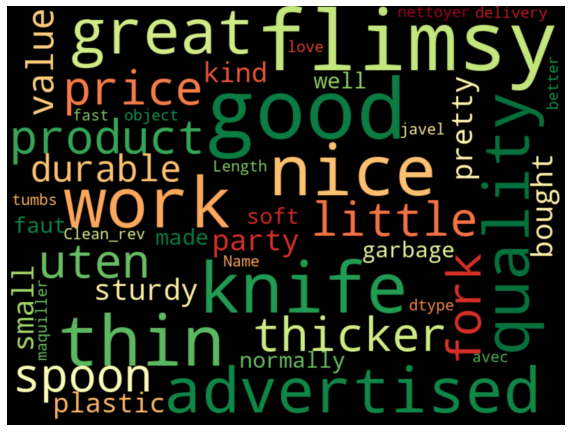

In [259]:
from wordcloud import WordCloud , ImageColorGenerator
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black'
    ).generate(str(data))

    plt.figure(figsize = (10, 10))
    plt.axis('off')

    plt.imshow(wordcloud,interpolation = 'gaussian')
    plt.show()
    
# print wordcloud
show_wordcloud(df['Clean_rev'])

In [260]:
df['scoreStatus'].value_counts()

neutral     20387
positive    18698
negative     1885
Name: scoreStatus, dtype: int64

**Classification Model**

In [261]:
from sklearn.feature_extraction.text import CountVectorizer
features = CountVectorizer()
features.fit(df["Clean_rev"])
print(len(features.vocabulary_))
print(features.vocabulary_)

24936
{'little': 12844, 'flimsy': 8772, 'good': 9818, 'price': 16766, 'product': 16884, 'pay': 15725, 'utensil': 23375, 'break': 3245, 'pressing': 16728, 'hard': 10361, 'knife': 12188, 'bit': 2894, 'thicker': 22056, 'spoon': 20662, 'fork': 8957, 'nice': 14602, 'thin': 22066, 'durable': 6913, 'value': 23457, 'sturdy': 21196, 'small': 20132, 'pretty': 16746, 'bought': 3157, 'kid': 12091, 'party': 15648, 'something': 20376, 'ok': 15049, 'best': 2720, 'quality': 17261, 'plastic': 16210, 'like': 12733, 'kind': 12107, 'normally': 14736, 'get': 9613, 'store': 21017, 'thought': 22103, 'would': 24609, 'disappointed': 6325, 'durability': 6910, 'ware': 24026, 'easily': 7031, 'broke': 3322, 'pressure': 16731, 'applied': 1628, 'liked': 12735, 'better': 2738, 'actually': 822, 'cut': 5470, 'thing': 22069, 'box': 3182, 'crushed': 5360, 'got': 9852, 'double': 6674, 'boxed': 3183, 'cutlery': 5477, 'combo': 4461, 'saying': 19015, 'true': 22682, 'case': 3741, 'cheap': 3934, 'especially': 7806, 'used': 233

In [262]:
bagofWords = features.transform(df["Clean_rev"])
print(bagofWords)

  (0, 3245)	1
  (0, 8772)	1
  (0, 9818)	2
  (0, 10361)	1
  (0, 12844)	1
  (0, 15725)	1
  (0, 16728)	1
  (0, 16766)	1
  (0, 16884)	1
  (0, 23375)	1
  (1, 2894)	2
  (1, 8957)	1
  (1, 12188)	2
  (1, 14602)	1
  (1, 20662)	1
  (1, 22056)	1
  (1, 22066)	1
  (2, 6913)	1
  (2, 21196)	1
  (2, 23457)	1
  (3, 2720)	1
  (3, 3157)	1
  (3, 8772)	1
  (3, 9818)	1
  (3, 12091)	1
  :	:
  (40965, 13165)	1
  (40965, 14602)	1
  (40965, 20285)	1
  (40965, 24247)	1
  (40965, 24572)	1
  (40966, 2111)	1
  (40966, 5626)	2
  (40966, 7051)	1
  (40966, 8421)	1
  (40966, 11098)	1
  (40966, 11839)	1
  (40966, 14529)	1
  (40966, 17261)	1
  (40967, 932)	1
  (40967, 5858)	1
  (40967, 8391)	1
  (40967, 9971)	1
  (40967, 17261)	1
  (40968, 13343)	1
  (40968, 22743)	1
  (40969, 2738)	1
  (40969, 9971)	1
  (40969, 13031)	1
  (40969, 13522)	1
  (40969, 24572)	1


In [263]:
print(features.get_feature_names_out())

['00' '000' '002' ... 'zweites' 'zwiespalt' 'zwischen']


In [264]:
from sklearn.model_selection import train_test_split
X = df["Clean_rev"]
y = df["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25)

In [265]:
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)

In [266]:
X_train.shape

(30727, 21554)

In [267]:
y_train.shape

(30727,)

In [268]:
X_test.shape

(10243, 21554)

In [269]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train) 

SVC()

In [270]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  54,  319,  103],
       [  19, 4064, 1052],
       [  13, 1312, 3307]], dtype=int64)

In [271]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.63      0.11      0.19       476
     neutral       0.71      0.79      0.75      5135
    positive       0.74      0.71      0.73      4632

    accuracy                           0.72     10243
   macro avg       0.69      0.54      0.56     10243
weighted avg       0.72      0.72      0.71     10243



In [272]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [273]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred2 = model2.predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[ 128,  198,  150],
       [ 180, 3394, 1561],
       [  70, 1384, 3178]], dtype=int64)

In [274]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    negative       0.34      0.27      0.30       476
     neutral       0.68      0.66      0.67      5135
    positive       0.65      0.69      0.67      4632

    accuracy                           0.65     10243
   macro avg       0.56      0.54      0.55     10243
weighted avg       0.65      0.65      0.65     10243

